# Import Important Libraries

In [1]:
import pandas
import sys
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import numpy as np # linear algebra
import pandas as pd
from bayes_opt import BayesianOptimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error
from mlxtend.classifier import StackingCVClassifier

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score,KFold,RepeatedStratifiedKFold,StratifiedKFold

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import pickle

In [2]:
datad=pd.read_csv(r"data.csv")

# data analysis

In [3]:
datad

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR     HNR      RPDE       DFA  \
0               0.426  ...      0.06545  0.02211  21.033  0.414783  0.815285   
1               0.626  ...      0.09403  0.01929  19.085  0.458359  0.819521   
2               0.482  ...      0.08270  0.01309  20.651  0.429895  0.825288   
3               0.517  ...      0.08771  0.01353  20.644  0.434969  0.819235   
4               0.584  ...      0.10470  0.01767  19.649  0.417356  0.823484   
..                ...  ...          ...      ...     ...       ...       ...   
190             0.405  ...      0.07008  0.02764  19.517  0.448439  0.657899   
191             0.263  ...      0.04812  0.01810  19.147  0.431674  0.683244   
192             0.256  ...      0.03804  0.10715  17.883  0.407567  0.655683   
193             0.241  ...      0.03794  0.07223  19.020  0.451221  0.643956   
194             0.190  ...      0.03078  0.04398  21.209  0.462803  0.664357   

      spread1   spread2        D2       PPE  status  
0   -4.813031  0.266482  2.301442  0.284654       1  
1   -4.075192  0.335590  2.486855  0.368674       1  
2   -4.443179  0.311173  2.342259  0.332634       1  
3   -4.117501  0.334147  2.405554  0.368975       1  
4   -3.747787  0.234513  2.332180  0.410335       1  
..        ...       ...       ...       ...     ...  
190 -6.538586  0.121952  2.657476  0.133050       0  
191 -6.195325  0.129303  2.784312  0.168895       0  
192 -6.787197  0.158453  2.679772  0.131728       0  
193 -6.744577  0.207454  2.138608  0.123306       0  
194 -5.724056  0.190667  2.555477  0.148569       0  

[195 rows x 23 columns]

# feature checking

In [4]:
datad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

# feature description

In [5]:
datad.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR        RPDE  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.498536   
std            0.194877  ...     0.030459    0.040418    4.425764    0.103942   
min            0.085000  ...     0.013640    0.000650    8.441000    0.256570   
25%            0.148500  ...     0.024735    0.005925   19.198000    0.421306   
50%            0.221000  ...     0.038360    0.011660   22.085000    0.495954   
75%            0.350000  ...     0.060795    0.025640   25.075500    0.587562   
max            1.302000  ...     0.169420    0.314820   33.047000    0.685151   

              DFA     spread1     spread2          D2         PPE      status  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552    0.753846  
std      0.055336    1.090208    0.083406    0.382799    0.090119    0.431878  
min      0.574282   -7.964984    0.006274    1.423287    0.044539    0.000000  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451    1.000000  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052    1.000000  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980    1.000000  
max      0.825288   -2.434031    0.450493    3.671155    0.527367    1.000000  

[8 rows x 23 columns]

# is there any null value

In [6]:
datad.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [7]:
datad.groupby('status').count()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0                48            48            48              48   
1               147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  \
status                    ...                                               
0                     48  ...        48           48   48   48    48   48   
1                    147  ...       147          147  147  147   147  147   

        spread1  spread2   D2  PPE  
status                              
0            48       48   48   48  
1           147      147  147  147  

[2 rows x 22 columns]

# Number of Unique values per coulmn

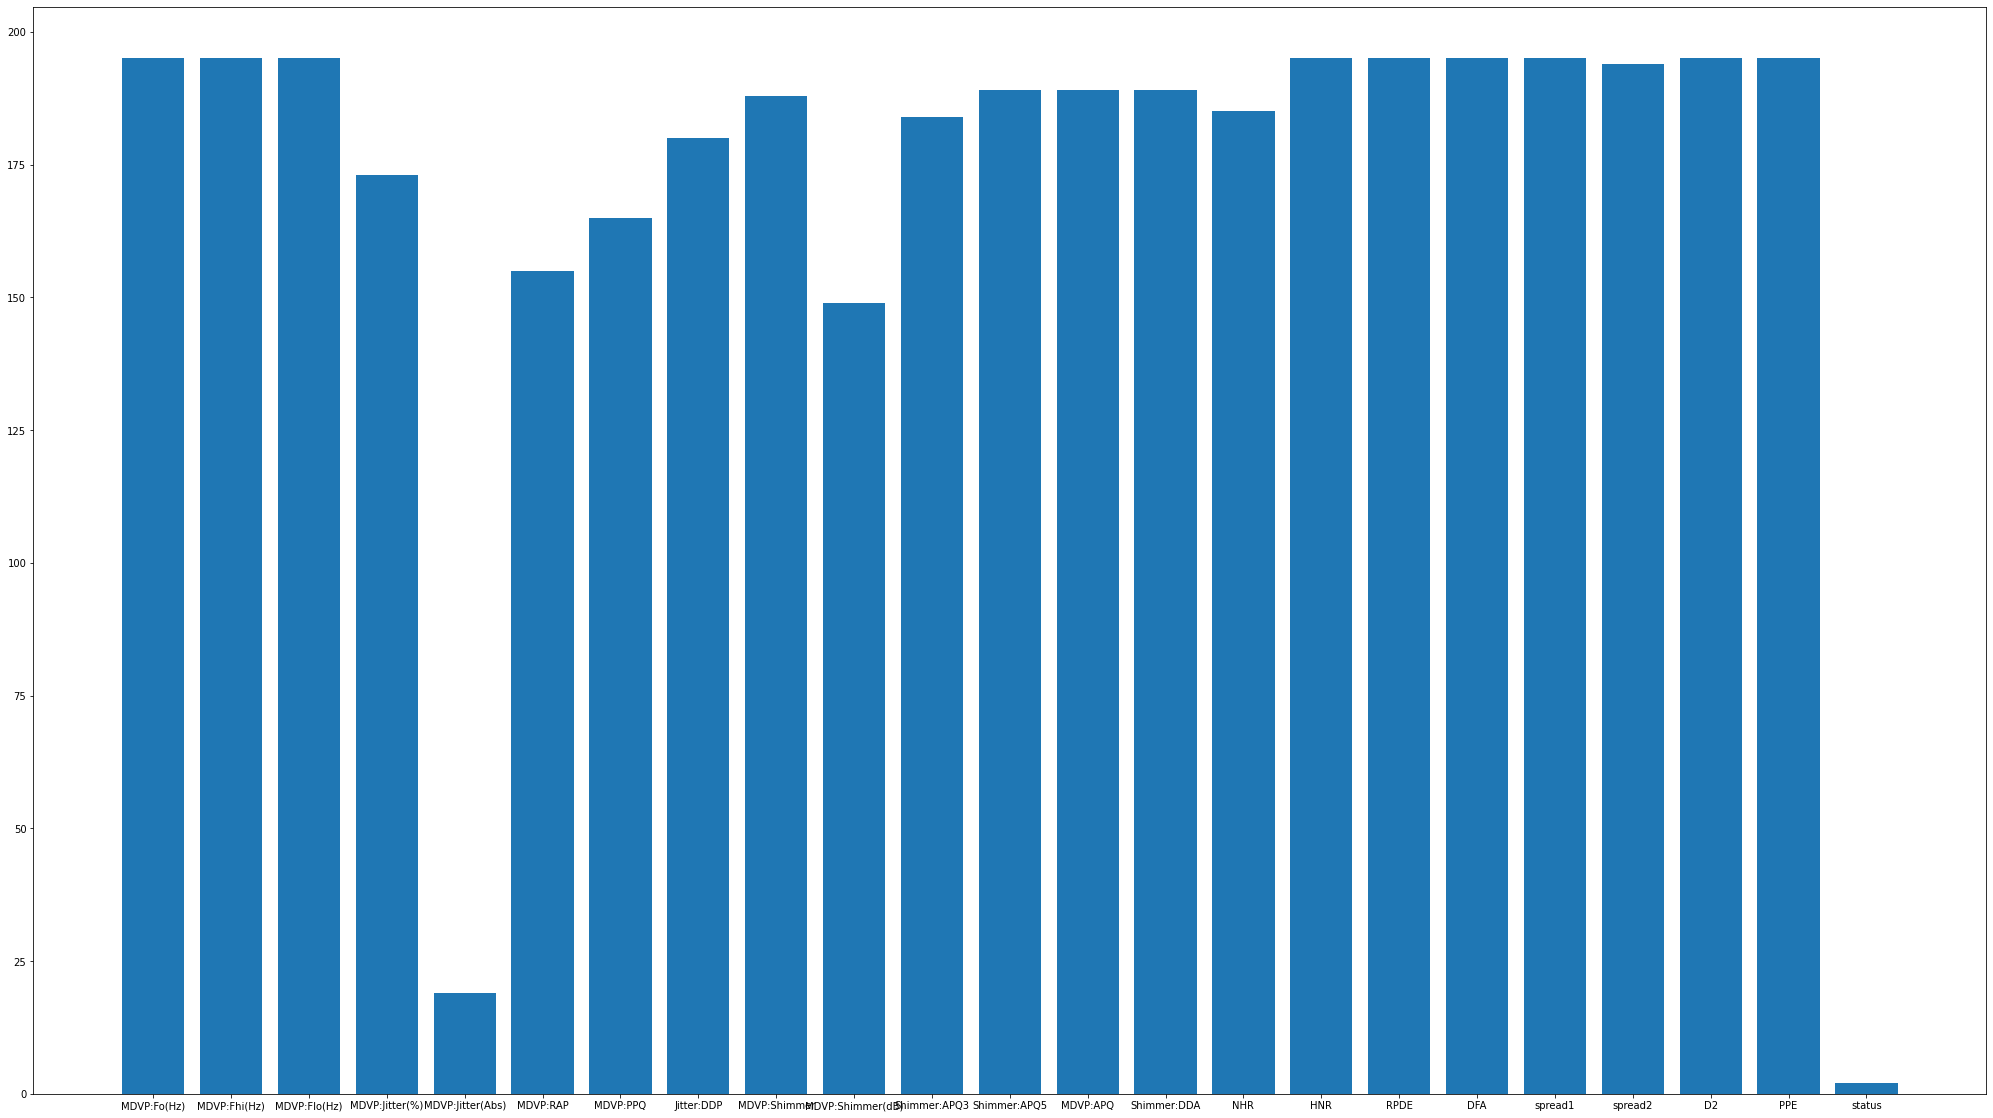

In [8]:
from collections import defaultdict

frequency=defaultdict(lambda:0)

for i in datad:
    frequency[i]=datad[i].nunique()
    


frequency


fig,ax=plt.subplots(figsize=(35, 20))

ax.bar(frequency.keys(),frequency.values())

plt.show()

# histogram of the features

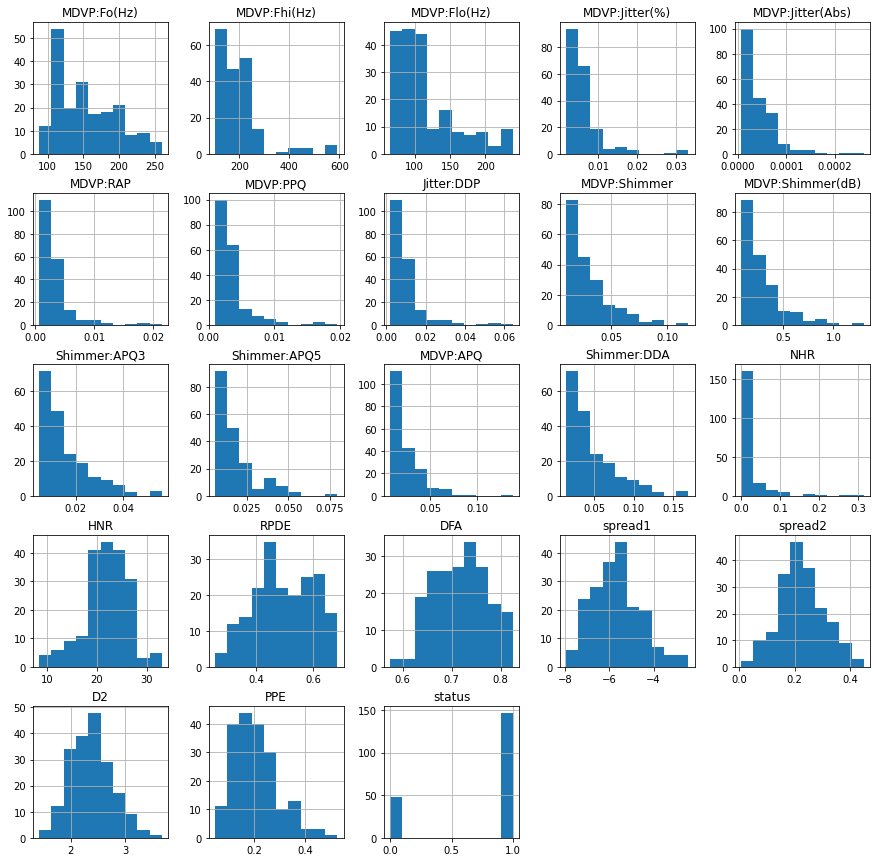

In [9]:
datad.hist(figsize=(15,15))
plt.show()

# correlation between features

<AxesSubplot:>

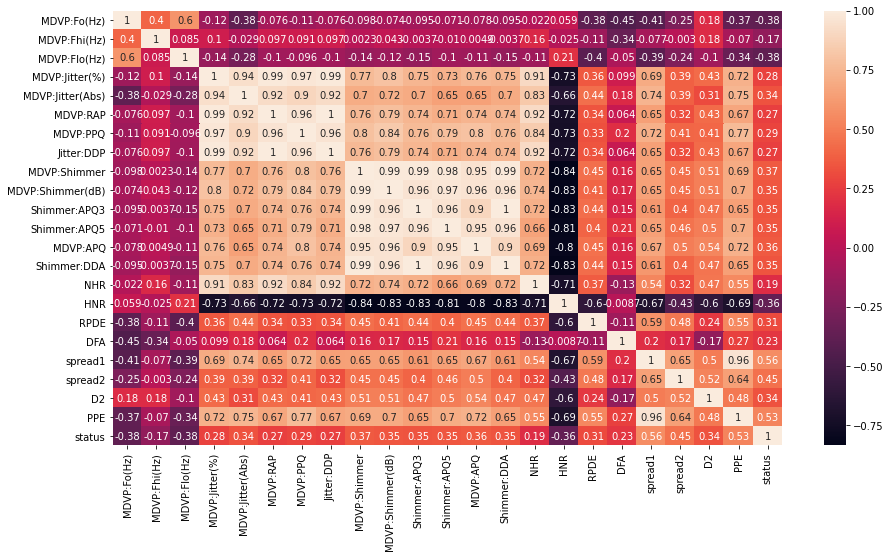

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(datad.corr(),annot=True)

# data preprocessing and inference

In [11]:

# url = "data.csv"

# features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
# dataset = pandas.read_csv(url, names = features)


# array = dataset.values

# Xi = array[:,0:22]

# Yi = array[:,22]
# validation_size = 0.3

# seed = 7
datad = datad.drop(columns=[ "spread1", "spread2", "D2", "PPE", "NHR", "RPDE", "DFA"], axis=1)


X=datad.drop('status',axis=1)

Y=datad.status




NameError: name 'Xi' is not defined

In [13]:
X

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0               0.426       0.02182       0.03130   0.02971      0.06545   
1               0.626       0.03134       0.04518   0.04368      0.09403   
2               0.482       0.02757       0.03858   0.03590      0.08270   
3               0.517       0.02924       0.04005   0.03772      0.08771   
4               0.584       0.03490       0.04825   0.04465      0.10470   
..                ...           ...           ...       ...          ...   
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

        HNR  
0    21.033  
1    19.085  
2    20.651  
3    20.644  
4    19.649  
..      ...  
190  19.517  
191  19.147  
192  17.883  
193  19.020  
194  21.209  

[195 rows x 15 columns]

In [14]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

# Dry run of different estimators on this dataset 

In [16]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.3, random_state = 7, shuffle=True)

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

#different estimators
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Neighbors Classifier', KNeighborsClassifier()))
models.append(('MLP Classifier', MLPClassifier(solver='lbfgs')))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier(n_estimators=400)))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('CatBoost', CatBoostClassifier(learning_rate=0.9)))


results = []
names = []

pre=[]
rocs=[]

#iterate on every estimator

print("Scores for each algorithm:")
for name, model in models:
    kfold = KFold( n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print('10 folds cross validation score of {}'.format(name))
    print(cv_results)
    
#     model.fit(X_train, Y_train)
#     predictions = model.predict(X_validation)
#     print(name,'\n','accuracy: ', accuracy_score(Y_validation, predictions)*100)
#     pre.append(accuracy_score(Y_validation, predictions)*100)
#     rocs.append(roc_auc_score(Y_validation, predictions))
#     print('\nclassification report\n',classification_report(Y_validation, predictions))
    print()





Scores for each algorithm:
10 folds cross validation score of Logistic Regression
[0.78571429 0.71428571 1.         0.71428571 0.78571429 0.78571429
 0.92307692 0.53846154 0.76923077 0.84615385]

10 folds cross validation score of Linear Discriminant Analysis
[0.78571429 0.71428571 1.         0.71428571 0.78571429 0.85714286
 0.92307692 0.69230769 0.76923077 0.92307692]

10 folds cross validation score of K-Neighbors Classifier
[0.78571429 0.57142857 0.92857143 0.85714286 0.71428571 0.85714286
 0.84615385 0.69230769 0.69230769 1.        ]



/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed

10 folds cross validation score of MLP Classifier
[0.78571429 0.71428571 0.92857143 0.92857143 0.64285714 0.71428571
 0.84615385 0.76923077 0.53846154 0.76923077]

10 folds cross validation score of GaussianNB
[0.78571429 0.64285714 0.64285714 0.78571429 0.64285714 0.57142857
 0.61538462 0.61538462 0.69230769 0.69230769]



/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-

[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10 folds cross validation score of XGBClassifier
[0.85714286 0.78571429 0.85714286 0.92857143 0.78571429 0.78571429
 0.84615385 0.84615385 0.92307692 1.        ]

10 folds cross validation score of RandomForest
[0.78571429 0.85714286 0.78571429 0.85714286 0.78571429 0.78571429
 0.84615385 0.69230769 0.92307692 1.        ]

0:	learn: 0.3336606	total: 53.3ms	remaining: 53.2s
1:	learn: 0.1858051	total: 56.9ms	remaining: 28.4s
2:	learn: 0.1229283	total: 60.3ms	remaining: 20s
3:	learn: 0.0915614	

224:	learn: 0.0010786	total: 326ms	remaining: 1.12s
225:	learn: 0.0010771	total: 327ms	remaining: 1.12s
226:	learn: 0.0010771	total: 328ms	remaining: 1.12s
227:	learn: 0.0010699	total: 329ms	remaining: 1.11s
228:	learn: 0.0010672	total: 330ms	remaining: 1.11s
229:	learn: 0.0010670	total: 331ms	remaining: 1.11s
230:	learn: 0.0010668	total: 332ms	remaining: 1.11s
231:	learn: 0.0010652	total: 333ms	remaining: 1.1s
232:	learn: 0.0010642	total: 334ms	remaining: 1.1s
233:	learn: 0.0010604	total: 335ms	remaining: 1.1s
234:	learn: 0.0010576	total: 336ms	remaining: 1.09s
235:	learn: 0.0010573	total: 337ms	remaining: 1.09s
236:	learn: 0.0010554	total: 338ms	remaining: 1.09s
237:	learn: 0.0010552	total: 339ms	remaining: 1.08s
238:	learn: 0.0010549	total: 340ms	remaining: 1.08s
239:	learn: 0.0010546	total: 341ms	remaining: 1.08s
240:	learn: 0.0010528	total: 342ms	remaining: 1.08s
241:	learn: 0.0010527	total: 344ms	remaining: 1.07s
242:	learn: 0.0010520	total: 345ms	remaining: 1.07s
243:	learn: 0.0

385:	learn: 0.0009063	total: 511ms	remaining: 813ms
386:	learn: 0.0009059	total: 512ms	remaining: 811ms
387:	learn: 0.0009058	total: 513ms	remaining: 810ms
388:	learn: 0.0009052	total: 515ms	remaining: 808ms
389:	learn: 0.0009051	total: 516ms	remaining: 807ms
390:	learn: 0.0009048	total: 517ms	remaining: 806ms
391:	learn: 0.0008952	total: 518ms	remaining: 804ms
392:	learn: 0.0008951	total: 519ms	remaining: 802ms
393:	learn: 0.0008949	total: 520ms	remaining: 800ms
394:	learn: 0.0008934	total: 521ms	remaining: 798ms
395:	learn: 0.0008933	total: 522ms	remaining: 796ms
396:	learn: 0.0008931	total: 523ms	remaining: 794ms
397:	learn: 0.0008927	total: 524ms	remaining: 793ms
398:	learn: 0.0008926	total: 526ms	remaining: 792ms
399:	learn: 0.0008925	total: 527ms	remaining: 791ms
400:	learn: 0.0008923	total: 528ms	remaining: 789ms
401:	learn: 0.0008922	total: 529ms	remaining: 787ms
402:	learn: 0.0008920	total: 531ms	remaining: 786ms
403:	learn: 0.0008913	total: 532ms	remaining: 785ms
404:	learn: 

543:	learn: 0.0008088	total: 695ms	remaining: 583ms
544:	learn: 0.0008086	total: 696ms	remaining: 581ms
545:	learn: 0.0008086	total: 698ms	remaining: 580ms
546:	learn: 0.0008086	total: 699ms	remaining: 579ms
547:	learn: 0.0008082	total: 700ms	remaining: 577ms
548:	learn: 0.0008080	total: 701ms	remaining: 576ms
549:	learn: 0.0008079	total: 702ms	remaining: 574ms
550:	learn: 0.0008078	total: 703ms	remaining: 573ms
551:	learn: 0.0008067	total: 704ms	remaining: 571ms
552:	learn: 0.0008067	total: 705ms	remaining: 570ms
553:	learn: 0.0008061	total: 707ms	remaining: 569ms
554:	learn: 0.0008061	total: 708ms	remaining: 568ms
555:	learn: 0.0008060	total: 709ms	remaining: 566ms
556:	learn: 0.0008060	total: 710ms	remaining: 565ms
557:	learn: 0.0008054	total: 711ms	remaining: 563ms
558:	learn: 0.0008049	total: 712ms	remaining: 562ms
559:	learn: 0.0008046	total: 713ms	remaining: 561ms
560:	learn: 0.0008046	total: 714ms	remaining: 559ms
561:	learn: 0.0008043	total: 716ms	remaining: 558ms
562:	learn: 

830:	learn: 0.0007087	total: 1.07s	remaining: 217ms
831:	learn: 0.0007085	total: 1.07s	remaining: 216ms
832:	learn: 0.0007082	total: 1.07s	remaining: 214ms
833:	learn: 0.0007080	total: 1.07s	remaining: 213ms
834:	learn: 0.0007076	total: 1.07s	remaining: 212ms
835:	learn: 0.0007074	total: 1.07s	remaining: 211ms
836:	learn: 0.0007072	total: 1.07s	remaining: 209ms
837:	learn: 0.0007071	total: 1.08s	remaining: 208ms
838:	learn: 0.0007070	total: 1.08s	remaining: 207ms
839:	learn: 0.0007068	total: 1.08s	remaining: 205ms
840:	learn: 0.0007067	total: 1.08s	remaining: 204ms
841:	learn: 0.0007064	total: 1.08s	remaining: 203ms
842:	learn: 0.0007063	total: 1.08s	remaining: 202ms
843:	learn: 0.0007062	total: 1.08s	remaining: 200ms
844:	learn: 0.0007061	total: 1.09s	remaining: 199ms
845:	learn: 0.0007060	total: 1.09s	remaining: 198ms
846:	learn: 0.0007059	total: 1.09s	remaining: 197ms
847:	learn: 0.0007058	total: 1.09s	remaining: 196ms
848:	learn: 0.0007054	total: 1.09s	remaining: 194ms
849:	learn: 

999:	learn: 0.0006605	total: 1.25s	remaining: 0us
0:	learn: 0.3272590	total: 3.21ms	remaining: 3.2s
1:	learn: 0.2413364	total: 6.78ms	remaining: 3.38s
2:	learn: 0.1388255	total: 10.7ms	remaining: 3.57s
3:	learn: 0.0938901	total: 14.4ms	remaining: 3.6s
4:	learn: 0.0731814	total: 17.3ms	remaining: 3.44s
5:	learn: 0.0517662	total: 20.1ms	remaining: 3.33s
6:	learn: 0.0358406	total: 22.9ms	remaining: 3.25s
7:	learn: 0.0265219	total: 25.7ms	remaining: 3.18s
8:	learn: 0.0202463	total: 28.4ms	remaining: 3.13s
9:	learn: 0.0174756	total: 32ms	remaining: 3.17s
10:	learn: 0.0147008	total: 34.7ms	remaining: 3.12s
11:	learn: 0.0121078	total: 37.5ms	remaining: 3.08s
12:	learn: 0.0106817	total: 40.2ms	remaining: 3.05s
13:	learn: 0.0094153	total: 43.4ms	remaining: 3.06s
14:	learn: 0.0085468	total: 48.4ms	remaining: 3.17s
15:	learn: 0.0073894	total: 51.8ms	remaining: 3.19s
16:	learn: 0.0066381	total: 55.2ms	remaining: 3.19s
17:	learn: 0.0057370	total: 57.9ms	remaining: 3.16s
18:	learn: 0.0053426	total: 

332:	learn: 0.0015455	total: 474ms	remaining: 949ms
333:	learn: 0.0015447	total: 475ms	remaining: 947ms
334:	learn: 0.0015425	total: 476ms	remaining: 945ms
335:	learn: 0.0015405	total: 477ms	remaining: 943ms
336:	learn: 0.0015404	total: 478ms	remaining: 941ms
337:	learn: 0.0015388	total: 479ms	remaining: 939ms
338:	learn: 0.0015382	total: 481ms	remaining: 937ms
339:	learn: 0.0015380	total: 482ms	remaining: 935ms
340:	learn: 0.0015380	total: 483ms	remaining: 933ms
341:	learn: 0.0015379	total: 484ms	remaining: 931ms
342:	learn: 0.0015379	total: 485ms	remaining: 928ms
343:	learn: 0.0015354	total: 486ms	remaining: 926ms
344:	learn: 0.0015346	total: 487ms	remaining: 924ms
345:	learn: 0.0015345	total: 488ms	remaining: 922ms
346:	learn: 0.0015332	total: 489ms	remaining: 920ms
347:	learn: 0.0015332	total: 490ms	remaining: 918ms
348:	learn: 0.0015301	total: 491ms	remaining: 916ms
349:	learn: 0.0015294	total: 492ms	remaining: 914ms
350:	learn: 0.0015290	total: 493ms	remaining: 912ms
351:	learn: 

502:	learn: 0.0009432	total: 660ms	remaining: 652ms
503:	learn: 0.0009428	total: 662ms	remaining: 651ms
504:	learn: 0.0009423	total: 663ms	remaining: 650ms
505:	learn: 0.0009407	total: 664ms	remaining: 648ms
506:	learn: 0.0009403	total: 665ms	remaining: 647ms
507:	learn: 0.0009399	total: 666ms	remaining: 645ms
508:	learn: 0.0009394	total: 667ms	remaining: 644ms
509:	learn: 0.0009390	total: 668ms	remaining: 642ms
510:	learn: 0.0009382	total: 670ms	remaining: 641ms
511:	learn: 0.0009382	total: 671ms	remaining: 639ms
512:	learn: 0.0009361	total: 672ms	remaining: 638ms
513:	learn: 0.0009323	total: 673ms	remaining: 637ms
514:	learn: 0.0009322	total: 674ms	remaining: 635ms
515:	learn: 0.0009320	total: 676ms	remaining: 634ms
516:	learn: 0.0009317	total: 677ms	remaining: 632ms
517:	learn: 0.0009316	total: 678ms	remaining: 631ms
518:	learn: 0.0009315	total: 679ms	remaining: 630ms
519:	learn: 0.0009315	total: 681ms	remaining: 628ms
520:	learn: 0.0009314	total: 682ms	remaining: 627ms
521:	learn: 

671:	learn: 0.0007736	total: 846ms	remaining: 413ms
672:	learn: 0.0007735	total: 847ms	remaining: 412ms
673:	learn: 0.0007730	total: 848ms	remaining: 410ms
674:	learn: 0.0007728	total: 849ms	remaining: 409ms
675:	learn: 0.0007724	total: 850ms	remaining: 408ms
676:	learn: 0.0007723	total: 852ms	remaining: 406ms
677:	learn: 0.0007717	total: 853ms	remaining: 405ms
678:	learn: 0.0007713	total: 854ms	remaining: 404ms
679:	learn: 0.0007709	total: 855ms	remaining: 403ms
680:	learn: 0.0007708	total: 857ms	remaining: 401ms
681:	learn: 0.0007703	total: 857ms	remaining: 400ms
682:	learn: 0.0007701	total: 862ms	remaining: 400ms
683:	learn: 0.0007699	total: 863ms	remaining: 399ms
684:	learn: 0.0007696	total: 864ms	remaining: 397ms
685:	learn: 0.0007696	total: 865ms	remaining: 396ms
686:	learn: 0.0007695	total: 866ms	remaining: 395ms
687:	learn: 0.0007694	total: 867ms	remaining: 393ms
688:	learn: 0.0007686	total: 868ms	remaining: 392ms
689:	learn: 0.0007683	total: 869ms	remaining: 391ms
690:	learn: 

832:	learn: 0.0006868	total: 1.03s	remaining: 207ms
833:	learn: 0.0006866	total: 1.03s	remaining: 206ms
834:	learn: 0.0006864	total: 1.03s	remaining: 204ms
835:	learn: 0.0006860	total: 1.03s	remaining: 203ms
836:	learn: 0.0006858	total: 1.04s	remaining: 202ms
837:	learn: 0.0006858	total: 1.04s	remaining: 200ms
838:	learn: 0.0006858	total: 1.04s	remaining: 199ms
839:	learn: 0.0006842	total: 1.04s	remaining: 198ms
840:	learn: 0.0006716	total: 1.04s	remaining: 197ms
841:	learn: 0.0006716	total: 1.04s	remaining: 195ms
842:	learn: 0.0006716	total: 1.04s	remaining: 194ms
843:	learn: 0.0006716	total: 1.04s	remaining: 193ms
844:	learn: 0.0006716	total: 1.04s	remaining: 192ms
845:	learn: 0.0006716	total: 1.04s	remaining: 190ms
846:	learn: 0.0006716	total: 1.05s	remaining: 189ms
847:	learn: 0.0006712	total: 1.05s	remaining: 188ms
848:	learn: 0.0006705	total: 1.05s	remaining: 187ms
849:	learn: 0.0006704	total: 1.05s	remaining: 185ms
850:	learn: 0.0006700	total: 1.05s	remaining: 184ms
851:	learn: 

991:	learn: 0.0006200	total: 1.22s	remaining: 9.8ms
992:	learn: 0.0006199	total: 1.22s	remaining: 8.58ms
993:	learn: 0.0006194	total: 1.22s	remaining: 7.36ms
994:	learn: 0.0006190	total: 1.22s	remaining: 6.13ms
995:	learn: 0.0006188	total: 1.22s	remaining: 4.91ms
996:	learn: 0.0006185	total: 1.22s	remaining: 3.68ms
997:	learn: 0.0006177	total: 1.22s	remaining: 2.45ms
998:	learn: 0.0006176	total: 1.22s	remaining: 1.23ms
999:	learn: 0.0006176	total: 1.23s	remaining: 0us
0:	learn: 0.3395336	total: 1.06ms	remaining: 1.06s
1:	learn: 0.2295311	total: 2.17ms	remaining: 1.08s
2:	learn: 0.1536853	total: 3.2ms	remaining: 1.06s
3:	learn: 0.0827761	total: 4.1ms	remaining: 1.02s
4:	learn: 0.0556483	total: 5.06ms	remaining: 1.01s
5:	learn: 0.0425021	total: 5.84ms	remaining: 967ms
6:	learn: 0.0292006	total: 6.71ms	remaining: 952ms
7:	learn: 0.0271294	total: 7.74ms	remaining: 959ms
8:	learn: 0.0206356	total: 8.7ms	remaining: 958ms
9:	learn: 0.0166475	total: 9.62ms	remaining: 952ms
10:	learn: 0.0134183

272:	learn: 0.0009697	total: 368ms	remaining: 981ms
273:	learn: 0.0009696	total: 375ms	remaining: 993ms
274:	learn: 0.0009493	total: 376ms	remaining: 991ms
275:	learn: 0.0009493	total: 378ms	remaining: 990ms
276:	learn: 0.0009493	total: 379ms	remaining: 989ms
277:	learn: 0.0009436	total: 380ms	remaining: 988ms
278:	learn: 0.0009435	total: 383ms	remaining: 991ms
279:	learn: 0.0009434	total: 385ms	remaining: 990ms
280:	learn: 0.0009319	total: 387ms	remaining: 990ms
281:	learn: 0.0009318	total: 388ms	remaining: 989ms
282:	learn: 0.0009314	total: 391ms	remaining: 991ms
283:	learn: 0.0009312	total: 393ms	remaining: 991ms
284:	learn: 0.0009311	total: 396ms	remaining: 995ms
285:	learn: 0.0009237	total: 398ms	remaining: 995ms
286:	learn: 0.0009237	total: 400ms	remaining: 994ms
287:	learn: 0.0009230	total: 401ms	remaining: 992ms
288:	learn: 0.0009225	total: 403ms	remaining: 991ms
289:	learn: 0.0009223	total: 404ms	remaining: 989ms
290:	learn: 0.0009222	total: 405ms	remaining: 986ms
291:	learn: 

524:	learn: 0.0007173	total: 737ms	remaining: 667ms
525:	learn: 0.0007162	total: 739ms	remaining: 666ms
526:	learn: 0.0007162	total: 740ms	remaining: 664ms
527:	learn: 0.0007160	total: 742ms	remaining: 663ms
528:	learn: 0.0007157	total: 743ms	remaining: 661ms
529:	learn: 0.0007154	total: 745ms	remaining: 660ms
530:	learn: 0.0007153	total: 746ms	remaining: 659ms
531:	learn: 0.0007153	total: 747ms	remaining: 657ms
532:	learn: 0.0007130	total: 748ms	remaining: 656ms
533:	learn: 0.0007129	total: 750ms	remaining: 654ms
534:	learn: 0.0007020	total: 751ms	remaining: 653ms
535:	learn: 0.0007018	total: 752ms	remaining: 651ms
536:	learn: 0.0007018	total: 754ms	remaining: 650ms
537:	learn: 0.0007017	total: 755ms	remaining: 648ms
538:	learn: 0.0007016	total: 757ms	remaining: 648ms
539:	learn: 0.0007014	total: 759ms	remaining: 646ms
540:	learn: 0.0007010	total: 760ms	remaining: 645ms
541:	learn: 0.0007009	total: 762ms	remaining: 644ms
542:	learn: 0.0007008	total: 763ms	remaining: 642ms
543:	learn: 

832:	learn: 0.0006355	total: 1.11s	remaining: 222ms
833:	learn: 0.0006354	total: 1.11s	remaining: 221ms
834:	learn: 0.0006353	total: 1.11s	remaining: 219ms
835:	learn: 0.0006353	total: 1.11s	remaining: 218ms
836:	learn: 0.0006351	total: 1.11s	remaining: 217ms
837:	learn: 0.0006350	total: 1.11s	remaining: 215ms
838:	learn: 0.0006348	total: 1.11s	remaining: 214ms
839:	learn: 0.0006348	total: 1.12s	remaining: 213ms
840:	learn: 0.0006347	total: 1.12s	remaining: 211ms
841:	learn: 0.0006346	total: 1.12s	remaining: 210ms
842:	learn: 0.0006344	total: 1.12s	remaining: 208ms
843:	learn: 0.0006343	total: 1.12s	remaining: 207ms
844:	learn: 0.0006341	total: 1.12s	remaining: 206ms
845:	learn: 0.0006340	total: 1.12s	remaining: 204ms
846:	learn: 0.0006337	total: 1.12s	remaining: 203ms
847:	learn: 0.0006335	total: 1.12s	remaining: 202ms
848:	learn: 0.0006333	total: 1.13s	remaining: 200ms
849:	learn: 0.0006331	total: 1.13s	remaining: 199ms
850:	learn: 0.0006329	total: 1.13s	remaining: 198ms
851:	learn: 

994:	learn: 0.0006082	total: 1.29s	remaining: 6.5ms
995:	learn: 0.0006078	total: 1.29s	remaining: 5.2ms
996:	learn: 0.0006078	total: 1.29s	remaining: 3.9ms
997:	learn: 0.0006078	total: 1.3s	remaining: 2.6ms
998:	learn: 0.0006076	total: 1.3s	remaining: 1.3ms
999:	learn: 0.0006074	total: 1.3s	remaining: 0us
0:	learn: 0.3320387	total: 1.08ms	remaining: 1.08s
1:	learn: 0.2242492	total: 2.21ms	remaining: 1.1s
2:	learn: 0.1536313	total: 3.41ms	remaining: 1.13s
3:	learn: 0.0993313	total: 4.38ms	remaining: 1.09s
4:	learn: 0.0819700	total: 5.34ms	remaining: 1.06s
5:	learn: 0.0629244	total: 6.31ms	remaining: 1.04s
6:	learn: 0.0471113	total: 7.26ms	remaining: 1.03s
7:	learn: 0.0318399	total: 8.23ms	remaining: 1.02s
8:	learn: 0.0271885	total: 9.23ms	remaining: 1.02s
9:	learn: 0.0193533	total: 10.4ms	remaining: 1.02s
10:	learn: 0.0144975	total: 11.5ms	remaining: 1.03s
11:	learn: 0.0125541	total: 12.5ms	remaining: 1.03s
12:	learn: 0.0106951	total: 13.5ms	remaining: 1.02s
13:	learn: 0.0094406	total: 

294:	learn: 0.0009905	total: 312ms	remaining: 745ms
295:	learn: 0.0009902	total: 313ms	remaining: 744ms
296:	learn: 0.0009901	total: 314ms	remaining: 743ms
297:	learn: 0.0009794	total: 315ms	remaining: 743ms
298:	learn: 0.0009674	total: 316ms	remaining: 742ms
299:	learn: 0.0009674	total: 318ms	remaining: 741ms
300:	learn: 0.0009673	total: 319ms	remaining: 740ms
301:	learn: 0.0009671	total: 320ms	remaining: 739ms
302:	learn: 0.0009670	total: 322ms	remaining: 740ms
303:	learn: 0.0009669	total: 323ms	remaining: 739ms
304:	learn: 0.0009659	total: 324ms	remaining: 739ms
305:	learn: 0.0009656	total: 325ms	remaining: 738ms
306:	learn: 0.0009654	total: 326ms	remaining: 737ms
307:	learn: 0.0009652	total: 328ms	remaining: 736ms
308:	learn: 0.0009622	total: 329ms	remaining: 735ms
309:	learn: 0.0009621	total: 330ms	remaining: 734ms
310:	learn: 0.0009620	total: 331ms	remaining: 734ms
311:	learn: 0.0009610	total: 332ms	remaining: 733ms
312:	learn: 0.0009609	total: 334ms	remaining: 732ms
313:	learn: 

620:	learn: 0.0007949	total: 681ms	remaining: 416ms
621:	learn: 0.0007948	total: 682ms	remaining: 415ms
622:	learn: 0.0007944	total: 684ms	remaining: 414ms
623:	learn: 0.0007939	total: 685ms	remaining: 413ms
624:	learn: 0.0007937	total: 686ms	remaining: 412ms
625:	learn: 0.0007937	total: 687ms	remaining: 410ms
626:	learn: 0.0007936	total: 688ms	remaining: 409ms
627:	learn: 0.0007935	total: 690ms	remaining: 408ms
628:	learn: 0.0007934	total: 691ms	remaining: 407ms
629:	learn: 0.0007934	total: 692ms	remaining: 406ms
630:	learn: 0.0007932	total: 693ms	remaining: 405ms
631:	learn: 0.0007930	total: 694ms	remaining: 404ms
632:	learn: 0.0007926	total: 695ms	remaining: 403ms
633:	learn: 0.0007921	total: 696ms	remaining: 402ms
634:	learn: 0.0007916	total: 697ms	remaining: 401ms
635:	learn: 0.0007914	total: 698ms	remaining: 399ms
636:	learn: 0.0007910	total: 699ms	remaining: 398ms
637:	learn: 0.0007907	total: 700ms	remaining: 397ms
638:	learn: 0.0007905	total: 702ms	remaining: 396ms
639:	learn: 

796:	learn: 0.0007476	total: 869ms	remaining: 221ms
797:	learn: 0.0007476	total: 871ms	remaining: 220ms
798:	learn: 0.0007476	total: 873ms	remaining: 220ms
799:	learn: 0.0007460	total: 876ms	remaining: 219ms
800:	learn: 0.0007459	total: 877ms	remaining: 218ms
801:	learn: 0.0007458	total: 878ms	remaining: 217ms
802:	learn: 0.0007455	total: 880ms	remaining: 216ms
803:	learn: 0.0007453	total: 881ms	remaining: 215ms
804:	learn: 0.0007452	total: 882ms	remaining: 214ms
805:	learn: 0.0007451	total: 884ms	remaining: 213ms
806:	learn: 0.0007443	total: 885ms	remaining: 212ms
807:	learn: 0.0007441	total: 886ms	remaining: 211ms
808:	learn: 0.0007441	total: 892ms	remaining: 211ms
809:	learn: 0.0007430	total: 893ms	remaining: 210ms
810:	learn: 0.0007430	total: 895ms	remaining: 209ms
811:	learn: 0.0007426	total: 897ms	remaining: 208ms
812:	learn: 0.0007426	total: 898ms	remaining: 207ms
813:	learn: 0.0007425	total: 899ms	remaining: 205ms
814:	learn: 0.0007425	total: 901ms	remaining: 204ms
815:	learn: 

962:	learn: 0.0006987	total: 1.05s	remaining: 40.5ms
963:	learn: 0.0006983	total: 1.05s	remaining: 39.4ms
964:	learn: 0.0006983	total: 1.06s	remaining: 38.3ms
965:	learn: 0.0006983	total: 1.06s	remaining: 37.2ms
966:	learn: 0.0006979	total: 1.06s	remaining: 36.1ms
967:	learn: 0.0006975	total: 1.06s	remaining: 35.1ms
968:	learn: 0.0006973	total: 1.06s	remaining: 34ms
969:	learn: 0.0006973	total: 1.06s	remaining: 32.9ms
970:	learn: 0.0006972	total: 1.06s	remaining: 31.8ms
971:	learn: 0.0006971	total: 1.06s	remaining: 30.7ms
972:	learn: 0.0006971	total: 1.07s	remaining: 29.6ms
973:	learn: 0.0006971	total: 1.07s	remaining: 28.5ms
974:	learn: 0.0006970	total: 1.07s	remaining: 27.4ms
975:	learn: 0.0006968	total: 1.07s	remaining: 26.3ms
976:	learn: 0.0006967	total: 1.07s	remaining: 25.2ms
977:	learn: 0.0006963	total: 1.07s	remaining: 24.1ms
978:	learn: 0.0006963	total: 1.07s	remaining: 23ms
979:	learn: 0.0006963	total: 1.07s	remaining: 21.9ms
980:	learn: 0.0006959	total: 1.07s	remaining: 20.8

147:	learn: 0.0010808	total: 185ms	remaining: 1.06s
148:	learn: 0.0010514	total: 187ms	remaining: 1.06s
149:	learn: 0.0010509	total: 188ms	remaining: 1.06s
150:	learn: 0.0010505	total: 189ms	remaining: 1.06s
151:	learn: 0.0010502	total: 191ms	remaining: 1.06s
152:	learn: 0.0010501	total: 192ms	remaining: 1.06s
153:	learn: 0.0010479	total: 193ms	remaining: 1.06s
154:	learn: 0.0010371	total: 194ms	remaining: 1.06s
155:	learn: 0.0010371	total: 195ms	remaining: 1.06s
156:	learn: 0.0010369	total: 197ms	remaining: 1.05s
157:	learn: 0.0010182	total: 198ms	remaining: 1.05s
158:	learn: 0.0010181	total: 199ms	remaining: 1.05s
159:	learn: 0.0010179	total: 200ms	remaining: 1.05s
160:	learn: 0.0010178	total: 202ms	remaining: 1.05s
161:	learn: 0.0010174	total: 204ms	remaining: 1.05s
162:	learn: 0.0010174	total: 205ms	remaining: 1.05s
163:	learn: 0.0010173	total: 206ms	remaining: 1.05s
164:	learn: 0.0010169	total: 207ms	remaining: 1.05s
165:	learn: 0.0010169	total: 209ms	remaining: 1.05s
166:	learn: 

327:	learn: 0.0008990	total: 370ms	remaining: 758ms
328:	learn: 0.0008971	total: 371ms	remaining: 757ms
329:	learn: 0.0008966	total: 372ms	remaining: 756ms
330:	learn: 0.0008779	total: 373ms	remaining: 755ms
331:	learn: 0.0008776	total: 374ms	remaining: 753ms
332:	learn: 0.0008772	total: 376ms	remaining: 752ms
333:	learn: 0.0008744	total: 377ms	remaining: 751ms
334:	learn: 0.0008743	total: 378ms	remaining: 750ms
335:	learn: 0.0008741	total: 379ms	remaining: 749ms
336:	learn: 0.0008741	total: 380ms	remaining: 748ms
337:	learn: 0.0008723	total: 381ms	remaining: 747ms
338:	learn: 0.0008620	total: 383ms	remaining: 746ms
339:	learn: 0.0008518	total: 384ms	remaining: 745ms
340:	learn: 0.0008518	total: 385ms	remaining: 744ms
341:	learn: 0.0008516	total: 386ms	remaining: 743ms
342:	learn: 0.0008514	total: 387ms	remaining: 741ms
343:	learn: 0.0008511	total: 388ms	remaining: 740ms
344:	learn: 0.0008509	total: 389ms	remaining: 739ms
345:	learn: 0.0008509	total: 390ms	remaining: 737ms
346:	learn: 

496:	learn: 0.0007705	total: 554ms	remaining: 561ms
497:	learn: 0.0007704	total: 556ms	remaining: 560ms
498:	learn: 0.0007704	total: 557ms	remaining: 559ms
499:	learn: 0.0007704	total: 558ms	remaining: 558ms
500:	learn: 0.0007702	total: 559ms	remaining: 557ms
501:	learn: 0.0007702	total: 560ms	remaining: 556ms
502:	learn: 0.0007701	total: 561ms	remaining: 555ms
503:	learn: 0.0007665	total: 562ms	remaining: 554ms
504:	learn: 0.0007663	total: 563ms	remaining: 552ms
505:	learn: 0.0007661	total: 565ms	remaining: 551ms
506:	learn: 0.0007661	total: 566ms	remaining: 550ms
507:	learn: 0.0007658	total: 567ms	remaining: 549ms
508:	learn: 0.0007650	total: 568ms	remaining: 548ms
509:	learn: 0.0007650	total: 569ms	remaining: 547ms
510:	learn: 0.0007647	total: 570ms	remaining: 545ms
511:	learn: 0.0007643	total: 571ms	remaining: 545ms
512:	learn: 0.0007643	total: 573ms	remaining: 544ms
513:	learn: 0.0007639	total: 574ms	remaining: 543ms
514:	learn: 0.0007635	total: 576ms	remaining: 542ms
515:	learn: 

666:	learn: 0.0006930	total: 740ms	remaining: 369ms
667:	learn: 0.0006929	total: 741ms	remaining: 368ms
668:	learn: 0.0006925	total: 742ms	remaining: 367ms
669:	learn: 0.0006925	total: 743ms	remaining: 366ms
670:	learn: 0.0006922	total: 744ms	remaining: 365ms
671:	learn: 0.0006920	total: 746ms	remaining: 364ms
672:	learn: 0.0006917	total: 747ms	remaining: 363ms
673:	learn: 0.0006917	total: 748ms	remaining: 362ms
674:	learn: 0.0006914	total: 750ms	remaining: 361ms
675:	learn: 0.0006913	total: 751ms	remaining: 360ms
676:	learn: 0.0006908	total: 752ms	remaining: 359ms
677:	learn: 0.0006907	total: 753ms	remaining: 358ms
678:	learn: 0.0006901	total: 754ms	remaining: 356ms
679:	learn: 0.0006899	total: 755ms	remaining: 355ms
680:	learn: 0.0006897	total: 756ms	remaining: 354ms
681:	learn: 0.0006896	total: 758ms	remaining: 353ms
682:	learn: 0.0006891	total: 760ms	remaining: 353ms
683:	learn: 0.0006886	total: 761ms	remaining: 352ms
684:	learn: 0.0006857	total: 762ms	remaining: 351ms
685:	learn: 

985:	learn: 0.0005927	total: 1.11s	remaining: 15.7ms
986:	learn: 0.0005925	total: 1.11s	remaining: 14.6ms
987:	learn: 0.0005921	total: 1.11s	remaining: 13.5ms
988:	learn: 0.0005920	total: 1.11s	remaining: 12.4ms
989:	learn: 0.0005919	total: 1.11s	remaining: 11.3ms
990:	learn: 0.0005916	total: 1.11s	remaining: 10.1ms
991:	learn: 0.0005914	total: 1.12s	remaining: 9.01ms
992:	learn: 0.0005912	total: 1.12s	remaining: 7.88ms
993:	learn: 0.0005910	total: 1.12s	remaining: 6.75ms
994:	learn: 0.0005910	total: 1.12s	remaining: 5.63ms
995:	learn: 0.0005908	total: 1.12s	remaining: 4.5ms
996:	learn: 0.0005907	total: 1.12s	remaining: 3.38ms
997:	learn: 0.0005906	total: 1.12s	remaining: 2.25ms
998:	learn: 0.0005899	total: 1.12s	remaining: 1.13ms
999:	learn: 0.0005897	total: 1.13s	remaining: 0us
0:	learn: 0.3271570	total: 3.38ms	remaining: 3.37s
1:	learn: 0.2423961	total: 7.13ms	remaining: 3.56s
2:	learn: 0.1547151	total: 10.3ms	remaining: 3.42s
3:	learn: 0.1198416	total: 12.3ms	remaining: 3.06s
4:	le

173:	learn: 0.0010011	total: 190ms	remaining: 901ms
174:	learn: 0.0009996	total: 191ms	remaining: 901ms
175:	learn: 0.0009993	total: 192ms	remaining: 901ms
176:	learn: 0.0009993	total: 194ms	remaining: 900ms
177:	learn: 0.0009904	total: 195ms	remaining: 900ms
178:	learn: 0.0009838	total: 196ms	remaining: 899ms
179:	learn: 0.0009838	total: 197ms	remaining: 899ms
180:	learn: 0.0009834	total: 198ms	remaining: 897ms
181:	learn: 0.0009829	total: 199ms	remaining: 896ms
182:	learn: 0.0009828	total: 200ms	remaining: 894ms
183:	learn: 0.0009825	total: 202ms	remaining: 894ms
184:	learn: 0.0009683	total: 203ms	remaining: 893ms
185:	learn: 0.0009536	total: 204ms	remaining: 892ms
186:	learn: 0.0009511	total: 205ms	remaining: 891ms
187:	learn: 0.0009510	total: 206ms	remaining: 890ms
188:	learn: 0.0009506	total: 207ms	remaining: 890ms
189:	learn: 0.0009505	total: 208ms	remaining: 889ms
190:	learn: 0.0009503	total: 209ms	remaining: 887ms
191:	learn: 0.0009502	total: 211ms	remaining: 886ms
192:	learn: 

358:	learn: 0.0007736	total: 375ms	remaining: 670ms
359:	learn: 0.0007708	total: 376ms	remaining: 669ms
360:	learn: 0.0007705	total: 377ms	remaining: 668ms
361:	learn: 0.0007700	total: 378ms	remaining: 667ms
362:	learn: 0.0007692	total: 380ms	remaining: 667ms
363:	learn: 0.0007690	total: 381ms	remaining: 666ms
364:	learn: 0.0007611	total: 382ms	remaining: 665ms
365:	learn: 0.0007608	total: 383ms	remaining: 664ms
366:	learn: 0.0007606	total: 384ms	remaining: 663ms
367:	learn: 0.0007601	total: 386ms	remaining: 662ms
368:	learn: 0.0007600	total: 386ms	remaining: 661ms
369:	learn: 0.0007600	total: 388ms	remaining: 660ms
370:	learn: 0.0007589	total: 388ms	remaining: 659ms
371:	learn: 0.0007588	total: 389ms	remaining: 658ms
372:	learn: 0.0007582	total: 391ms	remaining: 656ms
373:	learn: 0.0007573	total: 392ms	remaining: 656ms
374:	learn: 0.0007565	total: 393ms	remaining: 655ms
375:	learn: 0.0007528	total: 394ms	remaining: 654ms
376:	learn: 0.0007525	total: 395ms	remaining: 653ms
377:	learn: 

523:	learn: 0.0006627	total: 560ms	remaining: 508ms
524:	learn: 0.0006626	total: 561ms	remaining: 507ms
525:	learn: 0.0006622	total: 562ms	remaining: 507ms
526:	learn: 0.0006610	total: 564ms	remaining: 506ms
527:	learn: 0.0006600	total: 565ms	remaining: 505ms
528:	learn: 0.0006593	total: 566ms	remaining: 504ms
529:	learn: 0.0006593	total: 567ms	remaining: 503ms
530:	learn: 0.0006586	total: 568ms	remaining: 502ms
531:	learn: 0.0006580	total: 569ms	remaining: 501ms
532:	learn: 0.0006577	total: 570ms	remaining: 500ms
533:	learn: 0.0006575	total: 571ms	remaining: 498ms
534:	learn: 0.0006574	total: 572ms	remaining: 497ms
535:	learn: 0.0006566	total: 573ms	remaining: 496ms
536:	learn: 0.0006562	total: 575ms	remaining: 496ms
537:	learn: 0.0006562	total: 576ms	remaining: 495ms
538:	learn: 0.0006562	total: 577ms	remaining: 494ms
539:	learn: 0.0006560	total: 578ms	remaining: 493ms
540:	learn: 0.0006560	total: 580ms	remaining: 492ms
541:	learn: 0.0006551	total: 581ms	remaining: 491ms
542:	learn: 

830:	learn: 0.0005618	total: 931ms	remaining: 189ms
831:	learn: 0.0005614	total: 932ms	remaining: 188ms
832:	learn: 0.0005614	total: 938ms	remaining: 188ms
833:	learn: 0.0005609	total: 939ms	remaining: 187ms
834:	learn: 0.0005601	total: 940ms	remaining: 186ms
835:	learn: 0.0005600	total: 942ms	remaining: 185ms
836:	learn: 0.0005597	total: 943ms	remaining: 184ms
837:	learn: 0.0005596	total: 944ms	remaining: 183ms
838:	learn: 0.0005593	total: 946ms	remaining: 181ms
839:	learn: 0.0005593	total: 947ms	remaining: 180ms
840:	learn: 0.0005592	total: 948ms	remaining: 179ms
841:	learn: 0.0005592	total: 949ms	remaining: 178ms
842:	learn: 0.0005589	total: 950ms	remaining: 177ms
843:	learn: 0.0005587	total: 951ms	remaining: 176ms
844:	learn: 0.0005586	total: 952ms	remaining: 175ms
845:	learn: 0.0005586	total: 954ms	remaining: 174ms
846:	learn: 0.0005586	total: 955ms	remaining: 172ms
847:	learn: 0.0005581	total: 956ms	remaining: 171ms
848:	learn: 0.0005581	total: 957ms	remaining: 170ms
849:	learn: 

0:	learn: 0.3077103	total: 980us	remaining: 979ms
1:	learn: 0.1716347	total: 2.09ms	remaining: 1.04s
2:	learn: 0.1056257	total: 2.95ms	remaining: 980ms
3:	learn: 0.0648980	total: 3.79ms	remaining: 945ms
4:	learn: 0.0397627	total: 4.69ms	remaining: 933ms
5:	learn: 0.0328569	total: 5.69ms	remaining: 943ms
6:	learn: 0.0293680	total: 6.67ms	remaining: 946ms
7:	learn: 0.0227107	total: 7.6ms	remaining: 942ms
8:	learn: 0.0166085	total: 8.81ms	remaining: 970ms
9:	learn: 0.0155549	total: 9.8ms	remaining: 970ms
10:	learn: 0.0126993	total: 11.3ms	remaining: 1.01s
11:	learn: 0.0114758	total: 12.4ms	remaining: 1.02s
12:	learn: 0.0100379	total: 13.3ms	remaining: 1.01s
13:	learn: 0.0087898	total: 14.3ms	remaining: 1.01s
14:	learn: 0.0075176	total: 15.3ms	remaining: 1s
15:	learn: 0.0072251	total: 16.3ms	remaining: 1s
16:	learn: 0.0068605	total: 17.3ms	remaining: 1s
17:	learn: 0.0064546	total: 18.3ms	remaining: 998ms
18:	learn: 0.0059568	total: 19.2ms	remaining: 991ms
19:	learn: 0.0056580	total: 20.2ms

173:	learn: 0.0013691	total: 187ms	remaining: 889ms
174:	learn: 0.0013687	total: 189ms	remaining: 889ms
175:	learn: 0.0013686	total: 190ms	remaining: 890ms
176:	learn: 0.0013510	total: 192ms	remaining: 891ms
177:	learn: 0.0013507	total: 193ms	remaining: 890ms
178:	learn: 0.0013504	total: 194ms	remaining: 890ms
179:	learn: 0.0013309	total: 195ms	remaining: 889ms
180:	learn: 0.0013306	total: 197ms	remaining: 890ms
181:	learn: 0.0013304	total: 198ms	remaining: 889ms
182:	learn: 0.0013303	total: 199ms	remaining: 889ms
183:	learn: 0.0013300	total: 201ms	remaining: 891ms
184:	learn: 0.0013297	total: 202ms	remaining: 890ms
185:	learn: 0.0013295	total: 204ms	remaining: 893ms
186:	learn: 0.0013293	total: 205ms	remaining: 892ms
187:	learn: 0.0013285	total: 206ms	remaining: 890ms
188:	learn: 0.0013283	total: 207ms	remaining: 889ms
189:	learn: 0.0013280	total: 208ms	remaining: 888ms
190:	learn: 0.0013279	total: 210ms	remaining: 888ms
191:	learn: 0.0013278	total: 211ms	remaining: 886ms
192:	learn: 

501:	learn: 0.0010401	total: 559ms	remaining: 554ms
502:	learn: 0.0010397	total: 560ms	remaining: 553ms
503:	learn: 0.0010375	total: 561ms	remaining: 552ms
504:	learn: 0.0010375	total: 562ms	remaining: 551ms
505:	learn: 0.0010375	total: 563ms	remaining: 550ms
506:	learn: 0.0010374	total: 564ms	remaining: 549ms
507:	learn: 0.0010374	total: 565ms	remaining: 548ms
508:	learn: 0.0010374	total: 567ms	remaining: 547ms
509:	learn: 0.0010370	total: 568ms	remaining: 546ms
510:	learn: 0.0010370	total: 569ms	remaining: 544ms
511:	learn: 0.0010368	total: 570ms	remaining: 543ms
512:	learn: 0.0010366	total: 571ms	remaining: 542ms
513:	learn: 0.0010365	total: 572ms	remaining: 541ms
514:	learn: 0.0010357	total: 573ms	remaining: 540ms
515:	learn: 0.0010347	total: 574ms	remaining: 539ms
516:	learn: 0.0010272	total: 575ms	remaining: 537ms
517:	learn: 0.0010269	total: 576ms	remaining: 536ms
518:	learn: 0.0010268	total: 577ms	remaining: 535ms
519:	learn: 0.0010267	total: 578ms	remaining: 534ms
520:	learn: 

689:	learn: 0.0009438	total: 744ms	remaining: 334ms
690:	learn: 0.0009436	total: 745ms	remaining: 333ms
691:	learn: 0.0009435	total: 746ms	remaining: 332ms
692:	learn: 0.0009431	total: 747ms	remaining: 331ms
693:	learn: 0.0009429	total: 749ms	remaining: 330ms
694:	learn: 0.0009427	total: 750ms	remaining: 329ms
695:	learn: 0.0009424	total: 751ms	remaining: 328ms
696:	learn: 0.0009423	total: 752ms	remaining: 327ms
697:	learn: 0.0009416	total: 753ms	remaining: 326ms
698:	learn: 0.0009415	total: 754ms	remaining: 325ms
699:	learn: 0.0009415	total: 756ms	remaining: 324ms
700:	learn: 0.0009414	total: 757ms	remaining: 323ms
701:	learn: 0.0009414	total: 758ms	remaining: 322ms
702:	learn: 0.0009414	total: 759ms	remaining: 321ms
703:	learn: 0.0009407	total: 761ms	remaining: 320ms
704:	learn: 0.0009400	total: 762ms	remaining: 319ms
705:	learn: 0.0009397	total: 763ms	remaining: 318ms
706:	learn: 0.0009397	total: 764ms	remaining: 317ms
707:	learn: 0.0009397	total: 765ms	remaining: 315ms
708:	learn: 

856:	learn: 0.0008916	total: 930ms	remaining: 155ms
857:	learn: 0.0008915	total: 931ms	remaining: 154ms
858:	learn: 0.0008915	total: 932ms	remaining: 153ms
859:	learn: 0.0008915	total: 933ms	remaining: 152ms
860:	learn: 0.0008911	total: 934ms	remaining: 151ms
861:	learn: 0.0008910	total: 936ms	remaining: 150ms
862:	learn: 0.0008910	total: 938ms	remaining: 149ms
863:	learn: 0.0008909	total: 939ms	remaining: 148ms
864:	learn: 0.0008907	total: 940ms	remaining: 147ms
865:	learn: 0.0008907	total: 941ms	remaining: 146ms
866:	learn: 0.0008907	total: 943ms	remaining: 145ms
867:	learn: 0.0008903	total: 944ms	remaining: 144ms
868:	learn: 0.0008902	total: 945ms	remaining: 142ms
869:	learn: 0.0008900	total: 946ms	remaining: 141ms
870:	learn: 0.0008900	total: 947ms	remaining: 140ms
871:	learn: 0.0008899	total: 949ms	remaining: 139ms
872:	learn: 0.0008898	total: 950ms	remaining: 138ms
873:	learn: 0.0008896	total: 951ms	remaining: 137ms
874:	learn: 0.0008896	total: 955ms	remaining: 136ms
875:	learn: 

92:	learn: 0.0011331	total: 124ms	remaining: 1.21s
93:	learn: 0.0011331	total: 129ms	remaining: 1.24s
94:	learn: 0.0011326	total: 131ms	remaining: 1.25s
95:	learn: 0.0011324	total: 134ms	remaining: 1.26s
96:	learn: 0.0011319	total: 135ms	remaining: 1.26s
97:	learn: 0.0011315	total: 136ms	remaining: 1.25s
98:	learn: 0.0011177	total: 137ms	remaining: 1.25s
99:	learn: 0.0011165	total: 139ms	remaining: 1.25s
100:	learn: 0.0011162	total: 140ms	remaining: 1.25s
101:	learn: 0.0011160	total: 141ms	remaining: 1.24s
102:	learn: 0.0011158	total: 143ms	remaining: 1.24s
103:	learn: 0.0011150	total: 144ms	remaining: 1.24s
104:	learn: 0.0011148	total: 145ms	remaining: 1.24s
105:	learn: 0.0011028	total: 147ms	remaining: 1.24s
106:	learn: 0.0010977	total: 148ms	remaining: 1.24s
107:	learn: 0.0010853	total: 150ms	remaining: 1.24s
108:	learn: 0.0010850	total: 151ms	remaining: 1.24s
109:	learn: 0.0010785	total: 152ms	remaining: 1.23s
110:	learn: 0.0010785	total: 154ms	remaining: 1.23s
111:	learn: 0.001057

372:	learn: 0.0007824	total: 495ms	remaining: 833ms
373:	learn: 0.0007824	total: 497ms	remaining: 832ms
374:	learn: 0.0007822	total: 498ms	remaining: 830ms
375:	learn: 0.0007821	total: 500ms	remaining: 830ms
376:	learn: 0.0007819	total: 501ms	remaining: 828ms
377:	learn: 0.0007819	total: 502ms	remaining: 827ms
378:	learn: 0.0007815	total: 504ms	remaining: 825ms
379:	learn: 0.0007812	total: 505ms	remaining: 823ms
380:	learn: 0.0007812	total: 506ms	remaining: 822ms
381:	learn: 0.0007811	total: 507ms	remaining: 820ms
382:	learn: 0.0007810	total: 509ms	remaining: 820ms
383:	learn: 0.0007809	total: 510ms	remaining: 819ms
384:	learn: 0.0007809	total: 511ms	remaining: 817ms
385:	learn: 0.0007809	total: 513ms	remaining: 816ms
386:	learn: 0.0007803	total: 514ms	remaining: 815ms
387:	learn: 0.0007803	total: 516ms	remaining: 813ms
388:	learn: 0.0007795	total: 517ms	remaining: 812ms
389:	learn: 0.0007782	total: 518ms	remaining: 810ms
390:	learn: 0.0007773	total: 519ms	remaining: 808ms
391:	learn: 

537:	learn: 0.0007141	total: 680ms	remaining: 584ms
538:	learn: 0.0007141	total: 681ms	remaining: 583ms
539:	learn: 0.0007140	total: 683ms	remaining: 582ms
540:	learn: 0.0007137	total: 684ms	remaining: 581ms
541:	learn: 0.0007135	total: 685ms	remaining: 579ms
542:	learn: 0.0007118	total: 686ms	remaining: 578ms
543:	learn: 0.0007117	total: 687ms	remaining: 576ms
544:	learn: 0.0007116	total: 688ms	remaining: 575ms
545:	learn: 0.0007071	total: 689ms	remaining: 573ms
546:	learn: 0.0007069	total: 691ms	remaining: 572ms
547:	learn: 0.0007069	total: 695ms	remaining: 573ms
548:	learn: 0.0007068	total: 697ms	remaining: 572ms
549:	learn: 0.0007068	total: 698ms	remaining: 571ms
550:	learn: 0.0007058	total: 699ms	remaining: 570ms
551:	learn: 0.0007041	total: 700ms	remaining: 568ms
552:	learn: 0.0007038	total: 701ms	remaining: 567ms
553:	learn: 0.0007038	total: 703ms	remaining: 566ms
554:	learn: 0.0007035	total: 704ms	remaining: 564ms
555:	learn: 0.0007031	total: 705ms	remaining: 563ms
556:	learn: 

702:	learn: 0.0006432	total: 865ms	remaining: 365ms
703:	learn: 0.0006431	total: 866ms	remaining: 364ms
704:	learn: 0.0006431	total: 867ms	remaining: 363ms
705:	learn: 0.0006428	total: 868ms	remaining: 362ms
706:	learn: 0.0006427	total: 869ms	remaining: 360ms
707:	learn: 0.0006426	total: 870ms	remaining: 359ms
708:	learn: 0.0006423	total: 872ms	remaining: 358ms
709:	learn: 0.0006422	total: 873ms	remaining: 357ms
710:	learn: 0.0006421	total: 874ms	remaining: 355ms
711:	learn: 0.0006421	total: 875ms	remaining: 354ms
712:	learn: 0.0006404	total: 876ms	remaining: 353ms
713:	learn: 0.0006402	total: 877ms	remaining: 351ms
714:	learn: 0.0006401	total: 878ms	remaining: 350ms
715:	learn: 0.0006396	total: 879ms	remaining: 349ms
716:	learn: 0.0006396	total: 880ms	remaining: 347ms
717:	learn: 0.0006393	total: 882ms	remaining: 346ms
718:	learn: 0.0006391	total: 883ms	remaining: 345ms
719:	learn: 0.0006373	total: 884ms	remaining: 344ms
720:	learn: 0.0006373	total: 885ms	remaining: 343ms
721:	learn: 

0:	learn: 0.3499851	total: 2.85ms	remaining: 2.85s
1:	learn: 0.2298120	total: 6.38ms	remaining: 3.18s
2:	learn: 0.1026572	total: 9.37ms	remaining: 3.12s
3:	learn: 0.0759047	total: 12.2ms	remaining: 3.05s
4:	learn: 0.0640014	total: 14.9ms	remaining: 2.97s
5:	learn: 0.0471328	total: 17.6ms	remaining: 2.92s
6:	learn: 0.0405576	total: 21.7ms	remaining: 3.08s
7:	learn: 0.0335909	total: 24.8ms	remaining: 3.07s
8:	learn: 0.0270621	total: 27.1ms	remaining: 2.98s
9:	learn: 0.0182761	total: 29ms	remaining: 2.87s
10:	learn: 0.0148403	total: 30.8ms	remaining: 2.77s
11:	learn: 0.0115882	total: 32.4ms	remaining: 2.67s
12:	learn: 0.0108697	total: 34.1ms	remaining: 2.59s
13:	learn: 0.0101052	total: 36ms	remaining: 2.53s
14:	learn: 0.0091526	total: 37.1ms	remaining: 2.43s
15:	learn: 0.0082417	total: 38.2ms	remaining: 2.35s
16:	learn: 0.0077130	total: 39.2ms	remaining: 2.27s
17:	learn: 0.0073163	total: 40.2ms	remaining: 2.19s
18:	learn: 0.0069336	total: 41.1ms	remaining: 2.12s
19:	learn: 0.0066061	total

161:	learn: 0.0010353	total: 189ms	remaining: 978ms
162:	learn: 0.0010328	total: 190ms	remaining: 976ms
163:	learn: 0.0010327	total: 192ms	remaining: 979ms
164:	learn: 0.0010325	total: 193ms	remaining: 978ms
165:	learn: 0.0010295	total: 195ms	remaining: 978ms
166:	learn: 0.0010292	total: 196ms	remaining: 976ms
167:	learn: 0.0010287	total: 197ms	remaining: 975ms
168:	learn: 0.0010281	total: 199ms	remaining: 976ms
169:	learn: 0.0010225	total: 201ms	remaining: 981ms
170:	learn: 0.0010223	total: 202ms	remaining: 981ms
171:	learn: 0.0010220	total: 203ms	remaining: 979ms
172:	learn: 0.0010209	total: 205ms	remaining: 979ms
173:	learn: 0.0010208	total: 206ms	remaining: 977ms
174:	learn: 0.0010206	total: 207ms	remaining: 976ms
175:	learn: 0.0010179	total: 208ms	remaining: 975ms
176:	learn: 0.0010179	total: 211ms	remaining: 981ms
177:	learn: 0.0010179	total: 213ms	remaining: 983ms
178:	learn: 0.0010179	total: 215ms	remaining: 984ms
179:	learn: 0.0010179	total: 216ms	remaining: 984ms
180:	learn: 

479:	learn: 0.0007001	total: 559ms	remaining: 606ms
480:	learn: 0.0006997	total: 560ms	remaining: 605ms
481:	learn: 0.0006985	total: 562ms	remaining: 604ms
482:	learn: 0.0006983	total: 563ms	remaining: 602ms
483:	learn: 0.0006979	total: 564ms	remaining: 601ms
484:	learn: 0.0006979	total: 565ms	remaining: 600ms
485:	learn: 0.0006976	total: 566ms	remaining: 599ms
486:	learn: 0.0006972	total: 567ms	remaining: 597ms
487:	learn: 0.0006970	total: 568ms	remaining: 596ms
488:	learn: 0.0006957	total: 569ms	remaining: 595ms
489:	learn: 0.0006955	total: 570ms	remaining: 594ms
490:	learn: 0.0006954	total: 571ms	remaining: 592ms
491:	learn: 0.0006944	total: 572ms	remaining: 591ms
492:	learn: 0.0006942	total: 574ms	remaining: 590ms
493:	learn: 0.0006940	total: 575ms	remaining: 589ms
494:	learn: 0.0006939	total: 576ms	remaining: 588ms
495:	learn: 0.0006935	total: 577ms	remaining: 587ms
496:	learn: 0.0006930	total: 579ms	remaining: 586ms
497:	learn: 0.0006929	total: 580ms	remaining: 585ms
498:	learn: 

654:	learn: 0.0006437	total: 744ms	remaining: 392ms
655:	learn: 0.0006437	total: 746ms	remaining: 391ms
656:	learn: 0.0006437	total: 747ms	remaining: 390ms
657:	learn: 0.0006437	total: 748ms	remaining: 389ms
658:	learn: 0.0006436	total: 749ms	remaining: 388ms
659:	learn: 0.0006414	total: 750ms	remaining: 386ms
660:	learn: 0.0006406	total: 751ms	remaining: 385ms
661:	learn: 0.0006400	total: 752ms	remaining: 384ms
662:	learn: 0.0006395	total: 754ms	remaining: 383ms
663:	learn: 0.0006393	total: 755ms	remaining: 382ms
664:	learn: 0.0006390	total: 756ms	remaining: 381ms
665:	learn: 0.0006388	total: 757ms	remaining: 380ms
666:	learn: 0.0006388	total: 759ms	remaining: 379ms
667:	learn: 0.0006388	total: 760ms	remaining: 378ms
668:	learn: 0.0006388	total: 761ms	remaining: 377ms
669:	learn: 0.0006387	total: 762ms	remaining: 375ms
670:	learn: 0.0006385	total: 764ms	remaining: 374ms
671:	learn: 0.0006384	total: 765ms	remaining: 373ms
672:	learn: 0.0006380	total: 766ms	remaining: 372ms
673:	learn: 

824:	learn: 0.0005917	total: 930ms	remaining: 197ms
825:	learn: 0.0005917	total: 932ms	remaining: 196ms
826:	learn: 0.0005917	total: 933ms	remaining: 195ms
827:	learn: 0.0005916	total: 934ms	remaining: 194ms
828:	learn: 0.0005900	total: 935ms	remaining: 193ms
829:	learn: 0.0005896	total: 937ms	remaining: 192ms
830:	learn: 0.0005896	total: 938ms	remaining: 191ms
831:	learn: 0.0005894	total: 939ms	remaining: 190ms
832:	learn: 0.0005893	total: 941ms	remaining: 189ms
833:	learn: 0.0005887	total: 942ms	remaining: 187ms
834:	learn: 0.0005884	total: 943ms	remaining: 186ms
835:	learn: 0.0005882	total: 944ms	remaining: 185ms
836:	learn: 0.0005872	total: 945ms	remaining: 184ms
837:	learn: 0.0005871	total: 946ms	remaining: 183ms
838:	learn: 0.0005870	total: 948ms	remaining: 182ms
839:	learn: 0.0005859	total: 949ms	remaining: 181ms
840:	learn: 0.0005858	total: 950ms	remaining: 180ms
841:	learn: 0.0005856	total: 951ms	remaining: 178ms
842:	learn: 0.0005854	total: 952ms	remaining: 177ms
843:	learn: 

998:	learn: 0.0005258	total: 1.11s	remaining: 1.12ms
999:	learn: 0.0005257	total: 1.12s	remaining: 0us
0:	learn: 0.3497572	total: 2.89ms	remaining: 2.89s
1:	learn: 0.2133460	total: 6.23ms	remaining: 3.11s
2:	learn: 0.1019288	total: 8.21ms	remaining: 2.73s
3:	learn: 0.0781398	total: 10.1ms	remaining: 2.52s
4:	learn: 0.0656037	total: 11.8ms	remaining: 2.34s
5:	learn: 0.0504097	total: 13.2ms	remaining: 2.19s
6:	learn: 0.0336909	total: 14.7ms	remaining: 2.09s
7:	learn: 0.0277777	total: 16.1ms	remaining: 2s
8:	learn: 0.0213726	total: 18ms	remaining: 1.98s
9:	learn: 0.0204229	total: 19.6ms	remaining: 1.94s
10:	learn: 0.0184935	total: 20.7ms	remaining: 1.86s
11:	learn: 0.0157988	total: 21.9ms	remaining: 1.8s
12:	learn: 0.0122995	total: 23ms	remaining: 1.74s
13:	learn: 0.0113388	total: 24ms	remaining: 1.69s
14:	learn: 0.0106162	total: 25ms	remaining: 1.64s
15:	learn: 0.0091907	total: 26ms	remaining: 1.6s
16:	learn: 0.0082765	total: 27.1ms	remaining: 1.56s
17:	learn: 0.0076433	total: 28.2ms	rem

167:	learn: 0.0015476	total: 187ms	remaining: 926ms
168:	learn: 0.0015475	total: 188ms	remaining: 926ms
169:	learn: 0.0015473	total: 190ms	remaining: 926ms
170:	learn: 0.0015473	total: 191ms	remaining: 925ms
171:	learn: 0.0015466	total: 192ms	remaining: 923ms
172:	learn: 0.0015466	total: 193ms	remaining: 922ms
173:	learn: 0.0015459	total: 194ms	remaining: 921ms
174:	learn: 0.0015458	total: 195ms	remaining: 919ms
175:	learn: 0.0015457	total: 196ms	remaining: 918ms
176:	learn: 0.0015452	total: 197ms	remaining: 918ms
177:	learn: 0.0015449	total: 199ms	remaining: 917ms
178:	learn: 0.0015444	total: 200ms	remaining: 918ms
179:	learn: 0.0015431	total: 201ms	remaining: 917ms
180:	learn: 0.0015430	total: 203ms	remaining: 917ms
181:	learn: 0.0015430	total: 204ms	remaining: 916ms
182:	learn: 0.0015407	total: 205ms	remaining: 915ms
183:	learn: 0.0015406	total: 206ms	remaining: 915ms
184:	learn: 0.0015403	total: 208ms	remaining: 918ms
185:	learn: 0.0015332	total: 210ms	remaining: 917ms
186:	learn: 

327:	learn: 0.0013486	total: 372ms	remaining: 761ms
328:	learn: 0.0013482	total: 373ms	remaining: 760ms
329:	learn: 0.0013481	total: 374ms	remaining: 759ms
330:	learn: 0.0013368	total: 375ms	remaining: 758ms
331:	learn: 0.0013364	total: 376ms	remaining: 756ms
332:	learn: 0.0013195	total: 377ms	remaining: 755ms
333:	learn: 0.0012888	total: 378ms	remaining: 754ms
334:	learn: 0.0012881	total: 380ms	remaining: 754ms
335:	learn: 0.0012880	total: 381ms	remaining: 753ms
336:	learn: 0.0012672	total: 382ms	remaining: 752ms
337:	learn: 0.0012671	total: 383ms	remaining: 751ms
338:	learn: 0.0012670	total: 384ms	remaining: 750ms
339:	learn: 0.0012431	total: 385ms	remaining: 748ms
340:	learn: 0.0012428	total: 387ms	remaining: 747ms
341:	learn: 0.0012424	total: 388ms	remaining: 746ms
342:	learn: 0.0012421	total: 389ms	remaining: 745ms
343:	learn: 0.0012408	total: 390ms	remaining: 743ms
344:	learn: 0.0012401	total: 391ms	remaining: 743ms
345:	learn: 0.0012400	total: 392ms	remaining: 742ms
346:	learn: 

494:	learn: 0.0009934	total: 557ms	remaining: 568ms
495:	learn: 0.0009931	total: 558ms	remaining: 567ms
496:	learn: 0.0009931	total: 559ms	remaining: 566ms
497:	learn: 0.0009930	total: 560ms	remaining: 565ms
498:	learn: 0.0009930	total: 561ms	remaining: 564ms
499:	learn: 0.0009929	total: 563ms	remaining: 563ms
500:	learn: 0.0009928	total: 564ms	remaining: 561ms
501:	learn: 0.0009925	total: 565ms	remaining: 560ms
502:	learn: 0.0009924	total: 566ms	remaining: 559ms
503:	learn: 0.0009922	total: 567ms	remaining: 558ms
504:	learn: 0.0009878	total: 568ms	remaining: 557ms
505:	learn: 0.0009737	total: 570ms	remaining: 556ms
506:	learn: 0.0009736	total: 571ms	remaining: 556ms
507:	learn: 0.0009730	total: 573ms	remaining: 555ms
508:	learn: 0.0009728	total: 574ms	remaining: 554ms
509:	learn: 0.0009728	total: 575ms	remaining: 553ms
510:	learn: 0.0009726	total: 577ms	remaining: 552ms
511:	learn: 0.0009649	total: 578ms	remaining: 551ms
512:	learn: 0.0009644	total: 580ms	remaining: 550ms
513:	learn: 

660:	learn: 0.0008203	total: 747ms	remaining: 383ms
661:	learn: 0.0008193	total: 748ms	remaining: 382ms
662:	learn: 0.0008193	total: 749ms	remaining: 381ms
663:	learn: 0.0008193	total: 754ms	remaining: 382ms
664:	learn: 0.0008191	total: 755ms	remaining: 381ms
665:	learn: 0.0008191	total: 757ms	remaining: 380ms
666:	learn: 0.0008190	total: 759ms	remaining: 379ms
667:	learn: 0.0008190	total: 760ms	remaining: 378ms
668:	learn: 0.0008183	total: 761ms	remaining: 377ms
669:	learn: 0.0008183	total: 764ms	remaining: 376ms
670:	learn: 0.0008183	total: 765ms	remaining: 375ms
671:	learn: 0.0008182	total: 766ms	remaining: 374ms
672:	learn: 0.0008182	total: 768ms	remaining: 373ms
673:	learn: 0.0008182	total: 769ms	remaining: 372ms
674:	learn: 0.0008143	total: 770ms	remaining: 371ms
675:	learn: 0.0008122	total: 771ms	remaining: 370ms
676:	learn: 0.0008120	total: 772ms	remaining: 369ms
677:	learn: 0.0008118	total: 774ms	remaining: 367ms
678:	learn: 0.0008118	total: 775ms	remaining: 366ms
679:	learn: 

829:	learn: 0.0007295	total: 932ms	remaining: 191ms
830:	learn: 0.0007295	total: 933ms	remaining: 190ms
831:	learn: 0.0007289	total: 934ms	remaining: 189ms
832:	learn: 0.0007286	total: 936ms	remaining: 188ms
833:	learn: 0.0007285	total: 937ms	remaining: 186ms
834:	learn: 0.0007285	total: 938ms	remaining: 185ms
835:	learn: 0.0007283	total: 939ms	remaining: 184ms
836:	learn: 0.0007278	total: 940ms	remaining: 183ms
837:	learn: 0.0007277	total: 941ms	remaining: 182ms
838:	learn: 0.0007277	total: 942ms	remaining: 181ms
839:	learn: 0.0007277	total: 943ms	remaining: 180ms
840:	learn: 0.0007275	total: 944ms	remaining: 178ms
841:	learn: 0.0007274	total: 945ms	remaining: 177ms
842:	learn: 0.0007248	total: 946ms	remaining: 176ms
843:	learn: 0.0007245	total: 947ms	remaining: 175ms
844:	learn: 0.0007242	total: 948ms	remaining: 174ms
845:	learn: 0.0007242	total: 949ms	remaining: 173ms
846:	learn: 0.0007229	total: 950ms	remaining: 172ms
847:	learn: 0.0007228	total: 952ms	remaining: 171ms
848:	learn: 

10 folds cross validation score of CatBoost
[0.78571429 0.85714286 0.85714286 0.92857143 0.85714286 0.78571429
 0.92307692 0.84615385 0.92307692 1.        ]



# So we find out XGB CAT and RR gives good accuracy now we will tune hyperparameters of these classifiers

# Hyperparameter Tuning

## xgboost tuning

## defining search space

In [17]:
space = {
        'n_estimators':hp.choice('n_estimators', np.arange(400, 1000, 10, dtype=int)),

    
        'gamma': hp.quniform ('gamma', 0.1,3,0.01),

        'subsample':hp.quniform('subsample', 0.5, 0.9, 0.01),

        'eta':hp.quniform('eta', 0.05, 0.5, 0.01)
}

## optimizing the function

In [18]:

def score(params): #function which we are going to minimize
    
    model = XGBClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}    


def optimize(trials, space): #minimizing the function

    best = fmin(score, space, algo=tpe.suggest, max_evals=100)

    return best



trials = Trials()

best_params = optimize(trials, space)


space_eval(space, best_params)

[22:59:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:03<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:03<?, ?trial/s, best loss=?]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                    
[22:59:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:04<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:04<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:04<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:04<06:47,  4.12s/trial, best loss: 0.0]

[22:59:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:06<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:06<06:47,  4.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[22:59:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:06<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:06<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:07<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:07<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:07<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:07<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:08<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:08<05:12,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                               
  3%|▎         | 3/100 [00:08<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:09<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:09<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:09<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:10<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:10<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:11<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:11<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:11<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:12<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:13<04:30,  2.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[22:59:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:13<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:13<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:14<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:14<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:14<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:15<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:15<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:15<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:15<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:16<05:35,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[22:59:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:16<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:16<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[22:59:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:17<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:17<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:18<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:18<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:18<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:18<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:19<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:19<05:10,  3.27s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[23:00:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:20<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:20<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:20<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:20<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:21<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:21<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:21<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:21<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:22<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:22<05:18,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[23:00:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:23<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:23<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:24<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:24<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:24<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:25<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:25<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:25<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:26<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:26<05:06,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[23:00:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:27<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:27<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:27<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:28<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:28<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:29<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:29<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:30<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:30<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:31<05:26,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[23:00:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:31<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:31<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:31<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:32<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:32<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:32<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:32<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:33<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:33<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:33<05:43,  3.77s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[23:00:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:33<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:34<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:34<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:34<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:35<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:35<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:35<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:35<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:36<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:36<05:01,  3.35s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:36<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:37<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:37<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:37<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:38<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:38<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:38<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:39<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:39<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:39<04:43,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:40<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:40<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:41<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:42<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:43<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:43<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:43<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:44<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:44<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:44<04:46,  3.26s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:44<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:45<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:45<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:46<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:46<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:46<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:47<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:47<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:48<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:48<05:19,  3.67s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:48<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:49<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:49<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:49<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:49<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:50<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:50<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:50<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:51<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:51<05:25,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:51<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:52<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:52<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:52<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:53<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:53<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:53<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:54<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:54<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [00:54<05:00,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:55<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:56<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:56<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:57<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:58<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:58<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:59<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [00:59<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:00<04:50,  3.46s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:01<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:01<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:01<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:01<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:02<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:02<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:02<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:03<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:03<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:04<05:49,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:04<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:04<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:05<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:05<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:06<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:06<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:07<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:07<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:08<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:08<05:22,  3.94s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:11<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:11<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:11<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:11<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:12<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:12<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:12<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:13<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:13<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:14<06:22,  4.72s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:00:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:14<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:14<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:15<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:15<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:15<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:15<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:16<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:16<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:16<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:00:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:17<05:48,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:17<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:18<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:18<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:18<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:18<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:19<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:19<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:19<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:20<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:20<05:19,  4.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:20<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:21<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:21<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:22<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:22<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:23<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:23<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:24<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:24<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:24<04:55,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:25<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:25<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:26<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:26<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:27<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:27<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:27<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:28<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:28<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:28<05:12,  4.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:29<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:29<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:29<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:29<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:30<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:30<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:30<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:30<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:31<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:31<04:53,  3.87s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:32<04:28,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:32<04:28,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:32<04:28,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:33<04:28,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:33<04:28,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:33<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:33<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:34<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:34<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:34<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:35<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:35<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:35<03:43,  3.02s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:35<03:20,  2.75s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:36<03:20,  2.75s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:36<03:20,  2.75s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:36<03:20,  2.75s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:37<03:20,  2.75s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                                
 28%|██▊       | 28/100 [01:37<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:37<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:38<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:38<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:38<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:38<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:39<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:39<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:39<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:39<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [01:40<03:03,  2.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:40<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:40<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:41<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:41<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:41<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [01:42<03:03,  2.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:42<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:43<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:43<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:43<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:44<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:44<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:45<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:45<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:46<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [01:46<02:51,  2.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:46<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:47<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:47<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:47<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:48<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:48<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:48<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:49<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:49<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [01:50<03:27,  3.01s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:50<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:50<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:51<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:51<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:51<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:51<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:52<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:52<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:52<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [01:53<03:35,  3.17s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:53<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:53<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:53<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:54<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:54<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:55<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:55<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:55<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:56<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [01:56<03:26,  3.09s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:56<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:57<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:57<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:57<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:58<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:58<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:58<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:59<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [01:59<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:00<03:29,  3.18s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:00<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:00<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:01<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:01<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:01<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:01<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:02<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:02<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:02<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:02<03:39,  3.38s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:03<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:03<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:03<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:04<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:04<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:04<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:04<03:18,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:05<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:05<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:05<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:06<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:06<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:07<02:57,  2.82s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:07<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:07<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:08<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:08<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:08<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:09<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:09<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:10<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:10<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:10<02:40,  2.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:11<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:11<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:11<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:12<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:12<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:12<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:13<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:13<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:13<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:14<03:03,  3.00s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:01:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:14<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:15<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:15<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:15<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:16<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:16<03:08,  3.13s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0
[23:01:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:17<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:01:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:17<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:17<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:17<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:18<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:18<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:18<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:18<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:19<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [02:19<02:50,  2.89s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:19<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:20<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:20<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:20<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:21<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:21<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:22<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:22<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:23<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [02:23<02:47,  2.88s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:23<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:24<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:24<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:25<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:25<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:25<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:26<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:26<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:27<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [02:27<03:02,  3.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:28<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:28<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:28<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:29<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:29<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:29<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:30<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:30<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:31<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [02:31<03:18,  3.54s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:31<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:32<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:32<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:32<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:33<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:33<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:33<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:34<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:34<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [02:34<03:17,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:35<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:35<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:36<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:36<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:36<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:36<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [02:37<03:08,  3.49s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [02:37<02:45,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [02:37<02:45,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [02:38<02:45,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [02:38<02:45,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [02:38<02:45,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                                
                                                                   

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:39<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:39<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:40<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:40<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:41<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:41<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:41<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:42<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [02:42<02:20,  2.70s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:43<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:43<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:44<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:44<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:44<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:45<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:45<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:46<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:46<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [02:47<02:40,  3.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:47<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:48<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:48<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:48<03:00,  3.61s/trial, best loss: 0.0]

[23:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:49<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:49<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:49<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [02:50<03:00,  3.61s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:50<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:50<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:50<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:51<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:51<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:51<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:52<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:52<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:52<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [02:53<02:37,  3.22s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:53<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:54<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:54<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:54<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:54<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:55<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:55<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:55<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:56<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [02:56<02:38,  3.30s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:56<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:57<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:57<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:57<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:58<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:58<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:58<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:58<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:59<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [02:59<02:32,  3.24s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [02:59<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:00<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:00<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:00<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:01<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:01<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:01<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:01<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:02<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:02<02:26,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:02<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:03<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:03<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:04<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:04<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:05<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:05<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:06<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:06<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:07<02:19,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:07<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:07<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:08<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:08<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:09<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:09<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:09<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:10<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:10<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [03:10<02:38,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:11<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:11<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:11<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:11<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:12<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:12<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:12<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:12<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:13<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [03:13<02:34,  3.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:13<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:13<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:14<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:14<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:14<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:15<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:15<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:15<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:16<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [03:16<02:16,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:16<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:17<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:17<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:17<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:17<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:18<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:18<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:18<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:19<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [03:19<02:13,  3.25s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:19<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:19<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:20<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:20<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:20<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:20<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:21<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:21<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:21<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [03:21<02:04,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:22<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:22<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:22<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:23<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:23<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:23<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:23<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:24<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:24<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [03:25<01:55,  2.96s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:25<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:25<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:26<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:26<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:26<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:27<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:27<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:27<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:28<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [03:28<01:56,  3.07s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:28<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:29<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:29<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:29<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:30<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:30<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:30<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:31<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:31<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [03:31<01:55,  3.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:31<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:32<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:32<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:33<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:33<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:33<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:33<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [03:34<01:52,  3.12s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                                
 65%|██████▌   | 65/100 [03:34<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:34<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:35<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:35<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:36<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:36<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:37<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:37<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:37<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:38<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [03:38<01:44,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:39<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:39<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:39<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:40<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:40<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:40<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:41<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:41<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [03:41<01:57,  3.45s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:41<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:42<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:42<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:42<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:43<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:43<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:43<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:43<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:44<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [03:44<01:45,  3.20s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:44<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:45<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:45<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:46<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:46<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:46<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:47<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [03:47<01:42,  3.19s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:47<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:48<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:49<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:50<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:51<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:53<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:55<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:55<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:55<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [03:56<01:34,  3.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [03:57<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [03:58<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [03:59<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [03:59<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:00<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:00<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:01<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:02<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:02<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [04:03<02:31,  5.06s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:04<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:05<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:06<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:08<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:09<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:09<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:10<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:10<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [04:10<02:45,  5.71s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:10<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:11<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:11<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:11<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:12<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:12<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:12<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:12<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:13<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [04:13<02:44,  5.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:03:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:14<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:14<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:14<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:15<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:15<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:15<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:16<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:16<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:16<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:03:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [04:17<02:16,  5.04s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:17<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:18<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:18<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:18<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:18<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:19<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:19<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:19<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:19<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [04:20<01:59,  4.59s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:20<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:20<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:21<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:21<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:21<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:22<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:22<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:22<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:22<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [04:23<01:43,  4.14s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:23<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:23<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:24<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:24<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:24<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:24<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:25<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:25<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:25<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [04:26<01:30,  3.78s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:26<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:27<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:28<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:28<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:29<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:29<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:29<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:30<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:30<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [04:30<01:22,  3.57s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:31<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:31<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:32<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:32<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:33<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:33<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:34<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:34<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:35<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [04:35<01:24,  3.84s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:36<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:36<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:37<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:37<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:38<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:38<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:39<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:39<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:40<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [04:40<01:28,  4.21s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:41<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:41<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:41<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:42<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:42<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:43<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:43<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:43<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:44<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [04:44<01:28,  4.41s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:45<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:45<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:45<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:46<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:46<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:46<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:47<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:47<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:47<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [04:48<01:22,  4.36s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:48<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:48<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:49<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:49<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:49<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:50<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:50<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:50<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:51<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [04:52<01:11,  3.97s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:52<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:53<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:53<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:54<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:54<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:54<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:54<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:55<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:55<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [04:55<01:09,  4.11s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:56<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:56<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:56<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:57<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:57<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:57<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:58<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:58<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:58<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [04:59<01:02,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:00<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:00<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:00<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:01<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:01<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:01<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:02<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:02<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:02<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [05:03<00:57,  3.85s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:03<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:04<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:04<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:04<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:05<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:05<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:06<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:06<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:06<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [05:07<00:53,  3.79s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:07<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:08<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:08<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:08<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:09<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:09<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:09<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:10<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:10<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [05:10<00:51,  3.93s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:11<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:11<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:11<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:12<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:12<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:12<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:12<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:13<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:13<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [05:13<00:44,  3.74s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:04:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:14<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:14<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:15<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:15<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:16<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:16<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:16<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:04:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:17<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:17<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [05:18<00:38,  3.50s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:18<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:19<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:19<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:20<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:22<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:22<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:22<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [05:22<00:38,  3.86s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:22<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:23<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:23<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:23<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:24<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:24<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:24<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:24<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:25<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [05:25<00:35,  3.95s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:25<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:26<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:26<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:26<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:26<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:27<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:27<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:27<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:28<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [05:28<00:28,  3.60s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:28<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:29<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:29<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:30<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:30<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:30<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:31<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:31<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:31<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [05:32<00:23,  3.39s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:32<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:32<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:33<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:33<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:33<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:34<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:35<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:35<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:35<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [05:36<00:21,  3.56s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:36<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:36<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:36<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:37<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:37<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:37<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:37<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:38<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:38<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [05:38<00:18,  3.63s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:38<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:39<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:39<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:39<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:39<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:40<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:40<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:40<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [05:40<00:13,  3.28s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                                
[23:05:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:41<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:41<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:41<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:42<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:42<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:42<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:43<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:43<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:43<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [05:44<00:08,  2.99s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:44<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:44<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:45<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:45<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:46<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:46<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:47<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:47<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:48<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [05:48<00:06,  3.10s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[23:05:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:49<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:49<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:49<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:50<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:50<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [05:50<00:03,  3.55s/trial, best loss: 0.0]

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[23:05:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0                                                                
100%|██████████| 100/100 [05:51<00:00,  3.51s/trial, best loss: 0.0]


{'eta': 0.32, 'gamma': 0.84, 'n_estimators': 960, 'subsample': 0.59}

## catboost tuning (same as above)

In [19]:
space = {'iterations': hp.choice('iterations',np.arange(10, 1000,1, dtype=int)),
                 'depth': hp.choice('depth',np.arange(1, 8,1, dtype=int)),
                 'learning_rate': hp.quniform('learning_rate', 0.05, 0.9, 0.01),
                 'random_strength': hp.quniform('random_strength',0.01, 10,0.01),
                 'bagging_temperature': hp.uniform('bagging_temperature',0.0, 1) ,
                 'border_count': hp.choice('border_count',np.arange(1, 255,1, dtype=int)),
                 'l2_leaf_reg': hp.choice('l2_leaf_req',np.arange(2, 30,1, dtype=int)),
                 'class_weights': [0.74, 0.35],
                 'eval_metric':'AUC'
        }

In [20]:

def score(params):
    
    model = CatBoostClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}   


def optimize(trials, space):

    best = fmin(score, space, algo=tpe.suggest, max_evals=10)

    return best




trials = Trials()

best_params = optimize(trials, space)



space_eval(space, best_params)

0:	total: 1.09ms	remaining: 823ms                     

1:	total: 3.76ms	remaining: 1.42s                     

2:	total: 6.22ms	remaining: 1.56s                     

3:	total: 9.21ms	remaining: 1.73s                     

4:	total: 11.6ms	remaining: 1.74s                     

5:	total: 14.4ms	remaining: 1.81s                     

6:	total: 16.1ms	remaining: 1.73s                     

7:	total: 17.9ms	remaining: 1.68s                     

8:	total: 21.2ms	remaining: 1.76s                     

9:	total: 24.9ms	remaining: 1.86s                     

10:	total: 28.5ms	remaining: 1.93s                    

11:	total: 31.9ms	remaining: 1.98s                    

12:	total: 34.2ms	remaining: 1.95s                    

13:	total: 36.8ms	remaining: 1.95s                    

14:	total: 39.5ms	remaining: 1.95s                    

15:	total: 42ms	remaining: 1.94s                      

16:	total: 43.7ms	remaining: 1.9s                     

17:	total: 45.6ms	remaining: 1.87s              

146:	total: 432ms	remaining: 1.79s                    

147:	total: 434ms	remaining: 1.78s                    

148:	total: 436ms	remaining: 1.77s                    

149:	total: 437ms	remaining: 1.77s                    

150:	total: 439ms	remaining: 1.76s                    

151:	total: 441ms	remaining: 1.75s                    

152:	total: 446ms	remaining: 1.76s                    

153:	total: 450ms	remaining: 1.76s                    

154:	total: 453ms	remaining: 1.75s                    

155:	total: 456ms	remaining: 1.75s                    

156:	total: 459ms	remaining: 1.75s                    

157:	total: 461ms	remaining: 1.75s                    

158:	total: 464ms	remaining: 1.74s                    

159:	total: 467ms	remaining: 1.74s                    

160:	total: 470ms	remaining: 1.74s                    

161:	total: 473ms	remaining: 1.73s                    

162:	total: 475ms	remaining: 1.73s                    

163:	total: 479ms	remaining: 1.73s              

292:	total: 969ms	remaining: 1.53s                    

293:	total: 971ms	remaining: 1.53s                    

294:	total: 974ms	remaining: 1.52s                    

295:	total: 977ms	remaining: 1.52s                    

296:	total: 980ms	remaining: 1.51s                    

297:	total: 982ms	remaining: 1.51s                    

298:	total: 984ms	remaining: 1.5s                     

299:	total: 987ms	remaining: 1.5s                     

300:	total: 991ms	remaining: 1.5s                     

301:	total: 995ms	remaining: 1.5s                     

302:	total: 998ms	remaining: 1.49s                    

303:	total: 1s	remaining: 1.49s                       

304:	total: 1s	remaining: 1.48s                       

305:	total: 1.01s	remaining: 1.48s                    

306:	total: 1.01s	remaining: 1.48s                    

307:	total: 1.01s	remaining: 1.47s                    

308:	total: 1.02s	remaining: 1.47s                    

309:	total: 1.02s	remaining: 1.47s              

438:	total: 1.42s	remaining: 1.02s                    

439:	total: 1.42s	remaining: 1.02s                    

440:	total: 1.42s	remaining: 1.01s                    

441:	total: 1.42s	remaining: 1.01s                    

442:	total: 1.42s	remaining: 1.01s                    

443:	total: 1.43s	remaining: 1s                       

444:	total: 1.43s	remaining: 1000ms                   

445:	total: 1.43s	remaining: 996ms                    

446:	total: 1.44s	remaining: 992ms                    

447:	total: 1.44s	remaining: 988ms                    

448:	total: 1.44s	remaining: 985ms                    

449:	total: 1.44s	remaining: 981ms                    

450:	total: 1.45s	remaining: 977ms                    

451:	total: 1.45s	remaining: 974ms                    

452:	total: 1.45s	remaining: 970ms                    

453:	total: 1.45s	remaining: 966ms                    

454:	total: 1.46s	remaining: 963ms                    

455:	total: 1.46s	remaining: 960ms              

584:	total: 1.83s	remaining: 537ms                    

585:	total: 1.84s	remaining: 533ms                    

586:	total: 1.84s	remaining: 530ms                    

587:	total: 1.84s	remaining: 527ms                    

588:	total: 1.84s	remaining: 523ms                    

589:	total: 1.85s	remaining: 520ms                    

590:	total: 1.85s	remaining: 516ms                    

591:	total: 1.85s	remaining: 514ms                    

592:	total: 1.86s	remaining: 510ms                    

593:	total: 1.86s	remaining: 507ms                    

594:	total: 1.86s	remaining: 504ms                    

595:	total: 1.86s	remaining: 500ms                    

596:	total: 1.87s	remaining: 497ms                    

597:	total: 1.87s	remaining: 494ms                    

598:	total: 1.87s	remaining: 491ms                    

599:	total: 1.88s	remaining: 488ms                    

600:	total: 1.88s	remaining: 484ms                    

601:	total: 1.88s	remaining: 481ms              

730:	total: 2.26s	remaining: 77.4ms                   

731:	total: 2.27s	remaining: 74.3ms                   

732:	total: 2.27s	remaining: 71.2ms                   

733:	total: 2.27s	remaining: 68.1ms                   

734:	total: 2.27s	remaining: 65ms                     

735:	total: 2.28s	remaining: 61.9ms                   

736:	total: 2.28s	remaining: 58.8ms                   

737:	total: 2.28s	remaining: 55.7ms                   

738:	total: 2.28s	remaining: 52.6ms                   

739:	total: 2.29s	remaining: 49.4ms                   

740:	total: 2.29s	remaining: 46.3ms                   

741:	total: 2.29s	remaining: 43.2ms                   

742:	total: 2.29s	remaining: 40.1ms                   

743:	total: 2.29s	remaining: 37ms                     

744:	total: 2.3s	remaining: 33.9ms                    

745:	total: 2.3s	remaining: 30.8ms                    

746:	total: 2.3s	remaining: 27.7ms                    

747:	total: 2.31s	remaining: 24.7ms             

120:	total: 398ms	remaining: 2.09s                    

121:	total: 400ms	remaining: 2.08s                    

122:	total: 403ms	remaining: 2.07s                    

123:	total: 405ms	remaining: 2.07s                    

124:	total: 409ms	remaining: 2.06s                    

125:	total: 411ms	remaining: 2.06s                    

126:	total: 414ms	remaining: 2.05s                    

127:	total: 417ms	remaining: 2.05s                    

128:	total: 420ms	remaining: 2.04s                    

129:	total: 423ms	remaining: 2.04s                    

130:	total: 425ms	remaining: 2.03s                    

131:	total: 428ms	remaining: 2.02s                    

132:	total: 431ms	remaining: 2.02s                    

133:	total: 434ms	remaining: 2.01s                    

134:	total: 437ms	remaining: 2.01s                    

135:	total: 440ms	remaining: 2.01s                    

136:	total: 443ms	remaining: 2s                       

137:	total: 445ms	remaining: 1.99s              

266:	total: 847ms	remaining: 1.55s                    

267:	total: 851ms	remaining: 1.55s                    

268:	total: 854ms	remaining: 1.54s                    

269:	total: 857ms	remaining: 1.54s                    

270:	total: 859ms	remaining: 1.54s                    

271:	total: 863ms	remaining: 1.53s                    

272:	total: 865ms	remaining: 1.53s                    

273:	total: 868ms	remaining: 1.53s                    

274:	total: 871ms	remaining: 1.52s                    

275:	total: 874ms	remaining: 1.52s                    

276:	total: 876ms	remaining: 1.51s                    

277:	total: 880ms	remaining: 1.51s                    

278:	total: 883ms	remaining: 1.51s                    

279:	total: 888ms	remaining: 1.51s                    

280:	total: 892ms	remaining: 1.51s                    

281:	total: 895ms	remaining: 1.5s                     

282:	total: 898ms	remaining: 1.5s                     

283:	total: 902ms	remaining: 1.5s               

412:	total: 1.37s	remaining: 1.14s                    

413:	total: 1.38s	remaining: 1.14s                    

414:	total: 1.38s	remaining: 1.13s                    

415:	total: 1.38s	remaining: 1.13s                    

416:	total: 1.39s	remaining: 1.13s                    

417:	total: 1.39s	remaining: 1.12s                    

418:	total: 1.39s	remaining: 1.12s                    

419:	total: 1.39s	remaining: 1.11s                    

420:	total: 1.4s	remaining: 1.11s                     

421:	total: 1.4s	remaining: 1.11s                     

422:	total: 1.4s	remaining: 1.1s                      

423:	total: 1.41s	remaining: 1.1s                     

424:	total: 1.41s	remaining: 1.1s                     

425:	total: 1.41s	remaining: 1.09s                    

426:	total: 1.41s	remaining: 1.09s                    

427:	total: 1.42s	remaining: 1.08s                    

428:	total: 1.42s	remaining: 1.08s                    

429:	total: 1.42s	remaining: 1.08s              

558:	total: 1.83s	remaining: 645ms                    

559:	total: 1.83s	remaining: 642ms                    

560:	total: 1.84s	remaining: 639ms                    

561:	total: 1.84s	remaining: 635ms                    

562:	total: 1.84s	remaining: 631ms                    

563:	total: 1.84s	remaining: 628ms                    

564:	total: 1.85s	remaining: 624ms                    

565:	total: 1.85s	remaining: 621ms                    

566:	total: 1.85s	remaining: 617ms                    

567:	total: 1.85s	remaining: 614ms                    

568:	total: 1.86s	remaining: 610ms                    

569:	total: 1.86s	remaining: 606ms                    

570:	total: 1.86s	remaining: 603ms                    

571:	total: 1.86s	remaining: 599ms                    

572:	total: 1.87s	remaining: 596ms                    

573:	total: 1.87s	remaining: 593ms                    

574:	total: 1.87s	remaining: 589ms                    

575:	total: 1.87s	remaining: 586ms              

704:	total: 2.25s	remaining: 163ms                    

705:	total: 2.25s	remaining: 159ms                    

706:	total: 2.25s	remaining: 156ms                    

707:	total: 2.26s	remaining: 153ms                    

708:	total: 2.26s	remaining: 150ms                    

709:	total: 2.26s	remaining: 146ms                    

710:	total: 2.26s	remaining: 143ms                    

711:	total: 2.27s	remaining: 140ms                    

712:	total: 2.27s	remaining: 137ms                    

713:	total: 2.27s	remaining: 134ms                    

714:	total: 2.27s	remaining: 130ms                    

715:	total: 2.28s	remaining: 127ms                    

716:	total: 2.28s	remaining: 124ms                    

717:	total: 2.28s	remaining: 121ms                    

718:	total: 2.29s	remaining: 118ms                    

719:	total: 2.29s	remaining: 114ms                    

720:	total: 2.29s	remaining: 111ms                    

721:	total: 2.29s	remaining: 108ms              

94:	total: 292ms	remaining: 2.03s                     

95:	total: 298ms	remaining: 2.05s                     

96:	total: 304ms	remaining: 2.07s                     

97:	total: 310ms	remaining: 2.08s                     

98:	total: 314ms	remaining: 2.08s                     

99:	total: 320ms	remaining: 2.1s                      

100:	total: 323ms	remaining: 2.1s                     

101:	total: 326ms	remaining: 2.09s                    

102:	total: 330ms	remaining: 2.09s                    

103:	total: 337ms	remaining: 2.11s                    

104:	total: 343ms	remaining: 2.12s                    

105:	total: 346ms	remaining: 2.12s                    

106:	total: 354ms	remaining: 2.15s                    

107:	total: 373ms	remaining: 2.24s                    

108:	total: 379ms	remaining: 2.25s                    

109:	total: 382ms	remaining: 2.25s                    

110:	total: 390ms	remaining: 2.27s                    

111:	total: 394ms	remaining: 2.26s              

240:	total: 985ms	remaining: 2.1s                     

241:	total: 988ms	remaining: 2.1s                     

242:	total: 992ms	remaining: 2.1s                     

243:	total: 995ms	remaining: 2.09s                    

244:	total: 999ms	remaining: 2.08s                    

245:	total: 1s	remaining: 2.08s                       

246:	total: 1.01s	remaining: 2.07s                    

247:	total: 1.01s	remaining: 2.07s                    

248:	total: 1.01s	remaining: 2.06s                    

249:	total: 1.01s	remaining: 2.06s                    

250:	total: 1.02s	remaining: 2.05s                    

251:	total: 1.02s	remaining: 2.04s                    

252:	total: 1.03s	remaining: 2.05s                    

253:	total: 1.03s	remaining: 2.04s                    

254:	total: 1.04s	remaining: 2.04s                    

255:	total: 1.06s	remaining: 2.07s                    

256:	total: 1.07s	remaining: 2.07s                    

257:	total: 1.07s	remaining: 2.07s              

386:	total: 1.63s	remaining: 1.55s                    

387:	total: 1.63s	remaining: 1.55s                    

388:	total: 1.64s	remaining: 1.54s                    

389:	total: 1.64s	remaining: 1.54s                    

390:	total: 1.64s	remaining: 1.53s                    

391:	total: 1.65s	remaining: 1.53s                    

392:	total: 1.65s	remaining: 1.52s                    

393:	total: 1.65s	remaining: 1.52s                    

394:	total: 1.66s	remaining: 1.51s                    

395:	total: 1.66s	remaining: 1.51s                    

396:	total: 1.66s	remaining: 1.5s                     

397:	total: 1.67s	remaining: 1.5s                     

398:	total: 1.67s	remaining: 1.49s                    

399:	total: 1.67s	remaining: 1.49s                    

400:	total: 1.67s	remaining: 1.48s                    

401:	total: 1.68s	remaining: 1.48s                    

402:	total: 1.68s	remaining: 1.47s                    

403:	total: 1.68s	remaining: 1.47s              

532:	total: 2.15s	remaining: 897ms                    

533:	total: 2.15s	remaining: 894ms                    

534:	total: 2.15s	remaining: 890ms                    

535:	total: 2.16s	remaining: 885ms                    

536:	total: 2.16s	remaining: 881ms                    

537:	total: 2.16s	remaining: 877ms                    

538:	total: 2.17s	remaining: 872ms                    

539:	total: 2.17s	remaining: 868ms                    

540:	total: 2.17s	remaining: 864ms                    

541:	total: 2.18s	remaining: 860ms                    

542:	total: 2.19s	remaining: 860ms                    

543:	total: 2.2s	remaining: 856ms                     

544:	total: 2.2s	remaining: 852ms                     

545:	total: 2.21s	remaining: 848ms                    

546:	total: 2.21s	remaining: 844ms                    

547:	total: 2.21s	remaining: 840ms                    

548:	total: 2.22s	remaining: 836ms                    

549:	total: 2.22s	remaining: 831ms              

678:	total: 2.66s	remaining: 301ms                    

679:	total: 2.66s	remaining: 297ms                    

680:	total: 2.66s	remaining: 293ms                    

681:	total: 2.67s	remaining: 290ms                    

682:	total: 2.67s	remaining: 286ms                    

683:	total: 2.68s	remaining: 282ms                    

684:	total: 2.68s	remaining: 278ms                    

685:	total: 2.68s	remaining: 274ms                    

686:	total: 2.69s	remaining: 270ms                    

687:	total: 2.69s	remaining: 266ms                    

688:	total: 2.69s	remaining: 262ms                    

689:	total: 2.69s	remaining: 258ms                    

690:	total: 2.7s	remaining: 254ms                     

691:	total: 2.7s	remaining: 250ms                     

692:	total: 2.7s	remaining: 246ms                     

693:	total: 2.71s	remaining: 242ms                    

694:	total: 2.71s	remaining: 238ms                    

695:	total: 2.71s	remaining: 234ms              

68:	total: 270ms	remaining: 2.69s                     

69:	total: 273ms	remaining: 2.67s                     

70:	total: 276ms	remaining: 2.66s                     

71:	total: 278ms	remaining: 2.64s                     

72:	total: 281ms	remaining: 2.63s                     

73:	total: 283ms	remaining: 2.61s                     

74:	total: 286ms	remaining: 2.6s                      

75:	total: 290ms	remaining: 2.59s                     

76:	total: 292ms	remaining: 2.58s                     

77:	total: 295ms	remaining: 2.56s                     

78:	total: 298ms	remaining: 2.55s                     

79:	total: 300ms	remaining: 2.54s                     

80:	total: 302ms	remaining: 2.52s                     

81:	total: 305ms	remaining: 2.5s                      

82:	total: 307ms	remaining: 2.49s                     

83:	total: 310ms	remaining: 2.48s                     

84:	total: 312ms	remaining: 2.46s                     

85:	total: 316ms	remaining: 2.46s               

214:	total: 681ms	remaining: 1.71s                    

215:	total: 683ms	remaining: 1.71s                    

216:	total: 686ms	remaining: 1.7s                     

217:	total: 688ms	remaining: 1.7s                     

218:	total: 690ms	remaining: 1.69s                    

219:	total: 693ms	remaining: 1.69s                    

220:	total: 696ms	remaining: 1.69s                    

221:	total: 699ms	remaining: 1.68s                    

222:	total: 702ms	remaining: 1.68s                    

223:	total: 705ms	remaining: 1.67s                    

224:	total: 708ms	remaining: 1.67s                    

225:	total: 710ms	remaining: 1.67s                    

226:	total: 712ms	remaining: 1.66s                    

227:	total: 715ms	remaining: 1.66s                    

228:	total: 717ms	remaining: 1.65s                    

229:	total: 719ms	remaining: 1.65s                    

230:	total: 721ms	remaining: 1.64s                    

231:	total: 724ms	remaining: 1.63s              

360:	total: 1.06s	remaining: 1.17s                    

361:	total: 1.07s	remaining: 1.16s                    

362:	total: 1.07s	remaining: 1.16s                    

363:	total: 1.07s	remaining: 1.15s                    

364:	total: 1.07s	remaining: 1.15s                    

365:	total: 1.08s	remaining: 1.15s                    

366:	total: 1.08s	remaining: 1.14s                    

367:	total: 1.08s	remaining: 1.14s                    

368:	total: 1.08s	remaining: 1.14s                    

369:	total: 1.09s	remaining: 1.13s                    

370:	total: 1.09s	remaining: 1.13s                    

371:	total: 1.09s	remaining: 1.13s                    

372:	total: 1.09s	remaining: 1.12s                    

373:	total: 1.1s	remaining: 1.12s                     

374:	total: 1.1s	remaining: 1.12s                     

375:	total: 1.1s	remaining: 1.11s                     

376:	total: 1.11s	remaining: 1.11s                    

377:	total: 1.11s	remaining: 1.11s              

506:	total: 1.48s	remaining: 726ms                    

507:	total: 1.48s	remaining: 723ms                    

508:	total: 1.48s	remaining: 720ms                    

509:	total: 1.49s	remaining: 717ms                    

510:	total: 1.49s	remaining: 714ms                    

511:	total: 1.49s	remaining: 711ms                    

512:	total: 1.5s	remaining: 708ms                     

513:	total: 1.5s	remaining: 705ms                     

514:	total: 1.5s	remaining: 702ms                     

515:	total: 1.5s	remaining: 699ms                     

516:	total: 1.5s	remaining: 696ms                     

517:	total: 1.5s	remaining: 692ms                     

518:	total: 1.51s	remaining: 689ms                    

519:	total: 1.51s	remaining: 686ms                    

520:	total: 1.51s	remaining: 682ms                    

521:	total: 1.51s	remaining: 679ms                    

522:	total: 1.52s	remaining: 676ms                    

523:	total: 1.52s	remaining: 673ms              

652:	total: 1.88s	remaining: 296ms                    

653:	total: 1.88s	remaining: 294ms                    

654:	total: 1.88s	remaining: 291ms                    

655:	total: 1.89s	remaining: 288ms                    

656:	total: 1.89s	remaining: 285ms                    

657:	total: 1.9s	remaining: 282ms                     

658:	total: 1.9s	remaining: 279ms                     

659:	total: 1.9s	remaining: 276ms                     

660:	total: 1.9s	remaining: 274ms                     

661:	total: 1.91s	remaining: 271ms                    

662:	total: 1.91s	remaining: 268ms                    

663:	total: 1.91s	remaining: 265ms                    

664:	total: 1.91s	remaining: 262ms                    

665:	total: 1.92s	remaining: 259ms                    

666:	total: 1.92s	remaining: 256ms                    

667:	total: 1.92s	remaining: 253ms                    

668:	total: 1.92s	remaining: 250ms                    

669:	total: 1.93s	remaining: 247ms              

42:	total: 115ms	remaining: 1.9s                      

43:	total: 117ms	remaining: 1.89s                     

44:	total: 120ms	remaining: 1.9s                      

45:	total: 123ms	remaining: 1.9s                      

46:	total: 127ms	remaining: 1.91s                     

47:	total: 130ms	remaining: 1.92s                     

48:	total: 134ms	remaining: 1.94s                     

49:	total: 138ms	remaining: 1.94s                     

50:	total: 141ms	remaining: 1.95s                     

51:	total: 144ms	remaining: 1.95s                     

52:	total: 147ms	remaining: 1.95s                     

53:	total: 150ms	remaining: 1.95s                     

54:	total: 153ms	remaining: 1.95s                     

55:	total: 155ms	remaining: 1.94s                     

56:	total: 158ms	remaining: 1.93s                     

57:	total: 160ms	remaining: 1.93s                     

58:	total: 162ms	remaining: 1.92s                     

59:	total: 165ms	remaining: 1.92s               

188:	total: 540ms	remaining: 1.62s                    

189:	total: 543ms	remaining: 1.62s                    

190:	total: 546ms	remaining: 1.61s                    

191:	total: 553ms	remaining: 1.62s                    

192:	total: 556ms	remaining: 1.62s                    

193:	total: 559ms	remaining: 1.62s                    

194:	total: 563ms	remaining: 1.62s                    

195:	total: 566ms	remaining: 1.62s                    

196:	total: 569ms	remaining: 1.61s                    

197:	total: 573ms	remaining: 1.61s                    

198:	total: 575ms	remaining: 1.61s                    

199:	total: 578ms	remaining: 1.61s                    

200:	total: 581ms	remaining: 1.6s                     

201:	total: 583ms	remaining: 1.6s                     

202:	total: 586ms	remaining: 1.6s                     

203:	total: 588ms	remaining: 1.59s                    

204:	total: 591ms	remaining: 1.59s                    

205:	total: 593ms	remaining: 1.58s              

334:	total: 943ms	remaining: 1.19s                    

335:	total: 947ms	remaining: 1.18s                    

336:	total: 950ms	remaining: 1.18s                    

337:	total: 953ms	remaining: 1.18s                    

338:	total: 956ms	remaining: 1.18s                    

339:	total: 958ms	remaining: 1.17s                    

340:	total: 960ms	remaining: 1.17s                    

341:	total: 962ms	remaining: 1.16s                    

342:	total: 965ms	remaining: 1.16s                    

343:	total: 967ms	remaining: 1.16s                    

344:	total: 970ms	remaining: 1.16s                    

345:	total: 974ms	remaining: 1.15s                    

346:	total: 978ms	remaining: 1.15s                    

347:	total: 980ms	remaining: 1.15s                    

348:	total: 982ms	remaining: 1.15s                    

349:	total: 986ms	remaining: 1.14s                    

350:	total: 991ms	remaining: 1.14s                    

351:	total: 994ms	remaining: 1.14s              

480:	total: 1.37s	remaining: 783ms                    

481:	total: 1.37s	remaining: 780ms                    

482:	total: 1.37s	remaining: 776ms                    

483:	total: 1.38s	remaining: 773ms                    

484:	total: 1.38s	remaining: 770ms                    

485:	total: 1.38s	remaining: 767ms                    

486:	total: 1.38s	remaining: 764ms                    

487:	total: 1.39s	remaining: 761ms                    

488:	total: 1.39s	remaining: 758ms                    

489:	total: 1.39s	remaining: 755ms                    

490:	total: 1.39s	remaining: 752ms                    

491:	total: 1.4s	remaining: 749ms                     

492:	total: 1.4s	remaining: 746ms                     

493:	total: 1.4s	remaining: 743ms                     

494:	total: 1.4s	remaining: 741ms                     

495:	total: 1.41s	remaining: 738ms                    

496:	total: 1.41s	remaining: 735ms                    

497:	total: 1.41s	remaining: 732ms              

626:	total: 1.83s	remaining: 377ms                    

627:	total: 1.83s	remaining: 374ms                    

628:	total: 1.84s	remaining: 371ms                    

629:	total: 1.84s	remaining: 368ms                    

630:	total: 1.84s	remaining: 365ms                    

631:	total: 1.84s	remaining: 362ms                    

632:	total: 1.85s	remaining: 359ms                    

633:	total: 1.85s	remaining: 356ms                    

634:	total: 1.85s	remaining: 353ms                    

635:	total: 1.85s	remaining: 350ms                    

636:	total: 1.86s	remaining: 347ms                    

637:	total: 1.86s	remaining: 344ms                    

638:	total: 1.86s	remaining: 341ms                    

639:	total: 1.87s	remaining: 338ms                    

640:	total: 1.87s	remaining: 335ms                    

641:	total: 1.87s	remaining: 333ms                    

642:	total: 1.88s	remaining: 330ms                    

643:	total: 1.88s	remaining: 327ms              

16:	total: 43.5ms	remaining: 1.89s                    

17:	total: 46.7ms	remaining: 1.92s                    

18:	total: 49.8ms	remaining: 1.93s                    

19:	total: 52.9ms	remaining: 1.95s                    

20:	total: 56.2ms	remaining: 1.97s                    

21:	total: 58.8ms	remaining: 1.96s                    

22:	total: 62.3ms	remaining: 1.98s                    

23:	total: 65.6ms	remaining: 2s                       

24:	total: 69.1ms	remaining: 2.02s                    

25:	total: 72ms	remaining: 2.02s                      

26:	total: 75ms	remaining: 2.02s                      

27:	total: 78.8ms	remaining: 2.05s                    

28:	total: 81.3ms	remaining: 2.04s                    

29:	total: 83.7ms	remaining: 2.02s                    

30:	total: 86.7ms	remaining: 2.03s                    

31:	total: 89.8ms	remaining: 2.03s                    

32:	total: 92.3ms	remaining: 2.02s                    

33:	total: 94.7ms	remaining: 2.01s              

162:	total: 438ms	remaining: 1.59s                    

163:	total: 441ms	remaining: 1.59s                    

164:	total: 443ms	remaining: 1.59s                    

165:	total: 447ms	remaining: 1.59s                    

166:	total: 448ms	remaining: 1.58s                    

167:	total: 450ms	remaining: 1.57s                    

168:	total: 456ms	remaining: 1.58s                    

169:	total: 458ms	remaining: 1.58s                    

170:	total: 460ms	remaining: 1.57s                    

171:	total: 463ms	remaining: 1.57s                    

172:	total: 466ms	remaining: 1.57s                    

173:	total: 468ms	remaining: 1.56s                    

174:	total: 470ms	remaining: 1.56s                    

175:	total: 472ms	remaining: 1.55s                    

176:	total: 474ms	remaining: 1.55s                    

177:	total: 476ms	remaining: 1.54s                    

178:	total: 477ms	remaining: 1.54s                    

179:	total: 479ms	remaining: 1.53s              

308:	total: 842ms	remaining: 1.22s                    

309:	total: 844ms	remaining: 1.21s                    

310:	total: 847ms	remaining: 1.21s                    

311:	total: 849ms	remaining: 1.21s                    

312:	total: 852ms	remaining: 1.21s                    

313:	total: 854ms	remaining: 1.2s                     

314:	total: 857ms	remaining: 1.2s                     

315:	total: 859ms	remaining: 1.2s                     

316:	total: 861ms	remaining: 1.19s                    

317:	total: 863ms	remaining: 1.19s                    

318:	total: 866ms	remaining: 1.19s                    

319:	total: 868ms	remaining: 1.18s                    

320:	total: 871ms	remaining: 1.18s                    

321:	total: 875ms	remaining: 1.18s                    

322:	total: 879ms	remaining: 1.18s                    

323:	total: 884ms	remaining: 1.18s                    

324:	total: 890ms	remaining: 1.18s                    

325:	total: 893ms	remaining: 1.18s              

454:	total: 1.24s	remaining: 823ms                    

455:	total: 1.25s	remaining: 820ms                    

456:	total: 1.25s	remaining: 817ms                    

457:	total: 1.25s	remaining: 815ms                    

458:	total: 1.26s	remaining: 813ms                    

459:	total: 1.26s	remaining: 810ms                    

460:	total: 1.26s	remaining: 807ms                    

461:	total: 1.26s	remaining: 804ms                    

462:	total: 1.26s	remaining: 801ms                    

463:	total: 1.27s	remaining: 798ms                    

464:	total: 1.27s	remaining: 795ms                    

465:	total: 1.27s	remaining: 792ms                    

466:	total: 1.27s	remaining: 789ms                    

467:	total: 1.28s	remaining: 786ms                    

468:	total: 1.28s	remaining: 783ms                    

469:	total: 1.28s	remaining: 781ms                    

470:	total: 1.29s	remaining: 778ms                    

471:	total: 1.29s	remaining: 776ms              

600:	total: 1.64s	remaining: 424ms                    

601:	total: 1.65s	remaining: 421ms                    

602:	total: 1.65s	remaining: 418ms                    

603:	total: 1.65s	remaining: 416ms                    

604:	total: 1.66s	remaining: 413ms                    

605:	total: 1.66s	remaining: 410ms                    

606:	total: 1.66s	remaining: 408ms                    

607:	total: 1.66s	remaining: 405ms                    

608:	total: 1.67s	remaining: 402ms                    

609:	total: 1.67s	remaining: 400ms                    

610:	total: 1.67s	remaining: 397ms                    

611:	total: 1.68s	remaining: 394ms                    

612:	total: 1.68s	remaining: 392ms                    

613:	total: 1.68s	remaining: 389ms                    

614:	total: 1.68s	remaining: 386ms                    

615:	total: 1.69s	remaining: 383ms                    

616:	total: 1.69s	remaining: 381ms                    

617:	total: 1.69s	remaining: 378ms              

746:	total: 2.05s	remaining: 24.7ms                   

747:	total: 2.05s	remaining: 21.9ms                   

748:	total: 2.05s	remaining: 19.2ms                   

749:	total: 2.06s	remaining: 16.4ms                   

750:	total: 2.06s	remaining: 13.7ms                   

751:	total: 2.06s	remaining: 11ms                     

752:	total: 2.06s	remaining: 8.22ms                   

753:	total: 2.07s	remaining: 5.48ms                   

754:	total: 2.07s	remaining: 2.74ms                   

755:	total: 2.07s	remaining: 0us                      

0:	total: 896us	remaining: 677ms                      

1:	total: 2.22ms	remaining: 839ms                     

2:	total: 4.29ms	remaining: 1.08s                     

3:	total: 6.2ms	remaining: 1.17s                      

4:	total: 8.44ms	remaining: 1.27s                     

5:	total: 11.4ms	remaining: 1.42s                     

6:	total: 13.3ms	remaining: 1.42s                     

7:	total: 15.8ms	remaining: 1.48s               

136:	total: 366ms	remaining: 1.66s                    

137:	total: 369ms	remaining: 1.65s                    

138:	total: 373ms	remaining: 1.65s                    

139:	total: 377ms	remaining: 1.66s                    

140:	total: 381ms	remaining: 1.66s                    

141:	total: 384ms	remaining: 1.66s                    

142:	total: 386ms	remaining: 1.66s                    

143:	total: 389ms	remaining: 1.65s                    

144:	total: 392ms	remaining: 1.65s                    

145:	total: 393ms	remaining: 1.64s                    

146:	total: 395ms	remaining: 1.64s                    

147:	total: 398ms	remaining: 1.63s                    

148:	total: 400ms	remaining: 1.63s                    

149:	total: 403ms	remaining: 1.63s                    

150:	total: 406ms	remaining: 1.63s                    

151:	total: 409ms	remaining: 1.63s                    

152:	total: 411ms	remaining: 1.62s                    

153:	total: 413ms	remaining: 1.62s              

282:	total: 773ms	remaining: 1.29s                    

283:	total: 776ms	remaining: 1.29s                    

284:	total: 778ms	remaining: 1.29s                    

285:	total: 781ms	remaining: 1.28s                    

286:	total: 787ms	remaining: 1.29s                    

287:	total: 790ms	remaining: 1.28s                    

288:	total: 797ms	remaining: 1.29s                    

289:	total: 800ms	remaining: 1.28s                    

290:	total: 802ms	remaining: 1.28s                    

291:	total: 805ms	remaining: 1.28s                    

292:	total: 808ms	remaining: 1.28s                    

293:	total: 815ms	remaining: 1.28s                    

294:	total: 818ms	remaining: 1.28s                    

295:	total: 821ms	remaining: 1.28s                    

296:	total: 825ms	remaining: 1.27s                    

297:	total: 828ms	remaining: 1.27s                    

298:	total: 830ms	remaining: 1.27s                    

299:	total: 833ms	remaining: 1.27s              

428:	total: 1.2s	remaining: 914ms                     

429:	total: 1.2s	remaining: 911ms                     

430:	total: 1.2s	remaining: 908ms                     

431:	total: 1.21s	remaining: 905ms                    

432:	total: 1.21s	remaining: 902ms                    

433:	total: 1.21s	remaining: 899ms                    

434:	total: 1.21s	remaining: 896ms                    

435:	total: 1.22s	remaining: 894ms                    

436:	total: 1.22s	remaining: 890ms                    

437:	total: 1.22s	remaining: 889ms                    

438:	total: 1.23s	remaining: 886ms                    

439:	total: 1.23s	remaining: 884ms                    

440:	total: 1.23s	remaining: 881ms                    

441:	total: 1.24s	remaining: 879ms                    

442:	total: 1.24s	remaining: 876ms                    

443:	total: 1.24s	remaining: 874ms                    

444:	total: 1.25s	remaining: 873ms                    

445:	total: 1.25s	remaining: 871ms              

574:	total: 1.61s	remaining: 508ms                    

575:	total: 1.61s	remaining: 505ms                    

576:	total: 1.62s	remaining: 502ms                    

577:	total: 1.62s	remaining: 499ms                    

578:	total: 1.62s	remaining: 496ms                    

579:	total: 1.62s	remaining: 493ms                    

580:	total: 1.63s	remaining: 490ms                    

581:	total: 1.63s	remaining: 487ms                    

582:	total: 1.63s	remaining: 484ms                    

583:	total: 1.63s	remaining: 481ms                    

584:	total: 1.64s	remaining: 478ms                    

585:	total: 1.64s	remaining: 476ms                    

586:	total: 1.64s	remaining: 473ms                    

587:	total: 1.64s	remaining: 470ms                    

588:	total: 1.65s	remaining: 467ms                    

589:	total: 1.65s	remaining: 464ms                    

590:	total: 1.66s	remaining: 463ms                    

591:	total: 1.66s	remaining: 460ms              

720:	total: 2.02s	remaining: 97.9ms                   

721:	total: 2.02s	remaining: 95.1ms                   

722:	total: 2.02s	remaining: 92.2ms                   

723:	total: 2.02s	remaining: 89.4ms                   

724:	total: 2.02s	remaining: 86.6ms                   

725:	total: 2.03s	remaining: 83.8ms                   

726:	total: 2.03s	remaining: 81ms                     

727:	total: 2.03s	remaining: 78.2ms                   

728:	total: 2.04s	remaining: 75.4ms                   

729:	total: 2.04s	remaining: 72.6ms                   

730:	total: 2.04s	remaining: 69.8ms                   

731:	total: 2.04s	remaining: 67ms                     

732:	total: 2.05s	remaining: 64.2ms                   

733:	total: 2.05s	remaining: 61.4ms                   

734:	total: 2.05s	remaining: 58.7ms                   

735:	total: 2.06s	remaining: 55.8ms                   

736:	total: 2.06s	remaining: 53ms                     

737:	total: 2.06s	remaining: 50.2ms             

110:	total: 340ms	remaining: 1.98s                    

111:	total: 342ms	remaining: 1.96s                    

112:	total: 345ms	remaining: 1.96s                    

113:	total: 348ms	remaining: 1.96s                    

114:	total: 351ms	remaining: 1.95s                    

115:	total: 354ms	remaining: 1.95s                    

116:	total: 358ms	remaining: 1.95s                    

117:	total: 360ms	remaining: 1.95s                    

118:	total: 365ms	remaining: 1.95s                    

119:	total: 368ms	remaining: 1.95s                    

120:	total: 371ms	remaining: 1.95s                    

121:	total: 374ms	remaining: 1.94s                    

122:	total: 378ms	remaining: 1.94s                    

123:	total: 380ms	remaining: 1.94s                    

124:	total: 384ms	remaining: 1.94s                    

125:	total: 388ms	remaining: 1.94s                    

126:	total: 391ms	remaining: 1.94s                    

127:	total: 395ms	remaining: 1.94s              

256:	total: 736ms	remaining: 1.43s                    

257:	total: 739ms	remaining: 1.43s                    

258:	total: 742ms	remaining: 1.42s                    

259:	total: 744ms	remaining: 1.42s                    

260:	total: 746ms	remaining: 1.42s                    

261:	total: 749ms	remaining: 1.41s                    

262:	total: 756ms	remaining: 1.42s                    

263:	total: 758ms	remaining: 1.41s                    

264:	total: 760ms	remaining: 1.41s                    

265:	total: 762ms	remaining: 1.4s                     

266:	total: 765ms	remaining: 1.4s                     

267:	total: 769ms	remaining: 1.4s                     

268:	total: 771ms	remaining: 1.4s                     

269:	total: 774ms	remaining: 1.39s                    

270:	total: 777ms	remaining: 1.39s                    

271:	total: 780ms	remaining: 1.39s                    

272:	total: 783ms	remaining: 1.39s                    

273:	total: 788ms	remaining: 1.39s              

402:	total: 1.16s	remaining: 1.02s                    

403:	total: 1.16s	remaining: 1.01s                    

404:	total: 1.17s	remaining: 1.01s                    

405:	total: 1.17s	remaining: 1.01s                    

406:	total: 1.17s	remaining: 1s                       

407:	total: 1.17s	remaining: 1s                       

408:	total: 1.18s	remaining: 999ms                    

409:	total: 1.18s	remaining: 997ms                    

410:	total: 1.18s	remaining: 994ms                    

411:	total: 1.19s	remaining: 991ms                    

412:	total: 1.19s	remaining: 988ms                    

413:	total: 1.19s	remaining: 984ms                    

414:	total: 1.19s	remaining: 981ms                    

415:	total: 1.2s	remaining: 978ms                     

416:	total: 1.2s	remaining: 975ms                     

417:	total: 1.2s	remaining: 971ms                     

418:	total: 1.2s	remaining: 968ms                     

419:	total: 1.21s	remaining: 965ms              

548:	total: 1.55s	remaining: 586ms                    

549:	total: 1.56s	remaining: 584ms                    

550:	total: 1.56s	remaining: 581ms                    

551:	total: 1.56s	remaining: 578ms                    

552:	total: 1.57s	remaining: 575ms                    

553:	total: 1.57s	remaining: 574ms                    

554:	total: 1.58s	remaining: 571ms                    

555:	total: 1.58s	remaining: 568ms                    

556:	total: 1.58s	remaining: 566ms                    

557:	total: 1.59s	remaining: 563ms                    

558:	total: 1.59s	remaining: 561ms                    

559:	total: 1.6s	remaining: 559ms                     

560:	total: 1.6s	remaining: 557ms                     

561:	total: 1.6s	remaining: 554ms                     

562:	total: 1.61s	remaining: 551ms                    

563:	total: 1.61s	remaining: 548ms                    

564:	total: 1.61s	remaining: 545ms                    

565:	total: 1.61s	remaining: 542ms              

694:	total: 1.96s	remaining: 172ms                    

695:	total: 1.96s	remaining: 169ms                    

696:	total: 1.97s	remaining: 166ms                    

697:	total: 1.97s	remaining: 164ms                    

698:	total: 1.97s	remaining: 161ms                    

699:	total: 1.97s	remaining: 158ms                    

700:	total: 1.97s	remaining: 155ms                    

701:	total: 1.98s	remaining: 152ms                    

702:	total: 1.98s	remaining: 149ms                    

703:	total: 1.99s	remaining: 147ms                    

704:	total: 1.99s	remaining: 144ms                    

705:	total: 1.99s	remaining: 141ms                    

706:	total: 1.99s	remaining: 138ms                    

707:	total: 2s	remaining: 135ms                       

708:	total: 2s	remaining: 133ms                       

709:	total: 2s	remaining: 130ms                       

710:	total: 2s	remaining: 127ms                       

711:	total: 2.01s	remaining: 124ms              

84:	total: 246ms	remaining: 1.94s                     

85:	total: 248ms	remaining: 1.93s                     

86:	total: 250ms	remaining: 1.92s                     

87:	total: 253ms	remaining: 1.92s                     

88:	total: 256ms	remaining: 1.92s                     

89:	total: 257ms	remaining: 1.91s                     

90:	total: 260ms	remaining: 1.9s                      

91:	total: 262ms	remaining: 1.89s                     

92:	total: 265ms	remaining: 1.89s                     

93:	total: 267ms	remaining: 1.88s                     

94:	total: 270ms	remaining: 1.88s                     

95:	total: 272ms	remaining: 1.87s                     

96:	total: 274ms	remaining: 1.86s                     

97:	total: 277ms	remaining: 1.86s                     

98:	total: 279ms	remaining: 1.85s                     

99:	total: 281ms	remaining: 1.84s                     

100:	total: 282ms	remaining: 1.83s                    

101:	total: 285ms	remaining: 1.83s              

230:	total: 635ms	remaining: 1.44s                    

231:	total: 638ms	remaining: 1.44s                    

232:	total: 640ms	remaining: 1.44s                    

233:	total: 642ms	remaining: 1.43s                    

234:	total: 645ms	remaining: 1.43s                    

235:	total: 649ms	remaining: 1.43s                    

236:	total: 652ms	remaining: 1.43s                    

237:	total: 656ms	remaining: 1.43s                    

238:	total: 659ms	remaining: 1.42s                    

239:	total: 661ms	remaining: 1.42s                    

240:	total: 664ms	remaining: 1.42s                    

241:	total: 667ms	remaining: 1.42s                    

242:	total: 679ms	remaining: 1.43s                    

243:	total: 680ms	remaining: 1.43s                    

244:	total: 682ms	remaining: 1.42s                    

245:	total: 684ms	remaining: 1.42s                    

246:	total: 689ms	remaining: 1.42s                    

247:	total: 691ms	remaining: 1.42s              

376:	total: 1.05s	remaining: 1.06s                    

377:	total: 1.06s	remaining: 1.06s                    

378:	total: 1.06s	remaining: 1.05s                    

379:	total: 1.06s	remaining: 1.05s                    

380:	total: 1.07s	remaining: 1.05s                    

381:	total: 1.07s	remaining: 1.05s                    

382:	total: 1.08s	remaining: 1.05s                    

383:	total: 1.08s	remaining: 1.04s                    

384:	total: 1.08s	remaining: 1.04s                    

385:	total: 1.08s	remaining: 1.04s                    

386:	total: 1.09s	remaining: 1.04s                    

387:	total: 1.09s	remaining: 1.03s                    

388:	total: 1.09s	remaining: 1.03s                    

389:	total: 1.09s	remaining: 1.03s                    

390:	total: 1.1s	remaining: 1.02s                     

391:	total: 1.1s	remaining: 1.02s                     

392:	total: 1.1s	remaining: 1.02s                     

393:	total: 1.1s	remaining: 1.01s               

522:	total: 1.48s	remaining: 661ms                    

523:	total: 1.49s	remaining: 658ms                    

524:	total: 1.49s	remaining: 655ms                    

525:	total: 1.49s	remaining: 652ms                    

526:	total: 1.49s	remaining: 649ms                    

527:	total: 1.5s	remaining: 646ms                     

528:	total: 1.5s	remaining: 643ms                     

529:	total: 1.5s	remaining: 640ms                     

530:	total: 1.5s	remaining: 637ms                     

531:	total: 1.51s	remaining: 636ms                    

532:	total: 1.51s	remaining: 633ms                    

533:	total: 1.51s	remaining: 630ms                    

534:	total: 1.52s	remaining: 627ms                    

535:	total: 1.52s	remaining: 625ms                    

536:	total: 1.53s	remaining: 623ms                    

537:	total: 1.53s	remaining: 620ms                    

538:	total: 1.53s	remaining: 617ms                    

539:	total: 1.53s	remaining: 614ms              

668:	total: 1.89s	remaining: 246ms                    

669:	total: 1.89s	remaining: 243ms                    

670:	total: 1.89s	remaining: 240ms                    

671:	total: 1.9s	remaining: 237ms                     

672:	total: 1.9s	remaining: 234ms                     

673:	total: 1.9s	remaining: 231ms                     

674:	total: 1.9s	remaining: 228ms                     

675:	total: 1.91s	remaining: 225ms                    

676:	total: 1.91s	remaining: 223ms                    

677:	total: 1.91s	remaining: 220ms                    

678:	total: 1.91s	remaining: 217ms                    

679:	total: 1.91s	remaining: 214ms                    

680:	total: 1.92s	remaining: 211ms                    

681:	total: 1.92s	remaining: 208ms                    

682:	total: 1.92s	remaining: 205ms                    

683:	total: 1.92s	remaining: 202ms                    

684:	total: 1.92s	remaining: 199ms                    

685:	total: 1.93s	remaining: 197ms              

58:	total: 168ms	remaining: 1.98s                     

59:	total: 171ms	remaining: 1.98s                     

60:	total: 174ms	remaining: 1.99s                     

61:	total: 177ms	remaining: 1.99s                     

62:	total: 180ms	remaining: 1.98s                     

63:	total: 185ms	remaining: 2s                        

64:	total: 189ms	remaining: 2.01s                     

65:	total: 192ms	remaining: 2s                        

66:	total: 194ms	remaining: 2s                        

67:	total: 197ms	remaining: 2s                        

68:	total: 199ms	remaining: 1.98s                     

69:	total: 202ms	remaining: 1.98s                     

70:	total: 205ms	remaining: 1.98s                     

71:	total: 207ms	remaining: 1.97s                     

72:	total: 210ms	remaining: 1.96s                     

73:	total: 212ms	remaining: 1.96s                     

74:	total: 215ms	remaining: 1.95s                     

75:	total: 217ms	remaining: 1.94s               

204:	total: 587ms	remaining: 1.58s                    

205:	total: 590ms	remaining: 1.57s                    

206:	total: 592ms	remaining: 1.57s                    

207:	total: 595ms	remaining: 1.57s                    

208:	total: 598ms	remaining: 1.56s                    

209:	total: 601ms	remaining: 1.56s                    

210:	total: 605ms	remaining: 1.56s                    

211:	total: 608ms	remaining: 1.56s                    

212:	total: 611ms	remaining: 1.56s                    

213:	total: 616ms	remaining: 1.56s                    

214:	total: 619ms	remaining: 1.56s                    

215:	total: 621ms	remaining: 1.55s                    

216:	total: 623ms	remaining: 1.55s                    

217:	total: 626ms	remaining: 1.54s                    

218:	total: 629ms	remaining: 1.54s                    

219:	total: 631ms	remaining: 1.54s                    

220:	total: 635ms	remaining: 1.54s                    

221:	total: 637ms	remaining: 1.53s              

350:	total: 1.02s	remaining: 1.18s                    

351:	total: 1.02s	remaining: 1.17s                    

352:	total: 1.02s	remaining: 1.17s                    

353:	total: 1.03s	remaining: 1.17s                    

354:	total: 1.03s	remaining: 1.16s                    

355:	total: 1.05s	remaining: 1.18s                    

356:	total: 1.05s	remaining: 1.18s                    

357:	total: 1.05s	remaining: 1.17s                    

358:	total: 1.06s	remaining: 1.17s                    

359:	total: 1.06s	remaining: 1.17s                    

360:	total: 1.06s	remaining: 1.16s                    

361:	total: 1.07s	remaining: 1.16s                    

362:	total: 1.07s	remaining: 1.16s                    

363:	total: 1.07s	remaining: 1.15s                    

364:	total: 1.07s	remaining: 1.15s                    

365:	total: 1.08s	remaining: 1.15s                    

366:	total: 1.08s	remaining: 1.14s                    

367:	total: 1.08s	remaining: 1.14s              

496:	total: 1.44s	remaining: 750ms                    

497:	total: 1.44s	remaining: 747ms                    

498:	total: 1.44s	remaining: 743ms                    

499:	total: 1.45s	remaining: 741ms                    

500:	total: 1.45s	remaining: 737ms                    

501:	total: 1.45s	remaining: 734ms                    

502:	total: 1.45s	remaining: 732ms                    

503:	total: 1.46s	remaining: 728ms                    

504:	total: 1.46s	remaining: 725ms                    

505:	total: 1.46s	remaining: 721ms                    

506:	total: 1.46s	remaining: 718ms                    

507:	total: 1.47s	remaining: 715ms                    

508:	total: 1.47s	remaining: 712ms                    

509:	total: 1.47s	remaining: 709ms                    

510:	total: 1.47s	remaining: 706ms                    

511:	total: 1.48s	remaining: 704ms                    

512:	total: 1.48s	remaining: 701ms                    

513:	total: 1.48s	remaining: 697ms              

642:	total: 1.83s	remaining: 322ms                    

643:	total: 1.83s	remaining: 319ms                    

644:	total: 1.84s	remaining: 316ms                    

645:	total: 1.84s	remaining: 313ms                    

646:	total: 1.84s	remaining: 311ms                    

647:	total: 1.84s	remaining: 307ms                    

648:	total: 1.85s	remaining: 305ms                    

649:	total: 1.85s	remaining: 302ms                    

650:	total: 1.85s	remaining: 299ms                    

651:	total: 1.85s	remaining: 296ms                    

652:	total: 1.86s	remaining: 293ms                    

653:	total: 1.86s	remaining: 291ms                    

654:	total: 1.87s	remaining: 288ms                    

655:	total: 1.87s	remaining: 285ms                    

656:	total: 1.87s	remaining: 282ms                    

657:	total: 1.87s	remaining: 279ms                    

658:	total: 1.88s	remaining: 276ms                    

659:	total: 1.88s	remaining: 273ms              

26:	total: 32.3ms	remaining: 186ms                               

27:	total: 33.7ms	remaining: 185ms                               

28:	total: 34.8ms	remaining: 183ms                               

29:	total: 40.4ms	remaining: 205ms                               

30:	total: 42.3ms	remaining: 206ms                               

31:	total: 42.9ms	remaining: 201ms                               

32:	total: 44.2ms	remaining: 200ms                               

33:	total: 46.7ms	remaining: 203ms                               

34:	total: 48.8ms	remaining: 205ms                               

35:	total: 50.4ms	remaining: 204ms                               

36:	total: 51.8ms	remaining: 203ms                               

37:	total: 53.1ms	remaining: 201ms                               

38:	total: 54.4ms	remaining: 199ms                               

39:	total: 55.6ms	remaining: 198ms                               

40:	total: 56.4ms	remaining: 194ms                            

148:	total: 231ms	remaining: 51.3ms                              

149:	total: 233ms	remaining: 49.8ms                              

150:	total: 235ms	remaining: 48.2ms                              

151:	total: 237ms	remaining: 46.7ms                              

152:	total: 246ms	remaining: 46.6ms                              

153:	total: 248ms	remaining: 45ms                                

154:	total: 249ms	remaining: 43.4ms                              

155:	total: 250ms	remaining: 41.7ms                              

156:	total: 251ms	remaining: 40ms                                

157:	total: 253ms	remaining: 38.5ms                              

158:	total: 255ms	remaining: 36.9ms                              

159:	total: 257ms	remaining: 35.3ms                              

160:	total: 258ms	remaining: 33.7ms                              

161:	total: 260ms	remaining: 32.1ms                              

162:	total: 261ms	remaining: 30.5ms                           

88:	total: 189ms	remaining: 198ms                                

89:	total: 190ms	remaining: 194ms                                

90:	total: 192ms	remaining: 192ms                                

91:	total: 193ms	remaining: 189ms                                

92:	total: 202ms	remaining: 193ms                                

93:	total: 204ms	remaining: 191ms                                

94:	total: 205ms	remaining: 188ms                                

95:	total: 207ms	remaining: 185ms                                

96:	total: 208ms	remaining: 182ms                                

97:	total: 209ms	remaining: 179ms                                

98:	total: 210ms	remaining: 176ms                                

99:	total: 212ms	remaining: 174ms                                

100:	total: 213ms	remaining: 171ms                               

101:	total: 215ms	remaining: 168ms                               

102:	total: 216ms	remaining: 165ms                            

28:	total: 61.4ms	remaining: 324ms                               

29:	total: 62ms	remaining: 314ms                                 

30:	total: 62.9ms	remaining: 306ms                               

31:	total: 72.5ms	remaining: 340ms                               

32:	total: 73.9ms	remaining: 334ms                               

33:	total: 74.4ms	remaining: 324ms                               

34:	total: 75.6ms	remaining: 318ms                               

35:	total: 76.9ms	remaining: 312ms                               

36:	total: 77.9ms	remaining: 305ms                               

37:	total: 79.1ms	remaining: 300ms                               

38:	total: 79.6ms	remaining: 292ms                               

39:	total: 80.7ms	remaining: 287ms                               

40:	total: 81.7ms	remaining: 281ms                               

41:	total: 82.7ms	remaining: 276ms                               

42:	total: 84.2ms	remaining: 272ms                            

150:	total: 251ms	remaining: 51.5ms                              

151:	total: 252ms	remaining: 49.8ms                              

152:	total: 254ms	remaining: 48.2ms                              

153:	total: 255ms	remaining: 46.4ms                              

154:	total: 256ms	remaining: 44.7ms                              

155:	total: 258ms	remaining: 43ms                                

156:	total: 260ms	remaining: 41.4ms                              

157:	total: 262ms	remaining: 39.8ms                              

158:	total: 264ms	remaining: 38.2ms                              

159:	total: 266ms	remaining: 36.5ms                              

160:	total: 266ms	remaining: 34.7ms                              

161:	total: 268ms	remaining: 33.1ms                              

162:	total: 270ms	remaining: 31.4ms                              

163:	total: 272ms	remaining: 29.8ms                              

164:	total: 273ms	remaining: 28.2ms                           

90:	total: 147ms	remaining: 147ms                                

91:	total: 148ms	remaining: 144ms                                

92:	total: 149ms	remaining: 143ms                                

93:	total: 151ms	remaining: 141ms                                

94:	total: 152ms	remaining: 139ms                                

95:	total: 154ms	remaining: 138ms                                

96:	total: 156ms	remaining: 137ms                                

97:	total: 159ms	remaining: 136ms                                

98:	total: 160ms	remaining: 134ms                                

99:	total: 162ms	remaining: 133ms                                

100:	total: 163ms	remaining: 131ms                               

101:	total: 165ms	remaining: 130ms                               

102:	total: 167ms	remaining: 128ms                               

103:	total: 168ms	remaining: 126ms                               

104:	total: 169ms	remaining: 124ms                            

30:	total: 50.5ms	remaining: 246ms                               

31:	total: 51.1ms	remaining: 239ms                               

32:	total: 52.2ms	remaining: 236ms                               

33:	total: 53.7ms	remaining: 234ms                               

34:	total: 55.4ms	remaining: 233ms                               

35:	total: 56.5ms	remaining: 229ms                               

36:	total: 57.8ms	remaining: 226ms                               

37:	total: 59.1ms	remaining: 224ms                               

38:	total: 60.9ms	remaining: 223ms                               

39:	total: 62.9ms	remaining: 223ms                               

40:	total: 63.8ms	remaining: 219ms                               

41:	total: 64.6ms	remaining: 215ms                               

42:	total: 65.5ms	remaining: 212ms                               

43:	total: 66.7ms	remaining: 209ms                               

44:	total: 68.7ms	remaining: 209ms                            

152:	total: 233ms	remaining: 44.2ms                              

153:	total: 234ms	remaining: 42.6ms                              

154:	total: 236ms	remaining: 41.1ms                              

155:	total: 237ms	remaining: 39.6ms                              

156:	total: 239ms	remaining: 38ms                                

157:	total: 240ms	remaining: 36.5ms                              

158:	total: 241ms	remaining: 34.9ms                              

159:	total: 243ms	remaining: 33.5ms                              

160:	total: 245ms	remaining: 31.9ms                              

161:	total: 246ms	remaining: 30.3ms                              

162:	total: 247ms	remaining: 28.7ms                              

163:	total: 248ms	remaining: 27.2ms                              

164:	total: 249ms	remaining: 25.7ms                              

165:	total: 250ms	remaining: 24.1ms                              

166:	total: 251ms	remaining: 22.5ms                           

92:	total: 123ms	remaining: 118ms                                

93:	total: 125ms	remaining: 117ms                                

94:	total: 128ms	remaining: 117ms                                

95:	total: 131ms	remaining: 117ms                                

96:	total: 133ms	remaining: 117ms                                

97:	total: 136ms	remaining: 116ms                                

98:	total: 138ms	remaining: 115ms                                

99:	total: 139ms	remaining: 114ms                                

100:	total: 140ms	remaining: 112ms                               

101:	total: 142ms	remaining: 111ms                               

102:	total: 144ms	remaining: 110ms                               

103:	total: 146ms	remaining: 110ms                               

104:	total: 149ms	remaining: 109ms                               

105:	total: 150ms	remaining: 107ms                               

106:	total: 151ms	remaining: 106ms                            

32:	total: 44ms	remaining: 199ms                                 

33:	total: 45.7ms	remaining: 199ms                               

34:	total: 47.6ms	remaining: 200ms                               

35:	total: 49ms	remaining: 199ms                                 

36:	total: 50ms	remaining: 196ms                                 

37:	total: 50.9ms	remaining: 193ms                               

38:	total: 52.5ms	remaining: 192ms                               

39:	total: 54.5ms	remaining: 193ms                               

40:	total: 56.4ms	remaining: 194ms                               

41:	total: 57.9ms	remaining: 193ms                               

42:	total: 59.2ms	remaining: 191ms                               

43:	total: 59.7ms	remaining: 187ms                               

44:	total: 61.2ms	remaining: 186ms                               

45:	total: 62.6ms	remaining: 185ms                               

46:	total: 63.7ms	remaining: 183ms                            

154:	total: 250ms	remaining: 43.6ms                              

155:	total: 252ms	remaining: 41.9ms                              

156:	total: 252ms	remaining: 40.2ms                              

157:	total: 254ms	remaining: 38.5ms                              

158:	total: 256ms	remaining: 37ms                                

159:	total: 257ms	remaining: 35.4ms                              

160:	total: 259ms	remaining: 33.7ms                              

161:	total: 260ms	remaining: 32.1ms                              

162:	total: 262ms	remaining: 30.6ms                              

163:	total: 264ms	remaining: 28.9ms                              

164:	total: 265ms	remaining: 27.3ms                              

165:	total: 266ms	remaining: 25.6ms                              

166:	total: 267ms	remaining: 24ms                                

167:	total: 269ms	remaining: 22.4ms                              

168:	total: 270ms	remaining: 20.7ms                           

94:	total: 125ms	remaining: 114ms                                

95:	total: 126ms	remaining: 113ms                                

96:	total: 128ms	remaining: 112ms                                

97:	total: 128ms	remaining: 110ms                                

98:	total: 129ms	remaining: 108ms                                

99:	total: 131ms	remaining: 107ms                                

100:	total: 132ms	remaining: 106ms                               

101:	total: 133ms	remaining: 104ms                               

102:	total: 134ms	remaining: 103ms                               

103:	total: 135ms	remaining: 102ms                               

104:	total: 137ms	remaining: 100ms                               

105:	total: 138ms	remaining: 98.7ms                              

106:	total: 139ms	remaining: 97.5ms                              

107:	total: 140ms	remaining: 96.3ms                              

108:	total: 141ms	remaining: 94.4ms                           

34:	total: 42.2ms	remaining: 177ms                               

35:	total: 43.9ms	remaining: 178ms                               

36:	total: 45.4ms	remaining: 178ms                               

37:	total: 47.2ms	remaining: 179ms                               

38:	total: 48.7ms	remaining: 178ms                               

39:	total: 49.4ms	remaining: 175ms                               

40:	total: 50.7ms	remaining: 175ms                               

41:	total: 52.1ms	remaining: 174ms                               

42:	total: 52.8ms	remaining: 171ms                               

43:	total: 53.9ms	remaining: 169ms                               

44:	total: 55.5ms	remaining: 169ms                               

45:	total: 56.7ms	remaining: 168ms                               

46:	total: 58.4ms	remaining: 168ms                               

47:	total: 59.8ms	remaining: 167ms                               

48:	total: 61.2ms	remaining: 166ms                            

156:	total: 270ms	remaining: 43ms                                

157:	total: 272ms	remaining: 41.3ms                              

158:	total: 273ms	remaining: 39.6ms                              

159:	total: 275ms	remaining: 37.8ms                              

160:	total: 277ms	remaining: 36.1ms                              

161:	total: 278ms	remaining: 34.4ms                              

162:	total: 280ms	remaining: 32.6ms                              

163:	total: 281ms	remaining: 30.8ms                              

164:	total: 282ms	remaining: 29.1ms                              

165:	total: 283ms	remaining: 27.3ms                              

166:	total: 284ms	remaining: 25.5ms                              

167:	total: 285ms	remaining: 23.7ms                              

168:	total: 286ms	remaining: 22ms                                

169:	total: 293ms	remaining: 20.7ms                              

170:	total: 296ms	remaining: 19ms                             

96:	total: 270ms	remaining: 237ms                                

97:	total: 271ms	remaining: 233ms                                

98:	total: 273ms	remaining: 229ms                                

99:	total: 275ms	remaining: 225ms                                

100:	total: 276ms	remaining: 221ms                               

101:	total: 277ms	remaining: 217ms                               

102:	total: 278ms	remaining: 213ms                               

103:	total: 279ms	remaining: 210ms                               

104:	total: 281ms	remaining: 206ms                               

105:	total: 282ms	remaining: 202ms                               

106:	total: 283ms	remaining: 199ms                               

107:	total: 285ms	remaining: 195ms                               

108:	total: 286ms	remaining: 192ms                               

109:	total: 288ms	remaining: 189ms                               

110:	total: 291ms	remaining: 186ms                            

35:	total: 70.3ms	remaining: 1.16s                               

36:	total: 71.4ms	remaining: 1.15s                               

37:	total: 73.4ms	remaining: 1.15s                               

38:	total: 75.4ms	remaining: 1.15s                               

39:	total: 77.3ms	remaining: 1.14s                               

40:	total: 79.9ms	remaining: 1.15s                               

41:	total: 82.4ms	remaining: 1.16s                               

42:	total: 85.3ms	remaining: 1.17s                               

43:	total: 87.6ms	remaining: 1.17s                               

44:	total: 89.1ms	remaining: 1.16s                               

45:	total: 91.3ms	remaining: 1.16s                               

46:	total: 92.2ms	remaining: 1.15s                               

47:	total: 94.3ms	remaining: 1.15s                               

48:	total: 96.3ms	remaining: 1.15s                               

49:	total: 97.8ms	remaining: 1.14s                            

157:	total: 328ms	remaining: 985ms                               

158:	total: 330ms	remaining: 982ms                               

159:	total: 332ms	remaining: 979ms                               

160:	total: 341ms	remaining: 998ms                               

161:	total: 343ms	remaining: 995ms                               

162:	total: 345ms	remaining: 991ms                               

163:	total: 346ms	remaining: 988ms                               

164:	total: 348ms	remaining: 984ms                               

165:	total: 350ms	remaining: 982ms                               

166:	total: 352ms	remaining: 979ms                               

167:	total: 354ms	remaining: 977ms                               

168:	total: 355ms	remaining: 974ms                               

169:	total: 357ms	remaining: 971ms                               

170:	total: 359ms	remaining: 969ms                               

171:	total: 361ms	remaining: 966ms                            

279:	total: 579ms	remaining: 728ms                               

280:	total: 580ms	remaining: 725ms                               

281:	total: 582ms	remaining: 723ms                               

282:	total: 592ms	remaining: 730ms                               

283:	total: 594ms	remaining: 728ms                               

284:	total: 596ms	remaining: 726ms                               

285:	total: 598ms	remaining: 724ms                               

286:	total: 601ms	remaining: 723ms                               

287:	total: 603ms	remaining: 720ms                               

288:	total: 604ms	remaining: 717ms                               

289:	total: 606ms	remaining: 715ms                               

290:	total: 608ms	remaining: 713ms                               

291:	total: 610ms	remaining: 711ms                               

292:	total: 621ms	remaining: 718ms                               

293:	total: 624ms	remaining: 717ms                            

401:	total: 862ms	remaining: 493ms                               

402:	total: 865ms	remaining: 491ms                               

403:	total: 867ms	remaining: 489ms                               

404:	total: 869ms	remaining: 487ms                               

405:	total: 871ms	remaining: 485ms                               

406:	total: 873ms	remaining: 482ms                               

407:	total: 875ms	remaining: 480ms                               

408:	total: 876ms	remaining: 478ms                               

409:	total: 878ms	remaining: 475ms                               

410:	total: 881ms	remaining: 473ms                               

411:	total: 882ms	remaining: 471ms                               

412:	total: 884ms	remaining: 469ms                               

413:	total: 887ms	remaining: 467ms                               

414:	total: 888ms	remaining: 464ms                               

415:	total: 889ms	remaining: 462ms                            

523:	total: 1.12s	remaining: 232ms                               

524:	total: 1.13s	remaining: 230ms                               

525:	total: 1.13s	remaining: 227ms                               

526:	total: 1.13s	remaining: 225ms                               

527:	total: 1.13s	remaining: 223ms                               

528:	total: 1.14s	remaining: 221ms                               

529:	total: 1.14s	remaining: 219ms                               

530:	total: 1.14s	remaining: 217ms                               

531:	total: 1.15s	remaining: 216ms                               

532:	total: 1.15s	remaining: 213ms                               

533:	total: 1.16s	remaining: 213ms                               

534:	total: 1.16s	remaining: 211ms                               

535:	total: 1.17s	remaining: 209ms                               

536:	total: 1.18s	remaining: 208ms                               

537:	total: 1.18s	remaining: 207ms                            

13:	total: 45.2ms	remaining: 1.99s                               

14:	total: 55.3ms	remaining: 2.27s                               

15:	total: 57.5ms	remaining: 2.21s                               

16:	total: 59.8ms	remaining: 2.16s                               

17:	total: 61.5ms	remaining: 2.1s                                

18:	total: 63.4ms	remaining: 2.05s                               

19:	total: 65.4ms	remaining: 2s                                  

20:	total: 67.2ms	remaining: 1.95s                               

21:	total: 68.9ms	remaining: 1.91s                               

22:	total: 69.8ms	remaining: 1.85s                               

23:	total: 72ms	remaining: 1.82s                                 

24:	total: 75ms	remaining: 1.82s                                 

25:	total: 77.1ms	remaining: 1.8s                                

26:	total: 79ms	remaining: 1.77s                                 

27:	total: 81.1ms	remaining: 1.75s                            

135:	total: 294ms	remaining: 1.07s                               

136:	total: 296ms	remaining: 1.07s                               

137:	total: 297ms	remaining: 1.06s                               

138:	total: 299ms	remaining: 1.06s                               

139:	total: 301ms	remaining: 1.06s                               

140:	total: 303ms	remaining: 1.05s                               

141:	total: 304ms	remaining: 1.05s                               

142:	total: 306ms	remaining: 1.05s                               

143:	total: 333ms	remaining: 1.13s                               

144:	total: 334ms	remaining: 1.12s                               

145:	total: 336ms	remaining: 1.12s                               

146:	total: 338ms	remaining: 1.11s                               

147:	total: 340ms	remaining: 1.11s                               

148:	total: 345ms	remaining: 1.12s                               

149:	total: 353ms	remaining: 1.13s                            

257:	total: 573ms	remaining: 830ms                               

258:	total: 575ms	remaining: 828ms                               

259:	total: 582ms	remaining: 832ms                               

260:	total: 584ms	remaining: 830ms                               

261:	total: 586ms	remaining: 828ms                               

262:	total: 588ms	remaining: 825ms                               

263:	total: 590ms	remaining: 822ms                               

264:	total: 592ms	remaining: 819ms                               

265:	total: 594ms	remaining: 817ms                               

266:	total: 596ms	remaining: 815ms                               

267:	total: 599ms	remaining: 813ms                               

268:	total: 608ms	remaining: 821ms                               

269:	total: 612ms	remaining: 820ms                               

270:	total: 614ms	remaining: 818ms                               

271:	total: 616ms	remaining: 815ms                            

379:	total: 858ms	remaining: 569ms                               

380:	total: 860ms	remaining: 566ms                               

381:	total: 862ms	remaining: 564ms                               

382:	total: 870ms	remaining: 566ms                               

383:	total: 873ms	remaining: 564ms                               

384:	total: 875ms	remaining: 561ms                               

385:	total: 876ms	remaining: 559ms                               

386:	total: 878ms	remaining: 556ms                               

387:	total: 880ms	remaining: 553ms                               

388:	total: 882ms	remaining: 551ms                               

389:	total: 884ms	remaining: 549ms                               

390:	total: 886ms	remaining: 546ms                               

391:	total: 888ms	remaining: 544ms                               

392:	total: 891ms	remaining: 542ms                               

393:	total: 892ms	remaining: 539ms                            

501:	total: 1.13s	remaining: 291ms                               

502:	total: 1.13s	remaining: 289ms                               

503:	total: 1.13s	remaining: 287ms                               

504:	total: 1.13s	remaining: 284ms                               

505:	total: 1.13s	remaining: 282ms                               

506:	total: 1.14s	remaining: 280ms                               

507:	total: 1.14s	remaining: 278ms                               

508:	total: 1.14s	remaining: 276ms                               

509:	total: 1.14s	remaining: 273ms                               

510:	total: 1.14s	remaining: 271ms                               

511:	total: 1.15s	remaining: 269ms                               

512:	total: 1.15s	remaining: 266ms                               

513:	total: 1.15s	remaining: 264ms                               

514:	total: 1.15s	remaining: 262ms                               

515:	total: 1.15s	remaining: 259ms                            

623:	total: 1.43s	remaining: 18.3ms                              

624:	total: 1.43s	remaining: 16ms                                

625:	total: 1.43s	remaining: 13.7ms                              

626:	total: 1.44s	remaining: 11.4ms                              

627:	total: 1.44s	remaining: 9.16ms                              

628:	total: 1.44s	remaining: 6.87ms                              

629:	total: 1.44s	remaining: 4.58ms                              

630:	total: 1.44s	remaining: 2.29ms                              

631:	total: 1.47s	remaining: 0us                                 

0:	total: 1ms	remaining: 635ms                                   

1:	total: 3.66ms	remaining: 1.15s                                

2:	total: 5.66ms	remaining: 1.19s                                

3:	total: 7.57ms	remaining: 1.19s                                

4:	total: 9.79ms	remaining: 1.23s                                

5:	total: 28.8ms	remaining: 3s                                

113:	total: 279ms	remaining: 1.27s                               

114:	total: 282ms	remaining: 1.26s                               

115:	total: 283ms	remaining: 1.26s                               

116:	total: 285ms	remaining: 1.25s                               

117:	total: 287ms	remaining: 1.25s                               

118:	total: 289ms	remaining: 1.25s                               

119:	total: 291ms	remaining: 1.24s                               

120:	total: 293ms	remaining: 1.24s                               

121:	total: 294ms	remaining: 1.23s                               

122:	total: 296ms	remaining: 1.22s                               

123:	total: 297ms	remaining: 1.22s                               

124:	total: 311ms	remaining: 1.26s                               

125:	total: 313ms	remaining: 1.26s                               

126:	total: 315ms	remaining: 1.25s                               

127:	total: 317ms	remaining: 1.25s                            

235:	total: 599ms	remaining: 1s                                  

236:	total: 602ms	remaining: 1s                                  

237:	total: 604ms	remaining: 1000ms                              

238:	total: 606ms	remaining: 996ms                               

239:	total: 607ms	remaining: 991ms                               

240:	total: 609ms	remaining: 989ms                               

241:	total: 611ms	remaining: 985ms                               

242:	total: 613ms	remaining: 982ms                               

243:	total: 615ms	remaining: 978ms                               

244:	total: 619ms	remaining: 978ms                               

245:	total: 621ms	remaining: 974ms                               

246:	total: 624ms	remaining: 972ms                               

247:	total: 626ms	remaining: 969ms                               

248:	total: 628ms	remaining: 965ms                               

249:	total: 629ms	remaining: 962ms                            

357:	total: 867ms	remaining: 664ms                               

358:	total: 869ms	remaining: 661ms                               

359:	total: 871ms	remaining: 658ms                               

360:	total: 873ms	remaining: 655ms                               

361:	total: 875ms	remaining: 652ms                               

362:	total: 877ms	remaining: 650ms                               

363:	total: 879ms	remaining: 647ms                               

364:	total: 881ms	remaining: 644ms                               

365:	total: 882ms	remaining: 641ms                               

366:	total: 884ms	remaining: 639ms                               

367:	total: 887ms	remaining: 636ms                               

368:	total: 889ms	remaining: 633ms                               

369:	total: 890ms	remaining: 630ms                               

370:	total: 892ms	remaining: 628ms                               

371:	total: 895ms	remaining: 625ms                            

479:	total: 1.13s	remaining: 357ms                               

480:	total: 1.13s	remaining: 354ms                               

481:	total: 1.13s	remaining: 351ms                               

482:	total: 1.13s	remaining: 349ms                               

483:	total: 1.13s	remaining: 346ms                               

484:	total: 1.13s	remaining: 344ms                               

485:	total: 1.14s	remaining: 341ms                               

486:	total: 1.14s	remaining: 339ms                               

487:	total: 1.14s	remaining: 336ms                               

488:	total: 1.14s	remaining: 334ms                               

489:	total: 1.14s	remaining: 331ms                               

490:	total: 1.15s	remaining: 329ms                               

491:	total: 1.15s	remaining: 326ms                               

492:	total: 1.15s	remaining: 324ms                               

493:	total: 1.15s	remaining: 321ms                            

601:	total: 1.42s	remaining: 70.7ms                              

602:	total: 1.42s	remaining: 68.3ms                              

603:	total: 1.42s	remaining: 65.9ms                              

604:	total: 1.42s	remaining: 63.5ms                              

605:	total: 1.43s	remaining: 61.2ms                              

606:	total: 1.43s	remaining: 58.8ms                              

607:	total: 1.43s	remaining: 56.4ms                              

608:	total: 1.43s	remaining: 54.1ms                              

609:	total: 1.43s	remaining: 51.7ms                              

610:	total: 1.43s	remaining: 49.3ms                              

611:	total: 1.44s	remaining: 47ms                                

612:	total: 1.44s	remaining: 44.6ms                              

613:	total: 1.45s	remaining: 42.5ms                              

614:	total: 1.45s	remaining: 40.1ms                              

615:	total: 1.45s	remaining: 37.7ms                           

91:	total: 187ms	remaining: 1.1s                                 

92:	total: 189ms	remaining: 1.09s                                

93:	total: 191ms	remaining: 1.09s                                

94:	total: 192ms	remaining: 1.09s                                

95:	total: 195ms	remaining: 1.09s                                

96:	total: 201ms	remaining: 1.11s                                

97:	total: 203ms	remaining: 1.11s                                

98:	total: 205ms	remaining: 1.1s                                 

99:	total: 206ms	remaining: 1.1s                                 

100:	total: 208ms	remaining: 1.09s                               

101:	total: 209ms	remaining: 1.08s                               

102:	total: 211ms	remaining: 1.08s                               

103:	total: 213ms	remaining: 1.08s                               

104:	total: 215ms	remaining: 1.08s                               

105:	total: 217ms	remaining: 1.08s                            

213:	total: 450ms	remaining: 878ms                               

214:	total: 452ms	remaining: 877ms                               

215:	total: 454ms	remaining: 875ms                               

216:	total: 456ms	remaining: 871ms                               

217:	total: 458ms	remaining: 869ms                               

218:	total: 460ms	remaining: 867ms                               

219:	total: 462ms	remaining: 864ms                               

220:	total: 463ms	remaining: 862ms                               

221:	total: 465ms	remaining: 859ms                               

222:	total: 466ms	remaining: 856ms                               

223:	total: 468ms	remaining: 853ms                               

224:	total: 470ms	remaining: 850ms                               

225:	total: 472ms	remaining: 847ms                               

226:	total: 473ms	remaining: 844ms                               

227:	total: 475ms	remaining: 841ms                            

335:	total: 681ms	remaining: 600ms                               

336:	total: 683ms	remaining: 598ms                               

337:	total: 685ms	remaining: 596ms                               

338:	total: 689ms	remaining: 595ms                               

339:	total: 692ms	remaining: 594ms                               

340:	total: 709ms	remaining: 605ms                               

341:	total: 711ms	remaining: 603ms                               

342:	total: 713ms	remaining: 601ms                               

343:	total: 716ms	remaining: 599ms                               

344:	total: 718ms	remaining: 598ms                               

345:	total: 727ms	remaining: 601ms                               

346:	total: 728ms	remaining: 598ms                               

347:	total: 730ms	remaining: 596ms                               

348:	total: 733ms	remaining: 594ms                               

349:	total: 740ms	remaining: 596ms                            

457:	total: 1s	remaining: 380ms                                  

458:	total: 1s	remaining: 378ms                                  

459:	total: 1s	remaining: 376ms                                  

460:	total: 1.01s	remaining: 373ms                               

461:	total: 1.01s	remaining: 371ms                               

462:	total: 1.01s	remaining: 368ms                               

463:	total: 1.01s	remaining: 366ms                               

464:	total: 1.01s	remaining: 364ms                               

465:	total: 1.02s	remaining: 362ms                               

466:	total: 1.02s	remaining: 360ms                               

467:	total: 1.02s	remaining: 357ms                               

468:	total: 1.02s	remaining: 355ms                               

469:	total: 1.02s	remaining: 353ms                               

470:	total: 1.02s	remaining: 350ms                               

471:	total: 1.03s	remaining: 348ms                            

579:	total: 1.24s	remaining: 112ms                               

580:	total: 1.25s	remaining: 109ms                               

581:	total: 1.25s	remaining: 107ms                               

582:	total: 1.25s	remaining: 105ms                               

583:	total: 1.25s	remaining: 103ms                               

584:	total: 1.25s	remaining: 101ms                               

585:	total: 1.26s	remaining: 98.6ms                              

586:	total: 1.26s	remaining: 96.5ms                              

587:	total: 1.27s	remaining: 94.8ms                              

588:	total: 1.27s	remaining: 92.7ms                              

589:	total: 1.27s	remaining: 90.5ms                              

590:	total: 1.27s	remaining: 88.4ms                              

591:	total: 1.28s	remaining: 86.3ms                              

592:	total: 1.28s	remaining: 84.1ms                              

593:	total: 1.28s	remaining: 82ms                             

69:	total: 177ms	remaining: 1.42s                                

70:	total: 179ms	remaining: 1.41s                                

71:	total: 181ms	remaining: 1.41s                                

72:	total: 182ms	remaining: 1.39s                                

73:	total: 184ms	remaining: 1.38s                                

74:	total: 185ms	remaining: 1.38s                                

75:	total: 187ms	remaining: 1.37s                                

76:	total: 189ms	remaining: 1.36s                                

77:	total: 191ms	remaining: 1.36s                                

78:	total: 193ms	remaining: 1.35s                                

79:	total: 195ms	remaining: 1.35s                                

80:	total: 197ms	remaining: 1.34s                                

81:	total: 199ms	remaining: 1.33s                                

82:	total: 200ms	remaining: 1.32s                                

83:	total: 202ms	remaining: 1.32s                             

191:	total: 434ms	remaining: 994ms                               

192:	total: 436ms	remaining: 991ms                               

193:	total: 438ms	remaining: 988ms                               

194:	total: 439ms	remaining: 984ms                               

195:	total: 448ms	remaining: 997ms                               

196:	total: 451ms	remaining: 995ms                               

197:	total: 453ms	remaining: 993ms                               

198:	total: 456ms	remaining: 993ms                               

199:	total: 459ms	remaining: 991ms                               

200:	total: 461ms	remaining: 987ms                               

201:	total: 462ms	remaining: 984ms                               

202:	total: 465ms	remaining: 982ms                               

203:	total: 466ms	remaining: 979ms                               

204:	total: 468ms	remaining: 975ms                               

205:	total: 471ms	remaining: 973ms                            

313:	total: 689ms	remaining: 697ms                               

314:	total: 690ms	remaining: 695ms                               

315:	total: 692ms	remaining: 692ms                               

316:	total: 693ms	remaining: 689ms                               

317:	total: 695ms	remaining: 686ms                               

318:	total: 697ms	remaining: 684ms                               

319:	total: 699ms	remaining: 681ms                               

320:	total: 701ms	remaining: 679ms                               

321:	total: 702ms	remaining: 676ms                               

322:	total: 704ms	remaining: 673ms                               

323:	total: 705ms	remaining: 671ms                               

324:	total: 707ms	remaining: 668ms                               

325:	total: 708ms	remaining: 664ms                               

326:	total: 710ms	remaining: 662ms                               

327:	total: 711ms	remaining: 659ms                            

435:	total: 958ms	remaining: 431ms                               

436:	total: 960ms	remaining: 428ms                               

437:	total: 961ms	remaining: 426ms                               

438:	total: 962ms	remaining: 423ms                               

439:	total: 963ms	remaining: 420ms                               

440:	total: 965ms	remaining: 418ms                               

441:	total: 967ms	remaining: 416ms                               

442:	total: 968ms	remaining: 413ms                               

443:	total: 970ms	remaining: 411ms                               

444:	total: 987ms	remaining: 415ms                               

445:	total: 989ms	remaining: 412ms                               

446:	total: 991ms	remaining: 410ms                               

447:	total: 992ms	remaining: 407ms                               

448:	total: 994ms	remaining: 405ms                               

449:	total: 996ms	remaining: 403ms                            

557:	total: 1.22s	remaining: 161ms                               

558:	total: 1.22s	remaining: 159ms                               

559:	total: 1.22s	remaining: 157ms                               

560:	total: 1.22s	remaining: 155ms                               

561:	total: 1.22s	remaining: 152ms                               

562:	total: 1.23s	remaining: 150ms                               

563:	total: 1.23s	remaining: 148ms                               

564:	total: 1.23s	remaining: 146ms                               

565:	total: 1.23s	remaining: 143ms                               

566:	total: 1.23s	remaining: 141ms                               

567:	total: 1.23s	remaining: 139ms                               

568:	total: 1.24s	remaining: 137ms                               

569:	total: 1.24s	remaining: 135ms                               

570:	total: 1.24s	remaining: 132ms                               

571:	total: 1.24s	remaining: 130ms                            

47:	total: 101ms	remaining: 1.23s                                

48:	total: 103ms	remaining: 1.23s                                

49:	total: 105ms	remaining: 1.22s                                

50:	total: 107ms	remaining: 1.22s                                

51:	total: 109ms	remaining: 1.21s                                

52:	total: 110ms	remaining: 1.21s                                

53:	total: 112ms	remaining: 1.2s                                 

54:	total: 115ms	remaining: 1.21s                                

55:	total: 119ms	remaining: 1.23s                                

56:	total: 121ms	remaining: 1.22s                                

57:	total: 123ms	remaining: 1.22s                                

58:	total: 125ms	remaining: 1.21s                                

59:	total: 127ms	remaining: 1.21s                                

60:	total: 129ms	remaining: 1.2s                                 

61:	total: 130ms	remaining: 1.2s                              

169:	total: 396ms	remaining: 1.08s                               

170:	total: 398ms	remaining: 1.07s                               

171:	total: 400ms	remaining: 1.07s                               

172:	total: 401ms	remaining: 1.06s                               

173:	total: 403ms	remaining: 1.06s                               

174:	total: 405ms	remaining: 1.06s                               

175:	total: 407ms	remaining: 1.05s                               

176:	total: 410ms	remaining: 1.05s                               

177:	total: 413ms	remaining: 1.05s                               

178:	total: 415ms	remaining: 1.05s                               

179:	total: 417ms	remaining: 1.05s                               

180:	total: 419ms	remaining: 1.04s                               

181:	total: 420ms	remaining: 1.04s                               

182:	total: 421ms	remaining: 1.03s                               

183:	total: 423ms	remaining: 1.03s                            

291:	total: 655ms	remaining: 763ms                               

292:	total: 657ms	remaining: 760ms                               

293:	total: 659ms	remaining: 758ms                               

294:	total: 670ms	remaining: 765ms                               

295:	total: 672ms	remaining: 763ms                               

296:	total: 675ms	remaining: 761ms                               

297:	total: 677ms	remaining: 759ms                               

298:	total: 679ms	remaining: 757ms                               

299:	total: 681ms	remaining: 754ms                               

300:	total: 683ms	remaining: 751ms                               

301:	total: 685ms	remaining: 748ms                               

302:	total: 686ms	remaining: 745ms                               

303:	total: 689ms	remaining: 743ms                               

304:	total: 690ms	remaining: 740ms                               

305:	total: 691ms	remaining: 736ms                            

413:	total: 915ms	remaining: 482ms                               

414:	total: 917ms	remaining: 480ms                               

415:	total: 919ms	remaining: 477ms                               

416:	total: 921ms	remaining: 475ms                               

417:	total: 923ms	remaining: 472ms                               

418:	total: 925ms	remaining: 470ms                               

419:	total: 926ms	remaining: 467ms                               

420:	total: 927ms	remaining: 465ms                               

421:	total: 929ms	remaining: 462ms                               

422:	total: 930ms	remaining: 460ms                               

423:	total: 932ms	remaining: 457ms                               

424:	total: 934ms	remaining: 455ms                               

425:	total: 936ms	remaining: 452ms                               

426:	total: 936ms	remaining: 450ms                               

427:	total: 938ms	remaining: 447ms                            

535:	total: 1.16s	remaining: 208ms                               

536:	total: 1.17s	remaining: 206ms                               

537:	total: 1.17s	remaining: 204ms                               

538:	total: 1.17s	remaining: 202ms                               

539:	total: 1.17s	remaining: 200ms                               

540:	total: 1.17s	remaining: 197ms                               

541:	total: 1.18s	remaining: 195ms                               

542:	total: 1.18s	remaining: 193ms                               

543:	total: 1.18s	remaining: 191ms                               

544:	total: 1.18s	remaining: 189ms                               

545:	total: 1.18s	remaining: 187ms                               

546:	total: 1.19s	remaining: 184ms                               

547:	total: 1.19s	remaining: 182ms                               

548:	total: 1.19s	remaining: 180ms                               

549:	total: 1.19s	remaining: 178ms                            

25:	total: 51.4ms	remaining: 1.2s                                

26:	total: 53ms	remaining: 1.19s                                 

27:	total: 54.1ms	remaining: 1.17s                               

28:	total: 55.7ms	remaining: 1.16s                               

29:	total: 57.3ms	remaining: 1.15s                               

30:	total: 58.7ms	remaining: 1.14s                               

31:	total: 60.2ms	remaining: 1.13s                               

32:	total: 62ms	remaining: 1.12s                                 

33:	total: 63.5ms	remaining: 1.12s                               

34:	total: 65.4ms	remaining: 1.11s                               

35:	total: 67.3ms	remaining: 1.11s                               

36:	total: 68.9ms	remaining: 1.11s                               

37:	total: 70.1ms	remaining: 1.09s                               

38:	total: 71ms	remaining: 1.08s                                 

39:	total: 71.9ms	remaining: 1.06s                            

147:	total: 258ms	remaining: 845ms                               

148:	total: 260ms	remaining: 843ms                               

149:	total: 263ms	remaining: 844ms                               

150:	total: 264ms	remaining: 841ms                               

151:	total: 266ms	remaining: 839ms                               

152:	total: 268ms	remaining: 838ms                               

153:	total: 269ms	remaining: 836ms                               

154:	total: 276ms	remaining: 850ms                               

155:	total: 278ms	remaining: 849ms                               

156:	total: 280ms	remaining: 848ms                               

157:	total: 282ms	remaining: 847ms                               

158:	total: 284ms	remaining: 845ms                               

159:	total: 286ms	remaining: 845ms                               

160:	total: 287ms	remaining: 840ms                               

161:	total: 290ms	remaining: 841ms                            

269:	total: 516ms	remaining: 692ms                               

270:	total: 518ms	remaining: 690ms                               

271:	total: 520ms	remaining: 689ms                               

272:	total: 523ms	remaining: 688ms                               

273:	total: 525ms	remaining: 686ms                               

274:	total: 526ms	remaining: 683ms                               

275:	total: 528ms	remaining: 681ms                               

276:	total: 530ms	remaining: 679ms                               

277:	total: 531ms	remaining: 677ms                               

278:	total: 532ms	remaining: 674ms                               

279:	total: 536ms	remaining: 674ms                               

280:	total: 538ms	remaining: 672ms                               

281:	total: 540ms	remaining: 670ms                               

282:	total: 541ms	remaining: 668ms                               

283:	total: 543ms	remaining: 665ms                            

391:	total: 757ms	remaining: 464ms                               

392:	total: 759ms	remaining: 462ms                               

393:	total: 760ms	remaining: 459ms                               

394:	total: 762ms	remaining: 457ms                               

395:	total: 764ms	remaining: 455ms                               

396:	total: 765ms	remaining: 453ms                               

397:	total: 768ms	remaining: 451ms                               

398:	total: 769ms	remaining: 449ms                               

399:	total: 771ms	remaining: 447ms                               

400:	total: 773ms	remaining: 445ms                               

401:	total: 774ms	remaining: 443ms                               

402:	total: 775ms	remaining: 440ms                               

403:	total: 776ms	remaining: 438ms                               

404:	total: 778ms	remaining: 436ms                               

405:	total: 779ms	remaining: 434ms                            

513:	total: 1.02s	remaining: 234ms                               

514:	total: 1.02s	remaining: 233ms                               

515:	total: 1.03s	remaining: 231ms                               

516:	total: 1.03s	remaining: 229ms                               

517:	total: 1.03s	remaining: 227ms                               

518:	total: 1.03s	remaining: 225ms                               

519:	total: 1.03s	remaining: 223ms                               

520:	total: 1.04s	remaining: 221ms                               

521:	total: 1.04s	remaining: 219ms                               

522:	total: 1.04s	remaining: 217ms                               

523:	total: 1.04s	remaining: 215ms                               

524:	total: 1.04s	remaining: 213ms                               

525:	total: 1.04s	remaining: 211ms                               

526:	total: 1.05s	remaining: 209ms                               

527:	total: 1.05s	remaining: 207ms                            

3:	total: 7.63ms	remaining: 1.2s                                 

4:	total: 9.59ms	remaining: 1.2s                                 

5:	total: 11.9ms	remaining: 1.24s                                

6:	total: 14.1ms	remaining: 1.26s                                

7:	total: 15.6ms	remaining: 1.22s                                

8:	total: 17.6ms	remaining: 1.22s                                

9:	total: 19.4ms	remaining: 1.21s                                

10:	total: 21.6ms	remaining: 1.22s                               

11:	total: 24.2ms	remaining: 1.25s                               

12:	total: 27ms	remaining: 1.29s                                 

13:	total: 28.7ms	remaining: 1.27s                               

14:	total: 31.4ms	remaining: 1.29s                               

15:	total: 33.7ms	remaining: 1.3s                                

16:	total: 35.8ms	remaining: 1.29s                               

17:	total: 38ms	remaining: 1.29s                              

125:	total: 270ms	remaining: 1.08s                               

126:	total: 272ms	remaining: 1.08s                               

127:	total: 274ms	remaining: 1.08s                               

128:	total: 276ms	remaining: 1.08s                               

129:	total: 278ms	remaining: 1.07s                               

130:	total: 280ms	remaining: 1.07s                               

131:	total: 286ms	remaining: 1.08s                               

132:	total: 288ms	remaining: 1.08s                               

133:	total: 290ms	remaining: 1.08s                               

134:	total: 292ms	remaining: 1.07s                               

135:	total: 314ms	remaining: 1.15s                               

136:	total: 317ms	remaining: 1.14s                               

137:	total: 319ms	remaining: 1.14s                               

138:	total: 321ms	remaining: 1.14s                               

139:	total: 324ms	remaining: 1.14s                            

247:	total: 641ms	remaining: 992ms                               

248:	total: 642ms	remaining: 988ms                               

249:	total: 646ms	remaining: 987ms                               

250:	total: 650ms	remaining: 987ms                               

251:	total: 652ms	remaining: 982ms                               

252:	total: 654ms	remaining: 979ms                               

253:	total: 656ms	remaining: 976ms                               

254:	total: 658ms	remaining: 973ms                               

255:	total: 670ms	remaining: 984ms                               

256:	total: 673ms	remaining: 982ms                               

257:	total: 675ms	remaining: 978ms                               

258:	total: 680ms	remaining: 979ms                               

259:	total: 683ms	remaining: 977ms                               

260:	total: 686ms	remaining: 975ms                               

261:	total: 688ms	remaining: 972ms                            

369:	total: 908ms	remaining: 643ms                               

370:	total: 910ms	remaining: 640ms                               

371:	total: 912ms	remaining: 638ms                               

372:	total: 914ms	remaining: 635ms                               

373:	total: 916ms	remaining: 632ms                               

374:	total: 918ms	remaining: 629ms                               

375:	total: 920ms	remaining: 627ms                               

376:	total: 923ms	remaining: 624ms                               

377:	total: 924ms	remaining: 621ms                               

378:	total: 927ms	remaining: 619ms                               

379:	total: 928ms	remaining: 616ms                               

380:	total: 930ms	remaining: 613ms                               

381:	total: 931ms	remaining: 609ms                               

382:	total: 933ms	remaining: 607ms                               

383:	total: 935ms	remaining: 604ms                            

491:	total: 1.2s	remaining: 341ms                                

492:	total: 1.2s	remaining: 338ms                                

493:	total: 1.2s	remaining: 335ms                                

494:	total: 1.2s	remaining: 333ms                                

495:	total: 1.2s	remaining: 330ms                                

496:	total: 1.21s	remaining: 328ms                               

497:	total: 1.21s	remaining: 325ms                               

498:	total: 1.21s	remaining: 322ms                               

499:	total: 1.21s	remaining: 320ms                               

500:	total: 1.21s	remaining: 317ms                               

501:	total: 1.21s	remaining: 314ms                               

502:	total: 1.22s	remaining: 312ms                               

503:	total: 1.22s	remaining: 309ms                               

504:	total: 1.22s	remaining: 307ms                               

505:	total: 1.22s	remaining: 304ms                            

613:	total: 1.49s	remaining: 43.6ms                              

614:	total: 1.49s	remaining: 41.1ms                              

615:	total: 1.49s	remaining: 38.7ms                              

616:	total: 1.49s	remaining: 36.3ms                              

617:	total: 1.49s	remaining: 33.9ms                              

618:	total: 1.5s	remaining: 31.4ms                               

619:	total: 1.5s	remaining: 29ms                                 

620:	total: 1.51s	remaining: 26.8ms                              

621:	total: 1.52s	remaining: 24.4ms                              

622:	total: 1.52s	remaining: 21.9ms                              

623:	total: 1.52s	remaining: 19.5ms                              

624:	total: 1.52s	remaining: 17.1ms                              

625:	total: 1.53s	remaining: 14.6ms                              

626:	total: 1.53s	remaining: 12.2ms                              

627:	total: 1.53s	remaining: 9.75ms                           

103:	total: 218ms	remaining: 1.1s                                

104:	total: 220ms	remaining: 1.1s                                

105:	total: 223ms	remaining: 1.1s                                

106:	total: 225ms	remaining: 1.1s                                

107:	total: 227ms	remaining: 1.1s                                

108:	total: 228ms	remaining: 1.09s                               

109:	total: 231ms	remaining: 1.09s                               

110:	total: 233ms	remaining: 1.09s                               

111:	total: 235ms	remaining: 1.09s                               

112:	total: 237ms	remaining: 1.09s                               

113:	total: 239ms	remaining: 1.08s                               

114:	total: 240ms	remaining: 1.08s                               

115:	total: 242ms	remaining: 1.08s                               

116:	total: 244ms	remaining: 1.07s                               

117:	total: 246ms	remaining: 1.07s                            

225:	total: 483ms	remaining: 868ms                               

226:	total: 486ms	remaining: 867ms                               

227:	total: 489ms	remaining: 866ms                               

228:	total: 491ms	remaining: 865ms                               

229:	total: 494ms	remaining: 863ms                               

230:	total: 496ms	remaining: 861ms                               

231:	total: 498ms	remaining: 859ms                               

232:	total: 501ms	remaining: 857ms                               

233:	total: 503ms	remaining: 855ms                               

234:	total: 505ms	remaining: 853ms                               

235:	total: 507ms	remaining: 850ms                               

236:	total: 509ms	remaining: 848ms                               

237:	total: 511ms	remaining: 845ms                               

238:	total: 513ms	remaining: 843ms                               

239:	total: 514ms	remaining: 840ms                            

347:	total: 751ms	remaining: 613ms                               

348:	total: 754ms	remaining: 611ms                               

349:	total: 757ms	remaining: 610ms                               

350:	total: 759ms	remaining: 608ms                               

351:	total: 762ms	remaining: 606ms                               

352:	total: 764ms	remaining: 604ms                               

353:	total: 767ms	remaining: 602ms                               

354:	total: 769ms	remaining: 600ms                               

355:	total: 771ms	remaining: 598ms                               

356:	total: 773ms	remaining: 596ms                               

357:	total: 775ms	remaining: 593ms                               

358:	total: 777ms	remaining: 591ms                               

359:	total: 779ms	remaining: 589ms                               

360:	total: 781ms	remaining: 586ms                               

361:	total: 783ms	remaining: 584ms                            

469:	total: 1.02s	remaining: 351ms                               

470:	total: 1.02s	remaining: 349ms                               

471:	total: 1.02s	remaining: 347ms                               

472:	total: 1.02s	remaining: 344ms                               

473:	total: 1.03s	remaining: 342ms                               

474:	total: 1.03s	remaining: 340ms                               

475:	total: 1.03s	remaining: 338ms                               

476:	total: 1.03s	remaining: 335ms                               

477:	total: 1.03s	remaining: 333ms                               

478:	total: 1.04s	remaining: 331ms                               

479:	total: 1.04s	remaining: 329ms                               

480:	total: 1.04s	remaining: 326ms                               

481:	total: 1.04s	remaining: 324ms                               

482:	total: 1.04s	remaining: 322ms                               

483:	total: 1.04s	remaining: 320ms                            

591:	total: 1.28s	remaining: 86.4ms                              

592:	total: 1.28s	remaining: 84.3ms                              

593:	total: 1.28s	remaining: 82.1ms                              

594:	total: 1.29s	remaining: 80ms                                

595:	total: 1.29s	remaining: 77.8ms                              

596:	total: 1.29s	remaining: 75.6ms                              

597:	total: 1.29s	remaining: 73.5ms                              

598:	total: 1.29s	remaining: 71.3ms                              

599:	total: 1.3s	remaining: 69.1ms                               

600:	total: 1.3s	remaining: 66.9ms                               

601:	total: 1.3s	remaining: 64.8ms                               

602:	total: 1.3s	remaining: 62.6ms                               

603:	total: 1.3s	remaining: 60.5ms                               

604:	total: 1.31s	remaining: 58.3ms                              

605:	total: 1.31s	remaining: 56.1ms                           

81:	total: 186ms	remaining: 1.25s                                

82:	total: 187ms	remaining: 1.24s                                

83:	total: 189ms	remaining: 1.23s                                

84:	total: 191ms	remaining: 1.23s                                

85:	total: 193ms	remaining: 1.23s                                

86:	total: 195ms	remaining: 1.22s                                

87:	total: 197ms	remaining: 1.22s                                

88:	total: 199ms	remaining: 1.21s                                

89:	total: 201ms	remaining: 1.21s                                

90:	total: 203ms	remaining: 1.2s                                 

91:	total: 210ms	remaining: 1.23s                                

92:	total: 212ms	remaining: 1.23s                                

93:	total: 214ms	remaining: 1.22s                                

94:	total: 216ms	remaining: 1.22s                                

95:	total: 218ms	remaining: 1.22s                             

203:	total: 433ms	remaining: 908ms                               

204:	total: 434ms	remaining: 905ms                               

205:	total: 437ms	remaining: 903ms                               

206:	total: 439ms	remaining: 901ms                               

207:	total: 441ms	remaining: 899ms                               

208:	total: 443ms	remaining: 896ms                               

209:	total: 444ms	remaining: 892ms                               

210:	total: 446ms	remaining: 890ms                               

211:	total: 448ms	remaining: 888ms                               

212:	total: 450ms	remaining: 886ms                               

213:	total: 452ms	remaining: 883ms                               

214:	total: 454ms	remaining: 881ms                               

215:	total: 456ms	remaining: 879ms                               

216:	total: 458ms	remaining: 876ms                               

217:	total: 461ms	remaining: 875ms                            

325:	total: 682ms	remaining: 640ms                               

326:	total: 684ms	remaining: 638ms                               

327:	total: 686ms	remaining: 636ms                               

328:	total: 688ms	remaining: 633ms                               

329:	total: 690ms	remaining: 631ms                               

330:	total: 692ms	remaining: 630ms                               

331:	total: 695ms	remaining: 628ms                               

332:	total: 699ms	remaining: 628ms                               

333:	total: 700ms	remaining: 625ms                               

334:	total: 702ms	remaining: 623ms                               

335:	total: 704ms	remaining: 620ms                               

336:	total: 706ms	remaining: 618ms                               

337:	total: 708ms	remaining: 616ms                               

338:	total: 709ms	remaining: 613ms                               

339:	total: 711ms	remaining: 611ms                            

447:	total: 936ms	remaining: 384ms                               

448:	total: 940ms	remaining: 383ms                               

449:	total: 945ms	remaining: 382ms                               

450:	total: 949ms	remaining: 381ms                               

451:	total: 951ms	remaining: 379ms                               

452:	total: 952ms	remaining: 376ms                               

453:	total: 963ms	remaining: 378ms                               

454:	total: 965ms	remaining: 376ms                               

455:	total: 967ms	remaining: 373ms                               

456:	total: 970ms	remaining: 371ms                               

457:	total: 972ms	remaining: 369ms                               

458:	total: 975ms	remaining: 367ms                               

459:	total: 978ms	remaining: 366ms                               

460:	total: 980ms	remaining: 364ms                               

461:	total: 982ms	remaining: 361ms                            

569:	total: 1.21s	remaining: 131ms                               

570:	total: 1.21s	remaining: 129ms                               

571:	total: 1.21s	remaining: 127ms                               

572:	total: 1.21s	remaining: 125ms                               

573:	total: 1.22s	remaining: 123ms                               

574:	total: 1.23s	remaining: 122ms                               

575:	total: 1.23s	remaining: 120ms                               

576:	total: 1.23s	remaining: 118ms                               

577:	total: 1.24s	remaining: 116ms                               

578:	total: 1.24s	remaining: 114ms                               

579:	total: 1.24s	remaining: 111ms                               

580:	total: 1.24s	remaining: 109ms                               

581:	total: 1.25s	remaining: 107ms                               

582:	total: 1.25s	remaining: 105ms                               

583:	total: 1.25s	remaining: 103ms                            

58:	total: 79.2ms	remaining: 250ms                               

59:	total: 81.2ms	remaining: 250ms                               

60:	total: 82.9ms	remaining: 250ms                               

61:	total: 83.4ms	remaining: 246ms                               

62:	total: 85.7ms	remaining: 248ms                               

63:	total: 86.7ms	remaining: 245ms                               

64:	total: 88.6ms	remaining: 245ms                               

65:	total: 90ms	remaining: 244ms                                 

66:	total: 91.7ms	remaining: 244ms                               

67:	total: 93.8ms	remaining: 244ms                               

68:	total: 95ms	remaining: 242ms                                 

69:	total: 97.1ms	remaining: 243ms                               

70:	total: 98.9ms	remaining: 242ms                               

71:	total: 100ms	remaining: 241ms                                

72:	total: 102ms	remaining: 239ms                             

180:	total: 281ms	remaining: 99.4ms                              

181:	total: 282ms	remaining: 97.8ms                              

182:	total: 284ms	remaining: 96.3ms                              

183:	total: 286ms	remaining: 94.8ms                              

184:	total: 287ms	remaining: 93ms                                

185:	total: 288ms	remaining: 91.3ms                              

186:	total: 289ms	remaining: 89.8ms                              

187:	total: 290ms	remaining: 87.9ms                              

188:	total: 291ms	remaining: 86.4ms                              

189:	total: 293ms	remaining: 84.7ms                              

190:	total: 296ms	remaining: 83.6ms                              

191:	total: 297ms	remaining: 81.9ms                              

192:	total: 298ms	remaining: 80.4ms                              

193:	total: 299ms	remaining: 78.6ms                              

194:	total: 300ms	remaining: 77ms                             

57:	total: 97.2ms	remaining: 313ms                               

58:	total: 99.5ms	remaining: 314ms                               

59:	total: 101ms	remaining: 310ms                                

60:	total: 101ms	remaining: 306ms                                

61:	total: 103ms	remaining: 303ms                                

62:	total: 104ms	remaining: 300ms                                

63:	total: 105ms	remaining: 297ms                                

64:	total: 106ms	remaining: 294ms                                

65:	total: 108ms	remaining: 294ms                                

66:	total: 110ms	remaining: 293ms                                

67:	total: 112ms	remaining: 292ms                                

68:	total: 114ms	remaining: 292ms                                

69:	total: 116ms	remaining: 290ms                                

70:	total: 118ms	remaining: 288ms                                

71:	total: 119ms	remaining: 287ms                             

179:	total: 326ms	remaining: 118ms                               

180:	total: 327ms	remaining: 116ms                               

181:	total: 329ms	remaining: 114ms                               

182:	total: 331ms	remaining: 112ms                               

183:	total: 332ms	remaining: 110ms                               

184:	total: 332ms	remaining: 108ms                               

185:	total: 334ms	remaining: 106ms                               

186:	total: 336ms	remaining: 104ms                               

187:	total: 338ms	remaining: 103ms                               

188:	total: 340ms	remaining: 101ms                               

189:	total: 340ms	remaining: 98.6ms                              

190:	total: 348ms	remaining: 98.4ms                              

191:	total: 350ms	remaining: 96.6ms                              

192:	total: 351ms	remaining: 94.6ms                              

193:	total: 353ms	remaining: 92.8ms                           

56:	total: 89.9ms	remaining: 296ms                               

57:	total: 91.9ms	remaining: 296ms                               

58:	total: 93.3ms	remaining: 294ms                               

59:	total: 94.7ms	remaining: 292ms                               

60:	total: 96.5ms	remaining: 291ms                               

61:	total: 98.2ms	remaining: 290ms                               

62:	total: 101ms	remaining: 291ms                                

63:	total: 103ms	remaining: 291ms                                

64:	total: 105ms	remaining: 291ms                                

65:	total: 106ms	remaining: 287ms                                

66:	total: 108ms	remaining: 286ms                                

67:	total: 109ms	remaining: 283ms                                

68:	total: 109ms	remaining: 279ms                                

69:	total: 111ms	remaining: 277ms                                

70:	total: 112ms	remaining: 275ms                             

178:	total: 295ms	remaining: 109ms                               

179:	total: 297ms	remaining: 107ms                               

180:	total: 299ms	remaining: 106ms                               

181:	total: 302ms	remaining: 104ms                               

182:	total: 303ms	remaining: 103ms                               

183:	total: 305ms	remaining: 101ms                               

184:	total: 307ms	remaining: 99.5ms                              

185:	total: 309ms	remaining: 98ms                                

186:	total: 312ms	remaining: 96.6ms                              

187:	total: 313ms	remaining: 94.9ms                              

188:	total: 314ms	remaining: 93.2ms                              

189:	total: 316ms	remaining: 91.5ms                              

190:	total: 317ms	remaining: 89.7ms                              

191:	total: 318ms	remaining: 87.8ms                              

192:	total: 320ms	remaining: 86.2ms                           

55:	total: 93ms	remaining: 314ms                                 

56:	total: 95ms	remaining: 313ms                                 

57:	total: 96ms	remaining: 309ms                                 

58:	total: 97.7ms	remaining: 308ms                               

59:	total: 99.1ms	remaining: 306ms                               

60:	total: 100ms	remaining: 303ms                                

61:	total: 101ms	remaining: 298ms                                

62:	total: 102ms	remaining: 295ms                                

63:	total: 103ms	remaining: 293ms                                

64:	total: 104ms	remaining: 288ms                                

65:	total: 105ms	remaining: 286ms                                

66:	total: 107ms	remaining: 283ms                                

67:	total: 108ms	remaining: 282ms                                

68:	total: 110ms	remaining: 279ms                                

69:	total: 111ms	remaining: 278ms                             

177:	total: 283ms	remaining: 106ms                               

178:	total: 284ms	remaining: 105ms                               

179:	total: 285ms	remaining: 103ms                               

180:	total: 287ms	remaining: 101ms                               

181:	total: 288ms	remaining: 99.8ms                              

182:	total: 290ms	remaining: 98.2ms                              

183:	total: 291ms	remaining: 96.5ms                              

184:	total: 293ms	remaining: 94.9ms                              

185:	total: 295ms	remaining: 93.5ms                              

186:	total: 296ms	remaining: 91.8ms                              

187:	total: 297ms	remaining: 89.9ms                              

188:	total: 298ms	remaining: 88.3ms                              

189:	total: 299ms	remaining: 86.6ms                              

190:	total: 301ms	remaining: 85.2ms                              

191:	total: 304ms	remaining: 83.9ms                           

54:	total: 105ms	remaining: 361ms                                

55:	total: 106ms	remaining: 359ms                                

56:	total: 108ms	remaining: 358ms                                

57:	total: 115ms	remaining: 371ms                                

58:	total: 118ms	remaining: 371ms                                

59:	total: 120ms	remaining: 370ms                                

60:	total: 122ms	remaining: 369ms                                

61:	total: 124ms	remaining: 365ms                                

62:	total: 126ms	remaining: 363ms                                

63:	total: 128ms	remaining: 362ms                                

64:	total: 130ms	remaining: 361ms                                

65:	total: 133ms	remaining: 360ms                                

66:	total: 134ms	remaining: 357ms                                

67:	total: 135ms	remaining: 352ms                                

68:	total: 137ms	remaining: 349ms                             

176:	total: 367ms	remaining: 141ms                               

177:	total: 368ms	remaining: 139ms                               

178:	total: 369ms	remaining: 136ms                               

179:	total: 372ms	remaining: 134ms                               

180:	total: 374ms	remaining: 132ms                               

181:	total: 375ms	remaining: 130ms                               

182:	total: 376ms	remaining: 128ms                               

183:	total: 378ms	remaining: 125ms                               

184:	total: 379ms	remaining: 123ms                               

185:	total: 381ms	remaining: 121ms                               

186:	total: 383ms	remaining: 119ms                               

187:	total: 384ms	remaining: 116ms                               

188:	total: 385ms	remaining: 114ms                               

189:	total: 388ms	remaining: 112ms                               

190:	total: 390ms	remaining: 110ms                            

53:	total: 84.7ms	remaining: 299ms                               

54:	total: 85.5ms	remaining: 295ms                               

55:	total: 86.6ms	remaining: 292ms                               

56:	total: 89.6ms	remaining: 295ms                               

57:	total: 90.8ms	remaining: 293ms                               

58:	total: 91.4ms	remaining: 288ms                               

59:	total: 93.3ms	remaining: 288ms                               

60:	total: 94.7ms	remaining: 286ms                               

61:	total: 96.2ms	remaining: 284ms                               

62:	total: 98.4ms	remaining: 284ms                               

63:	total: 99.7ms	remaining: 282ms                               

64:	total: 101ms	remaining: 279ms                                

65:	total: 102ms	remaining: 276ms                                

66:	total: 103ms	remaining: 274ms                                

67:	total: 104ms	remaining: 271ms                             

175:	total: 278ms	remaining: 109ms                               

176:	total: 279ms	remaining: 107ms                               

177:	total: 281ms	remaining: 106ms                               

178:	total: 283ms	remaining: 104ms                               

179:	total: 285ms	remaining: 103ms                               

180:	total: 286ms	remaining: 101ms                               

181:	total: 288ms	remaining: 99.6ms                              

182:	total: 289ms	remaining: 98ms                                

183:	total: 292ms	remaining: 96.7ms                              

184:	total: 293ms	remaining: 95.2ms                              

185:	total: 295ms	remaining: 93.6ms                              

186:	total: 296ms	remaining: 91.7ms                              

187:	total: 297ms	remaining: 90ms                                

188:	total: 298ms	remaining: 88.4ms                              

189:	total: 301ms	remaining: 87ms                             

52:	total: 77.9ms	remaining: 282ms                               

53:	total: 80.2ms	remaining: 284ms                               

54:	total: 81.8ms	remaining: 283ms                               

55:	total: 83.3ms	remaining: 281ms                               

56:	total: 84.5ms	remaining: 279ms                               

57:	total: 86.5ms	remaining: 279ms                               

58:	total: 88ms	remaining: 277ms                                 

59:	total: 89.4ms	remaining: 276ms                               

60:	total: 90.3ms	remaining: 272ms                               

61:	total: 92.4ms	remaining: 273ms                               

62:	total: 94.4ms	remaining: 273ms                               

63:	total: 96.3ms	remaining: 272ms                               

64:	total: 98ms	remaining: 271ms                                 

65:	total: 99.3ms	remaining: 269ms                               

66:	total: 101ms	remaining: 268ms                             

174:	total: 296ms	remaining: 118ms                               

175:	total: 298ms	remaining: 117ms                               

176:	total: 300ms	remaining: 115ms                               

177:	total: 302ms	remaining: 114ms                               

178:	total: 303ms	remaining: 112ms                               

179:	total: 304ms	remaining: 110ms                               

180:	total: 306ms	remaining: 108ms                               

181:	total: 308ms	remaining: 107ms                               

182:	total: 310ms	remaining: 105ms                               

183:	total: 312ms	remaining: 103ms                               

184:	total: 313ms	remaining: 101ms                               

185:	total: 315ms	remaining: 99.9ms                              

186:	total: 317ms	remaining: 98.3ms                              

187:	total: 318ms	remaining: 96.5ms                              

188:	total: 320ms	remaining: 94.7ms                           

51:	total: 107ms	remaining: 397ms                                

52:	total: 109ms	remaining: 393ms                                

53:	total: 110ms	remaining: 390ms                                

54:	total: 112ms	remaining: 386ms                                

55:	total: 113ms	remaining: 381ms                                

56:	total: 114ms	remaining: 376ms                                

57:	total: 115ms	remaining: 371ms                                

58:	total: 117ms	remaining: 369ms                                

59:	total: 118ms	remaining: 364ms                                

60:	total: 142ms	remaining: 429ms                                

61:	total: 145ms	remaining: 427ms                                

62:	total: 147ms	remaining: 426ms                                

63:	total: 149ms	remaining: 422ms                                

64:	total: 151ms	remaining: 419ms                                

65:	total: 152ms	remaining: 414ms                             

173:	total: 332ms	remaining: 136ms                               

174:	total: 334ms	remaining: 134ms                               

175:	total: 336ms	remaining: 132ms                               

176:	total: 338ms	remaining: 130ms                               

177:	total: 339ms	remaining: 128ms                               

178:	total: 341ms	remaining: 126ms                               

179:	total: 343ms	remaining: 124ms                               

180:	total: 352ms	remaining: 125ms                               

181:	total: 354ms	remaining: 123ms                               

182:	total: 355ms	remaining: 120ms                               

183:	total: 356ms	remaining: 118ms                               

184:	total: 357ms	remaining: 116ms                               

185:	total: 359ms	remaining: 114ms                               

186:	total: 360ms	remaining: 112ms                               

187:	total: 361ms	remaining: 109ms                            

50:	total: 80.4ms	remaining: 306ms                               

51:	total: 82.1ms	remaining: 305ms                               

52:	total: 83.4ms	remaining: 302ms                               

53:	total: 84.8ms	remaining: 300ms                               

54:	total: 86.1ms	remaining: 297ms                               

55:	total: 88.2ms	remaining: 298ms                               

56:	total: 88.9ms	remaining: 293ms                               

57:	total: 90.4ms	remaining: 291ms                               

58:	total: 91.7ms	remaining: 289ms                               

59:	total: 94.1ms	remaining: 290ms                               

60:	total: 96.3ms	remaining: 290ms                               

61:	total: 96.9ms	remaining: 286ms                               

62:	total: 98.5ms	remaining: 285ms                               

63:	total: 99.1ms	remaining: 280ms                               

64:	total: 99.7ms	remaining: 276ms                            

172:	total: 304ms	remaining: 127ms                               

173:	total: 307ms	remaining: 125ms                               

174:	total: 309ms	remaining: 124ms                               

175:	total: 312ms	remaining: 122ms                               

176:	total: 313ms	remaining: 120ms                               

177:	total: 315ms	remaining: 118ms                               

178:	total: 316ms	remaining: 117ms                               

179:	total: 325ms	remaining: 117ms                               

180:	total: 327ms	remaining: 116ms                               

181:	total: 328ms	remaining: 114ms                               

182:	total: 339ms	remaining: 115ms                               

183:	total: 340ms	remaining: 113ms                               

184:	total: 341ms	remaining: 111ms                               

185:	total: 343ms	remaining: 109ms                               

186:	total: 345ms	remaining: 107ms                            

49:	total: 92.7ms	remaining: 362ms                               

50:	total: 94.3ms	remaining: 359ms                               

51:	total: 95.7ms	remaining: 355ms                               

52:	total: 97ms	remaining: 352ms                                 

53:	total: 98.4ms	remaining: 348ms                               

54:	total: 99.2ms	remaining: 343ms                               

55:	total: 101ms	remaining: 340ms                                

56:	total: 102ms	remaining: 336ms                                

57:	total: 103ms	remaining: 333ms                                

58:	total: 105ms	remaining: 329ms                                

59:	total: 106ms	remaining: 327ms                                

60:	total: 108ms	remaining: 324ms                                

61:	total: 109ms	remaining: 322ms                                

62:	total: 112ms	remaining: 324ms                                

63:	total: 114ms	remaining: 321ms                             

171:	total: 299ms	remaining: 127ms                               

172:	total: 300ms	remaining: 125ms                               

173:	total: 302ms	remaining: 123ms                               

174:	total: 304ms	remaining: 121ms                               

175:	total: 305ms	remaining: 120ms                               

176:	total: 307ms	remaining: 118ms                               

177:	total: 308ms	remaining: 116ms                               

178:	total: 309ms	remaining: 114ms                               

179:	total: 311ms	remaining: 112ms                               

180:	total: 312ms	remaining: 110ms                               

181:	total: 332ms	remaining: 115ms                               

182:	total: 333ms	remaining: 113ms                               

183:	total: 335ms	remaining: 111ms                               

184:	total: 337ms	remaining: 109ms                               

185:	total: 339ms	remaining: 107ms                            

47:	total: 121ms	remaining: 2.3s                                 

48:	total: 123ms	remaining: 2.29s                                

49:	total: 125ms	remaining: 2.28s                                

50:	total: 128ms	remaining: 2.28s                                

51:	total: 129ms	remaining: 2.26s                                

52:	total: 131ms	remaining: 2.24s                                

53:	total: 131ms	remaining: 2.21s                                

54:	total: 133ms	remaining: 2.19s                                

55:	total: 133ms	remaining: 2.16s                                

56:	total: 135ms	remaining: 2.15s                                

57:	total: 136ms	remaining: 2.12s                                

58:	total: 137ms	remaining: 2.1s                                 

59:	total: 139ms	remaining: 2.09s                                

60:	total: 141ms	remaining: 2.07s                                

61:	total: 142ms	remaining: 2.06s                             

169:	total: 359ms	remaining: 1.67s                               

170:	total: 360ms	remaining: 1.67s                               

171:	total: 362ms	remaining: 1.66s                               

172:	total: 364ms	remaining: 1.66s                               

173:	total: 364ms	remaining: 1.65s                               

174:	total: 366ms	remaining: 1.64s                               

175:	total: 368ms	remaining: 1.64s                               

176:	total: 371ms	remaining: 1.64s                               

177:	total: 374ms	remaining: 1.65s                               

178:	total: 375ms	remaining: 1.64s                               

179:	total: 377ms	remaining: 1.63s                               

180:	total: 398ms	remaining: 1.72s                               

181:	total: 401ms	remaining: 1.72s                               

182:	total: 403ms	remaining: 1.71s                               

183:	total: 405ms	remaining: 1.71s                            

291:	total: 626ms	remaining: 1.43s                               

292:	total: 628ms	remaining: 1.43s                               

293:	total: 630ms	remaining: 1.43s                               

294:	total: 632ms	remaining: 1.43s                               

295:	total: 634ms	remaining: 1.42s                               

296:	total: 636ms	remaining: 1.42s                               

297:	total: 638ms	remaining: 1.42s                               

298:	total: 640ms	remaining: 1.42s                               

299:	total: 642ms	remaining: 1.41s                               

300:	total: 644ms	remaining: 1.41s                               

301:	total: 646ms	remaining: 1.41s                               

302:	total: 648ms	remaining: 1.41s                               

303:	total: 650ms	remaining: 1.41s                               

304:	total: 653ms	remaining: 1.4s                                

305:	total: 655ms	remaining: 1.4s                             

413:	total: 877ms	remaining: 1.16s                               

414:	total: 879ms	remaining: 1.16s                               

415:	total: 881ms	remaining: 1.15s                               

416:	total: 882ms	remaining: 1.15s                               

417:	total: 883ms	remaining: 1.15s                               

418:	total: 885ms	remaining: 1.14s                               

419:	total: 886ms	remaining: 1.14s                               

420:	total: 887ms	remaining: 1.14s                               

421:	total: 889ms	remaining: 1.14s                               

422:	total: 890ms	remaining: 1.13s                               

423:	total: 892ms	remaining: 1.13s                               

424:	total: 893ms	remaining: 1.13s                               

425:	total: 895ms	remaining: 1.12s                               

426:	total: 896ms	remaining: 1.12s                               

427:	total: 899ms	remaining: 1.12s                            

535:	total: 1.22s	remaining: 966ms                               

536:	total: 1.22s	remaining: 964ms                               

537:	total: 1.22s	remaining: 961ms                               

538:	total: 1.22s	remaining: 958ms                               

539:	total: 1.23s	remaining: 955ms                               

540:	total: 1.23s	remaining: 952ms                               

541:	total: 1.23s	remaining: 950ms                               

542:	total: 1.23s	remaining: 947ms                               

543:	total: 1.23s	remaining: 944ms                               

544:	total: 1.23s	remaining: 941ms                               

545:	total: 1.23s	remaining: 938ms                               

546:	total: 1.24s	remaining: 935ms                               

547:	total: 1.24s	remaining: 933ms                               

548:	total: 1.24s	remaining: 930ms                               

549:	total: 1.24s	remaining: 927ms                            

657:	total: 1.48s	remaining: 679ms                               

658:	total: 1.48s	remaining: 677ms                               

659:	total: 1.49s	remaining: 681ms                               

660:	total: 1.5s	remaining: 679ms                                

661:	total: 1.5s	remaining: 676ms                                

662:	total: 1.5s	remaining: 674ms                                

663:	total: 1.5s	remaining: 671ms                                

664:	total: 1.5s	remaining: 669ms                                

665:	total: 1.5s	remaining: 666ms                                

666:	total: 1.5s	remaining: 664ms                                

667:	total: 1.51s	remaining: 661ms                               

668:	total: 1.51s	remaining: 660ms                               

669:	total: 1.51s	remaining: 657ms                               

670:	total: 1.51s	remaining: 654ms                               

671:	total: 1.51s	remaining: 651ms                            

779:	total: 1.76s	remaining: 409ms                               

780:	total: 1.77s	remaining: 407ms                               

781:	total: 1.77s	remaining: 405ms                               

782:	total: 1.77s	remaining: 403ms                               

783:	total: 1.77s	remaining: 400ms                               

784:	total: 1.77s	remaining: 398ms                               

785:	total: 1.78s	remaining: 396ms                               

786:	total: 1.78s	remaining: 393ms                               

787:	total: 1.78s	remaining: 391ms                               

788:	total: 1.78s	remaining: 389ms                               

789:	total: 1.78s	remaining: 386ms                               

790:	total: 1.78s	remaining: 384ms                               

791:	total: 1.79s	remaining: 381ms                               

792:	total: 1.79s	remaining: 379ms                               

793:	total: 1.79s	remaining: 376ms                            

901:	total: 1.97s	remaining: 129ms                               

902:	total: 1.98s	remaining: 127ms                               

903:	total: 1.98s	remaining: 125ms                               

904:	total: 1.98s	remaining: 123ms                               

905:	total: 1.98s	remaining: 120ms                               

906:	total: 1.98s	remaining: 118ms                               

907:	total: 1.99s	remaining: 116ms                               

908:	total: 1.99s	remaining: 114ms                               

909:	total: 1.99s	remaining: 111ms                               

910:	total: 1.99s	remaining: 109ms                               

911:	total: 1.99s	remaining: 107ms                               

912:	total: 1.99s	remaining: 105ms                               

913:	total: 1.99s	remaining: 103ms                               

914:	total: 2s	remaining: 100ms                                  

915:	total: 2s	remaining: 98.2ms                              

62:	total: 104ms	remaining: 1.48s                                

63:	total: 106ms	remaining: 1.49s                                

64:	total: 126ms	remaining: 1.74s                                

65:	total: 128ms	remaining: 1.73s                                

66:	total: 130ms	remaining: 1.73s                                

67:	total: 131ms	remaining: 1.72s                                

68:	total: 134ms	remaining: 1.73s                                

69:	total: 134ms	remaining: 1.71s                                

70:	total: 136ms	remaining: 1.7s                                 

71:	total: 138ms	remaining: 1.7s                                 

72:	total: 139ms	remaining: 1.69s                                

73:	total: 140ms	remaining: 1.68s                                

74:	total: 141ms	remaining: 1.67s                                

75:	total: 143ms	remaining: 1.67s                                

76:	total: 145ms	remaining: 1.66s                             

184:	total: 347ms	remaining: 1.46s                               

185:	total: 349ms	remaining: 1.45s                               

186:	total: 350ms	remaining: 1.45s                               

187:	total: 352ms	remaining: 1.45s                               

188:	total: 353ms	remaining: 1.44s                               

189:	total: 355ms	remaining: 1.44s                               

190:	total: 356ms	remaining: 1.43s                               

191:	total: 357ms	remaining: 1.43s                               

192:	total: 358ms	remaining: 1.43s                               

193:	total: 359ms	remaining: 1.42s                               

194:	total: 362ms	remaining: 1.42s                               

195:	total: 363ms	remaining: 1.42s                               

196:	total: 365ms	remaining: 1.41s                               

197:	total: 366ms	remaining: 1.41s                               

198:	total: 367ms	remaining: 1.41s                            

306:	total: 610ms	remaining: 1.3s                                

307:	total: 613ms	remaining: 1.3s                                

308:	total: 615ms	remaining: 1.3s                                

309:	total: 625ms	remaining: 1.31s                               

310:	total: 626ms	remaining: 1.31s                               

311:	total: 628ms	remaining: 1.3s                                

312:	total: 630ms	remaining: 1.3s                                

313:	total: 631ms	remaining: 1.3s                                

314:	total: 633ms	remaining: 1.3s                                

315:	total: 635ms	remaining: 1.29s                               

316:	total: 636ms	remaining: 1.29s                               

317:	total: 637ms	remaining: 1.29s                               

318:	total: 639ms	remaining: 1.28s                               

319:	total: 640ms	remaining: 1.28s                               

320:	total: 641ms	remaining: 1.28s                            

428:	total: 845ms	remaining: 1.05s                               

429:	total: 847ms	remaining: 1.04s                               

430:	total: 849ms	remaining: 1.04s                               

431:	total: 851ms	remaining: 1.04s                               

432:	total: 853ms	remaining: 1.04s                               

433:	total: 855ms	remaining: 1.04s                               

434:	total: 856ms	remaining: 1.03s                               

435:	total: 857ms	remaining: 1.03s                               

436:	total: 859ms	remaining: 1.03s                               

437:	total: 861ms	remaining: 1.03s                               

438:	total: 863ms	remaining: 1.03s                               

439:	total: 865ms	remaining: 1.02s                               

440:	total: 867ms	remaining: 1.02s                               

441:	total: 869ms	remaining: 1.02s                               

442:	total: 870ms	remaining: 1.02s                            

550:	total: 1.11s	remaining: 823ms                               

551:	total: 1.11s	remaining: 821ms                               

552:	total: 1.11s	remaining: 819ms                               

553:	total: 1.11s	remaining: 816ms                               

554:	total: 1.11s	remaining: 814ms                               

555:	total: 1.11s	remaining: 812ms                               

556:	total: 1.12s	remaining: 810ms                               

557:	total: 1.12s	remaining: 807ms                               

558:	total: 1.12s	remaining: 805ms                               

559:	total: 1.12s	remaining: 803ms                               

560:	total: 1.12s	remaining: 801ms                               

561:	total: 1.13s	remaining: 799ms                               

562:	total: 1.13s	remaining: 797ms                               

563:	total: 1.13s	remaining: 795ms                               

564:	total: 1.13s	remaining: 793ms                            

672:	total: 1.31s	remaining: 560ms                               

673:	total: 1.31s	remaining: 558ms                               

674:	total: 1.31s	remaining: 556ms                               

675:	total: 1.31s	remaining: 554ms                               

676:	total: 1.32s	remaining: 552ms                               

677:	total: 1.32s	remaining: 550ms                               

678:	total: 1.32s	remaining: 548ms                               

679:	total: 1.32s	remaining: 546ms                               

680:	total: 1.32s	remaining: 543ms                               

681:	total: 1.32s	remaining: 541ms                               

682:	total: 1.32s	remaining: 539ms                               

683:	total: 1.32s	remaining: 537ms                               

684:	total: 1.33s	remaining: 534ms                               

685:	total: 1.33s	remaining: 532ms                               

686:	total: 1.33s	remaining: 530ms                            

794:	total: 1.51s	remaining: 315ms                               

795:	total: 1.52s	remaining: 315ms                               

796:	total: 1.52s	remaining: 313ms                               

797:	total: 1.52s	remaining: 311ms                               

798:	total: 1.52s	remaining: 309ms                               

799:	total: 1.52s	remaining: 307ms                               

800:	total: 1.53s	remaining: 305ms                               

801:	total: 1.53s	remaining: 304ms                               

802:	total: 1.53s	remaining: 301ms                               

803:	total: 1.53s	remaining: 300ms                               

804:	total: 1.53s	remaining: 298ms                               

805:	total: 1.54s	remaining: 296ms                               

806:	total: 1.54s	remaining: 294ms                               

807:	total: 1.54s	remaining: 292ms                               

808:	total: 1.54s	remaining: 290ms                            

916:	total: 1.71s	remaining: 82.2ms                              

917:	total: 1.71s	remaining: 80.3ms                              

918:	total: 1.73s	remaining: 79ms                                

919:	total: 1.73s	remaining: 77.1ms                              

920:	total: 1.73s	remaining: 75.2ms                              

921:	total: 1.73s	remaining: 73.3ms                              

922:	total: 1.74s	remaining: 71.8ms                              

923:	total: 1.75s	remaining: 69.9ms                              

924:	total: 1.75s	remaining: 68ms                                

925:	total: 1.75s	remaining: 66.1ms                              

926:	total: 1.75s	remaining: 64.2ms                              

927:	total: 1.75s	remaining: 62.3ms                              

928:	total: 1.75s	remaining: 60.5ms                              

929:	total: 1.76s	remaining: 58.6ms                              

930:	total: 1.76s	remaining: 56.7ms                           

77:	total: 183ms	remaining: 2.08s                                

78:	total: 185ms	remaining: 2.06s                                

79:	total: 187ms	remaining: 2.06s                                

80:	total: 188ms	remaining: 2.04s                                

81:	total: 190ms	remaining: 2.04s                                

82:	total: 193ms	remaining: 2.04s                                

83:	total: 196ms	remaining: 2.04s                                

84:	total: 199ms	remaining: 2.05s                                

85:	total: 201ms	remaining: 2.04s                                

86:	total: 203ms	remaining: 2.04s                                

87:	total: 205ms	remaining: 2.03s                                

88:	total: 207ms	remaining: 2.03s                                

89:	total: 209ms	remaining: 2.02s                                

90:	total: 210ms	remaining: 2.01s                                

91:	total: 212ms	remaining: 2s                                

199:	total: 439ms	remaining: 1.67s                               

200:	total: 449ms	remaining: 1.7s                                

201:	total: 451ms	remaining: 1.69s                               

202:	total: 452ms	remaining: 1.69s                               

203:	total: 454ms	remaining: 1.69s                               

204:	total: 457ms	remaining: 1.68s                               

205:	total: 458ms	remaining: 1.68s                               

206:	total: 459ms	remaining: 1.67s                               

207:	total: 461ms	remaining: 1.67s                               

208:	total: 463ms	remaining: 1.67s                               

209:	total: 464ms	remaining: 1.66s                               

210:	total: 466ms	remaining: 1.66s                               

211:	total: 467ms	remaining: 1.65s                               

212:	total: 469ms	remaining: 1.65s                               

213:	total: 470ms	remaining: 1.64s                            

321:	total: 658ms	remaining: 1.3s                                

322:	total: 659ms	remaining: 1.3s                                

323:	total: 661ms	remaining: 1.3s                                

324:	total: 663ms	remaining: 1.3s                                

325:	total: 665ms	remaining: 1.29s                               

326:	total: 669ms	remaining: 1.3s                                

327:	total: 671ms	remaining: 1.29s                               

328:	total: 674ms	remaining: 1.29s                               

329:	total: 675ms	remaining: 1.29s                               

330:	total: 677ms	remaining: 1.29s                               

331:	total: 680ms	remaining: 1.29s                               

332:	total: 681ms	remaining: 1.28s                               

333:	total: 683ms	remaining: 1.28s                               

334:	total: 684ms	remaining: 1.28s                               

335:	total: 686ms	remaining: 1.27s                            

443:	total: 880ms	remaining: 1.02s                               

444:	total: 882ms	remaining: 1.02s                               

445:	total: 883ms	remaining: 1.02s                               

446:	total: 885ms	remaining: 1.02s                               

447:	total: 887ms	remaining: 1.01s                               

448:	total: 888ms	remaining: 1.01s                               

449:	total: 890ms	remaining: 1.01s                               

450:	total: 892ms	remaining: 1.01s                               

451:	total: 901ms	remaining: 1.01s                               

452:	total: 904ms	remaining: 1.01s                               

453:	total: 905ms	remaining: 1.01s                               

454:	total: 907ms	remaining: 1.01s                               

455:	total: 909ms	remaining: 1.01s                               

456:	total: 911ms	remaining: 1s                                  

457:	total: 912ms	remaining: 1s                               

565:	total: 1.09s	remaining: 763ms                               

566:	total: 1.09s	remaining: 761ms                               

567:	total: 1.1s	remaining: 759ms                                

568:	total: 1.1s	remaining: 757ms                                

569:	total: 1.1s	remaining: 754ms                                

570:	total: 1.1s	remaining: 751ms                                

571:	total: 1.1s	remaining: 749ms                                

572:	total: 1.1s	remaining: 746ms                                

573:	total: 1.1s	remaining: 744ms                                

574:	total: 1.1s	remaining: 742ms                                

575:	total: 1.11s	remaining: 740ms                               

576:	total: 1.11s	remaining: 738ms                               

577:	total: 1.11s	remaining: 736ms                               

578:	total: 1.11s	remaining: 734ms                               

579:	total: 1.11s	remaining: 731ms                            

687:	total: 1.3s	remaining: 517ms                                

688:	total: 1.3s	remaining: 515ms                                

689:	total: 1.31s	remaining: 514ms                               

690:	total: 1.31s	remaining: 512ms                               

691:	total: 1.31s	remaining: 510ms                               

692:	total: 1.31s	remaining: 508ms                               

693:	total: 1.31s	remaining: 506ms                               

694:	total: 1.32s	remaining: 504ms                               

695:	total: 1.32s	remaining: 502ms                               

696:	total: 1.32s	remaining: 500ms                               

697:	total: 1.32s	remaining: 498ms                               

698:	total: 1.32s	remaining: 496ms                               

699:	total: 1.33s	remaining: 495ms                               

700:	total: 1.33s	remaining: 493ms                               

701:	total: 1.33s	remaining: 491ms                            

809:	total: 1.58s	remaining: 295ms                               

810:	total: 1.58s	remaining: 293ms                               

811:	total: 1.58s	remaining: 291ms                               

812:	total: 1.59s	remaining: 290ms                               

813:	total: 1.59s	remaining: 288ms                               

814:	total: 1.6s	remaining: 286ms                                

815:	total: 1.6s	remaining: 284ms                                

816:	total: 1.6s	remaining: 282ms                                

817:	total: 1.6s	remaining: 280ms                                

818:	total: 1.6s	remaining: 278ms                                

819:	total: 1.6s	remaining: 276ms                                

820:	total: 1.61s	remaining: 274ms                               

821:	total: 1.61s	remaining: 272ms                               

822:	total: 1.61s	remaining: 270ms                               

823:	total: 1.61s	remaining: 268ms                            

931:	total: 1.81s	remaining: 56.3ms                              

932:	total: 1.81s	remaining: 54.4ms                              

933:	total: 1.81s	remaining: 52.4ms                              

934:	total: 1.81s	remaining: 50.4ms                              

935:	total: 1.81s	remaining: 48.5ms                              

936:	total: 1.82s	remaining: 46.6ms                              

937:	total: 1.82s	remaining: 44.6ms                              

938:	total: 1.82s	remaining: 42.7ms                              

939:	total: 1.82s	remaining: 40.7ms                              

940:	total: 1.84s	remaining: 39.2ms                              

941:	total: 1.85s	remaining: 37.3ms                              

942:	total: 1.85s	remaining: 35.3ms                              

943:	total: 1.85s	remaining: 33.3ms                              

944:	total: 1.85s	remaining: 31.4ms                              

945:	total: 1.85s	remaining: 29.4ms                           

92:	total: 180ms	remaining: 1.68s                                

93:	total: 182ms	remaining: 1.68s                                

94:	total: 184ms	remaining: 1.68s                                

95:	total: 186ms	remaining: 1.68s                                

96:	total: 187ms	remaining: 1.67s                                

97:	total: 189ms	remaining: 1.67s                                

98:	total: 191ms	remaining: 1.66s                                

99:	total: 193ms	remaining: 1.66s                                

100:	total: 194ms	remaining: 1.65s                               

101:	total: 195ms	remaining: 1.64s                               

102:	total: 196ms	remaining: 1.63s                               

103:	total: 199ms	remaining: 1.64s                               

104:	total: 200ms	remaining: 1.63s                               

105:	total: 201ms	remaining: 1.62s                               

106:	total: 203ms	remaining: 1.62s                            

214:	total: 399ms	remaining: 1.39s                               

215:	total: 401ms	remaining: 1.38s                               

216:	total: 403ms	remaining: 1.38s                               

217:	total: 405ms	remaining: 1.38s                               

218:	total: 406ms	remaining: 1.38s                               

219:	total: 407ms	remaining: 1.37s                               

220:	total: 409ms	remaining: 1.37s                               

221:	total: 410ms	remaining: 1.36s                               

222:	total: 412ms	remaining: 1.36s                               

223:	total: 414ms	remaining: 1.36s                               

224:	total: 416ms	remaining: 1.36s                               

225:	total: 418ms	remaining: 1.36s                               

226:	total: 420ms	remaining: 1.36s                               

227:	total: 422ms	remaining: 1.36s                               

228:	total: 423ms	remaining: 1.35s                            

336:	total: 633ms	remaining: 1.17s                               

337:	total: 634ms	remaining: 1.17s                               

338:	total: 635ms	remaining: 1.17s                               

339:	total: 637ms	remaining: 1.16s                               

340:	total: 638ms	remaining: 1.16s                               

341:	total: 640ms	remaining: 1.16s                               

342:	total: 642ms	remaining: 1.16s                               

343:	total: 643ms	remaining: 1.15s                               

344:	total: 644ms	remaining: 1.15s                               

345:	total: 646ms	remaining: 1.15s                               

346:	total: 648ms	remaining: 1.15s                               

347:	total: 649ms	remaining: 1.14s                               

348:	total: 650ms	remaining: 1.14s                               

349:	total: 651ms	remaining: 1.14s                               

350:	total: 653ms	remaining: 1.13s                            

458:	total: 865ms	remaining: 946ms                               

459:	total: 866ms	remaining: 943ms                               

460:	total: 867ms	remaining: 940ms                               

461:	total: 869ms	remaining: 938ms                               

462:	total: 870ms	remaining: 936ms                               

463:	total: 872ms	remaining: 934ms                               

464:	total: 873ms	remaining: 931ms                               

465:	total: 874ms	remaining: 929ms                               

466:	total: 876ms	remaining: 926ms                               

467:	total: 877ms	remaining: 924ms                               

468:	total: 879ms	remaining: 922ms                               

469:	total: 880ms	remaining: 920ms                               

470:	total: 882ms	remaining: 918ms                               

471:	total: 883ms	remaining: 915ms                               

472:	total: 889ms	remaining: 917ms                            

580:	total: 1.05s	remaining: 684ms                               

581:	total: 1.05s	remaining: 683ms                               

582:	total: 1.05s	remaining: 681ms                               

583:	total: 1.05s	remaining: 679ms                               

584:	total: 1.05s	remaining: 677ms                               

585:	total: 1.06s	remaining: 676ms                               

586:	total: 1.06s	remaining: 677ms                               

587:	total: 1.06s	remaining: 675ms                               

588:	total: 1.07s	remaining: 673ms                               

589:	total: 1.07s	remaining: 672ms                               

590:	total: 1.07s	remaining: 670ms                               

591:	total: 1.07s	remaining: 667ms                               

592:	total: 1.07s	remaining: 665ms                               

593:	total: 1.07s	remaining: 664ms                               

594:	total: 1.07s	remaining: 662ms                            

702:	total: 1.26s	remaining: 462ms                               

703:	total: 1.26s	remaining: 460ms                               

704:	total: 1.26s	remaining: 458ms                               

705:	total: 1.26s	remaining: 456ms                               

706:	total: 1.26s	remaining: 454ms                               

707:	total: 1.26s	remaining: 452ms                               

708:	total: 1.27s	remaining: 450ms                               

709:	total: 1.27s	remaining: 449ms                               

710:	total: 1.27s	remaining: 447ms                               

711:	total: 1.27s	remaining: 445ms                               

712:	total: 1.27s	remaining: 443ms                               

713:	total: 1.27s	remaining: 441ms                               

714:	total: 1.28s	remaining: 439ms                               

715:	total: 1.28s	remaining: 438ms                               

716:	total: 1.28s	remaining: 436ms                            

824:	total: 1.48s	remaining: 244ms                               

825:	total: 1.48s	remaining: 242ms                               

826:	total: 1.48s	remaining: 240ms                               

827:	total: 1.48s	remaining: 238ms                               

828:	total: 1.48s	remaining: 236ms                               

829:	total: 1.49s	remaining: 235ms                               

830:	total: 1.49s	remaining: 233ms                               

831:	total: 1.49s	remaining: 231ms                               

832:	total: 1.49s	remaining: 229ms                               

833:	total: 1.49s	remaining: 227ms                               

834:	total: 1.49s	remaining: 225ms                               

835:	total: 1.49s	remaining: 223ms                               

836:	total: 1.5s	remaining: 222ms                                

837:	total: 1.5s	remaining: 220ms                                

838:	total: 1.5s	remaining: 218ms                             

946:	total: 1.7s	remaining: 25.2ms                               

947:	total: 1.7s	remaining: 23.4ms                               

948:	total: 1.71s	remaining: 21.6ms                              

949:	total: 1.71s	remaining: 19.8ms                              

950:	total: 1.71s	remaining: 18ms                                

951:	total: 1.71s	remaining: 16.2ms                              

952:	total: 1.71s	remaining: 14.4ms                              

953:	total: 1.71s	remaining: 12.6ms                              

954:	total: 1.71s	remaining: 10.8ms                              

955:	total: 1.71s	remaining: 8.97ms                              

956:	total: 1.72s	remaining: 7.17ms                              

957:	total: 1.72s	remaining: 5.38ms                              

958:	total: 1.72s	remaining: 3.59ms                              

959:	total: 1.72s	remaining: 1.79ms                              

960:	total: 1.72s	remaining: 0us                              

107:	total: 192ms	remaining: 1.52s                               

108:	total: 194ms	remaining: 1.52s                               

109:	total: 195ms	remaining: 1.51s                               

110:	total: 196ms	remaining: 1.5s                                

111:	total: 197ms	remaining: 1.5s                                

112:	total: 199ms	remaining: 1.49s                               

113:	total: 200ms	remaining: 1.49s                               

114:	total: 201ms	remaining: 1.48s                               

115:	total: 201ms	remaining: 1.47s                               

116:	total: 203ms	remaining: 1.46s                               

117:	total: 205ms	remaining: 1.46s                               

118:	total: 206ms	remaining: 1.46s                               

119:	total: 207ms	remaining: 1.45s                               

120:	total: 208ms	remaining: 1.45s                               

121:	total: 210ms	remaining: 1.44s                            

229:	total: 417ms	remaining: 1.33s                               

230:	total: 419ms	remaining: 1.32s                               

231:	total: 421ms	remaining: 1.32s                               

232:	total: 422ms	remaining: 1.32s                               

233:	total: 424ms	remaining: 1.32s                               

234:	total: 424ms	remaining: 1.31s                               

235:	total: 425ms	remaining: 1.31s                               

236:	total: 427ms	remaining: 1.3s                                

237:	total: 428ms	remaining: 1.3s                                

238:	total: 430ms	remaining: 1.3s                                

239:	total: 431ms	remaining: 1.3s                                

240:	total: 433ms	remaining: 1.29s                               

241:	total: 434ms	remaining: 1.29s                               

242:	total: 435ms	remaining: 1.29s                               

243:	total: 437ms	remaining: 1.28s                            

351:	total: 603ms	remaining: 1.04s                               

352:	total: 604ms	remaining: 1.04s                               

353:	total: 606ms	remaining: 1.04s                               

354:	total: 607ms	remaining: 1.04s                               

355:	total: 609ms	remaining: 1.03s                               

356:	total: 610ms	remaining: 1.03s                               

357:	total: 611ms	remaining: 1.03s                               

358:	total: 612ms	remaining: 1.03s                               

359:	total: 613ms	remaining: 1.02s                               

360:	total: 615ms	remaining: 1.02s                               

361:	total: 616ms	remaining: 1.02s                               

362:	total: 617ms	remaining: 1.01s                               

363:	total: 618ms	remaining: 1.01s                               

364:	total: 619ms	remaining: 1.01s                               

365:	total: 620ms	remaining: 1.01s                            

473:	total: 845ms	remaining: 868ms                               

474:	total: 848ms	remaining: 868ms                               

475:	total: 851ms	remaining: 868ms                               

476:	total: 854ms	remaining: 866ms                               

477:	total: 857ms	remaining: 866ms                               

478:	total: 859ms	remaining: 864ms                               

479:	total: 861ms	remaining: 862ms                               

480:	total: 863ms	remaining: 861ms                               

481:	total: 864ms	remaining: 859ms                               

482:	total: 866ms	remaining: 857ms                               

483:	total: 867ms	remaining: 855ms                               

484:	total: 869ms	remaining: 853ms                               

485:	total: 870ms	remaining: 850ms                               

486:	total: 871ms	remaining: 848ms                               

487:	total: 873ms	remaining: 846ms                            

595:	total: 1.08s	remaining: 660ms                               

596:	total: 1.08s	remaining: 658ms                               

597:	total: 1.08s	remaining: 656ms                               

598:	total: 1.08s	remaining: 653ms                               

599:	total: 1.08s	remaining: 651ms                               

600:	total: 1.08s	remaining: 649ms                               

601:	total: 1.08s	remaining: 647ms                               

602:	total: 1.09s	remaining: 645ms                               

603:	total: 1.09s	remaining: 643ms                               

604:	total: 1.09s	remaining: 641ms                               

605:	total: 1.09s	remaining: 639ms                               

606:	total: 1.09s	remaining: 637ms                               

607:	total: 1.09s	remaining: 635ms                               

608:	total: 1.09s	remaining: 633ms                               

609:	total: 1.1s	remaining: 632ms                             

717:	total: 1.28s	remaining: 435ms                               

718:	total: 1.29s	remaining: 433ms                               

719:	total: 1.29s	remaining: 431ms                               

720:	total: 1.29s	remaining: 429ms                               

721:	total: 1.29s	remaining: 427ms                               

722:	total: 1.29s	remaining: 426ms                               

723:	total: 1.29s	remaining: 424ms                               

724:	total: 1.29s	remaining: 422ms                               

725:	total: 1.3s	remaining: 423ms                                

726:	total: 1.31s	remaining: 421ms                               

727:	total: 1.31s	remaining: 419ms                               

728:	total: 1.31s	remaining: 416ms                               

729:	total: 1.31s	remaining: 414ms                               

730:	total: 1.31s	remaining: 412ms                               

731:	total: 1.31s	remaining: 410ms                            

839:	total: 1.51s	remaining: 218ms                               

840:	total: 1.51s	remaining: 216ms                               

841:	total: 1.52s	remaining: 214ms                               

842:	total: 1.52s	remaining: 213ms                               

843:	total: 1.52s	remaining: 211ms                               

844:	total: 1.52s	remaining: 209ms                               

845:	total: 1.52s	remaining: 207ms                               

846:	total: 1.53s	remaining: 205ms                               

847:	total: 1.53s	remaining: 204ms                               

848:	total: 1.53s	remaining: 202ms                               

849:	total: 1.56s	remaining: 204ms                               

850:	total: 1.56s	remaining: 202ms                               

851:	total: 1.56s	remaining: 200ms                               

852:	total: 1.57s	remaining: 198ms                               

853:	total: 1.57s	remaining: 197ms                            

0:	total: 517us	remaining: 496ms                                 

1:	total: 2.12ms	remaining: 1.01s                                

2:	total: 4.04ms	remaining: 1.29s                                

3:	total: 5.68ms	remaining: 1.36s                                

4:	total: 7.15ms	remaining: 1.37s                                

5:	total: 8.62ms	remaining: 1.37s                                

6:	total: 10ms	remaining: 1.37s                                  

7:	total: 12ms	remaining: 1.42s                                  

8:	total: 13.7ms	remaining: 1.45s                                

9:	total: 15.1ms	remaining: 1.43s                                

10:	total: 16.5ms	remaining: 1.42s                               

11:	total: 17.8ms	remaining: 1.41s                               

12:	total: 18.9ms	remaining: 1.38s                               

13:	total: 20.3ms	remaining: 1.37s                               

14:	total: 21.2ms	remaining: 1.34s                            

122:	total: 194ms	remaining: 1.32s                               

123:	total: 196ms	remaining: 1.32s                               

124:	total: 199ms	remaining: 1.33s                               

125:	total: 216ms	remaining: 1.43s                               

126:	total: 219ms	remaining: 1.44s                               

127:	total: 220ms	remaining: 1.43s                               

128:	total: 222ms	remaining: 1.43s                               

129:	total: 223ms	remaining: 1.42s                               

130:	total: 225ms	remaining: 1.43s                               

131:	total: 227ms	remaining: 1.43s                               

132:	total: 229ms	remaining: 1.43s                               

133:	total: 230ms	remaining: 1.42s                               

134:	total: 232ms	remaining: 1.42s                               

135:	total: 234ms	remaining: 1.42s                               

136:	total: 236ms	remaining: 1.42s                            

244:	total: 412ms	remaining: 1.2s                                

245:	total: 414ms	remaining: 1.2s                                

246:	total: 416ms	remaining: 1.2s                                

247:	total: 417ms	remaining: 1.2s                                

248:	total: 419ms	remaining: 1.2s                                

249:	total: 421ms	remaining: 1.2s                                

250:	total: 423ms	remaining: 1.2s                                

251:	total: 424ms	remaining: 1.19s                               

252:	total: 425ms	remaining: 1.19s                               

253:	total: 427ms	remaining: 1.19s                               

254:	total: 428ms	remaining: 1.19s                               

255:	total: 429ms	remaining: 1.18s                               

256:	total: 431ms	remaining: 1.18s                               

257:	total: 432ms	remaining: 1.18s                               

258:	total: 434ms	remaining: 1.18s                            

366:	total: 644ms	remaining: 1.04s                               

367:	total: 646ms	remaining: 1.04s                               

368:	total: 647ms	remaining: 1.04s                               

369:	total: 648ms	remaining: 1.03s                               

370:	total: 649ms	remaining: 1.03s                               

371:	total: 650ms	remaining: 1.03s                               

372:	total: 651ms	remaining: 1.02s                               

373:	total: 651ms	remaining: 1.02s                               

374:	total: 652ms	remaining: 1.02s                               

375:	total: 653ms	remaining: 1.01s                               

376:	total: 655ms	remaining: 1.01s                               

377:	total: 656ms	remaining: 1.01s                               

378:	total: 657ms	remaining: 1.01s                               

379:	total: 665ms	remaining: 1.02s                               

380:	total: 668ms	remaining: 1.02s                            

488:	total: 858ms	remaining: 828ms                               

489:	total: 859ms	remaining: 826ms                               

490:	total: 861ms	remaining: 824ms                               

491:	total: 863ms	remaining: 823ms                               

492:	total: 865ms	remaining: 821ms                               

493:	total: 866ms	remaining: 819ms                               

494:	total: 868ms	remaining: 817ms                               

495:	total: 869ms	remaining: 815ms                               

496:	total: 870ms	remaining: 812ms                               

497:	total: 871ms	remaining: 810ms                               

498:	total: 873ms	remaining: 808ms                               

499:	total: 874ms	remaining: 806ms                               

500:	total: 875ms	remaining: 804ms                               

501:	total: 877ms	remaining: 802ms                               

502:	total: 879ms	remaining: 800ms                            

610:	total: 1.07s	remaining: 615ms                               

611:	total: 1.08s	remaining: 614ms                               

612:	total: 1.08s	remaining: 615ms                               

613:	total: 1.08s	remaining: 613ms                               

614:	total: 1.09s	remaining: 612ms                               

615:	total: 1.09s	remaining: 610ms                               

616:	total: 1.09s	remaining: 608ms                               

617:	total: 1.09s	remaining: 606ms                               

618:	total: 1.09s	remaining: 605ms                               

619:	total: 1.1s	remaining: 603ms                                

620:	total: 1.1s	remaining: 601ms                                

621:	total: 1.1s	remaining: 599ms                                

622:	total: 1.1s	remaining: 597ms                                

623:	total: 1.1s	remaining: 595ms                                

624:	total: 1.1s	remaining: 593ms                             

732:	total: 1.31s	remaining: 408ms                               

733:	total: 1.31s	remaining: 406ms                               

734:	total: 1.31s	remaining: 404ms                               

735:	total: 1.32s	remaining: 402ms                               

736:	total: 1.32s	remaining: 401ms                               

737:	total: 1.32s	remaining: 399ms                               

738:	total: 1.32s	remaining: 397ms                               

739:	total: 1.32s	remaining: 395ms                               

740:	total: 1.32s	remaining: 393ms                               

741:	total: 1.33s	remaining: 391ms                               

742:	total: 1.33s	remaining: 389ms                               

743:	total: 1.33s	remaining: 388ms                               

744:	total: 1.33s	remaining: 386ms                               

745:	total: 1.33s	remaining: 384ms                               

746:	total: 1.33s	remaining: 382ms                            

854:	total: 1.52s	remaining: 189ms                               

855:	total: 1.53s	remaining: 187ms                               

856:	total: 1.53s	remaining: 186ms                               

857:	total: 1.53s	remaining: 184ms                               

858:	total: 1.53s	remaining: 182ms                               

859:	total: 1.53s	remaining: 180ms                               

860:	total: 1.53s	remaining: 178ms                               

861:	total: 1.53s	remaining: 176ms                               

862:	total: 1.54s	remaining: 175ms                               

863:	total: 1.54s	remaining: 173ms                               

864:	total: 1.54s	remaining: 171ms                               

865:	total: 1.54s	remaining: 169ms                               

866:	total: 1.54s	remaining: 167ms                               

867:	total: 1.54s	remaining: 166ms                               

868:	total: 1.55s	remaining: 164ms                            

15:	total: 38.7ms	remaining: 2.28s                               

16:	total: 40.5ms	remaining: 2.25s                               

17:	total: 41.5ms	remaining: 2.17s                               

18:	total: 43.1ms	remaining: 2.13s                               

19:	total: 45.6ms	remaining: 2.15s                               

20:	total: 47.9ms	remaining: 2.14s                               

21:	total: 49.3ms	remaining: 2.1s                                

22:	total: 50.5ms	remaining: 2.06s                               

23:	total: 51.2ms	remaining: 2s                                  

24:	total: 53.2ms	remaining: 1.99s                               

25:	total: 55ms	remaining: 1.98s                                 

26:	total: 56.8ms	remaining: 1.96s                               

27:	total: 58.2ms	remaining: 1.94s                               

28:	total: 59.6ms	remaining: 1.91s                               

29:	total: 61.1ms	remaining: 1.9s                             

137:	total: 274ms	remaining: 1.63s                               

138:	total: 276ms	remaining: 1.63s                               

139:	total: 277ms	remaining: 1.62s                               

140:	total: 279ms	remaining: 1.62s                               

141:	total: 280ms	remaining: 1.61s                               

142:	total: 282ms	remaining: 1.61s                               

143:	total: 283ms	remaining: 1.6s                                

144:	total: 284ms	remaining: 1.6s                                

145:	total: 286ms	remaining: 1.59s                               

146:	total: 287ms	remaining: 1.59s                               

147:	total: 289ms	remaining: 1.58s                               

148:	total: 290ms	remaining: 1.58s                               

149:	total: 291ms	remaining: 1.57s                               

150:	total: 291ms	remaining: 1.56s                               

151:	total: 293ms	remaining: 1.56s                            

259:	total: 516ms	remaining: 1.39s                               

260:	total: 517ms	remaining: 1.39s                               

261:	total: 519ms	remaining: 1.38s                               

262:	total: 519ms	remaining: 1.38s                               

263:	total: 521ms	remaining: 1.37s                               

264:	total: 522ms	remaining: 1.37s                               

265:	total: 524ms	remaining: 1.37s                               

266:	total: 525ms	remaining: 1.36s                               

267:	total: 527ms	remaining: 1.36s                               

268:	total: 541ms	remaining: 1.39s                               

269:	total: 543ms	remaining: 1.39s                               

270:	total: 545ms	remaining: 1.39s                               

271:	total: 547ms	remaining: 1.38s                               

272:	total: 548ms	remaining: 1.38s                               

273:	total: 550ms	remaining: 1.38s                            

381:	total: 755ms	remaining: 1.14s                               

382:	total: 756ms	remaining: 1.14s                               

383:	total: 758ms	remaining: 1.14s                               

384:	total: 760ms	remaining: 1.14s                               

385:	total: 761ms	remaining: 1.13s                               

386:	total: 764ms	remaining: 1.13s                               

387:	total: 765ms	remaining: 1.13s                               

388:	total: 766ms	remaining: 1.13s                               

389:	total: 768ms	remaining: 1.12s                               

390:	total: 769ms	remaining: 1.12s                               

391:	total: 770ms	remaining: 1.12s                               

392:	total: 772ms	remaining: 1.11s                               

393:	total: 773ms	remaining: 1.11s                               

394:	total: 775ms	remaining: 1.11s                               

395:	total: 776ms	remaining: 1.11s                            

503:	total: 1.02s	remaining: 923ms                               

504:	total: 1.02s	remaining: 921ms                               

505:	total: 1.02s	remaining: 919ms                               

506:	total: 1.02s	remaining: 916ms                               

507:	total: 1.02s	remaining: 914ms                               

508:	total: 1.03s	remaining: 912ms                               

509:	total: 1.03s	remaining: 909ms                               

510:	total: 1.03s	remaining: 907ms                               

511:	total: 1.03s	remaining: 904ms                               

512:	total: 1.03s	remaining: 902ms                               

513:	total: 1.03s	remaining: 899ms                               

514:	total: 1.03s	remaining: 896ms                               

515:	total: 1.04s	remaining: 894ms                               

516:	total: 1.04s	remaining: 891ms                               

517:	total: 1.04s	remaining: 889ms                            

625:	total: 1.2s	remaining: 644ms                                

626:	total: 1.2s	remaining: 641ms                                

627:	total: 1.21s	remaining: 639ms                               

628:	total: 1.21s	remaining: 637ms                               

629:	total: 1.21s	remaining: 635ms                               

630:	total: 1.21s	remaining: 633ms                               

631:	total: 1.21s	remaining: 630ms                               

632:	total: 1.21s	remaining: 628ms                               

633:	total: 1.21s	remaining: 626ms                               

634:	total: 1.22s	remaining: 624ms                               

635:	total: 1.22s	remaining: 622ms                               

636:	total: 1.22s	remaining: 620ms                               

637:	total: 1.22s	remaining: 618ms                               

638:	total: 1.22s	remaining: 616ms                               

639:	total: 1.22s	remaining: 614ms                            

747:	total: 1.42s	remaining: 406ms                               

748:	total: 1.43s	remaining: 404ms                               

749:	total: 1.43s	remaining: 402ms                               

750:	total: 1.43s	remaining: 400ms                               

751:	total: 1.43s	remaining: 397ms                               

752:	total: 1.43s	remaining: 395ms                               

753:	total: 1.43s	remaining: 394ms                               

754:	total: 1.43s	remaining: 391ms                               

755:	total: 1.44s	remaining: 389ms                               

756:	total: 1.44s	remaining: 387ms                               

757:	total: 1.44s	remaining: 385ms                               

758:	total: 1.44s	remaining: 383ms                               

759:	total: 1.44s	remaining: 381ms                               

760:	total: 1.44s	remaining: 379ms                               

761:	total: 1.44s	remaining: 377ms                            

869:	total: 1.65s	remaining: 172ms                               

870:	total: 1.65s	remaining: 170ms                               

871:	total: 1.65s	remaining: 168ms                               

872:	total: 1.65s	remaining: 166ms                               

873:	total: 1.65s	remaining: 164ms                               

874:	total: 1.65s	remaining: 162ms                               

875:	total: 1.65s	remaining: 160ms                               

876:	total: 1.66s	remaining: 159ms                               

877:	total: 1.66s	remaining: 157ms                               

878:	total: 1.66s	remaining: 155ms                               

879:	total: 1.66s	remaining: 153ms                               

880:	total: 1.66s	remaining: 151ms                               

881:	total: 1.66s	remaining: 149ms                               

882:	total: 1.66s	remaining: 147ms                               

883:	total: 1.67s	remaining: 145ms                            

30:	total: 59.6ms	remaining: 1.79s                               

31:	total: 61.3ms	remaining: 1.78s                               

32:	total: 62.6ms	remaining: 1.76s                               

33:	total: 66.1ms	remaining: 1.8s                                

34:	total: 67.5ms	remaining: 1.79s                               

35:	total: 69.1ms	remaining: 1.77s                               

36:	total: 70.2ms	remaining: 1.75s                               

37:	total: 71.7ms	remaining: 1.74s                               

38:	total: 73.2ms	remaining: 1.73s                               

39:	total: 75ms	remaining: 1.73s                                 

40:	total: 76.8ms	remaining: 1.72s                               

41:	total: 78.5ms	remaining: 1.72s                               

42:	total: 80.6ms	remaining: 1.72s                               

43:	total: 82.5ms	remaining: 1.72s                               

44:	total: 83.6ms	remaining: 1.7s                             

152:	total: 304ms	remaining: 1.61s                               

153:	total: 305ms	remaining: 1.6s                                

154:	total: 307ms	remaining: 1.6s                                

155:	total: 310ms	remaining: 1.6s                                

156:	total: 312ms	remaining: 1.6s                                

157:	total: 313ms	remaining: 1.59s                               

158:	total: 315ms	remaining: 1.59s                               

159:	total: 317ms	remaining: 1.59s                               

160:	total: 319ms	remaining: 1.58s                               

161:	total: 321ms	remaining: 1.58s                               

162:	total: 323ms	remaining: 1.58s                               

163:	total: 324ms	remaining: 1.57s                               

164:	total: 326ms	remaining: 1.57s                               

165:	total: 327ms	remaining: 1.56s                               

166:	total: 328ms	remaining: 1.56s                            

274:	total: 564ms	remaining: 1.41s                               

275:	total: 565ms	remaining: 1.4s                                

276:	total: 567ms	remaining: 1.4s                                

277:	total: 568ms	remaining: 1.4s                                

278:	total: 570ms	remaining: 1.39s                               

279:	total: 572ms	remaining: 1.39s                               

280:	total: 574ms	remaining: 1.39s                               

281:	total: 575ms	remaining: 1.38s                               

282:	total: 576ms	remaining: 1.38s                               

283:	total: 578ms	remaining: 1.38s                               

284:	total: 579ms	remaining: 1.37s                               

285:	total: 580ms	remaining: 1.37s                               

286:	total: 582ms	remaining: 1.36s                               

287:	total: 583ms	remaining: 1.36s                               

288:	total: 584ms	remaining: 1.36s                            

396:	total: 805ms	remaining: 1.14s                               

397:	total: 807ms	remaining: 1.14s                               

398:	total: 809ms	remaining: 1.14s                               

399:	total: 810ms	remaining: 1.14s                               

400:	total: 812ms	remaining: 1.13s                               

401:	total: 813ms	remaining: 1.13s                               

402:	total: 815ms	remaining: 1.13s                               

403:	total: 816ms	remaining: 1.13s                               

404:	total: 818ms	remaining: 1.12s                               

405:	total: 819ms	remaining: 1.12s                               

406:	total: 821ms	remaining: 1.12s                               

407:	total: 823ms	remaining: 1.11s                               

408:	total: 825ms	remaining: 1.11s                               

409:	total: 827ms	remaining: 1.11s                               

410:	total: 827ms	remaining: 1.11s                            

518:	total: 1.04s	remaining: 890ms                               

519:	total: 1.05s	remaining: 888ms                               

520:	total: 1.05s	remaining: 885ms                               

521:	total: 1.05s	remaining: 884ms                               

522:	total: 1.05s	remaining: 880ms                               

523:	total: 1.05s	remaining: 879ms                               

524:	total: 1.05s	remaining: 876ms                               

525:	total: 1.06s	remaining: 874ms                               

526:	total: 1.06s	remaining: 872ms                               

527:	total: 1.06s	remaining: 870ms                               

528:	total: 1.06s	remaining: 867ms                               

529:	total: 1.06s	remaining: 864ms                               

530:	total: 1.06s	remaining: 862ms                               

531:	total: 1.06s	remaining: 859ms                               

532:	total: 1.07s	remaining: 857ms                            

640:	total: 1.27s	remaining: 635ms                               

641:	total: 1.27s	remaining: 633ms                               

642:	total: 1.27s	remaining: 630ms                               

643:	total: 1.27s	remaining: 628ms                               

644:	total: 1.28s	remaining: 626ms                               

645:	total: 1.3s	remaining: 635ms                                

646:	total: 1.3s	remaining: 633ms                                

647:	total: 1.31s	remaining: 631ms                               

648:	total: 1.31s	remaining: 629ms                               

649:	total: 1.31s	remaining: 627ms                               

650:	total: 1.31s	remaining: 625ms                               

651:	total: 1.31s	remaining: 623ms                               

652:	total: 1.32s	remaining: 621ms                               

653:	total: 1.32s	remaining: 619ms                               

654:	total: 1.33s	remaining: 622ms                            

762:	total: 1.49s	remaining: 387ms                               

763:	total: 1.49s	remaining: 385ms                               

764:	total: 1.49s	remaining: 383ms                               

765:	total: 1.5s	remaining: 381ms                                

766:	total: 1.5s	remaining: 379ms                                

767:	total: 1.5s	remaining: 377ms                                

768:	total: 1.5s	remaining: 375ms                                

769:	total: 1.5s	remaining: 373ms                                

770:	total: 1.5s	remaining: 371ms                                

771:	total: 1.51s	remaining: 369ms                               

772:	total: 1.51s	remaining: 367ms                               

773:	total: 1.51s	remaining: 365ms                               

774:	total: 1.51s	remaining: 363ms                               

775:	total: 1.51s	remaining: 361ms                               

776:	total: 1.51s	remaining: 359ms                            

884:	total: 1.71s	remaining: 147ms                               

885:	total: 1.72s	remaining: 145ms                               

886:	total: 1.72s	remaining: 143ms                               

887:	total: 1.72s	remaining: 141ms                               

888:	total: 1.72s	remaining: 139ms                               

889:	total: 1.72s	remaining: 137ms                               

890:	total: 1.72s	remaining: 135ms                               

891:	total: 1.72s	remaining: 133ms                               

892:	total: 1.73s	remaining: 131ms                               

893:	total: 1.73s	remaining: 129ms                               

894:	total: 1.73s	remaining: 128ms                               

895:	total: 1.73s	remaining: 126ms                               

896:	total: 1.74s	remaining: 124ms                               

897:	total: 1.74s	remaining: 122ms                               

898:	total: 1.74s	remaining: 120ms                            

45:	total: 75.6ms	remaining: 1.5s                                

46:	total: 77ms	remaining: 1.5s                                  

47:	total: 79.2ms	remaining: 1.5s                                

48:	total: 80.5ms	remaining: 1.5s                                

49:	total: 82ms	remaining: 1.49s                                 

50:	total: 83.6ms	remaining: 1.49s                               

51:	total: 85ms	remaining: 1.49s                                 

52:	total: 86.2ms	remaining: 1.48s                               

53:	total: 87.9ms	remaining: 1.48s                               

54:	total: 90.3ms	remaining: 1.49s                               

55:	total: 92.2ms	remaining: 1.49s                               

56:	total: 94.2ms	remaining: 1.49s                               

57:	total: 96ms	remaining: 1.49s                                 

58:	total: 97.3ms	remaining: 1.49s                               

59:	total: 98.6ms	remaining: 1.48s                            

167:	total: 294ms	remaining: 1.39s                               

168:	total: 296ms	remaining: 1.39s                               

169:	total: 297ms	remaining: 1.38s                               

170:	total: 299ms	remaining: 1.38s                               

171:	total: 300ms	remaining: 1.38s                               

172:	total: 302ms	remaining: 1.37s                               

173:	total: 303ms	remaining: 1.37s                               

174:	total: 305ms	remaining: 1.37s                               

175:	total: 306ms	remaining: 1.37s                               

176:	total: 308ms	remaining: 1.36s                               

177:	total: 309ms	remaining: 1.36s                               

178:	total: 310ms	remaining: 1.35s                               

179:	total: 311ms	remaining: 1.35s                               

180:	total: 312ms	remaining: 1.34s                               

181:	total: 313ms	remaining: 1.34s                            

289:	total: 494ms	remaining: 1.14s                               

290:	total: 495ms	remaining: 1.14s                               

291:	total: 497ms	remaining: 1.14s                               

292:	total: 499ms	remaining: 1.14s                               

293:	total: 500ms	remaining: 1.13s                               

294:	total: 501ms	remaining: 1.13s                               

295:	total: 503ms	remaining: 1.13s                               

296:	total: 505ms	remaining: 1.13s                               

297:	total: 507ms	remaining: 1.13s                               

298:	total: 509ms	remaining: 1.13s                               

299:	total: 511ms	remaining: 1.13s                               

300:	total: 512ms	remaining: 1.12s                               

301:	total: 515ms	remaining: 1.12s                               

302:	total: 517ms	remaining: 1.12s                               

303:	total: 519ms	remaining: 1.12s                            

411:	total: 720ms	remaining: 960ms                               

412:	total: 722ms	remaining: 958ms                               

413:	total: 723ms	remaining: 956ms                               

414:	total: 725ms	remaining: 954ms                               

415:	total: 727ms	remaining: 952ms                               

416:	total: 728ms	remaining: 950ms                               

417:	total: 729ms	remaining: 947ms                               

418:	total: 731ms	remaining: 945ms                               

419:	total: 732ms	remaining: 943ms                               

420:	total: 734ms	remaining: 941ms                               

421:	total: 735ms	remaining: 938ms                               

422:	total: 736ms	remaining: 936ms                               

423:	total: 738ms	remaining: 935ms                               

424:	total: 739ms	remaining: 932ms                               

425:	total: 741ms	remaining: 930ms                            

533:	total: 927ms	remaining: 741ms                               

534:	total: 938ms	remaining: 747ms                               

535:	total: 940ms	remaining: 745ms                               

536:	total: 942ms	remaining: 744ms                               

537:	total: 944ms	remaining: 742ms                               

538:	total: 945ms	remaining: 740ms                               

539:	total: 947ms	remaining: 738ms                               

540:	total: 949ms	remaining: 736ms                               

541:	total: 950ms	remaining: 734ms                               

542:	total: 951ms	remaining: 732ms                               

543:	total: 952ms	remaining: 730ms                               

544:	total: 954ms	remaining: 728ms                               

545:	total: 956ms	remaining: 726ms                               

546:	total: 958ms	remaining: 725ms                               

547:	total: 960ms	remaining: 723ms                            

655:	total: 1.15s	remaining: 533ms                               

656:	total: 1.15s	remaining: 531ms                               

657:	total: 1.15s	remaining: 529ms                               

658:	total: 1.15s	remaining: 527ms                               

659:	total: 1.15s	remaining: 525ms                               

660:	total: 1.15s	remaining: 523ms                               

661:	total: 1.15s	remaining: 522ms                               

662:	total: 1.16s	remaining: 520ms                               

663:	total: 1.16s	remaining: 518ms                               

664:	total: 1.16s	remaining: 516ms                               

665:	total: 1.16s	remaining: 514ms                               

666:	total: 1.16s	remaining: 512ms                               

667:	total: 1.16s	remaining: 510ms                               

668:	total: 1.16s	remaining: 508ms                               

669:	total: 1.17s	remaining: 506ms                            

777:	total: 1.35s	remaining: 318ms                               

778:	total: 1.35s	remaining: 316ms                               

779:	total: 1.35s	remaining: 314ms                               

780:	total: 1.35s	remaining: 312ms                               

781:	total: 1.36s	remaining: 311ms                               

782:	total: 1.36s	remaining: 309ms                               

783:	total: 1.36s	remaining: 307ms                               

784:	total: 1.36s	remaining: 305ms                               

785:	total: 1.36s	remaining: 303ms                               

786:	total: 1.36s	remaining: 302ms                               

787:	total: 1.36s	remaining: 300ms                               

788:	total: 1.37s	remaining: 298ms                               

789:	total: 1.37s	remaining: 296ms                               

790:	total: 1.37s	remaining: 294ms                               

791:	total: 1.37s	remaining: 292ms                            

899:	total: 1.55s	remaining: 105ms                               

900:	total: 1.56s	remaining: 104ms                               

901:	total: 1.56s	remaining: 102ms                               

902:	total: 1.56s	remaining: 101ms                               

903:	total: 1.57s	remaining: 98.9ms                              

904:	total: 1.57s	remaining: 97.1ms                              

905:	total: 1.57s	remaining: 95.3ms                              

906:	total: 1.57s	remaining: 93.6ms                              

907:	total: 1.57s	remaining: 92ms                                

908:	total: 1.58s	remaining: 90.2ms                              

909:	total: 1.58s	remaining: 88.5ms                              

910:	total: 1.58s	remaining: 86.8ms                              

911:	total: 1.58s	remaining: 85.1ms                              

912:	total: 1.59s	remaining: 83.4ms                              

913:	total: 1.59s	remaining: 81.7ms                           

60:	total: 96.8ms	remaining: 1.43s                               

61:	total: 97.4ms	remaining: 1.41s                               

62:	total: 108ms	remaining: 1.54s                                

63:	total: 110ms	remaining: 1.54s                                

64:	total: 112ms	remaining: 1.55s                                

65:	total: 114ms	remaining: 1.54s                                

66:	total: 116ms	remaining: 1.54s                                

67:	total: 117ms	remaining: 1.54s                                

68:	total: 119ms	remaining: 1.53s                                

69:	total: 120ms	remaining: 1.52s                                

70:	total: 121ms	remaining: 1.52s                                

71:	total: 122ms	remaining: 1.51s                                

72:	total: 124ms	remaining: 1.51s                                

73:	total: 126ms	remaining: 1.51s                                

74:	total: 128ms	remaining: 1.51s                             

182:	total: 317ms	remaining: 1.35s                               

183:	total: 319ms	remaining: 1.34s                               

184:	total: 320ms	remaining: 1.34s                               

185:	total: 320ms	remaining: 1.33s                               

186:	total: 322ms	remaining: 1.33s                               

187:	total: 323ms	remaining: 1.33s                               

188:	total: 325ms	remaining: 1.33s                               

189:	total: 326ms	remaining: 1.32s                               

190:	total: 328ms	remaining: 1.32s                               

191:	total: 329ms	remaining: 1.32s                               

192:	total: 331ms	remaining: 1.32s                               

193:	total: 332ms	remaining: 1.31s                               

194:	total: 333ms	remaining: 1.31s                               

195:	total: 335ms	remaining: 1.3s                                

196:	total: 336ms	remaining: 1.3s                             

304:	total: 527ms	remaining: 1.13s                               

305:	total: 529ms	remaining: 1.13s                               

306:	total: 530ms	remaining: 1.13s                               

307:	total: 530ms	remaining: 1.12s                               

308:	total: 532ms	remaining: 1.12s                               

309:	total: 533ms	remaining: 1.12s                               

310:	total: 535ms	remaining: 1.12s                               

311:	total: 537ms	remaining: 1.12s                               

312:	total: 538ms	remaining: 1.11s                               

313:	total: 539ms	remaining: 1.11s                               

314:	total: 541ms	remaining: 1.11s                               

315:	total: 543ms	remaining: 1.11s                               

316:	total: 545ms	remaining: 1.11s                               

317:	total: 547ms	remaining: 1.11s                               

318:	total: 549ms	remaining: 1.1s                             

426:	total: 759ms	remaining: 949ms                               

427:	total: 760ms	remaining: 947ms                               

428:	total: 762ms	remaining: 944ms                               

429:	total: 763ms	remaining: 942ms                               

430:	total: 763ms	remaining: 939ms                               

431:	total: 765ms	remaining: 937ms                               

432:	total: 766ms	remaining: 934ms                               

433:	total: 769ms	remaining: 933ms                               

434:	total: 770ms	remaining: 931ms                               

435:	total: 771ms	remaining: 928ms                               

436:	total: 772ms	remaining: 926ms                               

437:	total: 774ms	remaining: 924ms                               

438:	total: 775ms	remaining: 921ms                               

439:	total: 776ms	remaining: 919ms                               

440:	total: 777ms	remaining: 917ms                            

548:	total: 959ms	remaining: 720ms                               

549:	total: 960ms	remaining: 718ms                               

550:	total: 961ms	remaining: 715ms                               

551:	total: 963ms	remaining: 713ms                               

552:	total: 964ms	remaining: 711ms                               

553:	total: 965ms	remaining: 709ms                               

554:	total: 966ms	remaining: 707ms                               

555:	total: 968ms	remaining: 705ms                               

556:	total: 969ms	remaining: 703ms                               

557:	total: 970ms	remaining: 701ms                               

558:	total: 971ms	remaining: 698ms                               

559:	total: 973ms	remaining: 697ms                               

560:	total: 974ms	remaining: 694ms                               

561:	total: 975ms	remaining: 692ms                               

562:	total: 977ms	remaining: 691ms                            

670:	total: 1.16s	remaining: 503ms                               

671:	total: 1.17s	remaining: 501ms                               

672:	total: 1.17s	remaining: 500ms                               

673:	total: 1.17s	remaining: 497ms                               

674:	total: 1.17s	remaining: 496ms                               

675:	total: 1.17s	remaining: 494ms                               

676:	total: 1.17s	remaining: 492ms                               

677:	total: 1.17s	remaining: 490ms                               

678:	total: 1.18s	remaining: 488ms                               

679:	total: 1.18s	remaining: 486ms                               

680:	total: 1.18s	remaining: 484ms                               

681:	total: 1.18s	remaining: 483ms                               

682:	total: 1.18s	remaining: 480ms                               

683:	total: 1.18s	remaining: 478ms                               

684:	total: 1.18s	remaining: 477ms                            

792:	total: 1.4s	remaining: 297ms                                

793:	total: 1.4s	remaining: 295ms                                

794:	total: 1.4s	remaining: 293ms                                

795:	total: 1.41s	remaining: 291ms                               

796:	total: 1.41s	remaining: 290ms                               

797:	total: 1.41s	remaining: 288ms                               

798:	total: 1.41s	remaining: 286ms                               

799:	total: 1.41s	remaining: 284ms                               

800:	total: 1.41s	remaining: 282ms                               

801:	total: 1.42s	remaining: 281ms                               

802:	total: 1.42s	remaining: 279ms                               

803:	total: 1.43s	remaining: 279ms                               

804:	total: 1.43s	remaining: 278ms                               

805:	total: 1.43s	remaining: 276ms                               

806:	total: 1.44s	remaining: 275ms                            

914:	total: 1.73s	remaining: 87.2ms                              

915:	total: 1.74s	remaining: 85.3ms                              

916:	total: 1.75s	remaining: 84.2ms                              

917:	total: 1.76s	remaining: 82.3ms                              

918:	total: 1.76s	remaining: 80.3ms                              

919:	total: 1.76s	remaining: 78.4ms                              

920:	total: 1.76s	remaining: 76.5ms                              

921:	total: 1.76s	remaining: 74.5ms                              

922:	total: 1.76s	remaining: 72.6ms                              

923:	total: 1.76s	remaining: 70.6ms                              

924:	total: 1.77s	remaining: 68.8ms                              

925:	total: 1.78s	remaining: 67.2ms                              

926:	total: 1.78s	remaining: 65.2ms                              

927:	total: 1.78s	remaining: 63.2ms                              

928:	total: 1.78s	remaining: 61.3ms                           

74:	total: 241ms	remaining: 1.83s                                

75:	total: 265ms	remaining: 1.98s                                

76:	total: 266ms	remaining: 1.96s                                

77:	total: 269ms	remaining: 1.95s                                

78:	total: 270ms	remaining: 1.93s                                

79:	total: 271ms	remaining: 1.91s                                

80:	total: 274ms	remaining: 1.91s                                

81:	total: 277ms	remaining: 1.9s                                 

82:	total: 278ms	remaining: 1.88s                                

83:	total: 303ms	remaining: 2.02s                                

84:	total: 305ms	remaining: 2s                                   

85:	total: 306ms	remaining: 1.99s                                

86:	total: 307ms	remaining: 1.97s                                

87:	total: 316ms	remaining: 2s                                   

88:	total: 317ms	remaining: 1.98s                             

196:	total: 708ms	remaining: 1.6s                                

197:	total: 708ms	remaining: 1.59s                               

198:	total: 710ms	remaining: 1.59s                               

199:	total: 711ms	remaining: 1.58s                               

200:	total: 713ms	remaining: 1.57s                               

201:	total: 714ms	remaining: 1.56s                               

202:	total: 716ms	remaining: 1.55s                               

203:	total: 719ms	remaining: 1.55s                               

204:	total: 721ms	remaining: 1.54s                               

205:	total: 723ms	remaining: 1.54s                               

206:	total: 725ms	remaining: 1.53s                               

207:	total: 727ms	remaining: 1.52s                               

208:	total: 728ms	remaining: 1.51s                               

209:	total: 730ms	remaining: 1.51s                               

210:	total: 731ms	remaining: 1.5s                             

318:	total: 1.08s	remaining: 1.1s                                

319:	total: 1.08s	remaining: 1.1s                                

320:	total: 1.09s	remaining: 1.09s                               

321:	total: 1.09s	remaining: 1.09s                               

322:	total: 1.09s	remaining: 1.08s                               

323:	total: 1.09s	remaining: 1.08s                               

324:	total: 1.09s	remaining: 1.07s                               

325:	total: 1.09s	remaining: 1.06s                               

326:	total: 1.09s	remaining: 1.06s                               

327:	total: 1.09s	remaining: 1.05s                               

328:	total: 1.09s	remaining: 1.05s                               

329:	total: 1.1s	remaining: 1.04s                                

330:	total: 1.1s	remaining: 1.04s                                

331:	total: 1.1s	remaining: 1.03s                                

332:	total: 1.1s	remaining: 1.03s                             

440:	total: 1.28s	remaining: 592ms                               

441:	total: 1.29s	remaining: 588ms                               

442:	total: 1.29s	remaining: 585ms                               

443:	total: 1.29s	remaining: 581ms                               

444:	total: 1.29s	remaining: 577ms                               

445:	total: 1.29s	remaining: 574ms                               

446:	total: 1.29s	remaining: 570ms                               

447:	total: 1.31s	remaining: 572ms                               

448:	total: 1.31s	remaining: 568ms                               

449:	total: 1.31s	remaining: 564ms                               

450:	total: 1.31s	remaining: 563ms                               

451:	total: 1.32s	remaining: 560ms                               

452:	total: 1.32s	remaining: 557ms                               

453:	total: 1.32s	remaining: 553ms                               

454:	total: 1.32s	remaining: 550ms                            

562:	total: 1.48s	remaining: 213ms                               

563:	total: 1.48s	remaining: 210ms                               

564:	total: 1.48s	remaining: 208ms                               

565:	total: 1.49s	remaining: 205ms                               

566:	total: 1.49s	remaining: 202ms                               

567:	total: 1.49s	remaining: 199ms                               

568:	total: 1.49s	remaining: 196ms                               

569:	total: 1.49s	remaining: 194ms                               

570:	total: 1.49s	remaining: 191ms                               

571:	total: 1.49s	remaining: 188ms                               

572:	total: 1.5s	remaining: 185ms                                

573:	total: 1.5s	remaining: 183ms                                

574:	total: 1.5s	remaining: 180ms                                

575:	total: 1.5s	remaining: 177ms                                

576:	total: 1.5s	remaining: 174ms                             

40:	total: 64.1ms	remaining: 942ms                               

41:	total: 66.2ms	remaining: 949ms                               

42:	total: 68.1ms	remaining: 952ms                               

43:	total: 69.9ms	remaining: 954ms                               

44:	total: 71.7ms	remaining: 954ms                               

45:	total: 72.8ms	remaining: 946ms                               

46:	total: 74.2ms	remaining: 943ms                               

47:	total: 75.5ms	remaining: 938ms                               

48:	total: 76.5ms	remaining: 929ms                               

49:	total: 77.9ms	remaining: 925ms                               

50:	total: 79.3ms	remaining: 921ms                               

51:	total: 80.5ms	remaining: 917ms                               

52:	total: 81.7ms	remaining: 911ms                               

53:	total: 83ms	remaining: 906ms                                 

54:	total: 84.3ms	remaining: 903ms                            

162:	total: 261ms	remaining: 769ms                               

163:	total: 261ms	remaining: 764ms                               

164:	total: 263ms	remaining: 764ms                               

165:	total: 266ms	remaining: 765ms                               

166:	total: 268ms	remaining: 764ms                               

167:	total: 269ms	remaining: 762ms                               

168:	total: 271ms	remaining: 761ms                               

169:	total: 272ms	remaining: 760ms                               

170:	total: 274ms	remaining: 758ms                               

171:	total: 276ms	remaining: 757ms                               

172:	total: 278ms	remaining: 756ms                               

173:	total: 280ms	remaining: 756ms                               

174:	total: 281ms	remaining: 754ms                               

175:	total: 283ms	remaining: 753ms                               

176:	total: 284ms	remaining: 748ms                            

284:	total: 433ms	remaining: 546ms                               

285:	total: 435ms	remaining: 544ms                               

286:	total: 436ms	remaining: 542ms                               

287:	total: 437ms	remaining: 541ms                               

288:	total: 439ms	remaining: 539ms                               

289:	total: 440ms	remaining: 537ms                               

290:	total: 443ms	remaining: 537ms                               

291:	total: 446ms	remaining: 537ms                               

292:	total: 447ms	remaining: 535ms                               

293:	total: 449ms	remaining: 534ms                               

294:	total: 450ms	remaining: 533ms                               

295:	total: 452ms	remaining: 531ms                               

296:	total: 454ms	remaining: 530ms                               

297:	total: 454ms	remaining: 528ms                               

298:	total: 456ms	remaining: 526ms                            

406:	total: 632ms	remaining: 368ms                               

407:	total: 633ms	remaining: 366ms                               

408:	total: 634ms	remaining: 364ms                               

409:	total: 635ms	remaining: 363ms                               

410:	total: 636ms	remaining: 360ms                               

411:	total: 637ms	remaining: 359ms                               

412:	total: 639ms	remaining: 357ms                               

413:	total: 639ms	remaining: 355ms                               

414:	total: 641ms	remaining: 354ms                               

415:	total: 643ms	remaining: 352ms                               

416:	total: 644ms	remaining: 351ms                               

417:	total: 646ms	remaining: 349ms                               

418:	total: 647ms	remaining: 347ms                               

419:	total: 648ms	remaining: 345ms                               

420:	total: 648ms	remaining: 343ms                            

528:	total: 900ms	remaining: 196ms                               

529:	total: 901ms	remaining: 194ms                               

530:	total: 903ms	remaining: 192ms                               

531:	total: 905ms	remaining: 190ms                               

532:	total: 906ms	remaining: 189ms                               

533:	total: 907ms	remaining: 187ms                               

534:	total: 909ms	remaining: 185ms                               

535:	total: 910ms	remaining: 183ms                               

536:	total: 912ms	remaining: 182ms                               

537:	total: 913ms	remaining: 180ms                               

538:	total: 914ms	remaining: 178ms                               

539:	total: 915ms	remaining: 176ms                               

540:	total: 916ms	remaining: 174ms                               

541:	total: 918ms	remaining: 173ms                               

542:	total: 918ms	remaining: 171ms                            

6:	total: 17.9ms	remaining: 1.63s                                

7:	total: 19.5ms	remaining: 1.55s                                

8:	total: 22.3ms	remaining: 1.57s                                

9:	total: 23.2ms	remaining: 1.47s                                

10:	total: 25ms	remaining: 1.44s                                 

11:	total: 26.1ms	remaining: 1.38s                               

12:	total: 27.7ms	remaining: 1.34s                               

13:	total: 31.4ms	remaining: 1.41s                               

14:	total: 32.8ms	remaining: 1.37s                               

15:	total: 34.5ms	remaining: 1.35s                               

16:	total: 36.4ms	remaining: 1.34s                               

17:	total: 37.5ms	remaining: 1.3s                                

18:	total: 39.5ms	remaining: 1.3s                                

19:	total: 41.7ms	remaining: 1.3s                                

20:	total: 43.8ms	remaining: 1.3s                             

128:	total: 235ms	remaining: 939ms                               

129:	total: 236ms	remaining: 934ms                               

130:	total: 237ms	remaining: 929ms                               

131:	total: 238ms	remaining: 925ms                               

132:	total: 240ms	remaining: 921ms                               

133:	total: 241ms	remaining: 916ms                               

134:	total: 242ms	remaining: 911ms                               

135:	total: 243ms	remaining: 906ms                               

136:	total: 243ms	remaining: 900ms                               

137:	total: 244ms	remaining: 896ms                               

138:	total: 246ms	remaining: 892ms                               

139:	total: 247ms	remaining: 888ms                               

140:	total: 248ms	remaining: 884ms                               

141:	total: 249ms	remaining: 880ms                               

142:	total: 250ms	remaining: 877ms                            

250:	total: 446ms	remaining: 699ms                               

251:	total: 448ms	remaining: 697ms                               

252:	total: 449ms	remaining: 694ms                               

253:	total: 450ms	remaining: 691ms                               

254:	total: 451ms	remaining: 689ms                               

255:	total: 453ms	remaining: 687ms                               

256:	total: 454ms	remaining: 684ms                               

257:	total: 456ms	remaining: 682ms                               

258:	total: 458ms	remaining: 681ms                               

259:	total: 459ms	remaining: 677ms                               

260:	total: 460ms	remaining: 675ms                               

261:	total: 461ms	remaining: 673ms                               

262:	total: 463ms	remaining: 671ms                               

263:	total: 483ms	remaining: 695ms                               

264:	total: 485ms	remaining: 694ms                            

372:	total: 765ms	remaining: 556ms                               

373:	total: 765ms	remaining: 552ms                               

374:	total: 766ms	remaining: 550ms                               

375:	total: 767ms	remaining: 547ms                               

376:	total: 768ms	remaining: 544ms                               

377:	total: 770ms	remaining: 542ms                               

378:	total: 771ms	remaining: 539ms                               

379:	total: 773ms	remaining: 537ms                               

380:	total: 774ms	remaining: 534ms                               

381:	total: 783ms	remaining: 537ms                               

382:	total: 786ms	remaining: 536ms                               

383:	total: 789ms	remaining: 534ms                               

384:	total: 790ms	remaining: 531ms                               

385:	total: 791ms	remaining: 529ms                               

386:	total: 793ms	remaining: 527ms                            

494:	total: 1.02s	remaining: 308ms                               

495:	total: 1.02s	remaining: 306ms                               

496:	total: 1.02s	remaining: 303ms                               

497:	total: 1.03s	remaining: 301ms                               

498:	total: 1.03s	remaining: 299ms                               

499:	total: 1.03s	remaining: 297ms                               

500:	total: 1.03s	remaining: 294ms                               

501:	total: 1.03s	remaining: 292ms                               

502:	total: 1.03s	remaining: 290ms                               

503:	total: 1.04s	remaining: 288ms                               

504:	total: 1.04s	remaining: 286ms                               

505:	total: 1.04s	remaining: 283ms                               

506:	total: 1.04s	remaining: 281ms                               

507:	total: 1.04s	remaining: 279ms                               

508:	total: 1.04s	remaining: 276ms                            

616:	total: 1.26s	remaining: 55.2ms                              

617:	total: 1.26s	remaining: 53.1ms                              

618:	total: 1.26s	remaining: 51ms                                

619:	total: 1.26s	remaining: 48.9ms                              

620:	total: 1.26s	remaining: 46.9ms                              

621:	total: 1.27s	remaining: 44.8ms                              

622:	total: 1.27s	remaining: 42.8ms                              

623:	total: 1.27s	remaining: 40.7ms                              

624:	total: 1.27s	remaining: 38.6ms                              

625:	total: 1.27s	remaining: 36.6ms                              

626:	total: 1.27s	remaining: 34.5ms                              

627:	total: 1.27s	remaining: 32.5ms                              

628:	total: 1.28s	remaining: 30.4ms                              

629:	total: 1.28s	remaining: 28.4ms                              

630:	total: 1.28s	remaining: 26.4ms                           

94:	total: 179ms	remaining: 1.03s                                

95:	total: 181ms	remaining: 1.03s                                

96:	total: 182ms	remaining: 1.03s                                

97:	total: 184ms	remaining: 1.02s                                

98:	total: 185ms	remaining: 1.02s                                

99:	total: 187ms	remaining: 1.02s                                

100:	total: 188ms	remaining: 1.01s                               

101:	total: 190ms	remaining: 1.01s                               

102:	total: 191ms	remaining: 1s                                  

103:	total: 192ms	remaining: 999ms                               

104:	total: 194ms	remaining: 996ms                               

105:	total: 196ms	remaining: 992ms                               

106:	total: 196ms	remaining: 984ms                               

107:	total: 198ms	remaining: 981ms                               

108:	total: 200ms	remaining: 979ms                            

216:	total: 389ms	remaining: 765ms                               

217:	total: 390ms	remaining: 763ms                               

218:	total: 392ms	remaining: 760ms                               

219:	total: 395ms	remaining: 762ms                               

220:	total: 397ms	remaining: 760ms                               

221:	total: 399ms	remaining: 758ms                               

222:	total: 400ms	remaining: 755ms                               

223:	total: 402ms	remaining: 754ms                               

224:	total: 404ms	remaining: 752ms                               

225:	total: 405ms	remaining: 750ms                               

226:	total: 406ms	remaining: 745ms                               

227:	total: 407ms	remaining: 743ms                               

228:	total: 409ms	remaining: 740ms                               

229:	total: 410ms	remaining: 738ms                               

230:	total: 412ms	remaining: 737ms                            

338:	total: 606ms	remaining: 545ms                               

339:	total: 608ms	remaining: 544ms                               

340:	total: 610ms	remaining: 542ms                               

341:	total: 612ms	remaining: 540ms                               

342:	total: 613ms	remaining: 538ms                               

343:	total: 615ms	remaining: 536ms                               

344:	total: 617ms	remaining: 535ms                               

345:	total: 619ms	remaining: 533ms                               

346:	total: 620ms	remaining: 531ms                               

347:	total: 621ms	remaining: 528ms                               

348:	total: 622ms	remaining: 526ms                               

349:	total: 623ms	remaining: 524ms                               

350:	total: 625ms	remaining: 522ms                               

351:	total: 626ms	remaining: 520ms                               

352:	total: 627ms	remaining: 517ms                            

460:	total: 795ms	remaining: 315ms                               

461:	total: 803ms	remaining: 316ms                               

462:	total: 804ms	remaining: 314ms                               

463:	total: 805ms	remaining: 312ms                               

464:	total: 808ms	remaining: 311ms                               

465:	total: 810ms	remaining: 309ms                               

466:	total: 812ms	remaining: 308ms                               

467:	total: 813ms	remaining: 306ms                               

468:	total: 815ms	remaining: 304ms                               

469:	total: 817ms	remaining: 302ms                               

470:	total: 818ms	remaining: 301ms                               

471:	total: 820ms	remaining: 299ms                               

472:	total: 821ms	remaining: 297ms                               

473:	total: 824ms	remaining: 295ms                               

474:	total: 831ms	remaining: 296ms                            

582:	total: 1.12s	remaining: 118ms                               

583:	total: 1.13s	remaining: 116ms                               

584:	total: 1.13s	remaining: 114ms                               

585:	total: 1.13s	remaining: 112ms                               

586:	total: 1.13s	remaining: 110ms                               

587:	total: 1.13s	remaining: 108ms                               

588:	total: 1.14s	remaining: 106ms                               

589:	total: 1.14s	remaining: 104ms                               

590:	total: 1.14s	remaining: 102ms                               

591:	total: 1.14s	remaining: 100ms                               

592:	total: 1.14s	remaining: 98.3ms                              

593:	total: 1.14s	remaining: 96.3ms                              

594:	total: 1.15s	remaining: 94.3ms                              

595:	total: 1.15s	remaining: 92.3ms                              

596:	total: 1.15s	remaining: 90.3ms                           

60:	total: 119ms	remaining: 1.14s                                

61:	total: 121ms	remaining: 1.13s                                

62:	total: 122ms	remaining: 1.13s                                

63:	total: 123ms	remaining: 1.12s                                

64:	total: 125ms	remaining: 1.11s                                

65:	total: 127ms	remaining: 1.11s                                

66:	total: 128ms	remaining: 1.1s                                 

67:	total: 132ms	remaining: 1.12s                                

68:	total: 134ms	remaining: 1.12s                                

69:	total: 136ms	remaining: 1.11s                                

70:	total: 138ms	remaining: 1.11s                                

71:	total: 140ms	remaining: 1.11s                                

72:	total: 141ms	remaining: 1.11s                                

73:	total: 143ms	remaining: 1.1s                                 

74:	total: 145ms	remaining: 1.1s                              

182:	total: 370ms	remaining: 932ms                               

183:	total: 372ms	remaining: 931ms                               

184:	total: 374ms	remaining: 927ms                               

185:	total: 375ms	remaining: 922ms                               

186:	total: 376ms	remaining: 919ms                               

187:	total: 378ms	remaining: 916ms                               

188:	total: 379ms	remaining: 913ms                               

189:	total: 380ms	remaining: 908ms                               

190:	total: 381ms	remaining: 903ms                               

191:	total: 382ms	remaining: 900ms                               

192:	total: 383ms	remaining: 896ms                               

193:	total: 384ms	remaining: 890ms                               

194:	total: 384ms	remaining: 885ms                               

195:	total: 386ms	remaining: 882ms                               

196:	total: 388ms	remaining: 879ms                            

304:	total: 565ms	remaining: 628ms                               

305:	total: 566ms	remaining: 625ms                               

306:	total: 567ms	remaining: 622ms                               

307:	total: 568ms	remaining: 620ms                               

308:	total: 570ms	remaining: 618ms                               

309:	total: 571ms	remaining: 615ms                               

310:	total: 572ms	remaining: 612ms                               

311:	total: 573ms	remaining: 610ms                               

312:	total: 574ms	remaining: 607ms                               

313:	total: 575ms	remaining: 605ms                               

314:	total: 577ms	remaining: 603ms                               

315:	total: 578ms	remaining: 600ms                               

316:	total: 579ms	remaining: 598ms                               

317:	total: 580ms	remaining: 595ms                               

318:	total: 582ms	remaining: 593ms                            

426:	total: 791ms	remaining: 402ms                               

427:	total: 792ms	remaining: 400ms                               

428:	total: 793ms	remaining: 397ms                               

429:	total: 794ms	remaining: 395ms                               

430:	total: 796ms	remaining: 393ms                               

431:	total: 798ms	remaining: 391ms                               

432:	total: 800ms	remaining: 390ms                               

433:	total: 800ms	remaining: 387ms                               

434:	total: 802ms	remaining: 385ms                               

435:	total: 804ms	remaining: 384ms                               

436:	total: 823ms	remaining: 390ms                               

437:	total: 825ms	remaining: 388ms                               

438:	total: 826ms	remaining: 386ms                               

439:	total: 828ms	remaining: 384ms                               

440:	total: 829ms	remaining: 382ms                            

548:	total: 1s	remaining: 174ms                                  

549:	total: 1s	remaining: 172ms                                  

550:	total: 1.01s	remaining: 170ms                               

551:	total: 1.01s	remaining: 168ms                               

552:	total: 1.01s	remaining: 166ms                               

553:	total: 1.01s	remaining: 164ms                               

554:	total: 1.01s	remaining: 162ms                               

555:	total: 1.01s	remaining: 160ms                               

556:	total: 1.01s	remaining: 159ms                               

557:	total: 1.02s	remaining: 157ms                               

558:	total: 1.02s	remaining: 155ms                               

559:	total: 1.02s	remaining: 153ms                               

560:	total: 1.02s	remaining: 151ms                               

561:	total: 1.02s	remaining: 149ms                               

562:	total: 1.02s	remaining: 147ms                            

26:	total: 44.3ms	remaining: 1.01s                               

27:	total: 45.6ms	remaining: 1s                                  

28:	total: 47ms	remaining: 997ms                                 

29:	total: 49ms	remaining: 1s                                    

30:	total: 51.3ms	remaining: 1.01s                               

31:	total: 52.8ms	remaining: 1.01s                               

32:	total: 53.9ms	remaining: 999ms                               

33:	total: 55.8ms	remaining: 1s                                  

34:	total: 65.2ms	remaining: 1.13s                               

35:	total: 75.4ms	remaining: 1.27s                               

36:	total: 76.8ms	remaining: 1.26s                               

37:	total: 77.4ms	remaining: 1.23s                               

38:	total: 79.8ms	remaining: 1.24s                               

39:	total: 81.6ms	remaining: 1.23s                               

40:	total: 82.9ms	remaining: 1.22s                            

148:	total: 316ms	remaining: 1.05s                               

149:	total: 325ms	remaining: 1.07s                               

150:	total: 326ms	remaining: 1.06s                               

151:	total: 327ms	remaining: 1.06s                               

152:	total: 328ms	remaining: 1.05s                               

153:	total: 329ms	remaining: 1.05s                               

154:	total: 331ms	remaining: 1.04s                               

155:	total: 333ms	remaining: 1.04s                               

156:	total: 334ms	remaining: 1.04s                               

157:	total: 336ms	remaining: 1.03s                               

158:	total: 343ms	remaining: 1.05s                               

159:	total: 346ms	remaining: 1.04s                               

160:	total: 348ms	remaining: 1.04s                               

161:	total: 349ms	remaining: 1.04s                               

162:	total: 351ms	remaining: 1.03s                            

270:	total: 500ms	remaining: 688ms                               

271:	total: 501ms	remaining: 685ms                               

272:	total: 502ms	remaining: 683ms                               

273:	total: 504ms	remaining: 680ms                               

274:	total: 505ms	remaining: 678ms                               

275:	total: 506ms	remaining: 675ms                               

276:	total: 507ms	remaining: 672ms                               

277:	total: 510ms	remaining: 672ms                               

278:	total: 511ms	remaining: 668ms                               

279:	total: 512ms	remaining: 666ms                               

280:	total: 513ms	remaining: 662ms                               

281:	total: 514ms	remaining: 660ms                               

282:	total: 515ms	remaining: 657ms                               

283:	total: 516ms	remaining: 654ms                               

284:	total: 517ms	remaining: 652ms                            

392:	total: 642ms	remaining: 410ms                               

393:	total: 644ms	remaining: 408ms                               

394:	total: 645ms	remaining: 406ms                               

395:	total: 646ms	remaining: 405ms                               

396:	total: 648ms	remaining: 403ms                               

397:	total: 650ms	remaining: 402ms                               

398:	total: 651ms	remaining: 400ms                               

399:	total: 653ms	remaining: 398ms                               

400:	total: 654ms	remaining: 396ms                               

401:	total: 656ms	remaining: 395ms                               

402:	total: 659ms	remaining: 394ms                               

403:	total: 661ms	remaining: 392ms                               

404:	total: 663ms	remaining: 391ms                               

405:	total: 665ms	remaining: 390ms                               

406:	total: 666ms	remaining: 388ms                            

514:	total: 789ms	remaining: 198ms                               

515:	total: 790ms	remaining: 196ms                               

516:	total: 791ms	remaining: 194ms                               

517:	total: 792ms	remaining: 193ms                               

518:	total: 793ms	remaining: 191ms                               

519:	total: 794ms	remaining: 189ms                               

520:	total: 796ms	remaining: 188ms                               

521:	total: 797ms	remaining: 186ms                               

522:	total: 799ms	remaining: 185ms                               

523:	total: 800ms	remaining: 183ms                               

524:	total: 800ms	remaining: 181ms                               

525:	total: 802ms	remaining: 180ms                               

526:	total: 804ms	remaining: 178ms                               

527:	total: 806ms	remaining: 177ms                               

528:	total: 807ms	remaining: 175ms                            

636:	total: 956ms	remaining: 10.5ms                              

637:	total: 956ms	remaining: 8.99ms                              

638:	total: 958ms	remaining: 7.5ms                               

639:	total: 960ms	remaining: 6ms                                 

640:	total: 961ms	remaining: 4.5ms                               

641:	total: 963ms	remaining: 3ms                                 

642:	total: 965ms	remaining: 1.5ms                               

643:	total: 965ms	remaining: 0us                                 

0:	total: 468us	remaining: 301ms                                 

1:	total: 2.03ms	remaining: 653ms                                

2:	total: 2.61ms	remaining: 558ms                                

3:	total: 4.71ms	remaining: 754ms                                

4:	total: 6.29ms	remaining: 804ms                                

5:	total: 15.1ms	remaining: 1.6s                                 

6:	total: 16.5ms	remaining: 1.5s                              

114:	total: 394ms	remaining: 1.81s                               

115:	total: 396ms	remaining: 1.8s                                

116:	total: 398ms	remaining: 1.79s                               

117:	total: 408ms	remaining: 1.82s                               

118:	total: 409ms	remaining: 1.8s                                

119:	total: 410ms	remaining: 1.79s                               

120:	total: 418ms	remaining: 1.81s                               

121:	total: 420ms	remaining: 1.8s                                

122:	total: 427ms	remaining: 1.81s                               

123:	total: 429ms	remaining: 1.8s                                

124:	total: 431ms	remaining: 1.79s                               

125:	total: 432ms	remaining: 1.77s                               

126:	total: 434ms	remaining: 1.77s                               

127:	total: 436ms	remaining: 1.76s                               

128:	total: 438ms	remaining: 1.75s                            

236:	total: 689ms	remaining: 1.18s                               

237:	total: 691ms	remaining: 1.18s                               

238:	total: 692ms	remaining: 1.17s                               

239:	total: 695ms	remaining: 1.17s                               

240:	total: 697ms	remaining: 1.17s                               

241:	total: 699ms	remaining: 1.16s                               

242:	total: 700ms	remaining: 1.15s                               

243:	total: 710ms	remaining: 1.16s                               

244:	total: 711ms	remaining: 1.16s                               

245:	total: 713ms	remaining: 1.15s                               

246:	total: 715ms	remaining: 1.15s                               

247:	total: 717ms	remaining: 1.14s                               

248:	total: 718ms	remaining: 1.14s                               

249:	total: 720ms	remaining: 1.13s                               

250:	total: 721ms	remaining: 1.13s                            

358:	total: 905ms	remaining: 719ms                               

359:	total: 907ms	remaining: 716ms                               

360:	total: 908ms	remaining: 712ms                               

361:	total: 910ms	remaining: 709ms                               

362:	total: 911ms	remaining: 705ms                               

363:	total: 912ms	remaining: 701ms                               

364:	total: 913ms	remaining: 698ms                               

365:	total: 914ms	remaining: 694ms                               

366:	total: 916ms	remaining: 691ms                               

367:	total: 917ms	remaining: 688ms                               

368:	total: 918ms	remaining: 684ms                               

369:	total: 919ms	remaining: 681ms                               

370:	total: 921ms	remaining: 678ms                               

371:	total: 922ms	remaining: 674ms                               

372:	total: 923ms	remaining: 671ms                            

480:	total: 1.11s	remaining: 377ms                               

481:	total: 1.11s	remaining: 375ms                               

482:	total: 1.12s	remaining: 372ms                               

483:	total: 1.12s	remaining: 370ms                               

484:	total: 1.15s	remaining: 376ms                               

485:	total: 1.15s	remaining: 374ms                               

486:	total: 1.15s	remaining: 372ms                               

487:	total: 1.15s	remaining: 369ms                               

488:	total: 1.16s	remaining: 366ms                               

489:	total: 1.16s	remaining: 364ms                               

490:	total: 1.16s	remaining: 361ms                               

491:	total: 1.16s	remaining: 358ms                               

492:	total: 1.16s	remaining: 356ms                               

493:	total: 1.16s	remaining: 353ms                               

494:	total: 1.16s	remaining: 351ms                            

602:	total: 1.44s	remaining: 97.9ms                              

603:	total: 1.45s	remaining: 96ms                                

604:	total: 1.45s	remaining: 93.5ms                              

605:	total: 1.45s	remaining: 91ms                                

606:	total: 1.45s	remaining: 88.6ms                              

607:	total: 1.46s	remaining: 86.2ms                              

608:	total: 1.46s	remaining: 83.7ms                              

609:	total: 1.46s	remaining: 81.2ms                              

610:	total: 1.46s	remaining: 78.8ms                              

611:	total: 1.46s	remaining: 76.4ms                              

612:	total: 1.46s	remaining: 73.9ms                              

613:	total: 1.46s	remaining: 71.4ms                              

614:	total: 1.46s	remaining: 69ms                                

615:	total: 1.46s	remaining: 66.6ms                              

616:	total: 1.47s	remaining: 64.2ms                           

80:	total: 190ms	remaining: 1.32s                                

81:	total: 192ms	remaining: 1.32s                                

82:	total: 193ms	remaining: 1.3s                                 

83:	total: 194ms	remaining: 1.29s                                

84:	total: 195ms	remaining: 1.28s                                

85:	total: 196ms	remaining: 1.27s                                

86:	total: 197ms	remaining: 1.26s                                

87:	total: 198ms	remaining: 1.25s                                

88:	total: 199ms	remaining: 1.24s                                

89:	total: 201ms	remaining: 1.23s                                

90:	total: 202ms	remaining: 1.23s                                

91:	total: 203ms	remaining: 1.22s                                

92:	total: 204ms	remaining: 1.21s                                

93:	total: 205ms	remaining: 1.2s                                 

94:	total: 207ms	remaining: 1.19s                             

202:	total: 375ms	remaining: 815ms                               

203:	total: 377ms	remaining: 813ms                               

204:	total: 379ms	remaining: 812ms                               

205:	total: 381ms	remaining: 809ms                               

206:	total: 383ms	remaining: 808ms                               

207:	total: 384ms	remaining: 806ms                               

208:	total: 386ms	remaining: 803ms                               

209:	total: 387ms	remaining: 800ms                               

210:	total: 388ms	remaining: 797ms                               

211:	total: 390ms	remaining: 794ms                               

212:	total: 391ms	remaining: 791ms                               

213:	total: 392ms	remaining: 788ms                               

214:	total: 393ms	remaining: 785ms                               

215:	total: 395ms	remaining: 782ms                               

216:	total: 395ms	remaining: 777ms                            

324:	total: 612ms	remaining: 601ms                               

325:	total: 613ms	remaining: 598ms                               

326:	total: 614ms	remaining: 595ms                               

327:	total: 615ms	remaining: 593ms                               

328:	total: 617ms	remaining: 591ms                               

329:	total: 619ms	remaining: 589ms                               

330:	total: 620ms	remaining: 587ms                               

331:	total: 621ms	remaining: 583ms                               

332:	total: 622ms	remaining: 581ms                               

333:	total: 623ms	remaining: 579ms                               

334:	total: 625ms	remaining: 576ms                               

335:	total: 626ms	remaining: 574ms                               

336:	total: 626ms	remaining: 571ms                               

337:	total: 628ms	remaining: 569ms                               

338:	total: 630ms	remaining: 567ms                            

446:	total: 811ms	remaining: 357ms                               

447:	total: 813ms	remaining: 356ms                               

448:	total: 815ms	remaining: 354ms                               

449:	total: 817ms	remaining: 352ms                               

450:	total: 819ms	remaining: 350ms                               

451:	total: 821ms	remaining: 349ms                               

452:	total: 822ms	remaining: 347ms                               

453:	total: 823ms	remaining: 345ms                               

454:	total: 824ms	remaining: 342ms                               

455:	total: 826ms	remaining: 340ms                               

456:	total: 827ms	remaining: 339ms                               

457:	total: 829ms	remaining: 337ms                               

458:	total: 831ms	remaining: 335ms                               

459:	total: 833ms	remaining: 333ms                               

460:	total: 833ms	remaining: 331ms                            

568:	total: 1.08s	remaining: 143ms                               

569:	total: 1.08s	remaining: 141ms                               

570:	total: 1.08s	remaining: 139ms                               

571:	total: 1.09s	remaining: 137ms                               

572:	total: 1.09s	remaining: 135ms                               

573:	total: 1.09s	remaining: 133ms                               

574:	total: 1.09s	remaining: 131ms                               

575:	total: 1.09s	remaining: 129ms                               

576:	total: 1.09s	remaining: 127ms                               

577:	total: 1.09s	remaining: 125ms                               

578:	total: 1.1s	remaining: 123ms                                

579:	total: 1.1s	remaining: 121ms                                

580:	total: 1.1s	remaining: 119ms                                

581:	total: 1.1s	remaining: 117ms                                

582:	total: 1.1s	remaining: 115ms                             

46:	total: 60.9ms	remaining: 774ms                               

47:	total: 62.1ms	remaining: 771ms                               

48:	total: 64.6ms	remaining: 784ms                               

49:	total: 66.3ms	remaining: 788ms                               

50:	total: 68.3ms	remaining: 794ms                               

51:	total: 70.1ms	remaining: 799ms                               

52:	total: 70.9ms	remaining: 791ms                               

53:	total: 71.6ms	remaining: 783ms                               

54:	total: 73ms	remaining: 782ms                                 

55:	total: 73.7ms	remaining: 774ms                               

56:	total: 75ms	remaining: 772ms                                 

57:	total: 75.4ms	remaining: 762ms                               

58:	total: 76.7ms	remaining: 761ms                               

59:	total: 78.3ms	remaining: 762ms                               

60:	total: 80.3ms	remaining: 767ms                            

168:	total: 288ms	remaining: 809ms                               

169:	total: 290ms	remaining: 807ms                               

170:	total: 291ms	remaining: 805ms                               

171:	total: 292ms	remaining: 802ms                               

172:	total: 294ms	remaining: 800ms                               

173:	total: 296ms	remaining: 799ms                               

174:	total: 298ms	remaining: 798ms                               

175:	total: 300ms	remaining: 797ms                               

176:	total: 301ms	remaining: 795ms                               

177:	total: 303ms	remaining: 793ms                               

178:	total: 304ms	remaining: 791ms                               

179:	total: 306ms	remaining: 790ms                               

180:	total: 308ms	remaining: 789ms                               

181:	total: 310ms	remaining: 786ms                               

182:	total: 310ms	remaining: 782ms                            

290:	total: 502ms	remaining: 608ms                               

291:	total: 503ms	remaining: 607ms                               

292:	total: 504ms	remaining: 603ms                               

293:	total: 505ms	remaining: 601ms                               

294:	total: 506ms	remaining: 599ms                               

295:	total: 508ms	remaining: 597ms                               

296:	total: 511ms	remaining: 597ms                               

297:	total: 513ms	remaining: 595ms                               

298:	total: 515ms	remaining: 594ms                               

299:	total: 516ms	remaining: 592ms                               

300:	total: 518ms	remaining: 590ms                               

301:	total: 519ms	remaining: 588ms                               

302:	total: 520ms	remaining: 585ms                               

303:	total: 521ms	remaining: 583ms                               

304:	total: 523ms	remaining: 581ms                            

412:	total: 676ms	remaining: 378ms                               

413:	total: 677ms	remaining: 376ms                               

414:	total: 678ms	remaining: 374ms                               

415:	total: 680ms	remaining: 372ms                               

416:	total: 681ms	remaining: 371ms                               

417:	total: 682ms	remaining: 369ms                               

418:	total: 684ms	remaining: 367ms                               

419:	total: 685ms	remaining: 365ms                               

420:	total: 686ms	remaining: 363ms                               

421:	total: 688ms	remaining: 362ms                               

422:	total: 689ms	remaining: 360ms                               

423:	total: 690ms	remaining: 358ms                               

424:	total: 692ms	remaining: 357ms                               

425:	total: 693ms	remaining: 354ms                               

426:	total: 694ms	remaining: 353ms                            

534:	total: 851ms	remaining: 173ms                               

535:	total: 853ms	remaining: 172ms                               

536:	total: 855ms	remaining: 170ms                               

537:	total: 856ms	remaining: 169ms                               

538:	total: 857ms	remaining: 167ms                               

539:	total: 858ms	remaining: 165ms                               

540:	total: 859ms	remaining: 164ms                               

541:	total: 860ms	remaining: 162ms                               

542:	total: 863ms	remaining: 160ms                               

543:	total: 864ms	remaining: 159ms                               

544:	total: 866ms	remaining: 157ms                               

545:	total: 867ms	remaining: 156ms                               

546:	total: 869ms	remaining: 154ms                               

547:	total: 871ms	remaining: 153ms                               

548:	total: 871ms	remaining: 151ms                            

12:	total: 54.3ms	remaining: 2.63s                               

13:	total: 55.4ms	remaining: 2.49s                               

14:	total: 56.7ms	remaining: 2.38s                               

15:	total: 58.2ms	remaining: 2.29s                               

16:	total: 60.1ms	remaining: 2.22s                               

17:	total: 61.9ms	remaining: 2.15s                               

18:	total: 68.8ms	remaining: 2.26s                               

19:	total: 70.6ms	remaining: 2.2s                                

20:	total: 72.6ms	remaining: 2.15s                               

21:	total: 74.3ms	remaining: 2.1s                                

22:	total: 75.2ms	remaining: 2.03s                               

23:	total: 77ms	remaining: 1.99s                                 

24:	total: 78.5ms	remaining: 1.94s                               

25:	total: 79.2ms	remaining: 1.88s                               

26:	total: 80.4ms	remaining: 1.84s                            

134:	total: 255ms	remaining: 962ms                               

135:	total: 256ms	remaining: 958ms                               

136:	total: 258ms	remaining: 954ms                               

137:	total: 259ms	remaining: 949ms                               

138:	total: 260ms	remaining: 946ms                               

139:	total: 262ms	remaining: 942ms                               

140:	total: 263ms	remaining: 939ms                               

141:	total: 264ms	remaining: 935ms                               

142:	total: 266ms	remaining: 931ms                               

143:	total: 267ms	remaining: 928ms                               

144:	total: 269ms	remaining: 926ms                               

145:	total: 271ms	remaining: 923ms                               

146:	total: 272ms	remaining: 919ms                               

147:	total: 273ms	remaining: 915ms                               

148:	total: 274ms	remaining: 911ms                            

256:	total: 437ms	remaining: 659ms                               

257:	total: 439ms	remaining: 657ms                               

258:	total: 440ms	remaining: 654ms                               

259:	total: 442ms	remaining: 653ms                               

260:	total: 443ms	remaining: 650ms                               

261:	total: 445ms	remaining: 649ms                               

262:	total: 447ms	remaining: 647ms                               

263:	total: 448ms	remaining: 645ms                               

264:	total: 449ms	remaining: 643ms                               

265:	total: 451ms	remaining: 641ms                               

266:	total: 452ms	remaining: 638ms                               

267:	total: 454ms	remaining: 636ms                               

268:	total: 455ms	remaining: 634ms                               

269:	total: 456ms	remaining: 632ms                               

270:	total: 458ms	remaining: 630ms                            

378:	total: 625ms	remaining: 437ms                               

379:	total: 627ms	remaining: 435ms                               

380:	total: 628ms	remaining: 434ms                               

381:	total: 632ms	remaining: 434ms                               

382:	total: 634ms	remaining: 432ms                               

383:	total: 636ms	remaining: 430ms                               

384:	total: 638ms	remaining: 429ms                               

385:	total: 639ms	remaining: 427ms                               

386:	total: 640ms	remaining: 425ms                               

387:	total: 642ms	remaining: 424ms                               

388:	total: 651ms	remaining: 427ms                               

389:	total: 653ms	remaining: 425ms                               

390:	total: 655ms	remaining: 424ms                               

391:	total: 657ms	remaining: 422ms                               

392:	total: 658ms	remaining: 420ms                            

500:	total: 846ms	remaining: 242ms                               

501:	total: 847ms	remaining: 240ms                               

502:	total: 848ms	remaining: 238ms                               

503:	total: 850ms	remaining: 236ms                               

504:	total: 852ms	remaining: 234ms                               

505:	total: 853ms	remaining: 233ms                               

506:	total: 854ms	remaining: 231ms                               

507:	total: 855ms	remaining: 229ms                               

508:	total: 857ms	remaining: 227ms                               

509:	total: 859ms	remaining: 226ms                               

510:	total: 860ms	remaining: 224ms                               

511:	total: 862ms	remaining: 222ms                               

512:	total: 863ms	remaining: 220ms                               

513:	total: 865ms	remaining: 219ms                               

514:	total: 866ms	remaining: 217ms                            

622:	total: 1.06s	remaining: 35.6ms                              

623:	total: 1.06s	remaining: 33.9ms                              

624:	total: 1.06s	remaining: 32.2ms                              

625:	total: 1.06s	remaining: 30.5ms                              

626:	total: 1.06s	remaining: 28.8ms                              

627:	total: 1.06s	remaining: 27.1ms                              

628:	total: 1.06s	remaining: 25.4ms                              

629:	total: 1.06s	remaining: 23.7ms                              

630:	total: 1.06s	remaining: 22ms                                

631:	total: 1.07s	remaining: 20.3ms                              

632:	total: 1.07s	remaining: 18.6ms                              

633:	total: 1.07s	remaining: 16.9ms                              

634:	total: 1.07s	remaining: 15.2ms                              

635:	total: 1.07s	remaining: 13.5ms                              

636:	total: 1.07s	remaining: 11.8ms                           

99:	total: 222ms	remaining: 567ms                                

100:	total: 224ms	remaining: 566ms                               

101:	total: 225ms	remaining: 561ms                               

102:	total: 227ms	remaining: 557ms                               

103:	total: 228ms	remaining: 552ms                               

104:	total: 229ms	remaining: 548ms                               

105:	total: 230ms	remaining: 543ms                               

106:	total: 231ms	remaining: 539ms                               

107:	total: 233ms	remaining: 534ms                               

108:	total: 234ms	remaining: 531ms                               

109:	total: 236ms	remaining: 527ms                               

110:	total: 237ms	remaining: 523ms                               

111:	total: 238ms	remaining: 519ms                               

112:	total: 240ms	remaining: 515ms                               

113:	total: 241ms	remaining: 511ms                            

221:	total: 518ms	remaining: 313ms                               

222:	total: 520ms	remaining: 310ms                               

223:	total: 526ms	remaining: 310ms                               

224:	total: 527ms	remaining: 307ms                               

225:	total: 529ms	remaining: 304ms                               

226:	total: 531ms	remaining: 301ms                               

227:	total: 532ms	remaining: 299ms                               

228:	total: 533ms	remaining: 296ms                               

229:	total: 535ms	remaining: 293ms                               

230:	total: 537ms	remaining: 291ms                               

231:	total: 538ms	remaining: 288ms                               

232:	total: 540ms	remaining: 285ms                               

233:	total: 542ms	remaining: 282ms                               

234:	total: 545ms	remaining: 281ms                               

235:	total: 548ms	remaining: 279ms                            

343:	total: 824ms	remaining: 28.7ms                              

344:	total: 825ms	remaining: 26.3ms                              

345:	total: 827ms	remaining: 23.9ms                              

346:	total: 828ms	remaining: 21.5ms                              

347:	total: 829ms	remaining: 19.1ms                              

348:	total: 832ms	remaining: 16.7ms                              

349:	total: 834ms	remaining: 14.3ms                              

350:	total: 836ms	remaining: 11.9ms                              

351:	total: 838ms	remaining: 9.52ms                              

352:	total: 840ms	remaining: 7.14ms                              

353:	total: 842ms	remaining: 4.76ms                              

354:	total: 844ms	remaining: 2.38ms                              

355:	total: 846ms	remaining: 0us                                 

0:	total: 489us	remaining: 174ms                                 

1:	total: 1.9ms	remaining: 336ms                              

109:	total: 223ms	remaining: 498ms                               

110:	total: 224ms	remaining: 494ms                               

111:	total: 226ms	remaining: 492ms                               

112:	total: 228ms	remaining: 490ms                               

113:	total: 230ms	remaining: 489ms                               

114:	total: 232ms	remaining: 486ms                               

115:	total: 235ms	remaining: 486ms                               

116:	total: 236ms	remaining: 483ms                               

117:	total: 274ms	remaining: 553ms                               

118:	total: 281ms	remaining: 559ms                               

119:	total: 281ms	remaining: 553ms                               

120:	total: 283ms	remaining: 550ms                               

121:	total: 285ms	remaining: 547ms                               

122:	total: 304ms	remaining: 575ms                               

123:	total: 305ms	remaining: 571ms                            

231:	total: 532ms	remaining: 284ms                               

232:	total: 533ms	remaining: 281ms                               

233:	total: 534ms	remaining: 279ms                               

234:	total: 536ms	remaining: 276ms                               

235:	total: 537ms	remaining: 273ms                               

236:	total: 538ms	remaining: 270ms                               

237:	total: 540ms	remaining: 268ms                               

238:	total: 541ms	remaining: 265ms                               

239:	total: 543ms	remaining: 262ms                               

240:	total: 545ms	remaining: 260ms                               

241:	total: 546ms	remaining: 257ms                               

242:	total: 547ms	remaining: 254ms                               

243:	total: 548ms	remaining: 251ms                               

244:	total: 549ms	remaining: 249ms                               

245:	total: 550ms	remaining: 246ms                            

353:	total: 740ms	remaining: 4.18ms                              

354:	total: 742ms	remaining: 2.09ms                              

355:	total: 743ms	remaining: 0us                                 

0:	total: 530us	remaining: 188ms                                 

1:	total: 1.51ms	remaining: 267ms                                

2:	total: 3.62ms	remaining: 425ms                                

3:	total: 5.63ms	remaining: 496ms                                

4:	total: 6.63ms	remaining: 466ms                                

5:	total: 7.98ms	remaining: 465ms                                

6:	total: 9.34ms	remaining: 466ms                                

7:	total: 10.3ms	remaining: 447ms                                

8:	total: 11.4ms	remaining: 441ms                                

9:	total: 12.9ms	remaining: 445ms                                

10:	total: 14.2ms	remaining: 447ms                               

11:	total: 15.6ms	remaining: 448ms                            

119:	total: 197ms	remaining: 388ms                               

120:	total: 198ms	remaining: 385ms                               

121:	total: 200ms	remaining: 383ms                               

122:	total: 201ms	remaining: 381ms                               

123:	total: 202ms	remaining: 378ms                               

124:	total: 204ms	remaining: 377ms                               

125:	total: 206ms	remaining: 376ms                               

126:	total: 208ms	remaining: 374ms                               

127:	total: 208ms	remaining: 371ms                               

128:	total: 209ms	remaining: 369ms                               

129:	total: 211ms	remaining: 366ms                               

130:	total: 212ms	remaining: 365ms                               

131:	total: 213ms	remaining: 362ms                               

132:	total: 215ms	remaining: 361ms                               

133:	total: 217ms	remaining: 359ms                            

241:	total: 404ms	remaining: 190ms                               

242:	total: 405ms	remaining: 189ms                               

243:	total: 407ms	remaining: 187ms                               

244:	total: 408ms	remaining: 185ms                               

245:	total: 410ms	remaining: 183ms                               

246:	total: 411ms	remaining: 181ms                               

247:	total: 412ms	remaining: 180ms                               

248:	total: 414ms	remaining: 178ms                               

249:	total: 415ms	remaining: 176ms                               

250:	total: 416ms	remaining: 174ms                               

251:	total: 418ms	remaining: 172ms                               

252:	total: 419ms	remaining: 171ms                               

253:	total: 421ms	remaining: 169ms                               

254:	total: 422ms	remaining: 167ms                               

255:	total: 423ms	remaining: 165ms                            

7:	total: 18.7ms	remaining: 813ms                                

8:	total: 19.9ms	remaining: 768ms                                

9:	total: 21.4ms	remaining: 739ms                                

10:	total: 21.9ms	remaining: 686ms                               

11:	total: 22.4ms	remaining: 641ms                               

12:	total: 24.3ms	remaining: 642ms                               

13:	total: 26.2ms	remaining: 639ms                               

14:	total: 28.3ms	remaining: 642ms                               

15:	total: 29.4ms	remaining: 625ms                               

16:	total: 30.6ms	remaining: 610ms                               

17:	total: 31.6ms	remaining: 594ms                               

18:	total: 32.8ms	remaining: 582ms                               

19:	total: 34.3ms	remaining: 576ms                               

20:	total: 38.7ms	remaining: 618ms                               

21:	total: 40.1ms	remaining: 608ms                            

129:	total: 286ms	remaining: 498ms                               

130:	total: 288ms	remaining: 495ms                               

131:	total: 290ms	remaining: 492ms                               

132:	total: 292ms	remaining: 489ms                               

133:	total: 294ms	remaining: 487ms                               

134:	total: 295ms	remaining: 484ms                               

135:	total: 297ms	remaining: 480ms                               

136:	total: 297ms	remaining: 475ms                               

137:	total: 298ms	remaining: 471ms                               

138:	total: 300ms	remaining: 468ms                               

139:	total: 301ms	remaining: 465ms                               

140:	total: 303ms	remaining: 462ms                               

141:	total: 304ms	remaining: 458ms                               

142:	total: 306ms	remaining: 456ms                               

143:	total: 308ms	remaining: 453ms                            

251:	total: 506ms	remaining: 209ms                               

252:	total: 507ms	remaining: 206ms                               

253:	total: 508ms	remaining: 204ms                               

254:	total: 509ms	remaining: 202ms                               

255:	total: 511ms	remaining: 199ms                               

256:	total: 513ms	remaining: 198ms                               

257:	total: 514ms	remaining: 195ms                               

258:	total: 515ms	remaining: 193ms                               

259:	total: 516ms	remaining: 191ms                               

260:	total: 517ms	remaining: 188ms                               

261:	total: 519ms	remaining: 186ms                               

262:	total: 520ms	remaining: 184ms                               

263:	total: 521ms	remaining: 182ms                               

264:	total: 523ms	remaining: 179ms                               

265:	total: 524ms	remaining: 177ms                            

17:	total: 30.7ms	remaining: 577ms                               

18:	total: 32.1ms	remaining: 569ms                               

19:	total: 33.2ms	remaining: 558ms                               

20:	total: 34.3ms	remaining: 548ms                               

21:	total: 35.6ms	remaining: 541ms                               

22:	total: 37.2ms	remaining: 539ms                               

23:	total: 38.2ms	remaining: 529ms                               

24:	total: 39ms	remaining: 516ms                                 

25:	total: 40.2ms	remaining: 511ms                               

26:	total: 41.4ms	remaining: 504ms                               

27:	total: 42.6ms	remaining: 499ms                               

28:	total: 43.8ms	remaining: 494ms                               

29:	total: 45ms	remaining: 489ms                                 

30:	total: 45.9ms	remaining: 482ms                               

31:	total: 47.8ms	remaining: 484ms                            

139:	total: 209ms	remaining: 323ms                               

140:	total: 211ms	remaining: 322ms                               

141:	total: 213ms	remaining: 321ms                               

142:	total: 215ms	remaining: 320ms                               

143:	total: 217ms	remaining: 319ms                               

144:	total: 218ms	remaining: 318ms                               

145:	total: 220ms	remaining: 317ms                               

146:	total: 222ms	remaining: 315ms                               

147:	total: 223ms	remaining: 313ms                               

148:	total: 224ms	remaining: 312ms                               

149:	total: 225ms	remaining: 310ms                               

150:	total: 227ms	remaining: 308ms                               

151:	total: 228ms	remaining: 306ms                               

152:	total: 230ms	remaining: 305ms                               

153:	total: 232ms	remaining: 304ms                            

261:	total: 424ms	remaining: 152ms                               

262:	total: 425ms	remaining: 150ms                               

263:	total: 427ms	remaining: 149ms                               

264:	total: 430ms	remaining: 148ms                               

265:	total: 432ms	remaining: 146ms                               

266:	total: 433ms	remaining: 144ms                               

267:	total: 436ms	remaining: 143ms                               

268:	total: 437ms	remaining: 141ms                               

269:	total: 440ms	remaining: 140ms                               

270:	total: 440ms	remaining: 138ms                               

271:	total: 472ms	remaining: 146ms                               

272:	total: 474ms	remaining: 144ms                               

273:	total: 476ms	remaining: 142ms                               

274:	total: 477ms	remaining: 141ms                               

275:	total: 478ms	remaining: 138ms                            

27:	total: 52.9ms	remaining: 620ms                               

28:	total: 54.5ms	remaining: 614ms                               

29:	total: 56.2ms	remaining: 611ms                               

30:	total: 57.8ms	remaining: 606ms                               

31:	total: 58.4ms	remaining: 591ms                               

32:	total: 60.1ms	remaining: 588ms                               

33:	total: 61.9ms	remaining: 586ms                               

34:	total: 64ms	remaining: 587ms                                 

35:	total: 65ms	remaining: 578ms                                 

36:	total: 66.8ms	remaining: 576ms                               

37:	total: 68.3ms	remaining: 572ms                               

38:	total: 69.8ms	remaining: 567ms                               

39:	total: 71.6ms	remaining: 566ms                               

40:	total: 73.1ms	remaining: 562ms                               

41:	total: 74.4ms	remaining: 556ms                            

149:	total: 246ms	remaining: 339ms                               

150:	total: 248ms	remaining: 337ms                               

151:	total: 249ms	remaining: 334ms                               

152:	total: 250ms	remaining: 332ms                               

153:	total: 260ms	remaining: 341ms                               

154:	total: 261ms	remaining: 339ms                               

155:	total: 263ms	remaining: 337ms                               

156:	total: 265ms	remaining: 335ms                               

157:	total: 265ms	remaining: 333ms                               

158:	total: 267ms	remaining: 331ms                               

159:	total: 268ms	remaining: 329ms                               

160:	total: 270ms	remaining: 327ms                               

161:	total: 271ms	remaining: 325ms                               

162:	total: 272ms	remaining: 322ms                               

163:	total: 274ms	remaining: 320ms                            

271:	total: 447ms	remaining: 138ms                               

272:	total: 448ms	remaining: 136ms                               

273:	total: 449ms	remaining: 134ms                               

274:	total: 452ms	remaining: 133ms                               

275:	total: 453ms	remaining: 131ms                               

276:	total: 457ms	remaining: 130ms                               

277:	total: 458ms	remaining: 129ms                               

278:	total: 465ms	remaining: 128ms                               

279:	total: 467ms	remaining: 127ms                               

280:	total: 483ms	remaining: 129ms                               

281:	total: 485ms	remaining: 127ms                               

282:	total: 486ms	remaining: 125ms                               

283:	total: 488ms	remaining: 124ms                               

284:	total: 489ms	remaining: 122ms                               

285:	total: 491ms	remaining: 120ms                            

37:	total: 49.7ms	remaining: 416ms                               

38:	total: 51ms	remaining: 415ms                                 

39:	total: 52.4ms	remaining: 414ms                               

40:	total: 53.4ms	remaining: 410ms                               

41:	total: 54.9ms	remaining: 410ms                               

42:	total: 56.4ms	remaining: 411ms                               

43:	total: 57.9ms	remaining: 411ms                               

44:	total: 60.1ms	remaining: 415ms                               

45:	total: 62.2ms	remaining: 419ms                               

46:	total: 63.6ms	remaining: 418ms                               

47:	total: 65.4ms	remaining: 419ms                               

48:	total: 66.7ms	remaining: 418ms                               

49:	total: 67.3ms	remaining: 412ms                               

50:	total: 68.2ms	remaining: 408ms                               

51:	total: 69.7ms	remaining: 408ms                            

159:	total: 258ms	remaining: 316ms                               

160:	total: 259ms	remaining: 314ms                               

161:	total: 260ms	remaining: 312ms                               

162:	total: 263ms	remaining: 311ms                               

163:	total: 263ms	remaining: 308ms                               

164:	total: 265ms	remaining: 306ms                               

165:	total: 266ms	remaining: 304ms                               

166:	total: 267ms	remaining: 302ms                               

167:	total: 268ms	remaining: 300ms                               

168:	total: 270ms	remaining: 298ms                               

169:	total: 271ms	remaining: 296ms                               

170:	total: 273ms	remaining: 295ms                               

171:	total: 274ms	remaining: 293ms                               

172:	total: 275ms	remaining: 291ms                               

173:	total: 277ms	remaining: 290ms                            

281:	total: 442ms	remaining: 116ms                               

282:	total: 443ms	remaining: 114ms                               

283:	total: 444ms	remaining: 113ms                               

284:	total: 446ms	remaining: 111ms                               

285:	total: 447ms	remaining: 109ms                               

286:	total: 448ms	remaining: 108ms                               

287:	total: 450ms	remaining: 106ms                               

288:	total: 451ms	remaining: 105ms                               

289:	total: 453ms	remaining: 103ms                               

290:	total: 456ms	remaining: 102ms                               

291:	total: 459ms	remaining: 100ms                               

292:	total: 472ms	remaining: 102ms                               

293:	total: 475ms	remaining: 100ms                               

294:	total: 477ms	remaining: 98.7ms                              

295:	total: 479ms	remaining: 97.1ms                           

47:	total: 70.7ms	remaining: 454ms                               

48:	total: 72.6ms	remaining: 455ms                               

49:	total: 74.4ms	remaining: 455ms                               

50:	total: 75.9ms	remaining: 454ms                               

51:	total: 77.7ms	remaining: 454ms                               

52:	total: 80.1ms	remaining: 458ms                               

53:	total: 106ms	remaining: 592ms                                

54:	total: 108ms	remaining: 589ms                                

55:	total: 108ms	remaining: 579ms                                

56:	total: 110ms	remaining: 577ms                                

57:	total: 112ms	remaining: 577ms                                

58:	total: 113ms	remaining: 570ms                                

59:	total: 114ms	remaining: 565ms                                

60:	total: 117ms	remaining: 566ms                                

61:	total: 118ms	remaining: 561ms                             

169:	total: 316ms	remaining: 346ms                               

170:	total: 317ms	remaining: 342ms                               

171:	total: 317ms	remaining: 339ms                               

172:	total: 319ms	remaining: 337ms                               

173:	total: 320ms	remaining: 335ms                               

174:	total: 321ms	remaining: 332ms                               

175:	total: 323ms	remaining: 330ms                               

176:	total: 323ms	remaining: 327ms                               

177:	total: 325ms	remaining: 325ms                               

178:	total: 326ms	remaining: 323ms                               

179:	total: 328ms	remaining: 320ms                               

180:	total: 329ms	remaining: 318ms                               

181:	total: 330ms	remaining: 316ms                               

182:	total: 331ms	remaining: 313ms                               

183:	total: 333ms	remaining: 311ms                            

291:	total: 515ms	remaining: 113ms                               

292:	total: 517ms	remaining: 111ms                               

293:	total: 518ms	remaining: 109ms                               

294:	total: 519ms	remaining: 107ms                               

295:	total: 521ms	remaining: 106ms                               

296:	total: 523ms	remaining: 104ms                               

297:	total: 524ms	remaining: 102ms                               

298:	total: 526ms	remaining: 100ms                               

299:	total: 527ms	remaining: 98.4ms                              

300:	total: 529ms	remaining: 96.7ms                              

301:	total: 531ms	remaining: 94.9ms                              

302:	total: 533ms	remaining: 93.2ms                              

303:	total: 535ms	remaining: 91.5ms                              

304:	total: 537ms	remaining: 89.8ms                              

305:	total: 539ms	remaining: 88ms                             

57:	total: 121ms	remaining: 621ms                                

58:	total: 123ms	remaining: 617ms                                

59:	total: 124ms	remaining: 611ms                                

60:	total: 125ms	remaining: 607ms                                

61:	total: 127ms	remaining: 604ms                                

62:	total: 129ms	remaining: 601ms                                

63:	total: 131ms	remaining: 598ms                                

64:	total: 133ms	remaining: 595ms                                

65:	total: 135ms	remaining: 595ms                                

66:	total: 137ms	remaining: 591ms                                

67:	total: 138ms	remaining: 587ms                                

68:	total: 140ms	remaining: 583ms                                

69:	total: 141ms	remaining: 574ms                                

70:	total: 142ms	remaining: 570ms                                

71:	total: 143ms	remaining: 565ms                             

179:	total: 320ms	remaining: 313ms                               

180:	total: 323ms	remaining: 312ms                               

181:	total: 324ms	remaining: 310ms                               

182:	total: 326ms	remaining: 308ms                               

183:	total: 327ms	remaining: 306ms                               

184:	total: 329ms	remaining: 304ms                               

185:	total: 330ms	remaining: 302ms                               

186:	total: 332ms	remaining: 300ms                               

187:	total: 333ms	remaining: 298ms                               

188:	total: 335ms	remaining: 296ms                               

189:	total: 337ms	remaining: 294ms                               

190:	total: 339ms	remaining: 292ms                               

191:	total: 340ms	remaining: 290ms                               

192:	total: 342ms	remaining: 289ms                               

193:	total: 343ms	remaining: 287ms                            

301:	total: 582ms	remaining: 104ms                               

302:	total: 583ms	remaining: 102ms                               

303:	total: 585ms	remaining: 100ms                               

304:	total: 587ms	remaining: 98.1ms                              

305:	total: 589ms	remaining: 96.3ms                              

306:	total: 608ms	remaining: 97.1ms                              

307:	total: 609ms	remaining: 95ms                                

308:	total: 611ms	remaining: 93ms                                

309:	total: 613ms	remaining: 90.9ms                              

310:	total: 614ms	remaining: 88.8ms                              

311:	total: 617ms	remaining: 87ms                                

312:	total: 619ms	remaining: 85ms                                

313:	total: 625ms	remaining: 83.6ms                              

314:	total: 634ms	remaining: 82.5ms                              

315:	total: 635ms	remaining: 80.4ms                           

67:	total: 185ms	remaining: 782ms                                

68:	total: 185ms	remaining: 771ms                                

69:	total: 188ms	remaining: 766ms                                

70:	total: 189ms	remaining: 758ms                                

71:	total: 190ms	remaining: 751ms                                

72:	total: 192ms	remaining: 745ms                                

73:	total: 194ms	remaining: 738ms                                

74:	total: 196ms	remaining: 733ms                                

75:	total: 197ms	remaining: 726ms                                

76:	total: 199ms	remaining: 720ms                                

77:	total: 200ms	remaining: 712ms                                

78:	total: 201ms	remaining: 705ms                                

79:	total: 211ms	remaining: 729ms                                

80:	total: 213ms	remaining: 723ms                                

81:	total: 214ms	remaining: 716ms                             

189:	total: 446ms	remaining: 390ms                               

190:	total: 447ms	remaining: 386ms                               

191:	total: 448ms	remaining: 382ms                               

192:	total: 449ms	remaining: 379ms                               

193:	total: 451ms	remaining: 376ms                               

194:	total: 452ms	remaining: 373ms                               

195:	total: 453ms	remaining: 370ms                               

196:	total: 455ms	remaining: 367ms                               

197:	total: 456ms	remaining: 364ms                               

198:	total: 458ms	remaining: 361ms                               

199:	total: 460ms	remaining: 359ms                               

200:	total: 462ms	remaining: 356ms                               

201:	total: 463ms	remaining: 353ms                               

202:	total: 465ms	remaining: 350ms                               

203:	total: 466ms	remaining: 347ms                            

311:	total: 647ms	remaining: 91.3ms                              

312:	total: 649ms	remaining: 89.1ms                              

313:	total: 650ms	remaining: 86.9ms                              

314:	total: 651ms	remaining: 84.8ms                              

315:	total: 652ms	remaining: 82.5ms                              

316:	total: 663ms	remaining: 81.5ms                              

317:	total: 663ms	remaining: 79.3ms                              

318:	total: 665ms	remaining: 77.1ms                              

319:	total: 666ms	remaining: 74.9ms                              

320:	total: 667ms	remaining: 72.7ms                              

321:	total: 668ms	remaining: 70.6ms                              

322:	total: 670ms	remaining: 68.4ms                              

323:	total: 671ms	remaining: 66.3ms                              

324:	total: 673ms	remaining: 64.2ms                              

325:	total: 674ms	remaining: 62.1ms                           

76:	total: 182ms	remaining: 421ms                                

77:	total: 184ms	remaining: 417ms                                

78:	total: 185ms	remaining: 412ms                                

79:	total: 188ms	remaining: 411ms                                

80:	total: 190ms	remaining: 409ms                                

81:	total: 193ms	remaining: 406ms                                

82:	total: 195ms	remaining: 405ms                                

83:	total: 198ms	remaining: 402ms                                

84:	total: 199ms	remaining: 398ms                                

85:	total: 200ms	remaining: 394ms                                

86:	total: 202ms	remaining: 391ms                                

87:	total: 204ms	remaining: 387ms                                

88:	total: 205ms	remaining: 383ms                                

89:	total: 207ms	remaining: 380ms                                

90:	total: 217ms	remaining: 390ms                             

198:	total: 472ms	remaining: 133ms                               

199:	total: 474ms	remaining: 130ms                               

200:	total: 475ms	remaining: 128ms                               

201:	total: 477ms	remaining: 125ms                               

202:	total: 478ms	remaining: 122ms                               

203:	total: 480ms	remaining: 120ms                               

204:	total: 482ms	remaining: 117ms                               

205:	total: 484ms	remaining: 115ms                               

206:	total: 485ms	remaining: 113ms                               

207:	total: 488ms	remaining: 110ms                               

208:	total: 490ms	remaining: 108ms                               

209:	total: 493ms	remaining: 106ms                               

210:	total: 496ms	remaining: 103ms                               

211:	total: 498ms	remaining: 101ms                               

212:	total: 501ms	remaining: 98.8ms                           

65:	total: 124ms	remaining: 354ms                                

66:	total: 126ms	remaining: 353ms                                

67:	total: 127ms	remaining: 349ms                                

68:	total: 129ms	remaining: 347ms                                

69:	total: 131ms	remaining: 346ms                                

70:	total: 133ms	remaining: 344ms                                

71:	total: 135ms	remaining: 342ms                                

72:	total: 139ms	remaining: 345ms                                

73:	total: 140ms	remaining: 343ms                                

74:	total: 146ms	remaining: 351ms                                

75:	total: 149ms	remaining: 350ms                                

76:	total: 150ms	remaining: 348ms                                

77:	total: 153ms	remaining: 347ms                                

78:	total: 155ms	remaining: 345ms                                

79:	total: 156ms	remaining: 342ms                             

187:	total: 378ms	remaining: 135ms                               

188:	total: 381ms	remaining: 133ms                               

189:	total: 383ms	remaining: 131ms                               

190:	total: 385ms	remaining: 129ms                               

191:	total: 386ms	remaining: 127ms                               

192:	total: 389ms	remaining: 125ms                               

193:	total: 391ms	remaining: 123ms                               

194:	total: 394ms	remaining: 121ms                               

195:	total: 395ms	remaining: 119ms                               

196:	total: 397ms	remaining: 117ms                               

197:	total: 399ms	remaining: 115ms                               

198:	total: 401ms	remaining: 113ms                               

199:	total: 403ms	remaining: 111ms                               

200:	total: 405ms	remaining: 109ms                               

201:	total: 407ms	remaining: 107ms                            

54:	total: 104ms	remaining: 377ms                                

55:	total: 106ms	remaining: 376ms                                

56:	total: 108ms	remaining: 374ms                                

57:	total: 109ms	remaining: 371ms                                

58:	total: 111ms	remaining: 368ms                                

59:	total: 113ms	remaining: 367ms                                

60:	total: 116ms	remaining: 367ms                                

61:	total: 117ms	remaining: 365ms                                

62:	total: 122ms	remaining: 370ms                                

63:	total: 124ms	remaining: 370ms                                

64:	total: 126ms	remaining: 368ms                                

65:	total: 128ms	remaining: 366ms                                

66:	total: 131ms	remaining: 367ms                                

67:	total: 134ms	remaining: 368ms                                

68:	total: 136ms	remaining: 367ms                             

176:	total: 469ms	remaining: 207ms                               

177:	total: 470ms	remaining: 203ms                               

178:	total: 472ms	remaining: 200ms                               

179:	total: 474ms	remaining: 197ms                               

180:	total: 476ms	remaining: 195ms                               

181:	total: 477ms	remaining: 191ms                               

182:	total: 485ms	remaining: 191ms                               

183:	total: 487ms	remaining: 188ms                               

184:	total: 489ms	remaining: 185ms                               

185:	total: 490ms	remaining: 182ms                               

186:	total: 493ms	remaining: 179ms                               

187:	total: 495ms	remaining: 177ms                               

188:	total: 498ms	remaining: 174ms                               

189:	total: 499ms	remaining: 171ms                               

190:	total: 501ms	remaining: 168ms                            

43:	total: 77.3ms	remaining: 371ms                               

44:	total: 78.5ms	remaining: 367ms                               

45:	total: 80.3ms	remaining: 365ms                               

46:	total: 81.7ms	remaining: 362ms                               

47:	total: 83.4ms	remaining: 360ms                               

48:	total: 84.9ms	remaining: 357ms                               

49:	total: 87.5ms	remaining: 359ms                               

50:	total: 89.5ms	remaining: 358ms                               

51:	total: 91ms	remaining: 355ms                                 

52:	total: 92.7ms	remaining: 353ms                               

53:	total: 94.3ms	remaining: 351ms                               

54:	total: 96ms	remaining: 349ms                                 

55:	total: 97.5ms	remaining: 346ms                               

56:	total: 99.8ms	remaining: 347ms                               

57:	total: 101ms	remaining: 345ms                             

165:	total: 353ms	remaining: 189ms                               

166:	total: 355ms	remaining: 187ms                               

167:	total: 358ms	remaining: 186ms                               

168:	total: 360ms	remaining: 183ms                               

169:	total: 362ms	remaining: 181ms                               

170:	total: 364ms	remaining: 179ms                               

171:	total: 366ms	remaining: 177ms                               

172:	total: 368ms	remaining: 174ms                               

173:	total: 369ms	remaining: 172ms                               

174:	total: 371ms	remaining: 170ms                               

175:	total: 373ms	remaining: 168ms                               

176:	total: 375ms	remaining: 165ms                               

177:	total: 376ms	remaining: 163ms                               

178:	total: 378ms	remaining: 161ms                               

179:	total: 380ms	remaining: 158ms                            

32:	total: 71.2ms	remaining: 479ms                               

33:	total: 74.1ms	remaining: 481ms                               

34:	total: 75ms	remaining: 472ms                                 

35:	total: 76.4ms	remaining: 465ms                               

36:	total: 79.1ms	remaining: 466ms                               

37:	total: 80.8ms	remaining: 462ms                               

38:	total: 82ms	remaining: 454ms                                 

39:	total: 96.3ms	remaining: 518ms                               

40:	total: 97.6ms	remaining: 510ms                               

41:	total: 99.2ms	remaining: 503ms                               

42:	total: 102ms	remaining: 502ms                                

43:	total: 105ms	remaining: 501ms                                

44:	total: 110ms	remaining: 511ms                                

45:	total: 111ms	remaining: 505ms                                

46:	total: 113ms	remaining: 500ms                             

154:	total: 343ms	remaining: 222ms                               

155:	total: 345ms	remaining: 219ms                               

156:	total: 347ms	remaining: 216ms                               

157:	total: 348ms	remaining: 214ms                               

158:	total: 350ms	remaining: 211ms                               

159:	total: 352ms	remaining: 209ms                               

160:	total: 353ms	remaining: 206ms                               

161:	total: 355ms	remaining: 204ms                               

162:	total: 356ms	remaining: 201ms                               

163:	total: 358ms	remaining: 199ms                               

164:	total: 359ms	remaining: 196ms                               

165:	total: 361ms	remaining: 193ms                               

166:	total: 362ms	remaining: 191ms                               

167:	total: 363ms	remaining: 188ms                               

168:	total: 365ms	remaining: 186ms                            

21:	total: 54.4ms	remaining: 576ms                               

22:	total: 56.4ms	remaining: 569ms                               

23:	total: 58.1ms	remaining: 560ms                               

24:	total: 59.8ms	remaining: 550ms                               

25:	total: 61.7ms	remaining: 543ms                               

26:	total: 63.5ms	remaining: 536ms                               

27:	total: 65.6ms	remaining: 532ms                               

28:	total: 68.5ms	remaining: 534ms                               

29:	total: 70.8ms	remaining: 531ms                               

30:	total: 72.8ms	remaining: 526ms                               

31:	total: 82.2ms	remaining: 573ms                               

32:	total: 84.8ms	remaining: 570ms                               

33:	total: 87ms	remaining: 565ms                                 

34:	total: 88.8ms	remaining: 558ms                               

35:	total: 89.8ms	remaining: 547ms                            

143:	total: 377ms	remaining: 291ms                               

144:	total: 380ms	remaining: 288ms                               

145:	total: 382ms	remaining: 285ms                               

146:	total: 384ms	remaining: 282ms                               

147:	total: 387ms	remaining: 280ms                               

148:	total: 388ms	remaining: 276ms                               

149:	total: 391ms	remaining: 273ms                               

150:	total: 393ms	remaining: 271ms                               

151:	total: 397ms	remaining: 269ms                               

152:	total: 399ms	remaining: 266ms                               

153:	total: 401ms	remaining: 263ms                               

154:	total: 403ms	remaining: 260ms                               

155:	total: 406ms	remaining: 258ms                               

156:	total: 414ms	remaining: 258ms                               

157:	total: 416ms	remaining: 256ms                            

10:	total: 19.6ms	remaining: 435ms                               

11:	total: 21.8ms	remaining: 442ms                               

12:	total: 24.2ms	remaining: 450ms                               

13:	total: 26.1ms	remaining: 450ms                               

14:	total: 27.8ms	remaining: 444ms                               

15:	total: 29.6ms	remaining: 442ms                               

16:	total: 31.1ms	remaining: 435ms                               

17:	total: 33.1ms	remaining: 436ms                               

18:	total: 34.7ms	remaining: 431ms                               

19:	total: 36.9ms	remaining: 434ms                               

20:	total: 39.8ms	remaining: 443ms                               

21:	total: 42.4ms	remaining: 449ms                               

22:	total: 44.7ms	remaining: 451ms                               

23:	total: 47.2ms	remaining: 454ms                               

24:	total: 49.2ms	remaining: 452ms                            

132:	total: 345ms	remaining: 317ms                               

133:	total: 347ms	remaining: 314ms                               

134:	total: 349ms	remaining: 310ms                               

135:	total: 353ms	remaining: 309ms                               

136:	total: 368ms	remaining: 317ms                               

137:	total: 375ms	remaining: 318ms                               

138:	total: 377ms	remaining: 315ms                               

139:	total: 380ms	remaining: 312ms                               

140:	total: 387ms	remaining: 313ms                               

141:	total: 388ms	remaining: 309ms                               

142:	total: 390ms	remaining: 306ms                               

143:	total: 392ms	remaining: 302ms                               

144:	total: 394ms	remaining: 299ms                               

145:	total: 395ms	remaining: 295ms                               

146:	total: 396ms	remaining: 291ms                            

254:	total: 621ms	remaining: 0us                                 

0:	total: 2.73ms	remaining: 693ms                                

1:	total: 6.7ms	remaining: 848ms                                 

2:	total: 9.21ms	remaining: 773ms                                

3:	total: 15.8ms	remaining: 991ms                                

4:	total: 17.3ms	remaining: 865ms                                

5:	total: 19.5ms	remaining: 809ms                                

6:	total: 21.1ms	remaining: 747ms                                

7:	total: 23.2ms	remaining: 715ms                                

8:	total: 24.9ms	remaining: 680ms                                

9:	total: 27ms	remaining: 663ms                                  

10:	total: 28.6ms	remaining: 634ms                               

11:	total: 30.7ms	remaining: 623ms                               

12:	total: 32.7ms	remaining: 608ms                               

13:	total: 34ms	remaining: 586ms                              

121:	total: 272ms	remaining: 296ms                               

122:	total: 273ms	remaining: 293ms                               

123:	total: 275ms	remaining: 291ms                               

124:	total: 278ms	remaining: 289ms                               

125:	total: 280ms	remaining: 286ms                               

126:	total: 282ms	remaining: 284ms                               

127:	total: 283ms	remaining: 281ms                               

128:	total: 285ms	remaining: 279ms                               

129:	total: 287ms	remaining: 276ms                               

130:	total: 289ms	remaining: 273ms                               

131:	total: 291ms	remaining: 271ms                               

132:	total: 293ms	remaining: 269ms                               

133:	total: 295ms	remaining: 266ms                               

134:	total: 298ms	remaining: 265ms                               

135:	total: 300ms	remaining: 262ms                            

243:	total: 515ms	remaining: 23.2ms                              

244:	total: 516ms	remaining: 21.1ms                              

245:	total: 518ms	remaining: 19ms                                

246:	total: 520ms	remaining: 16.8ms                              

247:	total: 522ms	remaining: 14.7ms                              

248:	total: 523ms	remaining: 12.6ms                              

249:	total: 525ms	remaining: 10.5ms                              

250:	total: 528ms	remaining: 8.41ms                              

251:	total: 531ms	remaining: 6.32ms                              

252:	total: 533ms	remaining: 4.21ms                              

253:	total: 535ms	remaining: 2.11ms                              

254:	total: 538ms	remaining: 0us                                 

0:	total: 826us	remaining: 210ms                                 

1:	total: 2.61ms	remaining: 330ms                                

2:	total: 4.42ms	remaining: 371ms                             

110:	total: 268ms	remaining: 348ms                               

111:	total: 270ms	remaining: 345ms                               

112:	total: 272ms	remaining: 342ms                               

113:	total: 274ms	remaining: 339ms                               

114:	total: 276ms	remaining: 336ms                               

115:	total: 278ms	remaining: 333ms                               

116:	total: 280ms	remaining: 331ms                               

117:	total: 283ms	remaining: 328ms                               

118:	total: 285ms	remaining: 326ms                               

119:	total: 292ms	remaining: 329ms                               

120:	total: 294ms	remaining: 326ms                               

121:	total: 296ms	remaining: 322ms                               

122:	total: 298ms	remaining: 319ms                               

123:	total: 300ms	remaining: 317ms                               

124:	total: 302ms	remaining: 314ms                            

232:	total: 518ms	remaining: 48.9ms                              

233:	total: 520ms	remaining: 46.7ms                              

234:	total: 522ms	remaining: 44.5ms                              

235:	total: 523ms	remaining: 42.1ms                              

236:	total: 525ms	remaining: 39.9ms                              

237:	total: 527ms	remaining: 37.7ms                              

238:	total: 529ms	remaining: 35.4ms                              

239:	total: 531ms	remaining: 33.2ms                              

240:	total: 533ms	remaining: 31ms                                

241:	total: 535ms	remaining: 28.7ms                              

242:	total: 536ms	remaining: 26.5ms                              

243:	total: 537ms	remaining: 24.2ms                              

244:	total: 539ms	remaining: 22ms                                

245:	total: 542ms	remaining: 19.8ms                              

246:	total: 545ms	remaining: 17.7ms                           

99:	total: 243ms	remaining: 377ms                                

100:	total: 245ms	remaining: 373ms                               

101:	total: 246ms	remaining: 370ms                               

102:	total: 249ms	remaining: 367ms                               

103:	total: 250ms	remaining: 363ms                               

104:	total: 252ms	remaining: 360ms                               

105:	total: 254ms	remaining: 357ms                               

106:	total: 256ms	remaining: 354ms                               

107:	total: 258ms	remaining: 351ms                               

108:	total: 260ms	remaining: 348ms                               

109:	total: 262ms	remaining: 345ms                               

110:	total: 262ms	remaining: 340ms                               

111:	total: 264ms	remaining: 338ms                               

112:	total: 267ms	remaining: 335ms                               

113:	total: 268ms	remaining: 332ms                            

221:	total: 501ms	remaining: 74.5ms                              

222:	total: 503ms	remaining: 72.2ms                              

223:	total: 505ms	remaining: 69.9ms                              

224:	total: 507ms	remaining: 67.6ms                              

225:	total: 510ms	remaining: 65.4ms                              

226:	total: 512ms	remaining: 63.2ms                              

227:	total: 514ms	remaining: 60.8ms                              

228:	total: 516ms	remaining: 58.6ms                              

229:	total: 518ms	remaining: 56.4ms                              

230:	total: 520ms	remaining: 54ms                                

231:	total: 524ms	remaining: 51.9ms                              

232:	total: 526ms	remaining: 49.7ms                              

233:	total: 528ms	remaining: 47.4ms                              

234:	total: 530ms	remaining: 45.1ms                              

235:	total: 532ms	remaining: 42.8ms                           

87:	total: 214ms	remaining: 1.58s                                

88:	total: 216ms	remaining: 1.57s                                

89:	total: 219ms	remaining: 1.57s                                

90:	total: 221ms	remaining: 1.57s                                

91:	total: 223ms	remaining: 1.56s                                

92:	total: 226ms	remaining: 1.56s                                

93:	total: 228ms	remaining: 1.56s                                

94:	total: 229ms	remaining: 1.55s                                

95:	total: 231ms	remaining: 1.54s                                

96:	total: 233ms	remaining: 1.54s                                

97:	total: 235ms	remaining: 1.53s                                

98:	total: 238ms	remaining: 1.53s                                

99:	total: 240ms	remaining: 1.52s                                

100:	total: 242ms	remaining: 1.52s                               

101:	total: 243ms	remaining: 1.51s                            

209:	total: 527ms	remaining: 1.32s                               

210:	total: 531ms	remaining: 1.32s                               

211:	total: 534ms	remaining: 1.32s                               

212:	total: 536ms	remaining: 1.32s                               

213:	total: 538ms	remaining: 1.31s                               

214:	total: 540ms	remaining: 1.31s                               

215:	total: 543ms	remaining: 1.31s                               

216:	total: 546ms	remaining: 1.31s                               

217:	total: 548ms	remaining: 1.3s                                

218:	total: 552ms	remaining: 1.3s                                

219:	total: 554ms	remaining: 1.3s                                

220:	total: 557ms	remaining: 1.3s                                

221:	total: 560ms	remaining: 1.3s                                

222:	total: 563ms	remaining: 1.3s                                

223:	total: 566ms	remaining: 1.29s                            

331:	total: 860ms	remaining: 1.05s                               

332:	total: 862ms	remaining: 1.05s                               

333:	total: 865ms	remaining: 1.04s                               

334:	total: 867ms	remaining: 1.04s                               

335:	total: 870ms	remaining: 1.04s                               

336:	total: 873ms	remaining: 1.03s                               

337:	total: 875ms	remaining: 1.03s                               

338:	total: 879ms	remaining: 1.03s                               

339:	total: 880ms	remaining: 1.03s                               

340:	total: 883ms	remaining: 1.02s                               

341:	total: 885ms	remaining: 1.02s                               

342:	total: 887ms	remaining: 1.02s                               

343:	total: 889ms	remaining: 1.02s                               

344:	total: 892ms	remaining: 1.01s                               

345:	total: 894ms	remaining: 1.01s                            

453:	total: 1.17s	remaining: 729ms                               

454:	total: 1.17s	remaining: 726ms                               

455:	total: 1.17s	remaining: 724ms                               

456:	total: 1.18s	remaining: 721ms                               

457:	total: 1.18s	remaining: 718ms                               

458:	total: 1.18s	remaining: 715ms                               

459:	total: 1.18s	remaining: 712ms                               

460:	total: 1.18s	remaining: 709ms                               

461:	total: 1.19s	remaining: 706ms                               

462:	total: 1.19s	remaining: 704ms                               

463:	total: 1.19s	remaining: 701ms                               

464:	total: 1.19s	remaining: 698ms                               

465:	total: 1.2s	remaining: 695ms                                

466:	total: 1.2s	remaining: 693ms                                

467:	total: 1.2s	remaining: 689ms                             

575:	total: 1.46s	remaining: 407ms                               

576:	total: 1.46s	remaining: 404ms                               

577:	total: 1.46s	remaining: 402ms                               

578:	total: 1.46s	remaining: 399ms                               

579:	total: 1.47s	remaining: 397ms                               

580:	total: 1.47s	remaining: 394ms                               

581:	total: 1.47s	remaining: 392ms                               

582:	total: 1.47s	remaining: 389ms                               

583:	total: 1.48s	remaining: 387ms                               

584:	total: 1.48s	remaining: 384ms                               

585:	total: 1.48s	remaining: 382ms                               

586:	total: 1.48s	remaining: 379ms                               

587:	total: 1.49s	remaining: 377ms                               

588:	total: 1.49s	remaining: 374ms                               

589:	total: 1.5s	remaining: 374ms                             

697:	total: 1.77s	remaining: 98.8ms                              

698:	total: 1.77s	remaining: 96.3ms                              

699:	total: 1.77s	remaining: 93.8ms                              

700:	total: 1.78s	remaining: 91.3ms                              

701:	total: 1.78s	remaining: 88.8ms                              

702:	total: 1.78s	remaining: 86.3ms                              

703:	total: 1.79s	remaining: 83.7ms                              

704:	total: 1.79s	remaining: 81.2ms                              

705:	total: 1.79s	remaining: 78.6ms                              

706:	total: 1.79s	remaining: 76.1ms                              

707:	total: 1.8s	remaining: 73.7ms                               

708:	total: 1.82s	remaining: 71.7ms                              

709:	total: 1.82s	remaining: 69.2ms                              

710:	total: 1.82s	remaining: 66.6ms                              

711:	total: 1.82s	remaining: 64ms                             

82:	total: 194ms	remaining: 1.53s                                

83:	total: 196ms	remaining: 1.52s                                

84:	total: 198ms	remaining: 1.52s                                

85:	total: 200ms	remaining: 1.51s                                

86:	total: 202ms	remaining: 1.51s                                

87:	total: 204ms	remaining: 1.5s                                 

88:	total: 207ms	remaining: 1.5s                                 

89:	total: 209ms	remaining: 1.5s                                 

90:	total: 211ms	remaining: 1.5s                                 

91:	total: 213ms	remaining: 1.49s                                

92:	total: 215ms	remaining: 1.49s                                

93:	total: 216ms	remaining: 1.48s                                

94:	total: 231ms	remaining: 1.56s                                

95:	total: 234ms	remaining: 1.56s                                

96:	total: 236ms	remaining: 1.56s                             

204:	total: 519ms	remaining: 1.35s                               

205:	total: 522ms	remaining: 1.35s                               

206:	total: 525ms	remaining: 1.34s                               

207:	total: 528ms	remaining: 1.34s                               

208:	total: 530ms	remaining: 1.34s                               

209:	total: 533ms	remaining: 1.34s                               

210:	total: 535ms	remaining: 1.33s                               

211:	total: 538ms	remaining: 1.33s                               

212:	total: 540ms	remaining: 1.33s                               

213:	total: 542ms	remaining: 1.32s                               

214:	total: 545ms	remaining: 1.32s                               

215:	total: 547ms	remaining: 1.32s                               

216:	total: 550ms	remaining: 1.32s                               

217:	total: 551ms	remaining: 1.31s                               

218:	total: 554ms	remaining: 1.31s                            

326:	total: 841ms	remaining: 1.05s                               

327:	total: 843ms	remaining: 1.05s                               

328:	total: 845ms	remaining: 1.05s                               

329:	total: 847ms	remaining: 1.04s                               

330:	total: 850ms	remaining: 1.04s                               

331:	total: 852ms	remaining: 1.04s                               

332:	total: 855ms	remaining: 1.04s                               

333:	total: 856ms	remaining: 1.03s                               

334:	total: 858ms	remaining: 1.03s                               

335:	total: 860ms	remaining: 1.03s                               

336:	total: 862ms	remaining: 1.02s                               

337:	total: 865ms	remaining: 1.02s                               

338:	total: 867ms	remaining: 1.02s                               

339:	total: 869ms	remaining: 1.01s                               

340:	total: 871ms	remaining: 1.01s                            

448:	total: 1.14s	remaining: 733ms                               

449:	total: 1.15s	remaining: 730ms                               

450:	total: 1.15s	remaining: 727ms                               

451:	total: 1.15s	remaining: 725ms                               

452:	total: 1.15s	remaining: 722ms                               

453:	total: 1.15s	remaining: 719ms                               

454:	total: 1.16s	remaining: 717ms                               

455:	total: 1.16s	remaining: 714ms                               

456:	total: 1.16s	remaining: 711ms                               

457:	total: 1.16s	remaining: 708ms                               

458:	total: 1.16s	remaining: 705ms                               

459:	total: 1.17s	remaining: 703ms                               

460:	total: 1.17s	remaining: 700ms                               

461:	total: 1.17s	remaining: 697ms                               

462:	total: 1.17s	remaining: 694ms                            

570:	total: 1.42s	remaining: 412ms                               

571:	total: 1.42s	remaining: 410ms                               

572:	total: 1.42s	remaining: 407ms                               

573:	total: 1.42s	remaining: 405ms                               

574:	total: 1.43s	remaining: 402ms                               

575:	total: 1.43s	remaining: 400ms                               

576:	total: 1.43s	remaining: 397ms                               

577:	total: 1.43s	remaining: 395ms                               

578:	total: 1.44s	remaining: 392ms                               

579:	total: 1.44s	remaining: 390ms                               

580:	total: 1.44s	remaining: 388ms                               

581:	total: 1.44s	remaining: 385ms                               

582:	total: 1.45s	remaining: 382ms                               

583:	total: 1.45s	remaining: 380ms                               

584:	total: 1.45s	remaining: 377ms                            

692:	total: 1.75s	remaining: 111ms                               

693:	total: 1.75s	remaining: 109ms                               

694:	total: 1.76s	remaining: 106ms                               

695:	total: 1.76s	remaining: 104ms                               

696:	total: 1.76s	remaining: 101ms                               

697:	total: 1.77s	remaining: 98.7ms                              

698:	total: 1.77s	remaining: 96.2ms                              

699:	total: 1.77s	remaining: 93.6ms                              

700:	total: 1.77s	remaining: 91.1ms                              

701:	total: 1.77s	remaining: 88.5ms                              

702:	total: 1.78s	remaining: 86ms                                

703:	total: 1.78s	remaining: 83.4ms                              

704:	total: 1.78s	remaining: 80.9ms                              

705:	total: 1.78s	remaining: 78.3ms                              

706:	total: 1.78s	remaining: 75.8ms                           

77:	total: 175ms	remaining: 1.48s                                

78:	total: 178ms	remaining: 1.48s                                

79:	total: 181ms	remaining: 1.49s                                

80:	total: 183ms	remaining: 1.48s                                

81:	total: 185ms	remaining: 1.48s                                

82:	total: 188ms	remaining: 1.48s                                

83:	total: 190ms	remaining: 1.48s                                

84:	total: 192ms	remaining: 1.47s                                

85:	total: 194ms	remaining: 1.47s                                

86:	total: 196ms	remaining: 1.47s                                

87:	total: 199ms	remaining: 1.46s                                

88:	total: 201ms	remaining: 1.46s                                

89:	total: 203ms	remaining: 1.46s                                

90:	total: 205ms	remaining: 1.45s                                

91:	total: 206ms	remaining: 1.45s                             

199:	total: 469ms	remaining: 1.26s                               

200:	total: 471ms	remaining: 1.25s                               

201:	total: 473ms	remaining: 1.25s                               

202:	total: 476ms	remaining: 1.25s                               

203:	total: 479ms	remaining: 1.25s                               

204:	total: 481ms	remaining: 1.25s                               

205:	total: 482ms	remaining: 1.24s                               

206:	total: 485ms	remaining: 1.24s                               

207:	total: 487ms	remaining: 1.24s                               

208:	total: 489ms	remaining: 1.24s                               

209:	total: 491ms	remaining: 1.23s                               

210:	total: 493ms	remaining: 1.23s                               

211:	total: 495ms	remaining: 1.23s                               

212:	total: 498ms	remaining: 1.22s                               

213:	total: 500ms	remaining: 1.22s                            

321:	total: 762ms	remaining: 982ms                               

322:	total: 764ms	remaining: 980ms                               

323:	total: 766ms	remaining: 977ms                               

324:	total: 768ms	remaining: 974ms                               

325:	total: 771ms	remaining: 972ms                               

326:	total: 773ms	remaining: 970ms                               

327:	total: 775ms	remaining: 967ms                               

328:	total: 778ms	remaining: 964ms                               

329:	total: 780ms	remaining: 962ms                               

330:	total: 782ms	remaining: 960ms                               

331:	total: 784ms	remaining: 957ms                               

332:	total: 787ms	remaining: 955ms                               

333:	total: 789ms	remaining: 952ms                               

334:	total: 791ms	remaining: 949ms                               

335:	total: 793ms	remaining: 947ms                            

443:	total: 1.1s	remaining: 729ms                                

444:	total: 1.11s	remaining: 727ms                               

445:	total: 1.11s	remaining: 725ms                               

446:	total: 1.11s	remaining: 722ms                               

447:	total: 1.11s	remaining: 719ms                               

448:	total: 1.12s	remaining: 716ms                               

449:	total: 1.12s	remaining: 714ms                               

450:	total: 1.12s	remaining: 711ms                               

451:	total: 1.12s	remaining: 708ms                               

452:	total: 1.12s	remaining: 705ms                               

453:	total: 1.13s	remaining: 702ms                               

454:	total: 1.13s	remaining: 700ms                               

455:	total: 1.13s	remaining: 697ms                               

456:	total: 1.13s	remaining: 694ms                               

457:	total: 1.14s	remaining: 692ms                            

565:	total: 1.51s	remaining: 455ms                               

566:	total: 1.51s	remaining: 452ms                               

567:	total: 1.51s	remaining: 450ms                               

568:	total: 1.51s	remaining: 447ms                               

569:	total: 1.52s	remaining: 444ms                               

570:	total: 1.52s	remaining: 442ms                               

571:	total: 1.52s	remaining: 439ms                               

572:	total: 1.52s	remaining: 436ms                               

573:	total: 1.53s	remaining: 434ms                               

574:	total: 1.53s	remaining: 432ms                               

575:	total: 1.53s	remaining: 429ms                               

576:	total: 1.54s	remaining: 426ms                               

577:	total: 1.54s	remaining: 424ms                               

578:	total: 1.55s	remaining: 423ms                               

579:	total: 1.55s	remaining: 420ms                            

687:	total: 1.91s	remaining: 136ms                               

688:	total: 1.91s	remaining: 133ms                               

689:	total: 1.91s	remaining: 130ms                               

690:	total: 1.92s	remaining: 128ms                               

691:	total: 1.92s	remaining: 125ms                               

692:	total: 1.92s	remaining: 122ms                               

693:	total: 1.93s	remaining: 119ms                               

694:	total: 1.93s	remaining: 117ms                               

695:	total: 1.93s	remaining: 114ms                               

696:	total: 1.93s	remaining: 111ms                               

697:	total: 1.94s	remaining: 108ms                               

698:	total: 1.94s	remaining: 105ms                               

699:	total: 1.94s	remaining: 103ms                               

700:	total: 1.94s	remaining: 99.7ms                              

701:	total: 1.94s	remaining: 97ms                             

72:	total: 229ms	remaining: 2.08s                                

73:	total: 231ms	remaining: 2.07s                                

74:	total: 233ms	remaining: 2.06s                                

75:	total: 235ms	remaining: 2.04s                                

76:	total: 238ms	remaining: 2.04s                                

77:	total: 241ms	remaining: 2.04s                                

78:	total: 244ms	remaining: 2.03s                                

79:	total: 247ms	remaining: 2.03s                                

80:	total: 249ms	remaining: 2.02s                                

81:	total: 251ms	remaining: 2.01s                                

82:	total: 262ms	remaining: 2.06s                                

83:	total: 264ms	remaining: 2.05s                                

84:	total: 266ms	remaining: 2.04s                                

85:	total: 269ms	remaining: 2.03s                                

86:	total: 271ms	remaining: 2.02s                             

194:	total: 595ms	remaining: 1.65s                               

195:	total: 599ms	remaining: 1.65s                               

196:	total: 601ms	remaining: 1.65s                               

197:	total: 603ms	remaining: 1.64s                               

198:	total: 606ms	remaining: 1.64s                               

199:	total: 608ms	remaining: 1.63s                               

200:	total: 612ms	remaining: 1.63s                               

201:	total: 614ms	remaining: 1.63s                               

202:	total: 616ms	remaining: 1.62s                               

203:	total: 618ms	remaining: 1.61s                               

204:	total: 621ms	remaining: 1.61s                               

205:	total: 623ms	remaining: 1.61s                               

206:	total: 625ms	remaining: 1.6s                                

207:	total: 628ms	remaining: 1.6s                                

208:	total: 630ms	remaining: 1.59s                            

316:	total: 914ms	remaining: 1.21s                               

317:	total: 916ms	remaining: 1.21s                               

318:	total: 917ms	remaining: 1.2s                                

319:	total: 919ms	remaining: 1.2s                                

320:	total: 922ms	remaining: 1.19s                               

321:	total: 924ms	remaining: 1.19s                               

322:	total: 926ms	remaining: 1.19s                               

323:	total: 928ms	remaining: 1.18s                               

324:	total: 930ms	remaining: 1.18s                               

325:	total: 933ms	remaining: 1.18s                               

326:	total: 935ms	remaining: 1.17s                               

327:	total: 937ms	remaining: 1.17s                               

328:	total: 941ms	remaining: 1.17s                               

329:	total: 943ms	remaining: 1.16s                               

330:	total: 946ms	remaining: 1.16s                            

438:	total: 1.24s	remaining: 844ms                               

439:	total: 1.25s	remaining: 840ms                               

440:	total: 1.25s	remaining: 838ms                               

441:	total: 1.25s	remaining: 835ms                               

442:	total: 1.25s	remaining: 831ms                               

443:	total: 1.25s	remaining: 828ms                               

444:	total: 1.26s	remaining: 825ms                               

445:	total: 1.26s	remaining: 822ms                               

446:	total: 1.26s	remaining: 819ms                               

447:	total: 1.26s	remaining: 815ms                               

448:	total: 1.26s	remaining: 812ms                               

449:	total: 1.27s	remaining: 809ms                               

450:	total: 1.27s	remaining: 805ms                               

451:	total: 1.27s	remaining: 803ms                               

452:	total: 1.27s	remaining: 799ms                            

560:	total: 1.56s	remaining: 490ms                               

561:	total: 1.56s	remaining: 487ms                               

562:	total: 1.57s	remaining: 485ms                               

563:	total: 1.57s	remaining: 483ms                               

564:	total: 1.57s	remaining: 480ms                               

565:	total: 1.58s	remaining: 477ms                               

566:	total: 1.58s	remaining: 474ms                               

567:	total: 1.58s	remaining: 471ms                               

568:	total: 1.58s	remaining: 468ms                               

569:	total: 1.59s	remaining: 465ms                               

570:	total: 1.59s	remaining: 462ms                               

571:	total: 1.59s	remaining: 459ms                               

572:	total: 1.59s	remaining: 456ms                               

573:	total: 1.6s	remaining: 453ms                                

574:	total: 1.6s	remaining: 450ms                             

682:	total: 1.89s	remaining: 149ms                               

683:	total: 1.89s	remaining: 146ms                               

684:	total: 1.89s	remaining: 144ms                               

685:	total: 1.9s	remaining: 141ms                                

686:	total: 1.9s	remaining: 138ms                                

687:	total: 1.9s	remaining: 135ms                                

688:	total: 1.91s	remaining: 133ms                               

689:	total: 1.92s	remaining: 131ms                               

690:	total: 1.92s	remaining: 128ms                               

691:	total: 1.92s	remaining: 125ms                               

692:	total: 1.92s	remaining: 122ms                               

693:	total: 1.93s	remaining: 119ms                               

694:	total: 1.93s	remaining: 117ms                               

695:	total: 1.93s	remaining: 114ms                               

696:	total: 1.93s	remaining: 111ms                            

67:	total: 186ms	remaining: 1.83s                                

68:	total: 191ms	remaining: 1.85s                                

69:	total: 193ms	remaining: 1.84s                                

70:	total: 196ms	remaining: 1.83s                                

71:	total: 198ms	remaining: 1.83s                                

72:	total: 200ms	remaining: 1.81s                                

73:	total: 202ms	remaining: 1.81s                                

74:	total: 204ms	remaining: 1.8s                                 

75:	total: 206ms	remaining: 1.79s                                

76:	total: 208ms	remaining: 1.78s                                

77:	total: 211ms	remaining: 1.78s                                

78:	total: 213ms	remaining: 1.77s                                

79:	total: 216ms	remaining: 1.77s                                

80:	total: 218ms	remaining: 1.76s                                

81:	total: 221ms	remaining: 1.76s                             

189:	total: 508ms	remaining: 1.46s                               

190:	total: 510ms	remaining: 1.46s                               

191:	total: 513ms	remaining: 1.45s                               

192:	total: 515ms	remaining: 1.45s                               

193:	total: 518ms	remaining: 1.45s                               

194:	total: 519ms	remaining: 1.44s                               

195:	total: 522ms	remaining: 1.44s                               

196:	total: 524ms	remaining: 1.44s                               

197:	total: 526ms	remaining: 1.43s                               

198:	total: 528ms	remaining: 1.43s                               

199:	total: 530ms	remaining: 1.42s                               

200:	total: 532ms	remaining: 1.42s                               

201:	total: 534ms	remaining: 1.42s                               

202:	total: 536ms	remaining: 1.41s                               

203:	total: 538ms	remaining: 1.41s                            

311:	total: 813ms	remaining: 1.11s                               

312:	total: 815ms	remaining: 1.1s                                

313:	total: 818ms	remaining: 1.1s                                

314:	total: 821ms	remaining: 1.1s                                

315:	total: 823ms	remaining: 1.1s                                

316:	total: 826ms	remaining: 1.09s                               

317:	total: 828ms	remaining: 1.09s                               

318:	total: 830ms	remaining: 1.09s                               

319:	total: 832ms	remaining: 1.08s                               

320:	total: 834ms	remaining: 1.08s                               

321:	total: 836ms	remaining: 1.08s                               

322:	total: 838ms	remaining: 1.07s                               

323:	total: 841ms	remaining: 1.07s                               

324:	total: 844ms	remaining: 1.07s                               

325:	total: 847ms	remaining: 1.07s                            

433:	total: 1.13s	remaining: 790ms                               

434:	total: 1.13s	remaining: 788ms                               

435:	total: 1.14s	remaining: 786ms                               

436:	total: 1.14s	remaining: 783ms                               

437:	total: 1.14s	remaining: 780ms                               

438:	total: 1.14s	remaining: 777ms                               

439:	total: 1.15s	remaining: 775ms                               

440:	total: 1.15s	remaining: 772ms                               

441:	total: 1.15s	remaining: 770ms                               

442:	total: 1.16s	remaining: 767ms                               

443:	total: 1.16s	remaining: 764ms                               

444:	total: 1.16s	remaining: 761ms                               

445:	total: 1.16s	remaining: 758ms                               

446:	total: 1.16s	remaining: 755ms                               

447:	total: 1.17s	remaining: 752ms                            

555:	total: 1.43s	remaining: 467ms                               

556:	total: 1.44s	remaining: 464ms                               

557:	total: 1.44s	remaining: 461ms                               

558:	total: 1.44s	remaining: 459ms                               

559:	total: 1.44s	remaining: 456ms                               

560:	total: 1.44s	remaining: 453ms                               

561:	total: 1.45s	remaining: 451ms                               

562:	total: 1.45s	remaining: 448ms                               

563:	total: 1.45s	remaining: 445ms                               

564:	total: 1.45s	remaining: 443ms                               

565:	total: 1.46s	remaining: 440ms                               

566:	total: 1.46s	remaining: 437ms                               

567:	total: 1.46s	remaining: 435ms                               

568:	total: 1.46s	remaining: 432ms                               

569:	total: 1.46s	remaining: 429ms                            

677:	total: 1.73s	remaining: 150ms                               

678:	total: 1.73s	remaining: 148ms                               

679:	total: 1.73s	remaining: 145ms                               

680:	total: 1.73s	remaining: 143ms                               

681:	total: 1.74s	remaining: 140ms                               

682:	total: 1.74s	remaining: 138ms                               

683:	total: 1.74s	remaining: 135ms                               

684:	total: 1.74s	remaining: 132ms                               

685:	total: 1.75s	remaining: 130ms                               

686:	total: 1.75s	remaining: 127ms                               

687:	total: 1.76s	remaining: 125ms                               

688:	total: 1.76s	remaining: 123ms                               

689:	total: 1.76s	remaining: 120ms                               

690:	total: 1.76s	remaining: 117ms                               

691:	total: 1.76s	remaining: 115ms                            

62:	total: 152ms	remaining: 1.63s                                

63:	total: 156ms	remaining: 1.64s                                

64:	total: 158ms	remaining: 1.63s                                

65:	total: 159ms	remaining: 1.61s                                

66:	total: 162ms	remaining: 1.61s                                

67:	total: 165ms	remaining: 1.62s                                

68:	total: 167ms	remaining: 1.62s                                

69:	total: 169ms	remaining: 1.61s                                

70:	total: 171ms	remaining: 1.6s                                 

71:	total: 173ms	remaining: 1.6s                                 

72:	total: 175ms	remaining: 1.59s                                

73:	total: 178ms	remaining: 1.6s                                 

74:	total: 180ms	remaining: 1.59s                                

75:	total: 182ms	remaining: 1.58s                                

76:	total: 184ms	remaining: 1.58s                             

184:	total: 441ms	remaining: 1.32s                               

185:	total: 443ms	remaining: 1.31s                               

186:	total: 445ms	remaining: 1.31s                               

187:	total: 447ms	remaining: 1.31s                               

188:	total: 449ms	remaining: 1.3s                                

189:	total: 451ms	remaining: 1.3s                                

190:	total: 453ms	remaining: 1.29s                               

191:	total: 455ms	remaining: 1.29s                               

192:	total: 457ms	remaining: 1.29s                               

193:	total: 459ms	remaining: 1.28s                               

194:	total: 465ms	remaining: 1.29s                               

195:	total: 467ms	remaining: 1.29s                               

196:	total: 469ms	remaining: 1.28s                               

197:	total: 470ms	remaining: 1.28s                               

198:	total: 472ms	remaining: 1.27s                            

306:	total: 738ms	remaining: 1.03s                               

307:	total: 740ms	remaining: 1.03s                               

308:	total: 743ms	remaining: 1.03s                               

309:	total: 745ms	remaining: 1.02s                               

310:	total: 747ms	remaining: 1.02s                               

311:	total: 750ms	remaining: 1.02s                               

312:	total: 752ms	remaining: 1.02s                               

313:	total: 755ms	remaining: 1.02s                               

314:	total: 758ms	remaining: 1.01s                               

315:	total: 760ms	remaining: 1.01s                               

316:	total: 764ms	remaining: 1.01s                               

317:	total: 768ms	remaining: 1.01s                               

318:	total: 770ms	remaining: 1.01s                               

319:	total: 772ms	remaining: 1.01s                               

320:	total: 774ms	remaining: 1s                               

428:	total: 1.1s	remaining: 788ms                                

429:	total: 1.1s	remaining: 789ms                                

430:	total: 1.11s	remaining: 786ms                               

431:	total: 1.11s	remaining: 784ms                               

432:	total: 1.11s	remaining: 781ms                               

433:	total: 1.11s	remaining: 777ms                               

434:	total: 1.12s	remaining: 775ms                               

435:	total: 1.12s	remaining: 773ms                               

436:	total: 1.12s	remaining: 770ms                               

437:	total: 1.12s	remaining: 767ms                               

438:	total: 1.13s	remaining: 765ms                               

439:	total: 1.13s	remaining: 762ms                               

440:	total: 1.13s	remaining: 760ms                               

441:	total: 1.13s	remaining: 757ms                               

442:	total: 1.14s	remaining: 754ms                            

550:	total: 1.45s	remaining: 489ms                               

551:	total: 1.45s	remaining: 486ms                               

552:	total: 1.45s	remaining: 483ms                               

553:	total: 1.46s	remaining: 481ms                               

554:	total: 1.46s	remaining: 478ms                               

555:	total: 1.46s	remaining: 476ms                               

556:	total: 1.46s	remaining: 473ms                               

557:	total: 1.47s	remaining: 470ms                               

558:	total: 1.47s	remaining: 467ms                               

559:	total: 1.47s	remaining: 465ms                               

560:	total: 1.47s	remaining: 462ms                               

561:	total: 1.48s	remaining: 459ms                               

562:	total: 1.48s	remaining: 456ms                               

563:	total: 1.48s	remaining: 454ms                               

564:	total: 1.48s	remaining: 451ms                            

672:	total: 1.76s	remaining: 168ms                               

673:	total: 1.76s	remaining: 165ms                               

674:	total: 1.77s	remaining: 162ms                               

675:	total: 1.77s	remaining: 160ms                               

676:	total: 1.77s	remaining: 157ms                               

677:	total: 1.77s	remaining: 154ms                               

678:	total: 1.77s	remaining: 152ms                               

679:	total: 1.78s	remaining: 149ms                               

680:	total: 1.78s	remaining: 146ms                               

681:	total: 1.78s	remaining: 144ms                               

682:	total: 1.78s	remaining: 141ms                               

683:	total: 1.79s	remaining: 138ms                               

684:	total: 1.79s	remaining: 136ms                               

685:	total: 1.79s	remaining: 133ms                               

686:	total: 1.79s	remaining: 131ms                            

57:	total: 132ms	remaining: 1.54s                                

58:	total: 134ms	remaining: 1.54s                                

59:	total: 137ms	remaining: 1.55s                                

60:	total: 139ms	remaining: 1.54s                                

61:	total: 143ms	remaining: 1.55s                                

62:	total: 144ms	remaining: 1.54s                                

63:	total: 150ms	remaining: 1.58s                                

64:	total: 152ms	remaining: 1.57s                                

65:	total: 154ms	remaining: 1.56s                                

66:	total: 156ms	remaining: 1.56s                                

67:	total: 158ms	remaining: 1.55s                                

68:	total: 160ms	remaining: 1.55s                                

69:	total: 162ms	remaining: 1.54s                                

70:	total: 164ms	remaining: 1.54s                                

71:	total: 166ms	remaining: 1.54s                             

179:	total: 455ms	remaining: 1.41s                               

180:	total: 457ms	remaining: 1.4s                                

181:	total: 460ms	remaining: 1.4s                                

182:	total: 462ms	remaining: 1.4s                                

183:	total: 464ms	remaining: 1.39s                               

184:	total: 467ms	remaining: 1.39s                               

185:	total: 469ms	remaining: 1.39s                               

186:	total: 471ms	remaining: 1.39s                               

187:	total: 473ms	remaining: 1.38s                               

188:	total: 475ms	remaining: 1.38s                               

189:	total: 478ms	remaining: 1.38s                               

190:	total: 481ms	remaining: 1.37s                               

191:	total: 483ms	remaining: 1.37s                               

192:	total: 485ms	remaining: 1.37s                               

193:	total: 487ms	remaining: 1.36s                            

301:	total: 813ms	remaining: 1.17s                               

302:	total: 815ms	remaining: 1.17s                               

303:	total: 818ms	remaining: 1.17s                               

304:	total: 820ms	remaining: 1.16s                               

305:	total: 822ms	remaining: 1.16s                               

306:	total: 824ms	remaining: 1.15s                               

307:	total: 827ms	remaining: 1.15s                               

308:	total: 833ms	remaining: 1.15s                               

309:	total: 835ms	remaining: 1.15s                               

310:	total: 837ms	remaining: 1.15s                               

311:	total: 840ms	remaining: 1.14s                               

312:	total: 842ms	remaining: 1.14s                               

313:	total: 848ms	remaining: 1.14s                               

314:	total: 850ms	remaining: 1.14s                               

315:	total: 854ms	remaining: 1.14s                            

423:	total: 1.13s	remaining: 832ms                               

424:	total: 1.13s	remaining: 829ms                               

425:	total: 1.13s	remaining: 827ms                               

426:	total: 1.14s	remaining: 824ms                               

427:	total: 1.14s	remaining: 822ms                               

428:	total: 1.14s	remaining: 819ms                               

429:	total: 1.14s	remaining: 817ms                               

430:	total: 1.15s	remaining: 814ms                               

431:	total: 1.15s	remaining: 811ms                               

432:	total: 1.15s	remaining: 808ms                               

433:	total: 1.15s	remaining: 805ms                               

434:	total: 1.16s	remaining: 802ms                               

435:	total: 1.16s	remaining: 799ms                               

436:	total: 1.16s	remaining: 797ms                               

437:	total: 1.16s	remaining: 795ms                            

545:	total: 1.43s	remaining: 500ms                               

546:	total: 1.43s	remaining: 497ms                               

547:	total: 1.43s	remaining: 495ms                               

548:	total: 1.44s	remaining: 492ms                               

549:	total: 1.44s	remaining: 489ms                               

550:	total: 1.44s	remaining: 486ms                               

551:	total: 1.45s	remaining: 485ms                               

552:	total: 1.45s	remaining: 482ms                               

553:	total: 1.45s	remaining: 479ms                               

554:	total: 1.45s	remaining: 477ms                               

555:	total: 1.46s	remaining: 474ms                               

556:	total: 1.46s	remaining: 471ms                               

557:	total: 1.46s	remaining: 469ms                               

558:	total: 1.46s	remaining: 466ms                               

559:	total: 1.47s	remaining: 463ms                            

667:	total: 1.73s	remaining: 179ms                               

668:	total: 1.73s	remaining: 176ms                               

669:	total: 1.73s	remaining: 173ms                               

670:	total: 1.73s	remaining: 171ms                               

671:	total: 1.74s	remaining: 168ms                               

672:	total: 1.74s	remaining: 165ms                               

673:	total: 1.74s	remaining: 163ms                               

674:	total: 1.74s	remaining: 160ms                               

675:	total: 1.74s	remaining: 157ms                               

676:	total: 1.75s	remaining: 155ms                               

677:	total: 1.75s	remaining: 152ms                               

678:	total: 1.75s	remaining: 150ms                               

679:	total: 1.75s	remaining: 147ms                               

680:	total: 1.75s	remaining: 144ms                               

681:	total: 1.76s	remaining: 142ms                            

52:	total: 150ms	remaining: 1.93s                                

53:	total: 152ms	remaining: 1.92s                                

54:	total: 154ms	remaining: 1.91s                                

55:	total: 156ms	remaining: 1.9s                                 

56:	total: 159ms	remaining: 1.9s                                 

57:	total: 160ms	remaining: 1.88s                                

58:	total: 163ms	remaining: 1.87s                                

59:	total: 166ms	remaining: 1.88s                                

60:	total: 168ms	remaining: 1.86s                                

61:	total: 170ms	remaining: 1.85s                                

62:	total: 172ms	remaining: 1.84s                                

63:	total: 174ms	remaining: 1.83s                                

64:	total: 176ms	remaining: 1.82s                                

65:	total: 179ms	remaining: 1.82s                                

66:	total: 181ms	remaining: 1.81s                             

174:	total: 483ms	remaining: 1.55s                               

175:	total: 485ms	remaining: 1.55s                               

176:	total: 488ms	remaining: 1.54s                               

177:	total: 490ms	remaining: 1.54s                               

178:	total: 492ms	remaining: 1.53s                               

179:	total: 494ms	remaining: 1.53s                               

180:	total: 497ms	remaining: 1.53s                               

181:	total: 500ms	remaining: 1.52s                               

182:	total: 502ms	remaining: 1.52s                               

183:	total: 504ms	remaining: 1.52s                               

184:	total: 507ms	remaining: 1.51s                               

185:	total: 508ms	remaining: 1.51s                               

186:	total: 510ms	remaining: 1.5s                                

187:	total: 512ms	remaining: 1.5s                                

188:	total: 514ms	remaining: 1.49s                            

296:	total: 779ms	remaining: 1.15s                               

297:	total: 781ms	remaining: 1.15s                               

298:	total: 783ms	remaining: 1.15s                               

299:	total: 785ms	remaining: 1.14s                               

300:	total: 787ms	remaining: 1.14s                               

301:	total: 789ms	remaining: 1.14s                               

302:	total: 794ms	remaining: 1.14s                               

303:	total: 796ms	remaining: 1.13s                               

304:	total: 800ms	remaining: 1.13s                               

305:	total: 802ms	remaining: 1.13s                               

306:	total: 804ms	remaining: 1.13s                               

307:	total: 807ms	remaining: 1.12s                               

308:	total: 808ms	remaining: 1.12s                               

309:	total: 810ms	remaining: 1.11s                               

310:	total: 817ms	remaining: 1.12s                            

418:	total: 1.16s	remaining: 882ms                               

419:	total: 1.16s	remaining: 879ms                               

420:	total: 1.17s	remaining: 876ms                               

421:	total: 1.17s	remaining: 872ms                               

422:	total: 1.17s	remaining: 868ms                               

423:	total: 1.17s	remaining: 865ms                               

424:	total: 1.17s	remaining: 862ms                               

425:	total: 1.18s	remaining: 858ms                               

426:	total: 1.18s	remaining: 854ms                               

427:	total: 1.18s	remaining: 851ms                               

428:	total: 1.18s	remaining: 847ms                               

429:	total: 1.18s	remaining: 844ms                               

430:	total: 1.18s	remaining: 841ms                               

431:	total: 1.19s	remaining: 838ms                               

432:	total: 1.19s	remaining: 835ms                            

540:	total: 1.49s	remaining: 540ms                               

541:	total: 1.5s	remaining: 538ms                                

542:	total: 1.5s	remaining: 535ms                                

543:	total: 1.5s	remaining: 532ms                                

544:	total: 1.51s	remaining: 533ms                               

545:	total: 1.51s	remaining: 530ms                               

546:	total: 1.52s	remaining: 527ms                               

547:	total: 1.52s	remaining: 524ms                               

548:	total: 1.52s	remaining: 522ms                               

549:	total: 1.53s	remaining: 519ms                               

550:	total: 1.53s	remaining: 516ms                               

551:	total: 1.53s	remaining: 514ms                               

552:	total: 1.53s	remaining: 511ms                               

553:	total: 1.54s	remaining: 508ms                               

554:	total: 1.54s	remaining: 505ms                            

662:	total: 1.83s	remaining: 205ms                               

663:	total: 1.84s	remaining: 202ms                               

664:	total: 1.84s	remaining: 199ms                               

665:	total: 1.84s	remaining: 196ms                               

666:	total: 1.84s	remaining: 193ms                               

667:	total: 1.84s	remaining: 191ms                               

668:	total: 1.85s	remaining: 188ms                               

669:	total: 1.85s	remaining: 185ms                               

670:	total: 1.85s	remaining: 182ms                               

671:	total: 1.85s	remaining: 179ms                               

672:	total: 1.86s	remaining: 177ms                               

673:	total: 1.86s	remaining: 174ms                               

674:	total: 1.86s	remaining: 171ms                               

675:	total: 1.86s	remaining: 168ms                               

676:	total: 1.87s	remaining: 166ms                            

47:	total: 134ms	remaining: 1.93s                                

48:	total: 137ms	remaining: 1.92s                                

49:	total: 139ms	remaining: 1.91s                                

50:	total: 141ms	remaining: 1.89s                                

51:	total: 144ms	remaining: 1.89s                                

52:	total: 147ms	remaining: 1.9s                                 

53:	total: 149ms	remaining: 1.89s                                

54:	total: 152ms	remaining: 1.88s                                

55:	total: 155ms	remaining: 1.88s                                

56:	total: 157ms	remaining: 1.87s                                

57:	total: 159ms	remaining: 1.86s                                

58:	total: 161ms	remaining: 1.85s                                

59:	total: 163ms	remaining: 1.83s                                

60:	total: 166ms	remaining: 1.84s                                

61:	total: 169ms	remaining: 1.84s                             

169:	total: 447ms	remaining: 1.49s                               

170:	total: 449ms	remaining: 1.49s                               

171:	total: 452ms	remaining: 1.48s                               

172:	total: 457ms	remaining: 1.49s                               

173:	total: 460ms	remaining: 1.49s                               

174:	total: 463ms	remaining: 1.49s                               

175:	total: 467ms	remaining: 1.49s                               

176:	total: 478ms	remaining: 1.51s                               

177:	total: 481ms	remaining: 1.51s                               

178:	total: 484ms	remaining: 1.51s                               

179:	total: 486ms	remaining: 1.5s                                

180:	total: 489ms	remaining: 1.5s                                

181:	total: 491ms	remaining: 1.5s                                

182:	total: 493ms	remaining: 1.49s                               

183:	total: 495ms	remaining: 1.49s                            

291:	total: 807ms	remaining: 1.23s                               

292:	total: 809ms	remaining: 1.23s                               

293:	total: 812ms	remaining: 1.22s                               

294:	total: 814ms	remaining: 1.22s                               

295:	total: 816ms	remaining: 1.22s                               

296:	total: 819ms	remaining: 1.21s                               

297:	total: 822ms	remaining: 1.21s                               

298:	total: 824ms	remaining: 1.21s                               

299:	total: 826ms	remaining: 1.2s                                

300:	total: 828ms	remaining: 1.2s                                

301:	total: 832ms	remaining: 1.2s                                

302:	total: 838ms	remaining: 1.2s                                

303:	total: 839ms	remaining: 1.2s                                

304:	total: 842ms	remaining: 1.19s                               

305:	total: 845ms	remaining: 1.19s                            

413:	total: 1.13s	remaining: 880ms                               

414:	total: 1.13s	remaining: 877ms                               

415:	total: 1.13s	remaining: 875ms                               

416:	total: 1.14s	remaining: 872ms                               

417:	total: 1.15s	remaining: 876ms                               

418:	total: 1.15s	remaining: 873ms                               

419:	total: 1.15s	remaining: 871ms                               

420:	total: 1.16s	remaining: 868ms                               

421:	total: 1.16s	remaining: 865ms                               

422:	total: 1.16s	remaining: 862ms                               

423:	total: 1.16s	remaining: 859ms                               

424:	total: 1.17s	remaining: 856ms                               

425:	total: 1.17s	remaining: 853ms                               

426:	total: 1.17s	remaining: 850ms                               

427:	total: 1.17s	remaining: 846ms                            

535:	total: 1.44s	remaining: 540ms                               

536:	total: 1.44s	remaining: 538ms                               

537:	total: 1.45s	remaining: 535ms                               

538:	total: 1.45s	remaining: 532ms                               

539:	total: 1.45s	remaining: 529ms                               

540:	total: 1.45s	remaining: 526ms                               

541:	total: 1.45s	remaining: 523ms                               

542:	total: 1.46s	remaining: 520ms                               

543:	total: 1.46s	remaining: 518ms                               

544:	total: 1.46s	remaining: 515ms                               

545:	total: 1.46s	remaining: 512ms                               

546:	total: 1.47s	remaining: 510ms                               

547:	total: 1.47s	remaining: 507ms                               

548:	total: 1.47s	remaining: 504ms                               

549:	total: 1.47s	remaining: 501ms                            

657:	total: 1.83s	remaining: 220ms                               

658:	total: 1.83s	remaining: 217ms                               

659:	total: 1.84s	remaining: 214ms                               

660:	total: 1.84s	remaining: 212ms                               

661:	total: 1.86s	remaining: 211ms                               

662:	total: 1.87s	remaining: 209ms                               

663:	total: 1.87s	remaining: 206ms                               

664:	total: 1.88s	remaining: 203ms                               

665:	total: 1.88s	remaining: 200ms                               

666:	total: 1.88s	remaining: 198ms                               

667:	total: 1.88s	remaining: 195ms                               

668:	total: 1.89s	remaining: 192ms                               

669:	total: 1.89s	remaining: 189ms                               

670:	total: 1.89s	remaining: 186ms                               

671:	total: 1.9s	remaining: 183ms                             

42:	total: 105ms	remaining: 1.69s                                

43:	total: 107ms	remaining: 1.69s                                

44:	total: 110ms	remaining: 1.69s                                

45:	total: 112ms	remaining: 1.69s                                

46:	total: 115ms	remaining: 1.68s                                

47:	total: 116ms	remaining: 1.67s                                

48:	total: 119ms	remaining: 1.66s                                

49:	total: 120ms	remaining: 1.64s                                

50:	total: 122ms	remaining: 1.64s                                

51:	total: 124ms	remaining: 1.63s                                

52:	total: 126ms	remaining: 1.63s                                

53:	total: 128ms	remaining: 1.62s                                

54:	total: 131ms	remaining: 1.62s                                

55:	total: 133ms	remaining: 1.62s                                

56:	total: 136ms	remaining: 1.62s                             

164:	total: 416ms	remaining: 1.44s                               

165:	total: 419ms	remaining: 1.44s                               

166:	total: 420ms	remaining: 1.43s                               

167:	total: 423ms	remaining: 1.43s                               

168:	total: 425ms	remaining: 1.43s                               

169:	total: 428ms	remaining: 1.43s                               

170:	total: 431ms	remaining: 1.43s                               

171:	total: 434ms	remaining: 1.43s                               

172:	total: 440ms	remaining: 1.43s                               

173:	total: 443ms	remaining: 1.43s                               

174:	total: 445ms	remaining: 1.43s                               

175:	total: 447ms	remaining: 1.43s                               

176:	total: 449ms	remaining: 1.42s                               

177:	total: 451ms	remaining: 1.42s                               

178:	total: 452ms	remaining: 1.41s                            

286:	total: 755ms	remaining: 1.18s                               

287:	total: 760ms	remaining: 1.18s                               

288:	total: 763ms	remaining: 1.18s                               

289:	total: 766ms	remaining: 1.18s                               

290:	total: 769ms	remaining: 1.18s                               

291:	total: 780ms	remaining: 1.19s                               

292:	total: 783ms	remaining: 1.19s                               

293:	total: 785ms	remaining: 1.18s                               

294:	total: 787ms	remaining: 1.18s                               

295:	total: 788ms	remaining: 1.17s                               

296:	total: 791ms	remaining: 1.17s                               

297:	total: 793ms	remaining: 1.17s                               

298:	total: 795ms	remaining: 1.17s                               

299:	total: 802ms	remaining: 1.17s                               

300:	total: 804ms	remaining: 1.17s                            

408:	total: 1.1s	remaining: 886ms                                

409:	total: 1.11s	remaining: 883ms                               

410:	total: 1.11s	remaining: 880ms                               

411:	total: 1.11s	remaining: 878ms                               

412:	total: 1.11s	remaining: 875ms                               

413:	total: 1.12s	remaining: 871ms                               

414:	total: 1.12s	remaining: 868ms                               

415:	total: 1.12s	remaining: 865ms                               

416:	total: 1.12s	remaining: 862ms                               

417:	total: 1.13s	remaining: 865ms                               

418:	total: 1.14s	remaining: 863ms                               

419:	total: 1.14s	remaining: 860ms                               

420:	total: 1.14s	remaining: 857ms                               

421:	total: 1.15s	remaining: 855ms                               

422:	total: 1.15s	remaining: 851ms                            

530:	total: 1.48s	remaining: 573ms                               

531:	total: 1.48s	remaining: 571ms                               

532:	total: 1.48s	remaining: 568ms                               

533:	total: 1.49s	remaining: 565ms                               

534:	total: 1.49s	remaining: 561ms                               

535:	total: 1.49s	remaining: 558ms                               

536:	total: 1.49s	remaining: 555ms                               

537:	total: 1.49s	remaining: 553ms                               

538:	total: 1.5s	remaining: 550ms                                

539:	total: 1.5s	remaining: 547ms                                

540:	total: 1.5s	remaining: 545ms                                

541:	total: 1.5s	remaining: 542ms                                

542:	total: 1.51s	remaining: 539ms                               

543:	total: 1.51s	remaining: 536ms                               

544:	total: 1.51s	remaining: 533ms                            

652:	total: 1.8s	remaining: 231ms                                

653:	total: 1.8s	remaining: 228ms                                

654:	total: 1.8s	remaining: 226ms                                

655:	total: 1.81s	remaining: 223ms                               

656:	total: 1.81s	remaining: 220ms                               

657:	total: 1.81s	remaining: 218ms                               

658:	total: 1.81s	remaining: 215ms                               

659:	total: 1.82s	remaining: 212ms                               

660:	total: 1.82s	remaining: 209ms                               

661:	total: 1.82s	remaining: 207ms                               

662:	total: 1.83s	remaining: 204ms                               

663:	total: 1.83s	remaining: 201ms                               

664:	total: 1.83s	remaining: 198ms                               

665:	total: 1.84s	remaining: 196ms                               

666:	total: 1.84s	remaining: 193ms                            

36:	total: 65.7ms	remaining: 775ms                               

37:	total: 72.4ms	remaining: 830ms                               

38:	total: 89.1ms	remaining: 993ms                               

39:	total: 91.9ms	remaining: 997ms                               

40:	total: 94.2ms	remaining: 995ms                               

41:	total: 96.5ms	remaining: 993ms                               

42:	total: 97.6ms	remaining: 978ms                               

43:	total: 99.4ms	remaining: 972ms                               

44:	total: 102ms	remaining: 968ms                                

45:	total: 103ms	remaining: 956ms                                

46:	total: 105ms	remaining: 952ms                                

47:	total: 106ms	remaining: 939ms                                

48:	total: 108ms	remaining: 934ms                                

49:	total: 109ms	remaining: 926ms                                

50:	total: 111ms	remaining: 917ms                             

158:	total: 317ms	remaining: 629ms                               

159:	total: 319ms	remaining: 626ms                               

160:	total: 320ms	remaining: 622ms                               

161:	total: 322ms	remaining: 621ms                               

162:	total: 324ms	remaining: 618ms                               

163:	total: 325ms	remaining: 615ms                               

164:	total: 327ms	remaining: 612ms                               

165:	total: 327ms	remaining: 607ms                               

166:	total: 329ms	remaining: 604ms                               

167:	total: 331ms	remaining: 602ms                               

168:	total: 333ms	remaining: 602ms                               

169:	total: 335ms	remaining: 599ms                               

170:	total: 337ms	remaining: 597ms                               

171:	total: 338ms	remaining: 593ms                               

172:	total: 340ms	remaining: 591ms                            

280:	total: 534ms	remaining: 367ms                               

281:	total: 537ms	remaining: 365ms                               

282:	total: 538ms	remaining: 363ms                               

283:	total: 540ms	remaining: 361ms                               

284:	total: 541ms	remaining: 359ms                               

285:	total: 543ms	remaining: 357ms                               

286:	total: 545ms	remaining: 355ms                               

287:	total: 546ms	remaining: 353ms                               

288:	total: 548ms	remaining: 351ms                               

289:	total: 550ms	remaining: 349ms                               

290:	total: 551ms	remaining: 347ms                               

291:	total: 553ms	remaining: 345ms                               

292:	total: 555ms	remaining: 343ms                               

293:	total: 556ms	remaining: 340ms                               

294:	total: 558ms	remaining: 338ms                            

402:	total: 726ms	remaining: 128ms                               

403:	total: 727ms	remaining: 126ms                               

404:	total: 728ms	remaining: 124ms                               

405:	total: 729ms	remaining: 122ms                               

406:	total: 729ms	remaining: 120ms                               

407:	total: 730ms	remaining: 118ms                               

408:	total: 731ms	remaining: 116ms                               

409:	total: 733ms	remaining: 114ms                               

410:	total: 734ms	remaining: 112ms                               

411:	total: 735ms	remaining: 111ms                               

412:	total: 737ms	remaining: 109ms                               

413:	total: 738ms	remaining: 107ms                               

414:	total: 739ms	remaining: 105ms                               

415:	total: 740ms	remaining: 103ms                               

416:	total: 741ms	remaining: 101ms                            

50:	total: 81ms	remaining: 672ms                                 

51:	total: 83ms	remaining: 673ms                                 

52:	total: 85.2ms	remaining: 677ms                               

53:	total: 86.5ms	remaining: 673ms                               

54:	total: 88.1ms	remaining: 671ms                               

55:	total: 89.7ms	remaining: 669ms                               

56:	total: 91ms	remaining: 666ms                                 

57:	total: 92.2ms	remaining: 662ms                               

58:	total: 93.4ms	remaining: 657ms                               

59:	total: 95ms	remaining: 655ms                                 

60:	total: 95.6ms	remaining: 648ms                               

61:	total: 96.8ms	remaining: 644ms                               

62:	total: 97.7ms	remaining: 638ms                               

63:	total: 100ms	remaining: 643ms                                

64:	total: 102ms	remaining: 642ms                             

172:	total: 335ms	remaining: 582ms                               

173:	total: 337ms	remaining: 580ms                               

174:	total: 339ms	remaining: 578ms                               

175:	total: 340ms	remaining: 576ms                               

176:	total: 342ms	remaining: 573ms                               

177:	total: 343ms	remaining: 571ms                               

178:	total: 352ms	remaining: 581ms                               

179:	total: 354ms	remaining: 578ms                               

180:	total: 355ms	remaining: 575ms                               

181:	total: 357ms	remaining: 573ms                               

182:	total: 358ms	remaining: 570ms                               

183:	total: 360ms	remaining: 567ms                               

184:	total: 360ms	remaining: 563ms                               

185:	total: 362ms	remaining: 560ms                               

186:	total: 363ms	remaining: 557ms                            

294:	total: 588ms	remaining: 357ms                               

295:	total: 590ms	remaining: 355ms                               

296:	total: 591ms	remaining: 352ms                               

297:	total: 592ms	remaining: 350ms                               

298:	total: 593ms	remaining: 347ms                               

299:	total: 595ms	remaining: 345ms                               

300:	total: 596ms	remaining: 342ms                               

301:	total: 597ms	remaining: 340ms                               

302:	total: 598ms	remaining: 338ms                               

303:	total: 600ms	remaining: 335ms                               

304:	total: 600ms	remaining: 332ms                               

305:	total: 601ms	remaining: 330ms                               

306:	total: 602ms	remaining: 327ms                               

307:	total: 603ms	remaining: 325ms                               

308:	total: 604ms	remaining: 323ms                            

416:	total: 793ms	remaining: 108ms                               

417:	total: 794ms	remaining: 106ms                               

418:	total: 796ms	remaining: 104ms                               

419:	total: 797ms	remaining: 103ms                               

420:	total: 798ms	remaining: 100ms                               

421:	total: 800ms	remaining: 98.6ms                              

422:	total: 802ms	remaining: 96.7ms                              

423:	total: 804ms	remaining: 94.8ms                              

424:	total: 805ms	remaining: 92.8ms                              

425:	total: 806ms	remaining: 90.8ms                              

426:	total: 807ms	remaining: 88.9ms                              

427:	total: 809ms	remaining: 86.9ms                              

428:	total: 810ms	remaining: 85ms                                

429:	total: 812ms	remaining: 83.1ms                              

430:	total: 814ms	remaining: 81.2ms                           

64:	total: 133ms	remaining: 834ms                                

65:	total: 135ms	remaining: 834ms                                

66:	total: 137ms	remaining: 832ms                                

67:	total: 138ms	remaining: 826ms                                

68:	total: 140ms	remaining: 822ms                                

69:	total: 141ms	remaining: 816ms                                

70:	total: 143ms	remaining: 811ms                                

71:	total: 144ms	remaining: 807ms                                

72:	total: 146ms	remaining: 802ms                                

73:	total: 147ms	remaining: 796ms                                

74:	total: 148ms	remaining: 786ms                                

75:	total: 149ms	remaining: 781ms                                

76:	total: 150ms	remaining: 776ms                                

77:	total: 152ms	remaining: 771ms                                

78:	total: 153ms	remaining: 763ms                             

186:	total: 376ms	remaining: 577ms                               

187:	total: 377ms	remaining: 573ms                               

188:	total: 379ms	remaining: 571ms                               

189:	total: 380ms	remaining: 568ms                               

190:	total: 381ms	remaining: 565ms                               

191:	total: 382ms	remaining: 562ms                               

192:	total: 383ms	remaining: 558ms                               

193:	total: 384ms	remaining: 554ms                               

194:	total: 386ms	remaining: 552ms                               

195:	total: 387ms	remaining: 549ms                               

196:	total: 388ms	remaining: 545ms                               

197:	total: 388ms	remaining: 541ms                               

198:	total: 388ms	remaining: 537ms                               

199:	total: 393ms	remaining: 538ms                               

200:	total: 395ms	remaining: 536ms                            

308:	total: 639ms	remaining: 341ms                               

309:	total: 642ms	remaining: 339ms                               

310:	total: 644ms	remaining: 337ms                               

311:	total: 646ms	remaining: 335ms                               

312:	total: 647ms	remaining: 333ms                               

313:	total: 649ms	remaining: 331ms                               

314:	total: 649ms	remaining: 328ms                               

315:	total: 651ms	remaining: 326ms                               

316:	total: 654ms	remaining: 324ms                               

317:	total: 655ms	remaining: 322ms                               

318:	total: 657ms	remaining: 319ms                               

319:	total: 666ms	remaining: 320ms                               

320:	total: 668ms	remaining: 318ms                               

321:	total: 670ms	remaining: 316ms                               

322:	total: 673ms	remaining: 314ms                            

430:	total: 935ms	remaining: 93.3ms                              

431:	total: 937ms	remaining: 91.1ms                              

432:	total: 938ms	remaining: 88.9ms                              

433:	total: 940ms	remaining: 86.7ms                              

434:	total: 942ms	remaining: 84.5ms                              

435:	total: 944ms	remaining: 82.3ms                              

436:	total: 953ms	remaining: 80.7ms                              

437:	total: 955ms	remaining: 78.5ms                              

438:	total: 958ms	remaining: 76.4ms                              

439:	total: 959ms	remaining: 74.1ms                              

440:	total: 960ms	remaining: 71.9ms                              

441:	total: 962ms	remaining: 69.7ms                              

442:	total: 964ms	remaining: 67.4ms                              

443:	total: 965ms	remaining: 65.2ms                              

444:	total: 966ms	remaining: 63ms                             

78:	total: 150ms	remaining: 751ms                                

79:	total: 151ms	remaining: 745ms                                

80:	total: 153ms	remaining: 743ms                                

81:	total: 155ms	remaining: 741ms                                

82:	total: 156ms	remaining: 736ms                                

83:	total: 158ms	remaining: 734ms                                

84:	total: 159ms	remaining: 730ms                                

85:	total: 160ms	remaining: 724ms                                

86:	total: 161ms	remaining: 716ms                                

87:	total: 162ms	remaining: 712ms                                

88:	total: 164ms	remaining: 708ms                                

89:	total: 165ms	remaining: 703ms                                

90:	total: 166ms	remaining: 700ms                                

91:	total: 168ms	remaining: 696ms                                

92:	total: 170ms	remaining: 696ms                             

200:	total: 399ms	remaining: 542ms                               

201:	total: 402ms	remaining: 541ms                               

202:	total: 404ms	remaining: 540ms                               

203:	total: 406ms	remaining: 538ms                               

204:	total: 408ms	remaining: 535ms                               

205:	total: 409ms	remaining: 533ms                               

206:	total: 412ms	remaining: 531ms                               

207:	total: 414ms	remaining: 529ms                               

208:	total: 416ms	remaining: 527ms                               

209:	total: 418ms	remaining: 526ms                               

210:	total: 421ms	remaining: 525ms                               

211:	total: 423ms	remaining: 522ms                               

212:	total: 423ms	remaining: 519ms                               

213:	total: 425ms	remaining: 516ms                               

214:	total: 426ms	remaining: 514ms                            

322:	total: 620ms	remaining: 290ms                               

323:	total: 621ms	remaining: 287ms                               

324:	total: 622ms	remaining: 285ms                               

325:	total: 624ms	remaining: 283ms                               

326:	total: 625ms	remaining: 281ms                               

327:	total: 627ms	remaining: 279ms                               

328:	total: 628ms	remaining: 277ms                               

329:	total: 629ms	remaining: 275ms                               

330:	total: 631ms	remaining: 272ms                               

331:	total: 632ms	remaining: 270ms                               

332:	total: 634ms	remaining: 268ms                               

333:	total: 635ms	remaining: 266ms                               

334:	total: 636ms	remaining: 264ms                               

335:	total: 637ms	remaining: 262ms                               

336:	total: 639ms	remaining: 260ms                            

444:	total: 823ms	remaining: 53.6ms                              

445:	total: 824ms	remaining: 51.7ms                              

446:	total: 826ms	remaining: 49.9ms                              

447:	total: 827ms	remaining: 48ms                                

448:	total: 829ms	remaining: 46.1ms                              

449:	total: 829ms	remaining: 44.2ms                              

450:	total: 831ms	remaining: 42.4ms                              

451:	total: 832ms	remaining: 40.5ms                              

452:	total: 833ms	remaining: 38.6ms                              

453:	total: 834ms	remaining: 36.7ms                              

454:	total: 835ms	remaining: 34.9ms                              

455:	total: 837ms	remaining: 33ms                                

456:	total: 839ms	remaining: 31.2ms                              

457:	total: 841ms	remaining: 29.4ms                              

458:	total: 843ms	remaining: 27.6ms                           

92:	total: 159ms	remaining: 652ms                                

93:	total: 160ms	remaining: 648ms                                

94:	total: 162ms	remaining: 646ms                                

95:	total: 163ms	remaining: 642ms                                

96:	total: 164ms	remaining: 638ms                                

97:	total: 165ms	remaining: 635ms                                

98:	total: 167ms	remaining: 631ms                                

99:	total: 168ms	remaining: 628ms                                

100:	total: 169ms	remaining: 624ms                               

101:	total: 170ms	remaining: 621ms                               

102:	total: 172ms	remaining: 619ms                               

103:	total: 173ms	remaining: 616ms                               

104:	total: 174ms	remaining: 611ms                               

105:	total: 174ms	remaining: 605ms                               

106:	total: 176ms	remaining: 603ms                            

214:	total: 408ms	remaining: 491ms                               

215:	total: 409ms	remaining: 489ms                               

216:	total: 411ms	remaining: 487ms                               

217:	total: 413ms	remaining: 485ms                               

218:	total: 414ms	remaining: 482ms                               

219:	total: 416ms	remaining: 480ms                               

220:	total: 417ms	remaining: 477ms                               

221:	total: 419ms	remaining: 476ms                               

222:	total: 421ms	remaining: 474ms                               

223:	total: 422ms	remaining: 471ms                               

224:	total: 423ms	remaining: 469ms                               

225:	total: 433ms	remaining: 475ms                               

226:	total: 435ms	remaining: 473ms                               

227:	total: 436ms	remaining: 471ms                               

228:	total: 438ms	remaining: 469ms                            

336:	total: 625ms	remaining: 254ms                               

337:	total: 643ms	remaining: 259ms                               

338:	total: 645ms	remaining: 257ms                               

339:	total: 647ms	remaining: 255ms                               

340:	total: 650ms	remaining: 253ms                               

341:	total: 652ms	remaining: 252ms                               

342:	total: 654ms	remaining: 250ms                               

343:	total: 656ms	remaining: 248ms                               

344:	total: 657ms	remaining: 246ms                               

345:	total: 657ms	remaining: 243ms                               

346:	total: 658ms	remaining: 241ms                               

347:	total: 660ms	remaining: 239ms                               

348:	total: 664ms	remaining: 238ms                               

349:	total: 666ms	remaining: 236ms                               

350:	total: 667ms	remaining: 234ms                            

458:	total: 871ms	remaining: 28.5ms                              

459:	total: 873ms	remaining: 26.6ms                              

460:	total: 874ms	remaining: 24.7ms                              

461:	total: 876ms	remaining: 22.8ms                              

462:	total: 877ms	remaining: 20.8ms                              

463:	total: 879ms	remaining: 18.9ms                              

464:	total: 881ms	remaining: 17.1ms                              

465:	total: 882ms	remaining: 15.1ms                              

466:	total: 885ms	remaining: 13.3ms                              

467:	total: 886ms	remaining: 11.4ms                              

468:	total: 887ms	remaining: 9.45ms                              

469:	total: 888ms	remaining: 7.56ms                              

470:	total: 891ms	remaining: 5.67ms                              

471:	total: 899ms	remaining: 3.81ms                              

472:	total: 902ms	remaining: 1.91ms                           

106:	total: 184ms	remaining: 630ms                               

107:	total: 185ms	remaining: 627ms                               

108:	total: 187ms	remaining: 625ms                               

109:	total: 188ms	remaining: 623ms                               

110:	total: 189ms	remaining: 619ms                               

111:	total: 190ms	remaining: 616ms                               

112:	total: 192ms	remaining: 612ms                               

113:	total: 193ms	remaining: 609ms                               

114:	total: 193ms	remaining: 603ms                               

115:	total: 195ms	remaining: 602ms                               

116:	total: 197ms	remaining: 600ms                               

117:	total: 199ms	remaining: 600ms                               

118:	total: 200ms	remaining: 598ms                               

119:	total: 202ms	remaining: 595ms                               

120:	total: 203ms	remaining: 592ms                            

228:	total: 366ms	remaining: 391ms                               

229:	total: 367ms	remaining: 389ms                               

230:	total: 368ms	remaining: 387ms                               

231:	total: 370ms	remaining: 386ms                               

232:	total: 371ms	remaining: 384ms                               

233:	total: 372ms	remaining: 382ms                               

234:	total: 375ms	remaining: 381ms                               

235:	total: 377ms	remaining: 380ms                               

236:	total: 378ms	remaining: 378ms                               

237:	total: 379ms	remaining: 376ms                               

238:	total: 380ms	remaining: 374ms                               

239:	total: 381ms	remaining: 371ms                               

240:	total: 381ms	remaining: 369ms                               

241:	total: 383ms	remaining: 367ms                               

242:	total: 384ms	remaining: 365ms                            

350:	total: 550ms	remaining: 193ms                               

351:	total: 551ms	remaining: 191ms                               

352:	total: 552ms	remaining: 189ms                               

353:	total: 553ms	remaining: 187ms                               

354:	total: 555ms	remaining: 186ms                               

355:	total: 557ms	remaining: 185ms                               

356:	total: 558ms	remaining: 183ms                               

357:	total: 559ms	remaining: 181ms                               

358:	total: 561ms	remaining: 180ms                               

359:	total: 562ms	remaining: 178ms                               

360:	total: 563ms	remaining: 176ms                               

361:	total: 565ms	remaining: 175ms                               

362:	total: 566ms	remaining: 173ms                               

363:	total: 567ms	remaining: 171ms                               

364:	total: 569ms	remaining: 170ms                            

472:	total: 755ms	remaining: 1.6ms                               

473:	total: 757ms	remaining: 0us                                 

0:	total: 606us	remaining: 287ms                                 

1:	total: 2.1ms	remaining: 495ms                                 

2:	total: 3.4ms	remaining: 533ms                                 

3:	total: 5.21ms	remaining: 612ms                                

4:	total: 6.32ms	remaining: 593ms                                

5:	total: 7.75ms	remaining: 604ms                                

6:	total: 9.41ms	remaining: 628ms                                

7:	total: 10.9ms	remaining: 632ms                                

8:	total: 12.1ms	remaining: 625ms                                

9:	total: 13.5ms	remaining: 628ms                                

10:	total: 14.6ms	remaining: 616ms                               

11:	total: 15.3ms	remaining: 590ms                               

12:	total: 16.7ms	remaining: 591ms                            

120:	total: 191ms	remaining: 558ms                               

121:	total: 192ms	remaining: 555ms                               

122:	total: 193ms	remaining: 552ms                               

123:	total: 206ms	remaining: 582ms                               

124:	total: 207ms	remaining: 579ms                               

125:	total: 209ms	remaining: 576ms                               

126:	total: 210ms	remaining: 574ms                               

127:	total: 211ms	remaining: 571ms                               

128:	total: 213ms	remaining: 570ms                               

129:	total: 214ms	remaining: 567ms                               

130:	total: 216ms	remaining: 565ms                               

131:	total: 217ms	remaining: 562ms                               

132:	total: 218ms	remaining: 560ms                               

133:	total: 220ms	remaining: 558ms                               

134:	total: 221ms	remaining: 556ms                            

242:	total: 490ms	remaining: 466ms                               

243:	total: 492ms	remaining: 464ms                               

244:	total: 493ms	remaining: 461ms                               

245:	total: 494ms	remaining: 458ms                               

246:	total: 495ms	remaining: 455ms                               

247:	total: 497ms	remaining: 453ms                               

248:	total: 499ms	remaining: 451ms                               

249:	total: 501ms	remaining: 449ms                               

250:	total: 504ms	remaining: 448ms                               

251:	total: 505ms	remaining: 445ms                               

252:	total: 506ms	remaining: 442ms                               

253:	total: 507ms	remaining: 439ms                               

254:	total: 508ms	remaining: 436ms                               

255:	total: 518ms	remaining: 441ms                               

256:	total: 521ms	remaining: 440ms                            

364:	total: 727ms	remaining: 217ms                               

365:	total: 729ms	remaining: 215ms                               

366:	total: 730ms	remaining: 213ms                               

367:	total: 731ms	remaining: 211ms                               

368:	total: 733ms	remaining: 208ms                               

369:	total: 734ms	remaining: 206ms                               

370:	total: 735ms	remaining: 204ms                               

371:	total: 736ms	remaining: 202ms                               

372:	total: 738ms	remaining: 200ms                               

373:	total: 739ms	remaining: 198ms                               

374:	total: 741ms	remaining: 196ms                               

375:	total: 743ms	remaining: 194ms                               

376:	total: 745ms	remaining: 192ms                               

377:	total: 746ms	remaining: 189ms                               

378:	total: 747ms	remaining: 187ms                            

12:	total: 16.4ms	remaining: 581ms                               

13:	total: 17.5ms	remaining: 577ms                               

14:	total: 18.3ms	remaining: 559ms                               

15:	total: 20ms	remaining: 572ms                                 

16:	total: 21.9ms	remaining: 589ms                               

17:	total: 23.9ms	remaining: 604ms                               

18:	total: 25ms	remaining: 600ms                                 

19:	total: 26.5ms	remaining: 602ms                               

20:	total: 28.6ms	remaining: 616ms                               

21:	total: 30.7ms	remaining: 630ms                               

22:	total: 31.2ms	remaining: 611ms                               

23:	total: 33ms	remaining: 619ms                                 

24:	total: 34.9ms	remaining: 627ms                               

25:	total: 35.8ms	remaining: 618ms                               

26:	total: 36.8ms	remaining: 609ms                            

134:	total: 227ms	remaining: 571ms                               

135:	total: 230ms	remaining: 571ms                               

136:	total: 231ms	remaining: 569ms                               

137:	total: 232ms	remaining: 565ms                               

138:	total: 233ms	remaining: 562ms                               

139:	total: 235ms	remaining: 560ms                               

140:	total: 236ms	remaining: 557ms                               

141:	total: 241ms	remaining: 563ms                               

142:	total: 242ms	remaining: 560ms                               

143:	total: 243ms	remaining: 556ms                               

144:	total: 244ms	remaining: 553ms                               

145:	total: 245ms	remaining: 551ms                               

146:	total: 247ms	remaining: 550ms                               

147:	total: 249ms	remaining: 548ms                               

148:	total: 251ms	remaining: 547ms                            

256:	total: 450ms	remaining: 380ms                               

257:	total: 460ms	remaining: 385ms                               

258:	total: 461ms	remaining: 382ms                               

259:	total: 463ms	remaining: 381ms                               

260:	total: 465ms	remaining: 379ms                               

261:	total: 467ms	remaining: 378ms                               

262:	total: 468ms	remaining: 376ms                               

263:	total: 469ms	remaining: 373ms                               

264:	total: 469ms	remaining: 370ms                               

265:	total: 470ms	remaining: 368ms                               

266:	total: 471ms	remaining: 365ms                               

267:	total: 473ms	remaining: 363ms                               

268:	total: 475ms	remaining: 362ms                               

269:	total: 482ms	remaining: 365ms                               

270:	total: 484ms	remaining: 362ms                            

378:	total: 691ms	remaining: 173ms                               

379:	total: 693ms	remaining: 171ms                               

380:	total: 695ms	remaining: 170ms                               

381:	total: 697ms	remaining: 168ms                               

382:	total: 698ms	remaining: 166ms                               

383:	total: 700ms	remaining: 164ms                               

384:	total: 703ms	remaining: 162ms                               

385:	total: 705ms	remaining: 161ms                               

386:	total: 707ms	remaining: 159ms                               

387:	total: 708ms	remaining: 157ms                               

388:	total: 710ms	remaining: 155ms                               

389:	total: 712ms	remaining: 153ms                               

390:	total: 713ms	remaining: 151ms                               

391:	total: 714ms	remaining: 149ms                               

392:	total: 716ms	remaining: 148ms                            

26:	total: 48.9ms	remaining: 809ms                               

27:	total: 50.3ms	remaining: 801ms                               

28:	total: 51.6ms	remaining: 791ms                               

29:	total: 53ms	remaining: 784ms                                 

30:	total: 54.3ms	remaining: 776ms                               

31:	total: 55.5ms	remaining: 767ms                               

32:	total: 56.8ms	remaining: 759ms                               

33:	total: 58.3ms	remaining: 754ms                               

34:	total: 59.6ms	remaining: 747ms                               

35:	total: 60.8ms	remaining: 740ms                               

36:	total: 62.7ms	remaining: 741ms                               

37:	total: 71.8ms	remaining: 824ms                               

38:	total: 72.6ms	remaining: 810ms                               

39:	total: 74.5ms	remaining: 809ms                               

40:	total: 76.4ms	remaining: 806ms                            

148:	total: 276ms	remaining: 602ms                               

149:	total: 278ms	remaining: 600ms                               

150:	total: 278ms	remaining: 595ms                               

151:	total: 279ms	remaining: 592ms                               

152:	total: 282ms	remaining: 591ms                               

153:	total: 284ms	remaining: 591ms                               

154:	total: 286ms	remaining: 589ms                               

155:	total: 288ms	remaining: 587ms                               

156:	total: 289ms	remaining: 583ms                               

157:	total: 290ms	remaining: 580ms                               

158:	total: 292ms	remaining: 579ms                               

159:	total: 293ms	remaining: 574ms                               

160:	total: 294ms	remaining: 572ms                               

161:	total: 296ms	remaining: 569ms                               

162:	total: 298ms	remaining: 568ms                            

270:	total: 471ms	remaining: 353ms                               

271:	total: 472ms	remaining: 351ms                               

272:	total: 482ms	remaining: 355ms                               

273:	total: 484ms	remaining: 353ms                               

274:	total: 484ms	remaining: 350ms                               

275:	total: 486ms	remaining: 348ms                               

276:	total: 487ms	remaining: 346ms                               

277:	total: 489ms	remaining: 345ms                               

278:	total: 490ms	remaining: 343ms                               

279:	total: 491ms	remaining: 341ms                               

280:	total: 493ms	remaining: 338ms                               

281:	total: 494ms	remaining: 336ms                               

282:	total: 496ms	remaining: 335ms                               

283:	total: 497ms	remaining: 333ms                               

284:	total: 507ms	remaining: 336ms                            

392:	total: 661ms	remaining: 136ms                               

393:	total: 662ms	remaining: 134ms                               

394:	total: 664ms	remaining: 133ms                               

395:	total: 665ms	remaining: 131ms                               

396:	total: 666ms	remaining: 129ms                               

397:	total: 668ms	remaining: 128ms                               

398:	total: 669ms	remaining: 126ms                               

399:	total: 670ms	remaining: 124ms                               

400:	total: 671ms	remaining: 122ms                               

401:	total: 672ms	remaining: 120ms                               

402:	total: 674ms	remaining: 119ms                               

403:	total: 676ms	remaining: 117ms                               

404:	total: 678ms	remaining: 115ms                               

405:	total: 679ms	remaining: 114ms                               

406:	total: 681ms	remaining: 112ms                            

40:	total: 59.8ms	remaining: 631ms                               

41:	total: 61.4ms	remaining: 632ms                               

42:	total: 62.9ms	remaining: 630ms                               

43:	total: 64.2ms	remaining: 627ms                               

44:	total: 65.6ms	remaining: 625ms                               

45:	total: 66.9ms	remaining: 622ms                               

46:	total: 68.9ms	remaining: 626ms                               

47:	total: 71ms	remaining: 630ms                                 

48:	total: 72.3ms	remaining: 627ms                               

49:	total: 73.8ms	remaining: 626ms                               

50:	total: 75.1ms	remaining: 623ms                               

51:	total: 76.3ms	remaining: 619ms                               

52:	total: 77.7ms	remaining: 617ms                               

53:	total: 78.9ms	remaining: 614ms                               

54:	total: 80.2ms	remaining: 611ms                            

162:	total: 277ms	remaining: 528ms                               

163:	total: 278ms	remaining: 526ms                               

164:	total: 279ms	remaining: 523ms                               

165:	total: 280ms	remaining: 520ms                               

166:	total: 281ms	remaining: 516ms                               

167:	total: 283ms	remaining: 515ms                               

168:	total: 285ms	remaining: 514ms                               

169:	total: 286ms	remaining: 511ms                               

170:	total: 287ms	remaining: 509ms                               

171:	total: 289ms	remaining: 508ms                               

172:	total: 291ms	remaining: 506ms                               

173:	total: 291ms	remaining: 503ms                               

174:	total: 293ms	remaining: 500ms                               

175:	total: 294ms	remaining: 498ms                               

176:	total: 295ms	remaining: 495ms                            

284:	total: 484ms	remaining: 321ms                               

285:	total: 485ms	remaining: 319ms                               

286:	total: 487ms	remaining: 317ms                               

287:	total: 488ms	remaining: 315ms                               

288:	total: 489ms	remaining: 313ms                               

289:	total: 491ms	remaining: 311ms                               

290:	total: 492ms	remaining: 309ms                               

291:	total: 494ms	remaining: 308ms                               

292:	total: 495ms	remaining: 306ms                               

293:	total: 497ms	remaining: 304ms                               

294:	total: 498ms	remaining: 302ms                               

295:	total: 500ms	remaining: 301ms                               

296:	total: 501ms	remaining: 299ms                               

297:	total: 502ms	remaining: 297ms                               

298:	total: 505ms	remaining: 295ms                            

406:	total: 745ms	remaining: 123ms                               

407:	total: 745ms	remaining: 121ms                               

408:	total: 746ms	remaining: 119ms                               

409:	total: 747ms	remaining: 117ms                               

410:	total: 748ms	remaining: 115ms                               

411:	total: 753ms	remaining: 113ms                               

412:	total: 755ms	remaining: 112ms                               

413:	total: 756ms	remaining: 110ms                               

414:	total: 757ms	remaining: 108ms                               

415:	total: 759ms	remaining: 106ms                               

416:	total: 760ms	remaining: 104ms                               

417:	total: 762ms	remaining: 102ms                               

418:	total: 772ms	remaining: 101ms                               

419:	total: 773ms	remaining: 99.4ms                              

420:	total: 775ms	remaining: 97.5ms                           

{'bagging_temperature': 0.08958242527040527,
 'border_count': 55,
 'class_weights': (0.74, 0.35),
 'depth': 7,
 'eval_metric': 'AUC',
 'iterations': 756,
 'l2_leaf_reg': 19,
 'learning_rate': 0.32,
 'random_strength': 6.76}

## random forest tuning

In [21]:
space= {'max_depth': hp.choice('max_depth', np.arange(10, 100, 1, dtype=int)),
 'min_samples_leaf':hp.choice('min_samples_leaf', np.arange(1, 10, 1, dtype=int)),
 'min_samples_split':hp.choice('min_samples_split', np.arange(2, 10, 1, dtype=int)),
 'n_estimators':hp.choice('n_estimators', np.arange(400, 1200, 10, dtype=int))}

In [22]:

def score(params):
    
    model = RandomForestClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}    


def optimize(trials, space):

    best = fmin(score, space, algo=tpe.suggest, max_evals=100)

    return best



trials = Trials()

best_params = optimize(trials, space)


space_eval(space, best_params)

0.0                                                    
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                                
0.0                                                                
0.0                                                                
0.0                                                                
0.0                                                                
0

{'max_depth': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 940}

# now we will use the found hyperparameters

In [26]:
rr=RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 5,
 min_samples_split= 4,
 n_estimators= 940)


xgb=XGBClassifier(eta= 0.32, gamma= 0.84, n_estimators= 960, subsample= 0.59)


cat=CatBoostClassifier(bagging_temperature= 0.08958242527040527,
 border_count= 55,
 class_weights= (0.74, 0.35),
 depth= 7,
 eval_metric= 'AUC',
 iterations= 756,
 l2_leaf_reg= 19,
 learning_rate= 0.32,
 random_strength= 6.76)

# the final stacked classifier

In [27]:
stack_gen = StackingCVClassifier(classifiers=( cat,rr, xgb),
                                meta_classifier=xgb,
                                use_features_in_secondary=True)

# training

In [38]:
X_train

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
60       209.144       237.494       109.379         0.00282   
80        96.106       108.664        84.510         0.00694   
57       117.274       129.916       110.402         0.00752   
63       228.832       234.619       223.634         0.00296   
194      214.289       260.277        77.973         0.00567   
..           ...           ...           ...             ...   
103      150.258       154.609        75.349         0.00248   
151      192.818       224.429       168.793         0.03107   
67       136.969       166.607        66.004         0.00923   
25       104.400       206.002        77.968         0.00633   
175      115.380       123.109       108.634         0.00332   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
60            0.00001   0.00147   0.00152     0.00442       0.01861   
80            0.00007   0.00389   0.00415     0.01168       0.04024   
57            0.00006   0.00299   0.00469     0.00898       0.02293   
63            0.00001   0.00175   0.00155     0.00526       0.01644   
194           0.00003   0.00295   0.00317     0.00885       0.01884   
..                ...       ...       ...         ...           ...   
103           0.00002   0.00105   0.00136     0.00315       0.01131   
151           0.00016   0.01800   0.01958     0.05401       0.11908   
67            0.00007   0.00507   0.00463     0.01520       0.03111   
25            0.00006   0.00316   0.00375     0.00948       0.03767   
175           0.00003   0.00160   0.00199     0.00480       0.01503   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
60              0.170       0.00975       0.01258   0.01382      0.02925   
80              0.364       0.02266       0.02451   0.02876      0.06799   
57              0.221       0.01189       0.01459   0.01948      0.03568   
63              0.145       0.00882       0.01075   0.01179      0.02647   
194             0.190       0.01026       0.01161   0.01373      0.03078   
..                ...           ...           ...       ...          ...   
103             0.107       0.00522       0.00659   0.01009      0.01567   
151             1.302       0.05647       0.07940   0.13778      0.16942   
67              0.308       0.01638       0.01759   0.02603      0.04914   
25              0.381       0.01732       0.02245   0.03780      0.05197   
175             0.137       0.00812       0.00933   0.01133      0.02436   

        HNR  
60   25.554  
80   19.055  
57   22.817  
63   25.964  
194  21.209  
..      ...  
103  26.759  
151   8.441  
67   19.979  
25   22.066  
175  26.005  

[136 rows x 15 columns]

In [40]:
np.array(X_validation)

array([[2.09516e+02, 2.53017e+02, 8.94880e+01, 5.64000e-03, 3.00000e-05,
        3.31000e-03, 2.92000e-03, 9.94000e-03, 2.75100e-02, 2.63000e-01,
        1.60400e-02, 1.65700e-02, 1.87900e-02, 4.81200e-02, 1.91470e+01],
       [1.28940e+02, 4.79697e+02, 8.82510e+01, 5.81000e-03, 5.00000e-05,
        2.41000e-03, 3.14000e-03, 7.23000e-03, 2.00800e-02, 2.21000e-01,
        8.49000e-03, 1.11700e-02, 1.73400e-02, 2.54800e-02, 2.47430e+01],
       [1.63656e+02, 2.00841e+02, 7.67790e+01, 7.42000e-03, 5.00000e-05,
        3.80000e-03, 3.90000e-03, 1.14000e-02, 1.65900e-02, 1.64000e-01,
        7.38000e-03, 9.48000e-03, 1.49700e-02, 2.21400e-02, 2.38310e+01],
       [1.70756e+02, 4.50247e+02, 7.90320e+01, 5.55000e-03, 3.00000e-05,
        2.44000e-03, 2.61000e-03, 7.31000e-03, 1.72500e-02, 1.75000e-01,
        7.57000e-03, 9.71000e-03, 1.65200e-02, 2.27000e-02, 2.56900e+01],
       [1.16682e+02, 1.31111e+02, 1.11555e+02, 1.05000e-02, 9.00000e-05,
        5.44000e-03, 7.81000e-03, 1.63300e-02, 

In [41]:
stack=stack_gen.fit(X_train,Y_train)

predictions=stack.predict(X_validation)

0:	total: 1.39ms	remaining: 1.05s
1:	total: 3.12ms	remaining: 1.18s
2:	total: 4.71ms	remaining: 1.18s
3:	total: 7ms	remaining: 1.31s
4:	total: 8.85ms	remaining: 1.33s
5:	total: 15.1ms	remaining: 1.89s
6:	total: 17ms	remaining: 1.82s
7:	total: 19.2ms	remaining: 1.79s
8:	total: 22.1ms	remaining: 1.83s
9:	total: 23.8ms	remaining: 1.77s
10:	total: 25.5ms	remaining: 1.73s
11:	total: 26.3ms	remaining: 1.63s
12:	total: 28.7ms	remaining: 1.64s
13:	total: 30.3ms	remaining: 1.6s
14:	total: 31.7ms	remaining: 1.57s
15:	total: 33.3ms	remaining: 1.54s
16:	total: 34.8ms	remaining: 1.51s
17:	total: 36.5ms	remaining: 1.5s
18:	total: 38.2ms	remaining: 1.48s
19:	total: 39.7ms	remaining: 1.46s
20:	total: 41.3ms	remaining: 1.45s
21:	total: 42.8ms	remaining: 1.43s
22:	total: 44.4ms	remaining: 1.41s
23:	total: 46.1ms	remaining: 1.41s
24:	total: 47.9ms	remaining: 1.4s
25:	total: 49.6ms	remaining: 1.39s
26:	total: 51.4ms	remaining: 1.39s
27:	total: 53.8ms	remaining: 1.4s
28:	total: 57ms	remaining: 1.43s
29:	to

321:	total: 553ms	remaining: 746ms
322:	total: 555ms	remaining: 744ms
323:	total: 557ms	remaining: 742ms
324:	total: 559ms	remaining: 741ms
325:	total: 560ms	remaining: 739ms
326:	total: 562ms	remaining: 737ms
327:	total: 564ms	remaining: 736ms
328:	total: 565ms	remaining: 734ms
329:	total: 567ms	remaining: 732ms
330:	total: 569ms	remaining: 730ms
331:	total: 570ms	remaining: 728ms
332:	total: 572ms	remaining: 727ms
333:	total: 574ms	remaining: 725ms
334:	total: 576ms	remaining: 724ms
335:	total: 578ms	remaining: 722ms
336:	total: 580ms	remaining: 721ms
337:	total: 581ms	remaining: 719ms
338:	total: 583ms	remaining: 718ms
339:	total: 585ms	remaining: 716ms
340:	total: 587ms	remaining: 714ms
341:	total: 589ms	remaining: 713ms
342:	total: 591ms	remaining: 711ms
343:	total: 593ms	remaining: 710ms
344:	total: 596ms	remaining: 710ms
345:	total: 598ms	remaining: 709ms
346:	total: 601ms	remaining: 708ms
347:	total: 603ms	remaining: 707ms
348:	total: 605ms	remaining: 706ms
349:	total: 607ms	re

652:	total: 1.11s	remaining: 175ms
653:	total: 1.11s	remaining: 174ms
654:	total: 1.12s	remaining: 173ms
655:	total: 1.12s	remaining: 171ms
656:	total: 1.13s	remaining: 170ms
657:	total: 1.13s	remaining: 168ms
658:	total: 1.13s	remaining: 166ms
659:	total: 1.13s	remaining: 165ms
660:	total: 1.14s	remaining: 163ms
661:	total: 1.14s	remaining: 162ms
662:	total: 1.14s	remaining: 160ms
663:	total: 1.15s	remaining: 159ms
664:	total: 1.15s	remaining: 157ms
665:	total: 1.15s	remaining: 155ms
666:	total: 1.15s	remaining: 154ms
667:	total: 1.15s	remaining: 152ms
668:	total: 1.16s	remaining: 150ms
669:	total: 1.16s	remaining: 149ms
670:	total: 1.16s	remaining: 147ms
671:	total: 1.16s	remaining: 145ms
672:	total: 1.16s	remaining: 144ms
673:	total: 1.17s	remaining: 142ms
674:	total: 1.17s	remaining: 140ms
675:	total: 1.17s	remaining: 138ms
676:	total: 1.17s	remaining: 137ms
677:	total: 1.17s	remaining: 135ms
678:	total: 1.17s	remaining: 133ms
679:	total: 1.17s	remaining: 131ms
680:	total: 1.18s	re

167:	total: 278ms	remaining: 973ms
168:	total: 280ms	remaining: 973ms
169:	total: 282ms	remaining: 972ms
170:	total: 284ms	remaining: 971ms
171:	total: 286ms	remaining: 971ms
172:	total: 288ms	remaining: 969ms
173:	total: 289ms	remaining: 968ms
174:	total: 291ms	remaining: 966ms
175:	total: 292ms	remaining: 963ms
176:	total: 294ms	remaining: 961ms
177:	total: 296ms	remaining: 961ms
178:	total: 298ms	remaining: 960ms
179:	total: 299ms	remaining: 958ms
180:	total: 301ms	remaining: 956ms
181:	total: 302ms	remaining: 954ms
182:	total: 304ms	remaining: 953ms
183:	total: 306ms	remaining: 951ms
184:	total: 308ms	remaining: 949ms
185:	total: 309ms	remaining: 947ms
186:	total: 311ms	remaining: 947ms
187:	total: 313ms	remaining: 947ms
188:	total: 315ms	remaining: 945ms
189:	total: 317ms	remaining: 945ms
190:	total: 319ms	remaining: 943ms
191:	total: 320ms	remaining: 941ms
192:	total: 322ms	remaining: 939ms
193:	total: 323ms	remaining: 937ms
194:	total: 327ms	remaining: 940ms
195:	total: 329ms	re

494:	total: 831ms	remaining: 438ms
495:	total: 833ms	remaining: 437ms
496:	total: 834ms	remaining: 435ms
497:	total: 836ms	remaining: 433ms
498:	total: 838ms	remaining: 432ms
499:	total: 840ms	remaining: 430ms
500:	total: 841ms	remaining: 428ms
501:	total: 843ms	remaining: 426ms
502:	total: 845ms	remaining: 425ms
503:	total: 846ms	remaining: 423ms
504:	total: 848ms	remaining: 421ms
505:	total: 849ms	remaining: 420ms
506:	total: 852ms	remaining: 418ms
507:	total: 853ms	remaining: 416ms
508:	total: 855ms	remaining: 415ms
509:	total: 856ms	remaining: 413ms
510:	total: 858ms	remaining: 411ms
511:	total: 859ms	remaining: 410ms
512:	total: 861ms	remaining: 408ms
513:	total: 863ms	remaining: 406ms
514:	total: 864ms	remaining: 404ms
515:	total: 866ms	remaining: 403ms
516:	total: 868ms	remaining: 401ms
517:	total: 869ms	remaining: 399ms
518:	total: 871ms	remaining: 398ms
519:	total: 872ms	remaining: 396ms
520:	total: 873ms	remaining: 394ms
521:	total: 875ms	remaining: 392ms
522:	total: 877ms	re

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	total: 2.42ms	remaining: 1.83s
1:	total: 5.4ms	remaining: 2.04s
2:	total: 8.74ms	remaining: 2.19s
3:	total: 12.2ms	remaining: 2.3s
4:	total: 15ms	remaining: 2.25s
5:	total: 17.7ms	remaining: 2.21s
6:	total: 19ms	remaining: 2.03s
7:	total: 21.7ms	remaining: 2.03s
8:	total: 24.7ms	remaining: 2.05s
9:	total: 27.9ms	remaining: 2.08s
10:	total: 30.9ms	remaining: 2.09s
11:	total: 33.9ms	remaining: 2.1s
12:	total: 36.9ms	remaining: 2.11s
13:	total: 40ms	remaining: 2.12s
14:	total: 44.1ms	remaining: 2.18s
15:	total: 47.9ms	remaining: 2.21s
16:	total: 49.3ms	remaining: 2.15s
17:	total: 52.6ms	remaining: 2.16s
18:	total: 55.8ms	remaining: 2.16s
19:	total: 59.4ms	remaining: 2.19s
20:	total: 62.7ms	remaining: 2.19s
21:	total: 65.9ms	remaining: 2.2

325:	total: 558ms	remaining: 736ms
326:	total: 559ms	remaining: 734ms
327:	total: 562ms	remaining: 733ms
328:	total: 564ms	remaining: 732ms
329:	total: 565ms	remaining: 730ms
330:	total: 567ms	remaining: 728ms
331:	total: 568ms	remaining: 726ms
332:	total: 570ms	remaining: 724ms
333:	total: 572ms	remaining: 723ms
334:	total: 574ms	remaining: 721ms
335:	total: 575ms	remaining: 719ms
336:	total: 577ms	remaining: 717ms
337:	total: 579ms	remaining: 716ms
338:	total: 580ms	remaining: 714ms
339:	total: 582ms	remaining: 712ms
340:	total: 584ms	remaining: 711ms
341:	total: 586ms	remaining: 710ms
342:	total: 589ms	remaining: 709ms
343:	total: 590ms	remaining: 707ms
344:	total: 594ms	remaining: 708ms
345:	total: 596ms	remaining: 706ms
346:	total: 597ms	remaining: 704ms
347:	total: 598ms	remaining: 702ms
348:	total: 600ms	remaining: 700ms
349:	total: 601ms	remaining: 698ms
350:	total: 603ms	remaining: 696ms
351:	total: 604ms	remaining: 694ms
352:	total: 606ms	remaining: 691ms
353:	total: 607ms	re

654:	total: 1.11s	remaining: 172ms
655:	total: 1.12s	remaining: 170ms
656:	total: 1.12s	remaining: 169ms
657:	total: 1.12s	remaining: 167ms
658:	total: 1.12s	remaining: 165ms
659:	total: 1.12s	remaining: 163ms
660:	total: 1.12s	remaining: 162ms
661:	total: 1.13s	remaining: 160ms
662:	total: 1.13s	remaining: 158ms
663:	total: 1.13s	remaining: 156ms
664:	total: 1.13s	remaining: 155ms
665:	total: 1.13s	remaining: 153ms
666:	total: 1.13s	remaining: 151ms
667:	total: 1.14s	remaining: 150ms
668:	total: 1.14s	remaining: 148ms
669:	total: 1.14s	remaining: 146ms
670:	total: 1.14s	remaining: 145ms
671:	total: 1.14s	remaining: 143ms
672:	total: 1.14s	remaining: 141ms
673:	total: 1.15s	remaining: 139ms
674:	total: 1.15s	remaining: 138ms
675:	total: 1.15s	remaining: 136ms
676:	total: 1.15s	remaining: 134ms
677:	total: 1.15s	remaining: 133ms
678:	total: 1.15s	remaining: 131ms
679:	total: 1.16s	remaining: 129ms
680:	total: 1.16s	remaining: 127ms
681:	total: 1.16s	remaining: 126ms
682:	total: 1.16s	re

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
xgb.fit(X_train,Y_train)

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:42:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.32, gamma=0.84,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.319999993, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=960, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.59,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
pickle.dump(xgb, open('modelx.h5', 'wb'))

In [49]:
pickle.dump(model, open('model.h5', 'wb'))

In [50]:
list1 = [1,2,3,4,5]
df = pd.DataFrame(list1)

In [51]:
df

0
0  1
1  2
2  3
3  4
4  5

# performance metrics and their plots

In [42]:
accuracy=accuracy_score(Y_validation,predictions)

accuracy

0.8983050847457628

In [43]:
area_under_the_curve=roc_auc_score(Y_validation,predictions)

area_under_the_curve

0.8430851063829787

In [44]:
classification=classification_report(Y_validation,predictions)

print(classification)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.94      0.94      0.94        47

    accuracy                           0.90        59
   macro avg       0.84      0.84      0.84        59
weighted avg       0.90      0.90      0.90        59



In [ ]:
names

In [ ]:
rocs

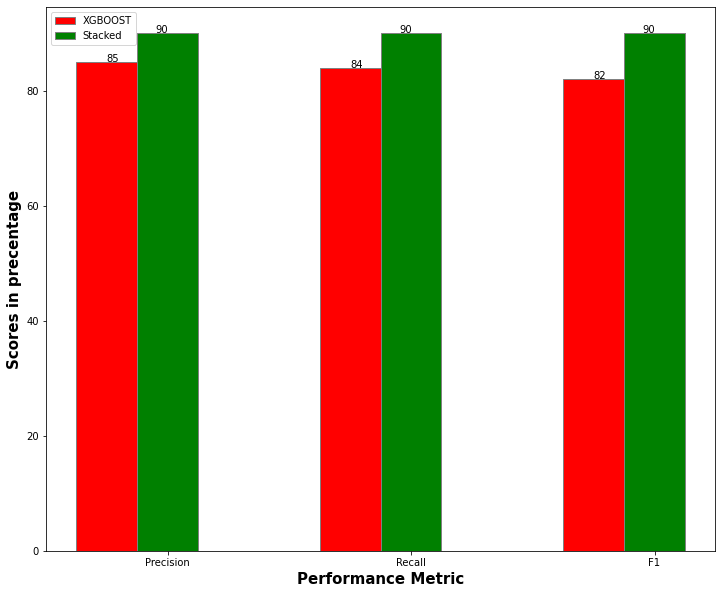

In [45]:
barWidth = 0.25
fig,ax = plt.subplots(figsize =(12, 10))
 
       
xgboost = [85, 84, 82]
stacked = [90, 90, 90]

 
br1 = np.arange(len(xgboost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
ax.bar(br1, xgboost, color ='r', width = barWidth,
        edgecolor ='grey', label ='XGBOOST')
ax.bar(br2, stacked, color ='g', width = barWidth,
        edgecolor ='grey', label ='Stacked')

 
plt.xlabel('Performance Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores in precentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(xgboost))],
        ['Precision', 'Recall', 'F1'])

for i, v in enumerate(xgboost):
    plt.text([r + barWidth for r in range(len(xgboost))][i] - 0.25, v + 0.01, str(v))
 
for i, v in enumerate(stacked):
    plt.text([r + barWidth for r in range(len(xgboost))][i] - 0.05, v + 0.01, str(v))

plt.legend()
plt.show()



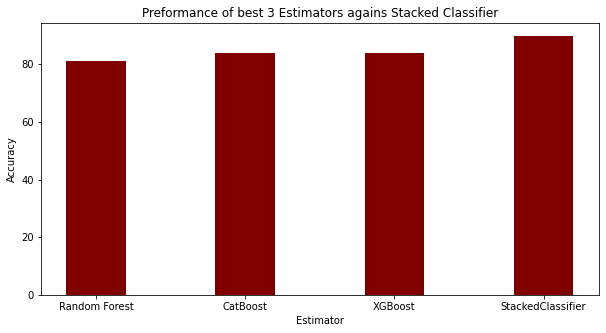

{'Random Forest': 81, 'CatBoost': 84, 'XGBoost': 84, 'StackedClassifier': 89.81525423728814}


In [46]:
data = {'Random Forest':81, 'CatBoost':84, 'XGBoost':84,
        'StackedClassifier':89.81525423728814}

barwidth=0.25
x=[81, 84, 84,89.91525423728814]
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)

    
    
plt.xlabel("Estimator")
plt.ylabel("Accuracy")
plt.title("Preformance of best 3 Estimators agains Stacked Classifier")
plt.show()

print(data)